# Fix part A

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay,confusion_matrix,accuracy_score
from mlxtend.plotting import  plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Xy_train.csv")
df.sample(10)

Unnamed: 0.1  Unnamed: 0  squareMeters  numberOfRooms  hasYard  hasPool  \
1777          1777        1777         70898           98.0      0.0      0.0   
2560          2560        2560         92867           56.0      0.0      0.0   
4002          4002        4002          5505           33.0      0.0      0.0   
7726          7726        7726         34137           50.0      1.0      0.0   
3728          3728        3728         89549           60.0      1.0      1.0   
1420          1420        1420         55620           90.0      1.0      1.0   
4165          4165        4165         63078           38.0      1.0      1.0   
1610          1610        1610         52871            6.0      0.0      0.0   
1737          1737        1737          2111           79.0      1.0      0.0   
1280          1280        1280         34433           45.0      1.0      1.0   

      floors  cityCode  cityPartRange  numPrevOwners    made isNewBuilt  \
1777    92.0   51635.0            6.0            1.0  1994.0          0   
2560    71.0   51553.0            3.0            7.0  2011.0          0   
4002    94.0   30442.0            7.0            5.0  2011.0          0   
7726    64.0   90521.0            7.0            8.0  2017.0          1   
3728    95.0    1965.0            2.0            4.0  2006.0          1   
1420    90.0    8078.0            3.0            6.0  2002.0          1   
4165    35.0   74374.0            3.0            1.0  2005.0          1   
1610    14.0   84000.0            1.0            8.0  2008.0          0   
1737    60.0   56226.0            9.0            1.0  1994.0          1   
1280    34.0   63456.0            5.0            1.0  2009.0          1   

     hasStormProtector  basement   attic  garage  hasStorageRoom  \
1777                 0    4848.0   784.0   942.0             1.0   
2560                 1    2813.0  9482.0   325.0             0.0   
4002                 0    7525.0  5416.0   189.0             1.0   
7726                 1    8569.0  2589.0   520.0             1.0   
3728                 0    5919.0  2553.0   543.0             1.0   
1420                 1    3282.0  4811.0   470.0             0.0   
4165                 0    5369.0  2732.0   769.0             1.0   
1610                 1    8163.0  3294.0   316.0             0.0   
1737                 1    5773.0   735.0   236.0             1.0   
1280                 0    2283.0  3875.0   696.0             0.0   

      hasGuestRoom      price category  
1777             3  7091863.4    Basic  
2560             3  9289807.1    Basic  
4002             7   557067.1    Basic  
7726             1  3425405.7    Basic  
3728             6  8967748.6   Luxury  
1420             4  5573469.2   Luxury  
4165             2  6316522.5   Luxury  
1610             2  5287746.8    Basic  
1737             0   216518.4    Basic  
1280            10  3453087.9   Luxury

# Brutal clean up

In [4]:
# look for duplactions 
df.drop_duplicates()
df.shape

(8000, 20)

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'squareMeters', 'numberOfRooms',
       'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement',
       'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price',
       'category'],
      dtype='object')

In [6]:
#drop unwanted col
del df['Unnamed: 0.1']
del df['Unnamed: 0']
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [7]:
#look for nulls 
df.isnull().sum()

squareMeters          0
numberOfRooms         1
hasYard              17
hasPool              20
floors               17
cityCode             20
cityPartRange        16
numPrevOwners        19
made                 28
isNewBuilt           17
hasStormProtector    16
basement              7
attic                 5
garage                6
hasStorageRoom        4
hasGuestRoom          0
price                13
category              0
dtype: int64

In [8]:
#I will drop null values because they are less then 5%
df=df.dropna()
df.isnull().sum()
df.shape

(7932, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       7932 non-null   int64  
 1   numberOfRooms      7932 non-null   float64
 2   hasYard            7932 non-null   float64
 3   hasPool            7932 non-null   float64
 4   floors             7932 non-null   float64
 5   cityCode           7932 non-null   float64
 6   cityPartRange      7932 non-null   float64
 7   numPrevOwners      7932 non-null   float64
 8   made               7932 non-null   float64
 9   isNewBuilt         7932 non-null   object 
 10  hasStormProtector  7932 non-null   object 
 11  basement           7932 non-null   float64
 12  attic              7932 non-null   float64
 13  garage             7932 non-null   float64
 14  hasStorageRoom     7932 non-null   float64
 15  hasGuestRoom       7932 non-null   int64  
 16  price              7932 

In [10]:
#change data type to int64 and switch yes:1 no:0
df['numberOfRooms'] = df['numberOfRooms'].astype(np.int64)
df['hasYard'] = df['hasYard'].astype(np.int64)
df['hasPool'] = df['hasPool'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
df['cityCode'] = df['cityCode'].astype(np.int64)
df['cityPartRange'] = df['cityPartRange'].astype(np.int64)
df['numPrevOwners'] = df['numPrevOwners'].astype(np.int64)
df['made'] = df['made'].astype(np.int64)
df['isNewBuilt'] = df['isNewBuilt'].replace({'no':0, 'yes':1})
df['isNewBuilt'] = df['isNewBuilt'].astype(np.int64)
df['hasStormProtector'] = df['hasStormProtector'].replace({'no':0, 'yes':1})
df['hasStormProtector'] = df['hasStormProtector'].astype(np.int64)
df['basement'] = df['basement'].astype(np.int64)
df['attic'] = df['attic'].astype(np.int64)
df['garage'] = df['garage'].astype(np.int64)
df['hasStorageRoom'] = df['hasStorageRoom'].astype(np.int64)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       7932 non-null   int64  
 1   numberOfRooms      7932 non-null   int64  
 2   hasYard            7932 non-null   int64  
 3   hasPool            7932 non-null   int64  
 4   floors             7932 non-null   int64  
 5   cityCode           7932 non-null   int64  
 6   cityPartRange      7932 non-null   int64  
 7   numPrevOwners      7932 non-null   int64  
 8   made               7932 non-null   int64  
 9   isNewBuilt         7932 non-null   int64  
 10  hasStormProtector  7932 non-null   int64  
 11  basement           7932 non-null   int64  
 12  attic              7932 non-null   int64  
 13  garage             7932 non-null   int64  
 14  hasStorageRoom     7932 non-null   int64  
 15  hasGuestRoom       7932 non-null   int64  
 16  price              7932 

# remove/replace imposible values

In [11]:
# I droped more then 5% because i will resample and add more data later
df = df[df['cityCode'] >= 0]
df = df[df['made'] < 2023]
df = df[df['price'] > 0]
df = df.replace(df['hasGuestRoom'] < df['numberOfRooms'],df['numberOfRooms'].mean())
df = df.replace(df['basement'] < df['squareMeters'],df['basement'].mean())
df = df.replace(df['attic'] < df['squareMeters'],df['attic'].mean())
df = df.replace(df['garage'] < df['squareMeters'],df['garage'].mean())
df = df[df['hasGuestRoom'] < df['numberOfRooms']]
df = df[df['basement'] < df['squareMeters']]
df = df[df['attic'] < df['squareMeters']]
df = df[df['garage'] < df['squareMeters']]
df.shape

(7002, 18)

# switch catgory  Basic:0 Luxury:1

In [12]:
df['category'] = df['category'].replace({'Basic':0, 'Luxury':1})
df['category']

0       0
1       0
3       0
4       1
5       0
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: category, Length: 7002, dtype: int64

In [13]:
X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5601, 17)
y_train shape:  (5601,)
X_test shape:  (1401, 17)
y_test shape:  (1401,)


# Normalize data

In [14]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
X_train_scaled


squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0        -0.723954      -0.620710  0.987050 -1.003756 -0.736123  0.273821   
1         1.227902       1.710546  0.987050 -1.003756 -0.977506  0.593892   
2        -0.582040       1.054880 -1.013119  0.996258  0.125958 -0.957921   
3        -1.669125      -1.276375  0.987050  0.996258  0.539758 -0.382202   
4        -1.338325      -1.276375  0.987050  0.996258 -0.667157  0.555661   
...            ...            ...       ...       ...       ...       ...   
5596      0.198139      -0.875691 -1.013119  0.996258  1.022523  1.008798   
5597      1.079494      -1.239949 -1.013119  0.996258  1.367356  0.292435   
5598     -1.176375      -0.365728  0.987050  0.996258 -0.425774  0.773909   
5599      1.218923       0.399215  0.987050  0.996258 -1.494755  0.579050   
5600      1.522417      -0.984968 -1.013119 -1.003756  0.850107 -0.850527   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0         -1.203224       1.586887  0.067802   -0.992706          -1.003040   
1         -0.857462      -0.527410 -1.620957    1.007347          -1.003040   
2          0.871351      -0.527410 -0.037745   -0.992706           0.996969   
3          0.525589      -1.232176  0.173350   -0.992706          -1.003040   
4         -1.203224       0.177355 -0.882125    1.007347          -1.003040   
...             ...            ...       ...         ...                ...   
5596      -1.203224      -1.232176 -0.354388    1.007347           0.996969   
5597      -1.548987      -0.527410  1.017729    1.007347          -1.003040   
5598      -1.548987       0.882121  1.651014   -0.992706          -1.003040   
5599      -0.857462      -0.879793  0.489992    1.007347          -1.003040   
5600      -0.857462       0.882121 -1.620957   -0.992706          -1.003040   

      basement     attic    garage  hasStorageRoom  hasGuestRoom     price  
0    -0.949273 -0.030455  0.472383       -1.001251     -0.905460 -0.723995  
1     0.911534  0.960497 -0.711962       -1.001251     -0.588552  1.227139  
2    -0.849974  1.715079 -0.876774       -1.001251      1.629806 -0.583083  
3    -0.019569  0.290607 -1.405705        0.998751      0.362173 -1.668944  
4    -0.524455 -0.401498 -0.401503       -1.001251     -1.222368 -1.338636  
...        ...       ...       ...             ...           ...       ...  
5596  0.290566  1.436363 -1.624176        0.998751      0.995989  0.198070  
5597 -0.598929  0.913293  1.143128        0.998751     -1.222368  1.080254  
5598  0.124135  1.577977 -1.076081       -1.001251     -0.588552 -1.175729  
5599 -1.596814 -1.356352 -0.328679       -1.001251      0.995989  1.218912  
5600  0.120639 -0.494172 -0.945765       -1.001251     -0.905460  1.520958  

[5601 rows x 17 columns]

In [15]:
X_test_scaled

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0        -0.138116      -0.657135 -1.013119  0.996258  0.091475 -0.493228   
1        -0.695868      -0.292877  0.987050  0.996258 -0.563707  0.466708   
2         0.928564      -0.292877  0.987050  0.996258  1.332873  0.467677   
3         1.523604       0.945603  0.987050  0.996258 -0.529224  1.572997   
4        -0.935695       0.727048  0.987050  0.996258 -0.943023 -1.099706   
...            ...            ...       ...       ...       ...       ...   
1396      1.642256       1.091306  0.987050  0.996258  0.125958 -0.715766   
1397      0.114845       0.180660  0.987050 -1.003756 -1.563722 -0.271728   
1398     -1.035870       1.273436 -1.013119 -1.003756  1.436323  1.271609   
1399     -1.304747      -1.422079  0.987050 -1.003756 -1.391305  1.436229   
1400      1.394081       1.564843 -1.013119  0.996258 -0.425774  1.097128   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0         -0.511699       0.529738  0.912182   -0.992706          -1.003040   
1         -0.165936      -1.584559  0.384445    1.007347          -1.003040   
2         -1.548987       0.177355  0.489992    1.007347           0.996969   
3          0.525589       0.882121 -0.671030   -0.992706           0.996969   
4          0.871351       1.234504 -1.198767   -0.992706           0.996969   
...             ...            ...       ...         ...                ...   
1396       1.562877      -1.584559 -1.409862   -0.992706           0.996969   
1397       0.871351       1.586887  1.439919   -0.992706          -1.003040   
1398       0.179826       0.529738  1.439919    1.007347           0.996969   
1399       0.871351      -1.584559  0.701087    1.007347           0.996969   
1400       0.871351       1.234504  0.912182   -0.992706          -1.003040   

      basement     attic    garage  hasStorageRoom  hasGuestRoom     price  
0    -0.968503  1.381522 -1.693167       -1.001251      0.362173 -0.137990  
1    -0.951720 -0.381366  0.552872       -1.001251      1.629806 -0.694620  
2    -0.825849 -0.331732 -0.769455       -1.001251      0.362173  0.930169  
3     1.084608  0.153505  1.219785       -1.001251     -0.271644  1.523557  
4     0.201057 -0.437248  0.514544        0.998751     -1.539277 -0.933539  
...        ...       ...       ...             ...           ...       ...  
1396  1.429007 -1.614937 -0.508822       -1.001251      0.679081  1.642262  
1397 -0.928644  1.185761 -0.688965       -1.001251      0.362173  0.114141  
1398 -0.538791  0.069855  0.541373        0.998751     -1.222368 -1.037026  
1399 -1.623737  0.995554 -0.589312        0.998751     -0.905460 -1.306017  
1400 -1.574437 -0.339368  0.361230        0.998751      1.629806  1.392671  

[1401 rows x 17 columns]

# Check if data is balanced 

In [16]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5601, 17)
y_train shape:  (5601,)
X_test shape:  (1401, 17)
y_test shape:  (1401,)


# Balance data with imblearn_samplig 

In [17]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros= RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
print("Original dataset shape: ", Counter(y_train))
print("Original dataset shape: ", Counter(y_resampled))
print(sorted(Counter(y_resampled).items()))

Original dataset shape:  Counter({0: 4833, 1: 768})
Original dataset shape:  Counter({0: 4833, 1: 4833})
[(0, 4833), (1, 4833)]


In [18]:
y_resampled

0       0
1       0
2       0
3       0
4       1
       ..
9661    1
9662    1
9663    1
9664    1
9665    1
Name: category, Length: 9666, dtype: int64

# Check data efficiency

Training accuracy:  0.8055038278501966
Confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000127B32A6160>
Classification report               precision    recall  f1-score   support

           0       0.96      0.82      0.88      1207
           1       0.42      0.80      0.55       194

    accuracy                           0.82      1401
   macro avg       0.69      0.81      0.72      1401
weighted avg       0.89      0.82      0.84      1401



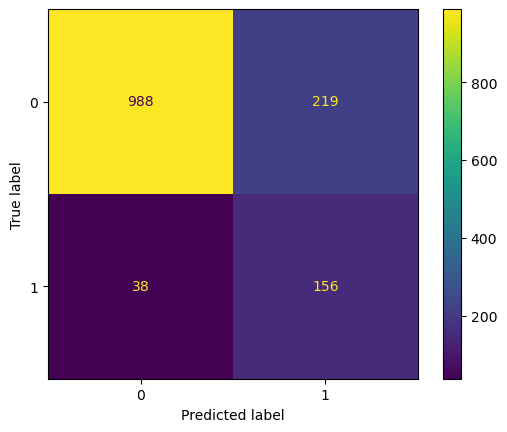

In [19]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
print("Training accuracy: ", model.score(X_resampled, y_resampled))

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
con =  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
print("Confusion matrix",con)
print("Classification report", classification_report(y_test,y_pred))
con.plot()
plt.show()

# Part B

In [20]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from ann_visualizer.visualize import ann_viz
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score , classification_report
from sklearn.metrics import precision_score, roc_curve
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold, train_test_split
from tabulate import tabulate
from pandas.plotting import scatter_matrix
from numpy import mean, std
from scipy.stats import norm
from sklearn.svm import SVR
from pandasql import sqldf
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Cleanup from part A

In [21]:
df = pd.read_csv("Xy_train.csv")
df.sample(10)
# look for duplactions 
df.drop_duplicates()
df.shape
#drop unwanted col
del df['Unnamed: 0.1']
del df['Unnamed: 0']
df.columns
#I will drop null values because they are less then 5%
df=df.dropna()
df.isnull().sum()
df.shape
#change data type to int64 and switch yes:1 no:0
df['numberOfRooms'] = df['numberOfRooms'].astype(np.int64)
df['hasYard'] = df['hasYard'].astype(np.int64)
df['hasPool'] = df['hasPool'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
df['cityCode'] = df['cityCode'].astype(np.int64)
df['cityPartRange'] = df['cityPartRange'].astype(np.int64)
df['numPrevOwners'] = df['numPrevOwners'].astype(np.int64)
df['made'] = df['made'].astype(np.int64)
df['isNewBuilt'] = df['isNewBuilt'].replace({'no':0, 'yes':1})
df['isNewBuilt'] = df['isNewBuilt'].astype(np.int64)
df['hasStormProtector'] = df['hasStormProtector'].replace({'no':0, 'yes':1})
df['hasStormProtector'] = df['hasStormProtector'].astype(np.int64)
df['basement'] = df['basement'].astype(np.int64)
df['attic'] = df['attic'].astype(np.int64)
df['garage'] = df['garage'].astype(np.int64)
df['hasStorageRoom'] = df['hasStorageRoom'].astype(np.int64)
df.info()

# I droped more then 5% because i will resample and add more data later
df = df[df['cityCode'] >= 0]
df = df[df['made'] < 2023]
df = df[df['price'] > 0]
df = df.replace(df['hasGuestRoom'] < df['numberOfRooms'],df['numberOfRooms'].mean())
df = df.replace(df['basement'] < df['squareMeters'],df['basement'].mean())
df = df.replace(df['attic'] < df['squareMeters'],df['attic'].mean())
df = df.replace(df['garage'] < df['squareMeters'],df['garage'].mean())
df = df[df['hasGuestRoom'] < df['numberOfRooms']]
df = df[df['basement'] < df['squareMeters']]
df = df[df['attic'] < df['squareMeters']]
df = df[df['garage'] < df['squareMeters']]
df.shape
df['category'] = df['category'].replace({'Basic':0, 'Luxury':1})
df['category']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       7932 non-null   int64  
 1   numberOfRooms      7932 non-null   int64  
 2   hasYard            7932 non-null   int64  
 3   hasPool            7932 non-null   int64  
 4   floors             7932 non-null   int64  
 5   cityCode           7932 non-null   int64  
 6   cityPartRange      7932 non-null   int64  
 7   numPrevOwners      7932 non-null   int64  
 8   made               7932 non-null   int64  
 9   isNewBuilt         7932 non-null   int64  
 10  hasStormProtector  7932 non-null   int64  
 11  basement           7932 non-null   int64  
 12  attic              7932 non-null   int64  
 13  garage             7932 non-null   int64  
 14  hasStorageRoom     7932 non-null   int64  
 15  hasGuestRoom       7932 non-null   int64  
 16  price              7932 

0       0
1       0
3       0
4       1
5       0
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: category, Length: 7002, dtype: int64

In [39]:
df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]
X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled),columns=X_train.columns)
X_train_scaled

X_train shape:  (5601, 17)
y_train shape:  (5601,)
X_test shape:  (1401, 17)
y_test shape:  (1401,)


squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0        -0.723954      -0.620710  0.987050 -1.003756 -0.736123  0.273821   
1         1.227902       1.710546  0.987050 -1.003756 -0.977506  0.593892   
2        -0.582040       1.054880 -1.013119  0.996258  0.125958 -0.957921   
3        -1.669125      -1.276375  0.987050  0.996258  0.539758 -0.382202   
4        -1.338325      -1.276375  0.987050  0.996258 -0.667157  0.555661   
...            ...            ...       ...       ...       ...       ...   
5596      0.198139      -0.875691 -1.013119  0.996258  1.022523  1.008798   
5597      1.079494      -1.239949 -1.013119  0.996258  1.367356  0.292435   
5598     -1.176375      -0.365728  0.987050  0.996258 -0.425774  0.773909   
5599      1.218923       0.399215  0.987050  0.996258 -1.494755  0.579050   
5600      1.522417      -0.984968 -1.013119 -1.003756  0.850107 -0.850527   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0         -1.203224       1.586887  0.067802   -0.992706          -1.003040   
1         -0.857462      -0.527410 -1.620957    1.007347          -1.003040   
2          0.871351      -0.527410 -0.037745   -0.992706           0.996969   
3          0.525589      -1.232176  0.173350   -0.992706          -1.003040   
4         -1.203224       0.177355 -0.882125    1.007347          -1.003040   
...             ...            ...       ...         ...                ...   
5596      -1.203224      -1.232176 -0.354388    1.007347           0.996969   
5597      -1.548987      -0.527410  1.017729    1.007347          -1.003040   
5598      -1.548987       0.882121  1.651014   -0.992706          -1.003040   
5599      -0.857462      -0.879793  0.489992    1.007347          -1.003040   
5600      -0.857462       0.882121 -1.620957   -0.992706          -1.003040   

      basement     attic    garage  hasStorageRoom  hasGuestRoom     price  
0    -0.949273 -0.030455  0.472383       -1.001251     -0.905460 -0.723995  
1     0.911534  0.960497 -0.711962       -1.001251     -0.588552  1.227139  
2    -0.849974  1.715079 -0.876774       -1.001251      1.629806 -0.583083  
3    -0.019569  0.290607 -1.405705        0.998751      0.362173 -1.668944  
4    -0.524455 -0.401498 -0.401503       -1.001251     -1.222368 -1.338636  
...        ...       ...       ...             ...           ...       ...  
5596  0.290566  1.436363 -1.624176        0.998751      0.995989  0.198070  
5597 -0.598929  0.913293  1.143128        0.998751     -1.222368  1.080254  
5598  0.124135  1.577977 -1.076081       -1.001251     -0.588552 -1.175729  
5599 -1.596814 -1.356352 -0.328679       -1.001251      0.995989  1.218912  
5600  0.120639 -0.494172 -0.945765       -1.001251     -0.905460  1.520958  

[5601 rows x 17 columns]

In [23]:
X_test_scaled

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0        -0.138116      -0.657135 -1.013119  0.996258  0.091475 -0.493228   
1        -0.695868      -0.292877  0.987050  0.996258 -0.563707  0.466708   
2         0.928564      -0.292877  0.987050  0.996258  1.332873  0.467677   
3         1.523604       0.945603  0.987050  0.996258 -0.529224  1.572997   
4        -0.935695       0.727048  0.987050  0.996258 -0.943023 -1.099706   
...            ...            ...       ...       ...       ...       ...   
1396      1.642256       1.091306  0.987050  0.996258  0.125958 -0.715766   
1397      0.114845       0.180660  0.987050 -1.003756 -1.563722 -0.271728   
1398     -1.035870       1.273436 -1.013119 -1.003756  1.436323  1.271609   
1399     -1.304747      -1.422079  0.987050 -1.003756 -1.391305  1.436229   
1400      1.394081       1.564843 -1.013119  0.996258 -0.425774  1.097128   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0         -0.511699       0.529738  0.912182   -0.992706          -1.003040   
1         -0.165936      -1.584559  0.384445    1.007347          -1.003040   
2         -1.548987       0.177355  0.489992    1.007347           0.996969   
3          0.525589       0.882121 -0.671030   -0.992706           0.996969   
4          0.871351       1.234504 -1.198767   -0.992706           0.996969   
...             ...            ...       ...         ...                ...   
1396       1.562877      -1.584559 -1.409862   -0.992706           0.996969   
1397       0.871351       1.586887  1.439919   -0.992706          -1.003040   
1398       0.179826       0.529738  1.439919    1.007347           0.996969   
1399       0.871351      -1.584559  0.701087    1.007347           0.996969   
1400       0.871351       1.234504  0.912182   -0.992706          -1.003040   

      basement     attic    garage  hasStorageRoom  hasGuestRoom     price  
0    -0.968503  1.381522 -1.693167       -1.001251      0.362173 -0.137990  
1    -0.951720 -0.381366  0.552872       -1.001251      1.629806 -0.694620  
2    -0.825849 -0.331732 -0.769455       -1.001251      0.362173  0.930169  
3     1.084608  0.153505  1.219785       -1.001251     -0.271644  1.523557  
4     0.201057 -0.437248  0.514544        0.998751     -1.539277 -0.933539  
...        ...       ...       ...             ...           ...       ...  
1396  1.429007 -1.614937 -0.508822       -1.001251      0.679081  1.642262  
1397 -0.928644  1.185761 -0.688965       -1.001251      0.362173  0.114141  
1398 -0.538791  0.069855  0.541373        0.998751     -1.222368 -1.037026  
1399 -1.623737  0.995554 -0.589312        0.998751     -0.905460 -1.306017  
1400 -1.574437 -0.339368  0.361230        0.998751      1.629806  1.392671  

[1401 rows x 17 columns]

# Difine K-fold

In [24]:
KF = KFold(n_splits=10)

In [40]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Decision tree

In [41]:
# -----------------for the train set
Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(X_train_scaled, y_train)
acc_train = accuracy_score(y_train, Dt.predict(X_train_scaled)) 
best_train_result_tree = {'Train accuracy': acc_train}

# ----------------for the test set
acc_test = accuracy_score(y_test, Dt.predict(X_test_scaled)) 
best_test_result_tree = {'Test accuracy': acc_test}
print(pd.Series(best_train_result_tree))
print(pd.Series(best_test_result_tree))

Train accuracy    1.0
dtype: float64
Test accuracy    0.895789
dtype: float64


# GridSearchCV 

In [26]:
param_grid = {'max_depth': np.arange(1, 25, 1),
              'criterion': ['entropy', 'gini'],
              'ccp_alpha': np.arange(0, 0.1, 0.01)
             }

# use f1 because target variable is 0 or 1
grid_CV = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           refit=True,
                           cv=KF, verbose=3 ,scoring='f1', return_train_score=True )

grid_CV.fit(X_train_scaled, y_train)
best_model = grid_CV.best_estimator_
print(grid_CV.best_params_, '\n')
print(best_model.get_params(), '\n')
Results = pd.DataFrame(grid_CV.cv_results_)
preds = best_model.predict(X_test_scaled)
print("Test accuracy: ", round(accuracy_score(y_test, preds), 3))

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, cr

[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.840, test=0.720) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.833, test=0.750) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.825, test=0.747) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.825, test=0.738) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.832, test=0.769) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.819, test=0.788) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.843, test=0.714) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.836, test=0.752) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=9;, score=(train=0.844, test=0.779) t

[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.965, test=0.622) total time=   0.1s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.956, test=0.713) total time=   0.1s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.955, test=0.705) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.929, test=0.681) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.979, test=0.611) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.954, test=0.676) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.968, test=0.686) total time=   0.0s
[CV 2/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.940, test=0.643) total time=   0.0s
[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.951, test

[CV 9/10] END ccp_alpha=0.0, criterion=entropy, max_depth=22;, score=(train=1.000, test=0.577) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=22;, score=(train=0.998, test=0.611) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=0.996, test=0.659) total time=   0.0s
[CV 2/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=0.991, test=0.621) total time=   0.0s
[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=0.987, test=0.569) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=0.984, test=0.653) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test=0.564) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=0.998, test=0.682) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test

[CV 7/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.816, test=0.777) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.806, test=0.758) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.825, test=0.713) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.810, test=0.797) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=gini, max_depth=7;, score=(train=0.827, test=0.812) total time=   0.0s
[CV 2/10] END ccp_alpha=0.0, criterion=gini, max_depth=7;, score=(train=0.819, test=0.789) total time=   0.0s
[CV 3/10] END ccp_alpha=0.0, criterion=gini, max_depth=7;, score=(train=0.831, test=0.699) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=gini, max_depth=7;, score=(train=0.830, test=0.803) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=gini, max_depth=7;, score=(train=0.824, test=0.763) total time=   0.0s
[CV 6/10]

[CV 3/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.950, test=0.624) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.977, test=0.658) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.966, test=0.620) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.960, test=0.615) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.957, test=0.696) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.965, test=0.616) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.970, test=0.613) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.941, test=0.667) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=gini, max_depth=15;, score=(train=0.976, test=0.684) total time=   0.0s


[CV 7/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.996, test=0.670) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=1.000, test=0.581) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=1.000, test=0.587) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.997, test=0.657) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=gini, max_depth=22;, score=(train=0.998, test=0.654) total time=   0.0s
[CV 2/10] END ccp_alpha=0.0, criterion=gini, max_depth=22;, score=(train=0.997, test=0.609) total time=   0.0s
[CV 3/10] END ccp_alpha=0.0, criterion=gini, max_depth=22;, score=(train=0.997, test=0.595) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=gini, max_depth=22;, score=(train=1.000, test=0.676) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=gini, max_depth=22;, score=(train=1.000, test=0.659) total time=   0.0s


[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.805, test=

[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=13;, score=(train=0.

[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=20;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=entropy, max_depth=20;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=20;, score=(train=0.

[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=4;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=4;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=4;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=4;, score=(train=0.796, test=0.812) total time=   0.0s


[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=11;, score=(train=0.805, test=0.731) total time=

[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=18;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=18;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=18;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=18;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=19;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=19;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=19;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=19;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=19;, score=(train=0.798, test=0.787) total time

[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=3;, score=(train=0.792, test

[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=9;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.02, criterion=entropy, max_depth=9;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=9;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.02, criterion=entropy, max_depth=9;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=9;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=10;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=10;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=10;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=10;, score=(train=0.796, 

[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=16;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.02, criterion=entropy, max_depth=16;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=16;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=17;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=17;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=17;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=17;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=17;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=17;, score=(train=0.

[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=23;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=24;, score=(train=0.

[CV 7/10] END ccp_alpha=0.02, criterion=gini, max_depth=7;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=gini, max_depth=7;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.02, criterion=gini, max_depth=7;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.02, criterion=gini, max_depth=7;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=gini, max_depth=8;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=gini, max_depth=8;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=gini, max_depth=8;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=gini, max_depth=8;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=gini, max_depth=8;, score=(train=0.798, test=0.787) total time=   0.0s


[CV 4/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.02, criterion=gini, max_depth=15;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=gini, max_depth=16;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=gini, max_depth=16;, score=(train=0.796, test=0.812) total time

[CV 10/10] END ccp_alpha=0.02, criterion=gini, max_depth=22;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=gini, max_depth=23;, score=(train=0.796, test=0.809) total time

[CV 5/10] END ccp_alpha=0.03, criterion=entropy, max_depth=6;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=entropy, max_depth=6;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=entropy, max_depth=6;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.03, criterion=entropy, max_depth=6;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.03, criterion=entropy, max_depth=6;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=entropy, max_depth=6;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=entropy, max_depth=7;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=entropy, max_depth=7;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=entropy, max_depth=7;, score=(train=0.800, test

[CV 9/10] END ccp_alpha=0.03, criterion=entropy, max_depth=13;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=entropy, max_depth=13;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=entropy, max_depth=14;, score=(train=0.

[CV 1/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.03, criterion=entropy, max_depth=21;, score=(train=0.8

[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=4;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=4;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=5;, score=(train=0.797, test=0.802) total time=   0.0s


[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=12;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=gini, max_depth=12;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=12;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.03, criterion=gini, max_depth=12;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=12;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=12;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=gini, max_depth=13;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=13;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=13;, score=(train=0.800, test=0.770) total time

[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=19;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=19;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=20;, score=(train=0.797, test=0.802) total time

[CV 7/10] END ccp_alpha=0.04, criterion=entropy, max_depth=3;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=entropy, max_depth=3;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=entropy, max_depth=3;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=entropy, max_depth=3;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=entropy, max_depth=4;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.04, criterion=entropy, max_depth=4;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.04, criterion=entropy, max_depth=4;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=entropy, max_depth=4;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=entropy, max_depth=4;, score=(train=0.798, test

[CV 10/10] END ccp_alpha=0.04, criterion=entropy, max_depth=10;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=entropy, max_depth=11;, score=(train=0.

[CV 3/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=entropy, max_depth=18;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=entropy, max_depth=19;, score=(train=0.

[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.04, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s


[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.796, test=0.812) total time=   0.2s
[CV 3/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=9;, score=(train=0.796, test=0.809) total time=   0.0s


[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=16;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=16;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=16;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=gini, max_depth=17;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=17;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.04, criterion=gini, max_depth=17;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=17;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=17;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=17;, score=(train=0.797, test=0.798) total time

[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=24;, score=(train=0.796, test=0.809) total time

[CV 6/10] END ccp_alpha=0.05, criterion=entropy, max_depth=7;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=entropy, max_depth=7;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.05, criterion=entropy, max_depth=7;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=entropy, max_depth=7;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.05, criterion=entropy, max_depth=7;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.05, criterion=entropy, max_depth=8;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=entropy, max_depth=8;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=entropy, max_depth=8;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=entropy, max_depth=8;, score=(train=0.796, test

[CV 9/10] END ccp_alpha=0.05, criterion=entropy, max_depth=14;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.05, criterion=entropy, max_depth=14;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=entropy, max_depth=15;, score=(train=0.

[CV 3/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.05, criterion=entropy, max_depth=22;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.05, criterion=entropy, max_depth=23;, score=(train=0.

[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[

[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=13;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=gini, max_depth=13;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=gini, max_depth=13;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=13;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=13;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.05, criterion=gini, max_depth=13;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time

[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=

[CV 6/10] END ccp_alpha=0.06, criterion=entropy, max_depth=4;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=entropy, max_depth=4;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=entropy, max_depth=4;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.06, criterion=entropy, max_depth=4;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=entropy, max_depth=4;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.06, criterion=entropy, max_depth=5;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.06, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.06, criterion=entropy, max_depth=5;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=entropy, max_depth=5;, score=(train=0.796, test

[CV 9/10] END ccp_alpha=0.06, criterion=entropy, max_depth=11;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=entropy, max_depth=11;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=entropy, max_depth=12;, score=(train=0.

[CV 1/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.06, criterion=entropy, max_depth=19;, score=(train=0.8

[CV 5/10] END ccp_alpha=0.06, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.06, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.06, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=gini, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.06, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.06, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.06, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s


[CV 3/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=gini, max_depth=10;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.06, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time

[CV 7/10] END ccp_alpha=0.06, criterion=gini, max_depth=17;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=gini, max_depth=17;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.06, criterion=gini, max_depth=17;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=gini, max_depth=17;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.06, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.06, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.06, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.06, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time

[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=entropy, max_depth=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=entropy, max_depth=2;, score=(train=0.000, test

[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=8;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.07, criterion=entropy, max_depth=8;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=8;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=entropy, max_depth=8;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=9;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=entropy, max_depth=9;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.07, criterion=entropy, max_depth=9;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=9;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=entropy, max_depth=9;, score=(train=0.798, test

[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=15;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=entropy, max_depth=15;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=16;, score=(train=0.

[CV 3/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=entropy, max_depth=23;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=24;, score=(train=0.

[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=6;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s


[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=14;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time

[CV 8/10] END ccp_alpha=0.07, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=21;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=gini, max_depth=22;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=gini, max_depth=22;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=22;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=22;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=22;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=22;, score=(train=0.000, test=0.000) total time

[CV 3/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.08, criterion=entropy, max_depth=5;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.08, criterion=entropy, max_depth=6;, score=(train=0.792, test

[CV 7/10] END ccp_alpha=0.08, criterion=entropy, max_depth=12;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=entropy, max_depth=12;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.08, criterion=entropy, max_depth=12;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.08, criterion=entropy, max_depth=13;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.08, criterion=entropy, max_depth=13;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.08, criterion=entropy, max_depth=13;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.08, criterion=entropy, max_depth=13;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.08, criterion=entropy, max_depth=13;, score=(train=0.

[CV 1/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=entropy, max_depth=20;, score=(train=0.8

[CV 4/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.08, criterion=gini, max_depth=3;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.08, criterion=gini, max_depth=4;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.08, criterion=gini, max_depth=4;, score=(train=0.000, test=0.000) total time=   0.0s


[CV 1/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=gini, max_depth=11;, score=(train=0.000, test=0.000) total time=

[CV 5/10] END ccp_alpha=0.08, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.08, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.08, criterion=gini, max_depth=18;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.08, criterion=gini, max_depth=19;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.08, criterion=gini, max_depth=19;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.08, criterion=gini, max_depth=19;, score=(train=0.000, test=0.000) total time

[CV 3/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.792, test

[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=9;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=entropy, max_depth=9;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=entropy, max_depth=9;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=9;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.798,

[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=16;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.792, test=0.843) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 3/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.

[CV 3/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.800, test=0.770) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.796, test=0.812) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.798, test=0.787) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.797, test=0.798) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.797, test=0.802) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.805, test=0.731) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=24;, score=(train=0.796, test=0.809) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=1;, score=(train=0.000,

[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=gini, max_depth=7;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=8;, score=(train=0.000, test=0.000) total time=   0.0s


[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=gini, max_depth=15;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=16;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=gini, max_depth=16;, score=(train=0.000, test=0.000) total time

[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=23;, score=(train=0.000, test=0.000) total time=

# GridSaerchCV Results

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ccp_alpha', 'param_criterion', 'param_max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')
    param_criterion param_max_depth param_ccp_alpha  mean_train_score  mean_test_score
0           entropy               1             0.0          0.000000         0.000000
1           entropy               2             0.0          0.0

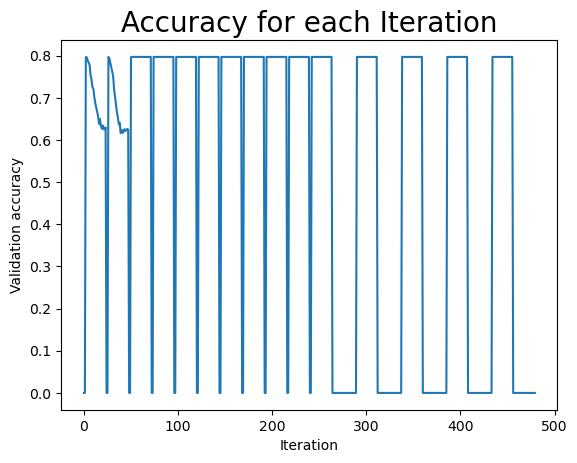

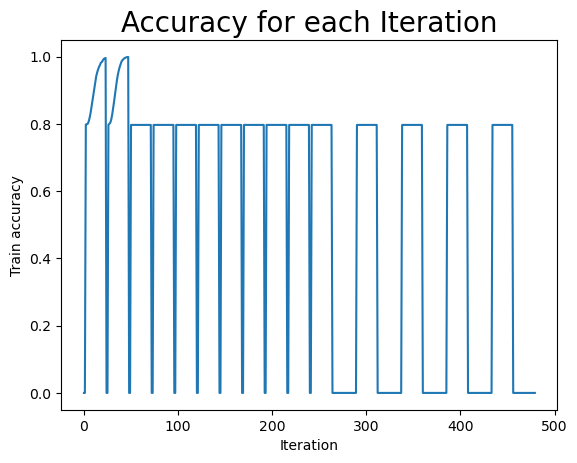

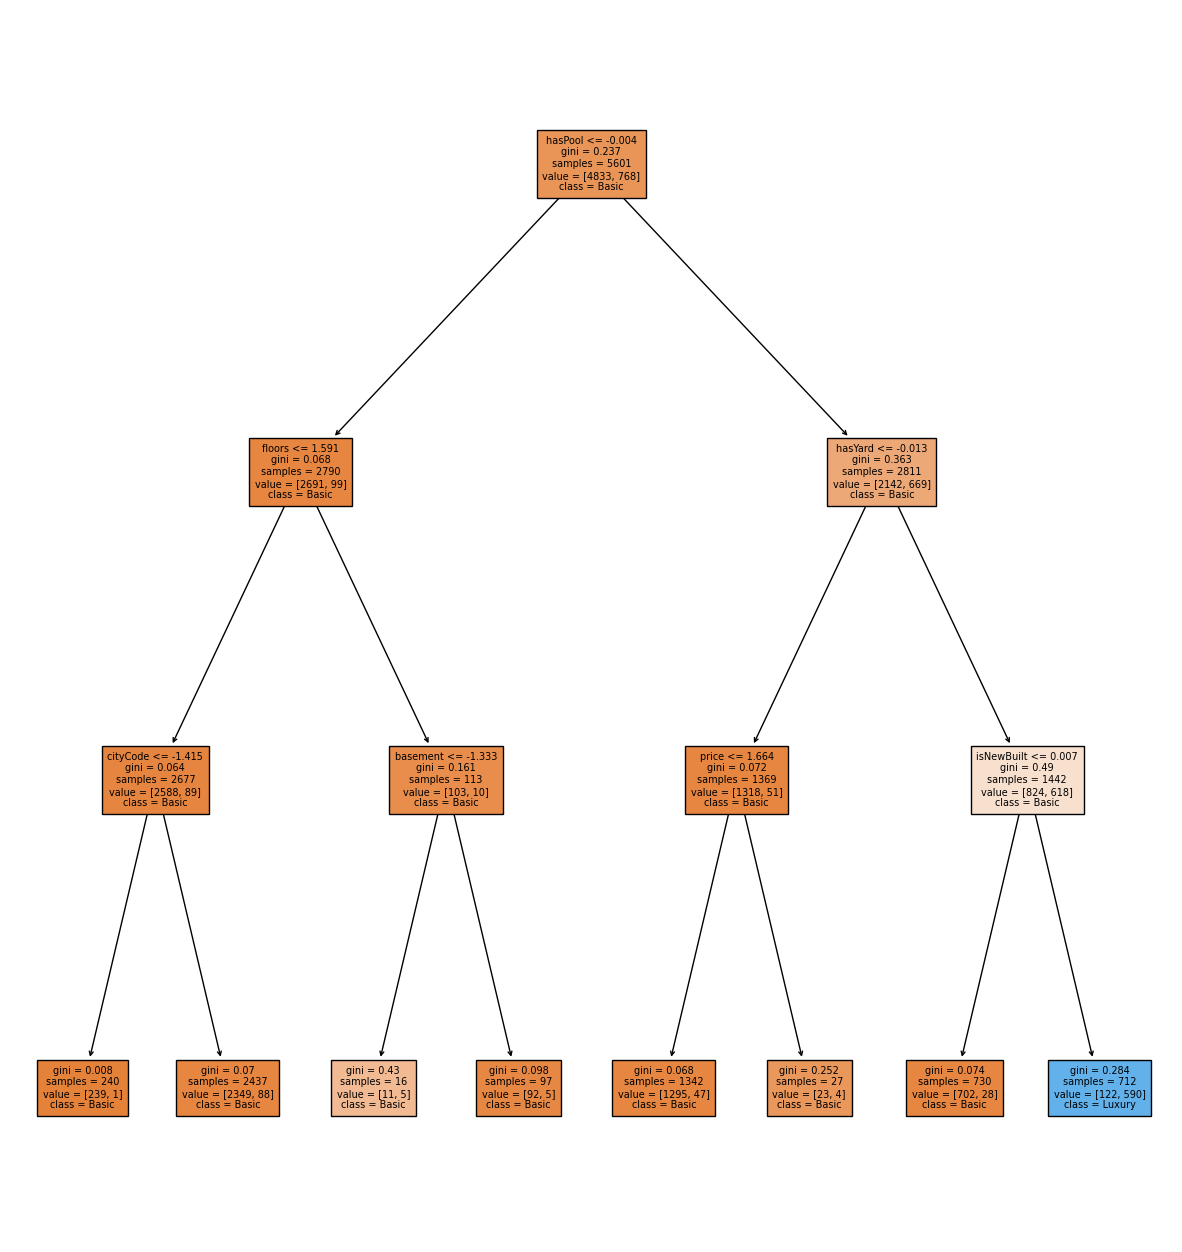

In [42]:
Results = pd.DataFrame(grid_CV.cv_results_)
print(Results.keys())
    
print(Results[[ 'param_criterion', 'param_max_depth', 'param_ccp_alpha', 'mean_train_score', 'mean_test_score']].to_string())

#plot accuracy for validation
plt.plot(Results['mean_test_score'])
plt.ylabel('Validation accuracy', fontsize = 10)
plt.xlabel('Iteration', fontsize = 10)
plt.title('Accuracy for each Iteration', fontsize = 20)
plt.show()
#plot accuracy for train
plt.plot(Results['mean_train_score'])
plt.ylabel('Train accuracy', fontsize = 10)
plt.xlabel('Iteration', fontsize = 10)
plt.title('Accuracy for each Iteration', fontsize = 20)
plt.show()

model = DecisionTreeClassifier(max_depth=3, criterion='gini', ccp_alpha = 0,  random_state=42)
model.fit(X_train_scaled, y_train)
plt.figure(figsize=(15, 16))
plot_tree(model, filled=True, class_names=['Basic', 'Luxury'], feature_names=X_train_scaled.columns, fontsize=7)
plt.show()

# Criterion Influence

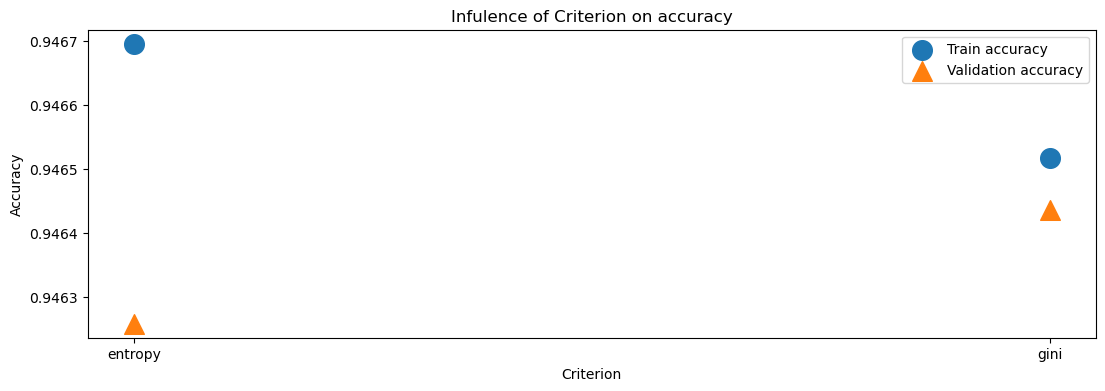

In [43]:

criterion_vec= ['entropy', 'gini']
result_cr = pd.DataFrame()
train_result_cr = pd.DataFrame()
valid_result_cr = pd.DataFrame()
for criterion in criterion_vec:
    train_result_cr = pd.DataFrame(None)
    valid_result_cr = pd.DataFrame(None)
    for train_index, val_index in KF.split(X_train_scaled):
        model_cr = DecisionTreeClassifier(criterion= criterion, max_depth=3, ccp_alpha = 0,random_state=42)
        model_cr.fit(X_train_scaled.iloc[train_index], y_train.iloc[train_index])
        acc_train_cr = accuracy_score(y_train.iloc[train_index], model_cr.predict(X_train_scaled.iloc[train_index]))  # accuracy of the train
        acc_val_cr = accuracy_score(y_train[val_index], model_cr.predict(X_train_scaled.iloc[val_index]))  # accuracy of the validation
        train_result_cr = train_result_cr.append({'Train accuracy': acc_train_cr}, ignore_index=True)
        valid_result_cr = valid_result_cr.append({'Validation accuracy': acc_val_cr}, ignore_index=True)
    avg_train_cr = train_result_cr.mean()
    avg_val_cr = valid_result_cr.mean()
    result_cr = result_cr.append({'criterion': criterion,
                                'train_acc':avg_train_cr,
                                 'val_acc':avg_val_cr}, ignore_index=True)

plt.figure(figsize=(13, 4))
plt.scatter(result_cr['criterion'], result_cr['train_acc'], marker='o', s=200)
plt.scatter(result_cr['criterion'], result_cr['val_acc'], marker='^', s=200)
plt.title("Infulence of Criterion on accuracy")
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel('Criterion', fontsize = 10)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

# Ccp alpah Influence on Accuracy

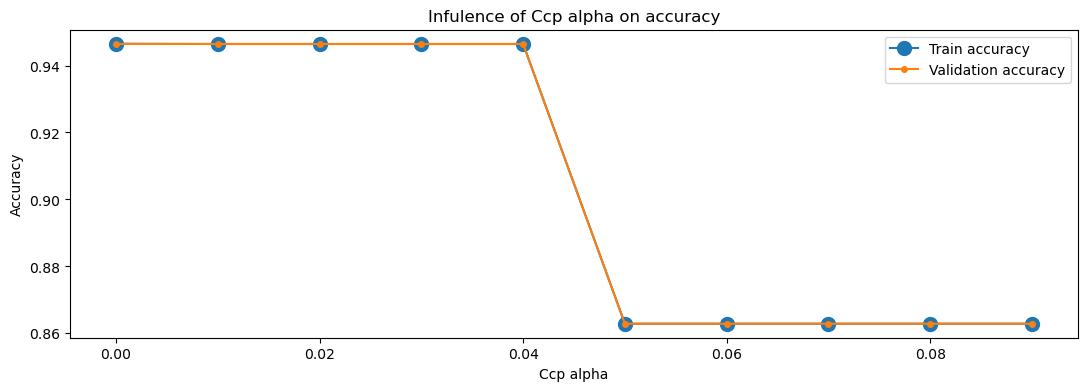

In [44]:
ccp_alpha_range= np.arange(0, 0.1, 0.01)
result_ccp = pd.DataFrame()
train_result_ccp = pd.DataFrame()
valid_result_ccp = pd.DataFrame()
for ccp_alpha in ccp_alpha_range:
    train_result_ccp = pd.DataFrame(None)
    valid_result_ccp = pd.DataFrame(None)
    for train_index, val_index in KF.split(X_train_scaled):
        model_ccp = DecisionTreeClassifier(criterion='gini', max_depth=3, ccp_alpha=ccp_alpha,random_state=42)
        model_ccp.fit(X_train_scaled.iloc[train_index], y_train.iloc[train_index])
        acc_train_ccp = accuracy_score(y_train.iloc[train_index], model_ccp.predict(X_train_scaled.iloc[train_index]))  # accuracy of the train
        acc_val_ccp = accuracy_score(y_train[val_index], model_ccp.predict(X_train_scaled.iloc[val_index]))  # accuracy of the validation
        train_result_ccp = train_result_ccp.append({'Train accuracy': acc_train_ccp}, ignore_index=True)
        valid_result_ccp = valid_result_ccp.append({'Validation accuracy': acc_val_ccp}, ignore_index=True)
    avg_train_ccp = train_result_ccp.mean()
    avg_val_ccp = valid_result_ccp.mean()
    result_ccp = result_ccp.append({'max_depth': ccp_alpha,
                                'train_acc':avg_train_ccp,
                                 'val_acc':avg_val_ccp}, ignore_index=True)

plt.figure(figsize=(13, 4))
plt.plot(result_ccp['max_depth'], result_ccp['train_acc'], marker='o', markersize=10)
plt.plot(result_ccp['max_depth'], result_ccp['val_acc'], marker='o', markersize=4)
plt.title("Infulence of Ccp alpha on accuracy")
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel('Ccp alpha', fontsize = 10)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

# Max_depth Influence on Accuracy

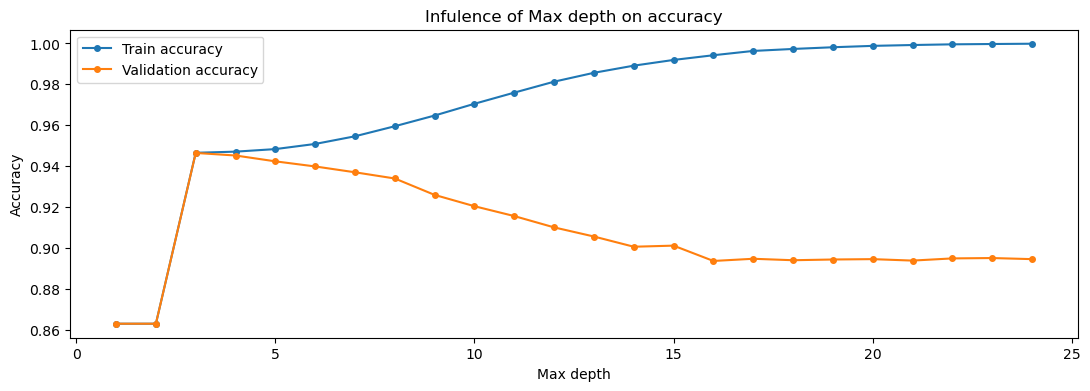

In [33]:
max_depth_range= np.arange(1, 25 , 1)
result_md = pd.DataFrame()
train_result_md = pd.DataFrame()
valid_result_md = pd.DataFrame()
for max_depth in max_depth_range:
    train_result_md = pd.DataFrame(None)
    valid_result_md = pd.DataFrame(None)
    for train_index, val_index in KF.split(X_train_scaled):
        model_md=DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42) #Our best parameters after tuning!
        model_md.fit(X_train_scaled.iloc[train_index], y_train.iloc[train_index])
        acc_train_md = accuracy_score(y_train.iloc[train_index], model_md.predict(X_train_scaled.iloc[train_index]))  # accuracy of the train
        acc_val_md = accuracy_score(y_train[val_index], model_md.predict(X_train_scaled.iloc[val_index]))  # accuracy of the validation
        train_result_md = train_result_md.append({'Train accuracy': acc_train_md}, ignore_index=True)
        valid_result_md = valid_result_md.append({'Validation accuracy': acc_val_md}, ignore_index=True)
    avg_train_md = train_result_md.mean()
    avg_val_md = valid_result_md.mean()
    result_md = result_md.append({'max_depth': max_depth,
                                'train_acc':avg_train_md,
                                 'val_acc':avg_val_md}, ignore_index=True)

plt.figure(figsize=(13, 4))
plt.plot(result_md['max_depth'], result_md['train_acc'], marker='o', markersize=4)
plt.plot(result_md['max_depth'], result_md['val_acc'], marker='o', markersize=4)
plt.title("Infulence of Max depth on accuracy")
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel('Max depth', fontsize = 10)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

# Final Decision tree

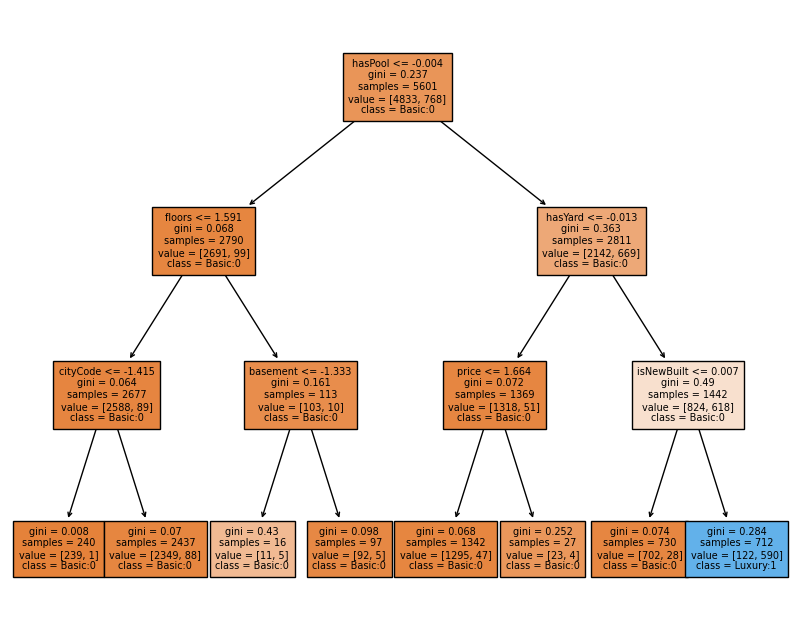

Train accuracy    0.946438
dtype: float64
Test accuracy    0.942184
dtype: float64


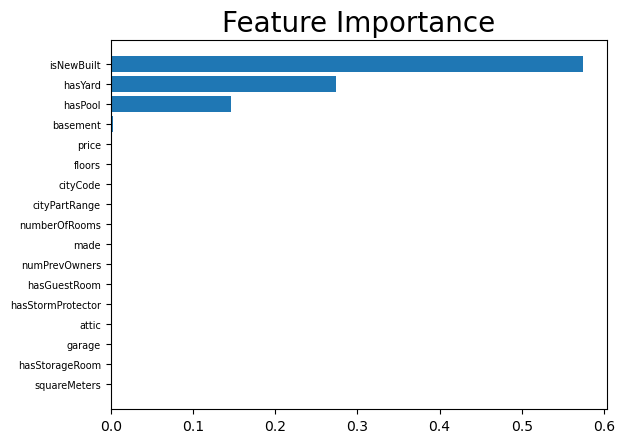

                   a
isNewBuilt  0.574418
hasYard     0.274396
hasPool     0.146522
basement    0.002386
price       0.000864
floors      0.000844
cityCode    0.000569


In [45]:

model_best_Dt = DecisionTreeClassifier(max_depth=3, criterion='gini', ccp_alpha = 0 ,  random_state=42)
model_best_Dt.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 8))
plot_tree(model_best_Dt, filled=True, class_names=['Basic:0', 'Luxury:1'], feature_names=X_train_scaled.columns, fontsize=7)
plt.show()


# ---------------- train set
acc_train = accuracy_score(y_train, model_best_Dt.predict(X_train_scaled)) #accuracy of the train
best_train_result_tree = {'Train accuracy': acc_train}

print(pd.Series(best_train_result_tree))

# ---------------- test set
acc_test = accuracy_score(y_test, model_best_Dt.predict(X_test_scaled)) #accuracy of the train
best_test_result_tree = {'Test accuracy': acc_test}

print(pd.Series(best_test_result_tree))

# -----Feature importances------
feature_importance = model_best_Dt.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_scaled.columns[sorted_idx], fontsize=7)
plt.title('Feature Importance', fontsize = 20)
plt.show()

imp = pd.DataFrame(data = feature_importance[sorted_idx], index= X_train_scaled.columns[sorted_idx], columns= ['a'] )
imp = imp.sort_values('a', ascending = False)
imp = imp[imp['a']>0]
print(imp)

# Confusion matrix final Decision tree

Confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000127C9478040>
Classification report               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1207
           1       0.80      0.77      0.79       194

    accuracy                           0.94      1401
   macro avg       0.88      0.87      0.88      1401
weighted avg       0.94      0.94      0.94      1401



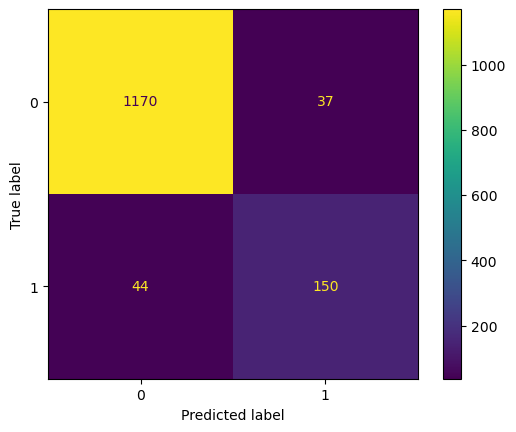

In [46]:
model_best_Dt = DecisionTreeClassifier(max_depth=3, criterion='gini', ccp_alpha = 0 ,  random_state=42)
model_best_Dt.fit(X_train_scaled, y_train)
acc_test = accuracy_score(y_test, model_best_Dt.predict(X_test_scaled))

cm = confusion_matrix(y_test, model_best_Dt.predict(X_test_scaled), labels=model_best_Dt.classes_)
con =  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_best_Dt.classes_)
print("Confusion matrix",con)
print("Classification report", classification_report(y_test,model_best_Dt.predict(X_test_scaled)))
con.plot()
plt.show()

# Neural Networks

In [52]:
df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]
X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

MM_scaler = MinMaxScaler()
std_scaler = StandardScaler()
loss_curve_flag = True

X_train_N = X_train.copy()
X_test_N = X_test.copy()
X_train_N = pd.DataFrame(scaler.fit_transform(X_train_N),columns=X_train.columns)
X_test_N = pd.DataFrame(scaler.transform(X_test_N),columns=X_train.columns)
print("X_train shape: ", X_train_N.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test_N.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5601, 17)
y_train shape:  (5601,)
X_test shape:  (1401, 17)
y_test shape:  (1401,)
X_train shape:  (5601, 17)
y_train shape:  (5601,)
X_test shape:  (1401, 17)
y_test shape:  (1401,)


Train accuracy    0.940903
dtype: float64
Test accuracy    0.92434
dtype: float64


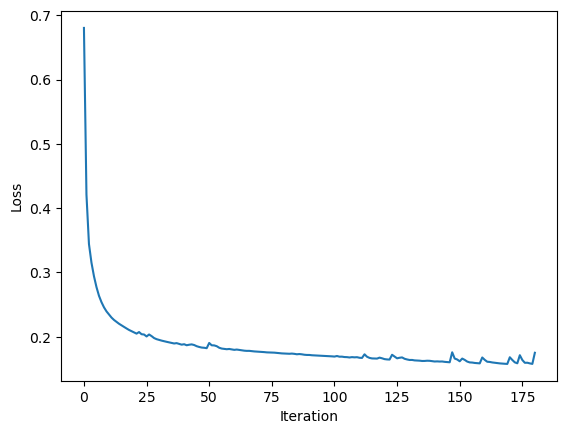

In [53]:
# ----------------- default artificial neural network
MLP_model = MLPClassifier(random_state=42)
# -----------------for the train set
MLP_model.fit(X_train_N, y_train)
acc_train = accuracy_score(y_train, MLP_model.predict(X_train_N))
best_train_result_MLP = {'Train accuracy': acc_train}
print(pd.Series(best_train_result_MLP))

# ----------------for the test set
acc_test = accuracy_score(y_test, MLP_model.predict(X_test_N)) 
best_test_result_MLP = {'Test accuracy': acc_test}
print(pd.Series(best_test_result_MLP))

plt.plot(MLP_model.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# GridSaerchCV 

In [61]:
TwoLayers = [(1,2),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,)]
for x in np.arange(1,21,5):
    for y in np.arange(1,21,5):
        TwoLayers.insert(-1, (x,y))

param_grid = {
              'hidden_layer_sizes': TwoLayers,
              'max_iter': [500],
              'activation': ['relu','logistic']
              }

grid_search = GridSearchCV(estimator = MLPClassifier(random_state=42, verbose=True, max_iter=500), param_grid=(param_grid),
                           refit=True, cv=10, return_train_score=True)
grid_search.fit(X_train_N, y_train)
Results = pd.DataFrame(grid_search.cv_results_)
print('The best parameters are:', grid_search.best_params_)
y_val = Results['mean_test_score']
y_train = Results['mean_train_score']
results_grid_search1 = pd.DataFrame(Results).sort_values('rank_test_score')[['params', 'mean_test_score']]
results_grid_search2 = pd.DataFrame(Results).sort_values('mean_train_score', ascending=False)[
    ['params', 'mean_train_score']]
headers_val = ["Number", "Parameters", "Validation score"]
headers_train = ["Number", "Parameters", "Train score"]
print(tabulate(results_grid_search1, headers=headers_val, tablefmt="grid"))
print(tabulate(results_grid_search2, headers=headers_train, tablefmt="grid"))

Iteration 1, loss = 0.60041363
Iteration 2, loss = 0.58380244
Iteration 3, loss = 0.56682867
Iteration 4, loss = 0.55076662
Iteration 5, loss = 0.53583759
Iteration 6, loss = 0.52216782
Iteration 7, loss = 0.50971134
Iteration 8, loss = 0.49829090
Iteration 9, loss = 0.48776377
Iteration 10, loss = 0.47823342
Iteration 11, loss = 0.46945734
Iteration 12, loss = 0.46136709
Iteration 13, loss = 0.45397230
Iteration 14, loss = 0.44711839
Iteration 15, loss = 0.44094207
Iteration 16, loss = 0.43517746
Iteration 17, loss = 0.42991823
Iteration 18, loss = 0.42485167
Iteration 19, loss = 0.41977791
Iteration 20, loss = 0.41427977
Iteration 21, loss = 0.40784947
Iteration 22, loss = 0.39986881
Iteration 23, loss = 0.39004814
Iteration 24, loss = 0.37857885
Iteration 25, loss = 0.36614807
Iteration 26, loss = 0.35479776
Iteration 27, loss = 0.34521047
Iteration 28, loss = 0.33673199
Iteration 29, loss = 0.32900566
Iteration 30, loss = 0.32187267
Iteration 31, loss = 0.31546913
Iteration 32, los

Iteration 61, loss = 0.25013389
Iteration 62, loss = 0.24923684
Iteration 63, loss = 0.24824312
Iteration 64, loss = 0.24735236
Iteration 65, loss = 0.24644592
Iteration 66, loss = 0.24558323
Iteration 67, loss = 0.24470570
Iteration 68, loss = 0.24388301
Iteration 69, loss = 0.24301329
Iteration 70, loss = 0.24220338
Iteration 71, loss = 0.24138156
Iteration 72, loss = 0.24055629
Iteration 73, loss = 0.23972917
Iteration 74, loss = 0.23892352
Iteration 75, loss = 0.23812131
Iteration 76, loss = 0.23734972
Iteration 77, loss = 0.23653487
Iteration 78, loss = 0.23575447
Iteration 79, loss = 0.23498808
Iteration 80, loss = 0.23423562
Iteration 81, loss = 0.23346899
Iteration 82, loss = 0.23272219
Iteration 83, loss = 0.23202948
Iteration 84, loss = 0.23128897
Iteration 85, loss = 0.23053965
Iteration 86, loss = 0.22980708
Iteration 87, loss = 0.22911768
Iteration 88, loss = 0.22841392
Iteration 89, loss = 0.22773015
Iteration 90, loss = 0.22704977
Iteration 91, loss = 0.22640547
Iteratio

Iteration 130, loss = 0.20412065
Iteration 131, loss = 0.20380219
Iteration 132, loss = 0.20346726
Iteration 133, loss = 0.20315021
Iteration 134, loss = 0.20283408
Iteration 135, loss = 0.20254216
Iteration 136, loss = 0.20227361
Iteration 137, loss = 0.20190582
Iteration 138, loss = 0.20163377
Iteration 139, loss = 0.20135259
Iteration 140, loss = 0.20109277
Iteration 141, loss = 0.20078564
Iteration 142, loss = 0.20053823
Iteration 143, loss = 0.20026654
Iteration 144, loss = 0.20000956
Iteration 145, loss = 0.19978997
Iteration 146, loss = 0.19956205
Iteration 147, loss = 0.19932838
Iteration 148, loss = 0.19909011
Iteration 149, loss = 0.19889692
Iteration 150, loss = 0.19871473
Iteration 151, loss = 0.19848325
Iteration 152, loss = 0.19825780
Iteration 153, loss = 0.19808303
Iteration 154, loss = 0.19789324
Iteration 155, loss = 0.19767908
Iteration 156, loss = 0.19749644
Iteration 157, loss = 0.19731952
Iteration 158, loss = 0.19713643
Iteration 159, loss = 0.19697451
Iteration 

Iteration 190, loss = 0.19701261
Iteration 191, loss = 0.19694334
Iteration 192, loss = 0.19687462
Iteration 193, loss = 0.19685413
Iteration 194, loss = 0.19673441
Iteration 195, loss = 0.19666783
Iteration 196, loss = 0.19661251
Iteration 197, loss = 0.19654123
Iteration 198, loss = 0.19646657
Iteration 199, loss = 0.19642083
Iteration 200, loss = 0.19635711
Iteration 201, loss = 0.19635108
Iteration 202, loss = 0.19627660
Iteration 203, loss = 0.19625036
Iteration 204, loss = 0.19620616
Iteration 205, loss = 0.19606080
Iteration 206, loss = 0.19605918
Iteration 207, loss = 0.19602130
Iteration 208, loss = 0.19594602
Iteration 209, loss = 0.19593967
Iteration 210, loss = 0.19591770
Iteration 211, loss = 0.19592745
Iteration 212, loss = 0.19584816
Iteration 213, loss = 0.19575637
Iteration 214, loss = 0.19573446
Iteration 215, loss = 0.19570080
Iteration 216, loss = 0.19564031
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss =

Iteration 11, loss = 0.46882308
Iteration 12, loss = 0.46077145
Iteration 13, loss = 0.45334752
Iteration 14, loss = 0.44664170
Iteration 15, loss = 0.44062249
Iteration 16, loss = 0.43506432
Iteration 17, loss = 0.42995474
Iteration 18, loss = 0.42509614
Iteration 19, loss = 0.42038151
Iteration 20, loss = 0.41540182
Iteration 21, loss = 0.40974306
Iteration 22, loss = 0.40284901
Iteration 23, loss = 0.39411810
Iteration 24, loss = 0.38315910
Iteration 25, loss = 0.37068571
Iteration 26, loss = 0.35840626
Iteration 27, loss = 0.34789393
Iteration 28, loss = 0.33882295
Iteration 29, loss = 0.33056926
Iteration 30, loss = 0.32300146
Iteration 31, loss = 0.31627505
Iteration 32, loss = 0.31022583
Iteration 33, loss = 0.30493655
Iteration 34, loss = 0.30029153
Iteration 35, loss = 0.29614708
Iteration 36, loss = 0.29236777
Iteration 37, loss = 0.28891871
Iteration 38, loss = 0.28576459
Iteration 39, loss = 0.28287179
Iteration 40, loss = 0.28015209
Iteration 41, loss = 0.27769361
Iteratio

Iteration 74, loss = 0.23943308
Iteration 75, loss = 0.23861612
Iteration 76, loss = 0.23783364
Iteration 77, loss = 0.23701823
Iteration 78, loss = 0.23624484
Iteration 79, loss = 0.23549194
Iteration 80, loss = 0.23471682
Iteration 81, loss = 0.23397520
Iteration 82, loss = 0.23324171
Iteration 83, loss = 0.23251088
Iteration 84, loss = 0.23175477
Iteration 85, loss = 0.23098235
Iteration 86, loss = 0.23026168
Iteration 87, loss = 0.22957608
Iteration 88, loss = 0.22889192
Iteration 89, loss = 0.22819785
Iteration 90, loss = 0.22750405
Iteration 91, loss = 0.22683511
Iteration 92, loss = 0.22621783
Iteration 93, loss = 0.22554752
Iteration 94, loss = 0.22487202
Iteration 95, loss = 0.22423685
Iteration 96, loss = 0.22357435
Iteration 97, loss = 0.22297050
Iteration 98, loss = 0.22235535
Iteration 99, loss = 0.22175325
Iteration 100, loss = 0.22116868
Iteration 101, loss = 0.22055849
Iteration 102, loss = 0.22000305
Iteration 103, loss = 0.21941066
Iteration 104, loss = 0.21887297
Ite

Iteration 130, loss = 0.20742446
Iteration 131, loss = 0.20708582
Iteration 132, loss = 0.20681591
Iteration 133, loss = 0.20646649
Iteration 134, loss = 0.20614435
Iteration 135, loss = 0.20582701
Iteration 136, loss = 0.20548583
Iteration 137, loss = 0.20521963
Iteration 138, loss = 0.20494933
Iteration 139, loss = 0.20466417
Iteration 140, loss = 0.20435823
Iteration 141, loss = 0.20408335
Iteration 142, loss = 0.20384085
Iteration 143, loss = 0.20358344
Iteration 144, loss = 0.20332190
Iteration 145, loss = 0.20311442
Iteration 146, loss = 0.20285080
Iteration 147, loss = 0.20261321
Iteration 148, loss = 0.20237296
Iteration 149, loss = 0.20218491
Iteration 150, loss = 0.20191568
Iteration 151, loss = 0.20170204
Iteration 152, loss = 0.20150645
Iteration 153, loss = 0.20130693
Iteration 154, loss = 0.20114263
Iteration 155, loss = 0.20094077
Iteration 156, loss = 0.20073212
Iteration 157, loss = 0.20053305
Iteration 158, loss = 0.20036183
Iteration 159, loss = 0.20017453
Iteration 

Iteration 183, loss = 0.19189770
Iteration 184, loss = 0.19178303
Iteration 185, loss = 0.19171384
Iteration 186, loss = 0.19164724
Iteration 187, loss = 0.19156156
Iteration 188, loss = 0.19147417
Iteration 189, loss = 0.19139444
Iteration 190, loss = 0.19129192
Iteration 191, loss = 0.19119772
Iteration 192, loss = 0.19115283
Iteration 193, loss = 0.19108054
Iteration 194, loss = 0.19098216
Iteration 195, loss = 0.19093136
Iteration 196, loss = 0.19086149
Iteration 197, loss = 0.19079032
Iteration 198, loss = 0.19074835
Iteration 199, loss = 0.19068591
Iteration 200, loss = 0.19058996
Iteration 201, loss = 0.19060095
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60064488
Iteration 2, loss = 0.58395059
Iteration 3, loss = 0.56702891
Iteration 4, loss = 0.55065175
Iteration 5, loss = 0.53578012
Iteration 6, loss = 0.52203624
Iteration 7, loss = 0.50953184
Iteration 8, loss = 0.49815915
Iteration 9, loss = 0.48759523
Iter

Iteration 36, loss = 0.27904727
Iteration 37, loss = 0.27705999
Iteration 38, loss = 0.27498279
Iteration 39, loss = 0.27299250
Iteration 40, loss = 0.27102759
Iteration 41, loss = 0.26915261
Iteration 42, loss = 0.26725139
Iteration 43, loss = 0.26541377
Iteration 44, loss = 0.26357884
Iteration 45, loss = 0.26174831
Iteration 46, loss = 0.25997072
Iteration 47, loss = 0.25834497
Iteration 48, loss = 0.25653469
Iteration 49, loss = 0.25484167
Iteration 50, loss = 0.25309177
Iteration 51, loss = 0.25137373
Iteration 52, loss = 0.24977087
Iteration 53, loss = 0.24827327
Iteration 54, loss = 0.24681907
Iteration 55, loss = 0.24553800
Iteration 56, loss = 0.24437169
Iteration 57, loss = 0.24329191
Iteration 58, loss = 0.24224609
Iteration 59, loss = 0.24135882
Iteration 60, loss = 0.24049507
Iteration 61, loss = 0.23966453
Iteration 62, loss = 0.23901321
Iteration 63, loss = 0.23836825
Iteration 64, loss = 0.23780776
Iteration 65, loss = 0.23730673
Iteration 66, loss = 0.23673639
Iteratio

Iteration 139, loss = 0.21837580
Iteration 140, loss = 0.21827577
Iteration 141, loss = 0.21816371
Iteration 142, loss = 0.21807949
Iteration 143, loss = 0.21802683
Iteration 144, loss = 0.21792764
Iteration 145, loss = 0.21792883
Iteration 146, loss = 0.21797337
Iteration 147, loss = 0.21771711
Iteration 148, loss = 0.21767607
Iteration 149, loss = 0.21766424
Iteration 150, loss = 0.21752224
Iteration 151, loss = 0.21743022
Iteration 152, loss = 0.21739062
Iteration 153, loss = 0.21730785
Iteration 154, loss = 0.21721708
Iteration 155, loss = 0.21715735
Iteration 156, loss = 0.21711203
Iteration 157, loss = 0.21708152
Iteration 158, loss = 0.21704959
Iteration 159, loss = 0.21694113
Iteration 160, loss = 0.21681927
Iteration 161, loss = 0.21684087
Iteration 162, loss = 0.21675242
Iteration 163, loss = 0.21673860
Iteration 164, loss = 0.21659160
Iteration 165, loss = 0.21656077
Iteration 166, loss = 0.21653693
Iteration 167, loss = 0.21646637
Iteration 168, loss = 0.21640978
Iteration 

Iteration 50, loss = 0.25263047
Iteration 51, loss = 0.25085807
Iteration 52, loss = 0.24918935
Iteration 53, loss = 0.24768169
Iteration 54, loss = 0.24633736
Iteration 55, loss = 0.24504394
Iteration 56, loss = 0.24390752
Iteration 57, loss = 0.24280314
Iteration 58, loss = 0.24174177
Iteration 59, loss = 0.24087662
Iteration 60, loss = 0.24004508
Iteration 61, loss = 0.23922609
Iteration 62, loss = 0.23845606
Iteration 63, loss = 0.23781193
Iteration 64, loss = 0.23719293
Iteration 65, loss = 0.23671732
Iteration 66, loss = 0.23631192
Iteration 67, loss = 0.23582603
Iteration 68, loss = 0.23541663
Iteration 69, loss = 0.23504754
Iteration 70, loss = 0.23463232
Iteration 71, loss = 0.23429327
Iteration 72, loss = 0.23385284
Iteration 73, loss = 0.23347745
Iteration 74, loss = 0.23315105
Iteration 75, loss = 0.23282185
Iteration 76, loss = 0.23246080
Iteration 77, loss = 0.23218650
Iteration 78, loss = 0.23189572
Iteration 79, loss = 0.23161716
Iteration 80, loss = 0.23125335
Iteratio

Iteration 153, loss = 0.21359109
Iteration 154, loss = 0.21359740
Iteration 155, loss = 0.21347390
Iteration 156, loss = 0.21341855
Iteration 157, loss = 0.21336460
Iteration 158, loss = 0.21327520
Iteration 159, loss = 0.21319624
Iteration 160, loss = 0.21314463
Iteration 161, loss = 0.21311071
Iteration 162, loss = 0.21308531
Iteration 163, loss = 0.21308055
Iteration 164, loss = 0.21290761
Iteration 165, loss = 0.21290322
Iteration 166, loss = 0.21287538
Iteration 167, loss = 0.21283510
Iteration 168, loss = 0.21274798
Iteration 169, loss = 0.21269275
Iteration 170, loss = 0.21268736
Iteration 171, loss = 0.21260274
Iteration 172, loss = 0.21253795
Iteration 173, loss = 0.21250746
Iteration 174, loss = 0.21252741
Iteration 175, loss = 0.21251132
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51356731
Iteration 2, loss = 0.49019863
Iteration 3, loss = 0.46883387
Iteration 4, loss = 0.44923158
Iteration 5, loss = 0.43131

Iteration 54, loss = 0.24480690
Iteration 55, loss = 0.24355108
Iteration 56, loss = 0.24254108
Iteration 57, loss = 0.24148997
Iteration 58, loss = 0.24053285
Iteration 59, loss = 0.23964837
Iteration 60, loss = 0.23882674
Iteration 61, loss = 0.23808600
Iteration 62, loss = 0.23743155
Iteration 63, loss = 0.23675693
Iteration 64, loss = 0.23617590
Iteration 65, loss = 0.23564674
Iteration 66, loss = 0.23519550
Iteration 67, loss = 0.23475407
Iteration 68, loss = 0.23435305
Iteration 69, loss = 0.23393705
Iteration 70, loss = 0.23354043
Iteration 71, loss = 0.23311832
Iteration 72, loss = 0.23277749
Iteration 73, loss = 0.23244818
Iteration 74, loss = 0.23205870
Iteration 75, loss = 0.23174632
Iteration 76, loss = 0.23136843
Iteration 77, loss = 0.23110708
Iteration 78, loss = 0.23070301
Iteration 79, loss = 0.23040551
Iteration 80, loss = 0.23002386
Iteration 81, loss = 0.22972428
Iteration 82, loss = 0.22934003
Iteration 83, loss = 0.22902020
Iteration 84, loss = 0.22873061
Iteratio

Iteration 117, loss = 0.22238565
Iteration 118, loss = 0.22226897
Iteration 119, loss = 0.22217673
Iteration 120, loss = 0.22205642
Iteration 121, loss = 0.22196124
Iteration 122, loss = 0.22185658
Iteration 123, loss = 0.22180135
Iteration 124, loss = 0.22161869
Iteration 125, loss = 0.22154007
Iteration 126, loss = 0.22139055
Iteration 127, loss = 0.22131855
Iteration 128, loss = 0.22121223
Iteration 129, loss = 0.22112236
Iteration 130, loss = 0.22103247
Iteration 131, loss = 0.22089829
Iteration 132, loss = 0.22084763
Iteration 133, loss = 0.22074199
Iteration 134, loss = 0.22070920
Iteration 135, loss = 0.22055940
Iteration 136, loss = 0.22050229
Iteration 137, loss = 0.22045563
Iteration 138, loss = 0.22035334
Iteration 139, loss = 0.22029499
Iteration 140, loss = 0.22017332
Iteration 141, loss = 0.22004903
Iteration 142, loss = 0.22003954
Iteration 143, loss = 0.22003559
Iteration 144, loss = 0.21988830
Iteration 145, loss = 0.21978867
Iteration 146, loss = 0.21973136
Iteration 

Iteration 52, loss = 0.24625683
Iteration 53, loss = 0.24475023
Iteration 54, loss = 0.24329631
Iteration 55, loss = 0.24191038
Iteration 56, loss = 0.24064805
Iteration 57, loss = 0.23956077
Iteration 58, loss = 0.23842259
Iteration 59, loss = 0.23751609
Iteration 60, loss = 0.23666734
Iteration 61, loss = 0.23581514
Iteration 62, loss = 0.23503971
Iteration 63, loss = 0.23430841
Iteration 64, loss = 0.23363166
Iteration 65, loss = 0.23294437
Iteration 66, loss = 0.23230086
Iteration 67, loss = 0.23170781
Iteration 68, loss = 0.23126133
Iteration 69, loss = 0.23066083
Iteration 70, loss = 0.23016001
Iteration 71, loss = 0.22965809
Iteration 72, loss = 0.22930246
Iteration 73, loss = 0.22887356
Iteration 74, loss = 0.22852314
Iteration 75, loss = 0.22818858
Iteration 76, loss = 0.22785081
Iteration 77, loss = 0.22750510
Iteration 78, loss = 0.22722551
Iteration 79, loss = 0.22689974
Iteration 80, loss = 0.22662567
Iteration 81, loss = 0.22637591
Iteration 82, loss = 0.22606220
Iteratio

Iteration 168, loss = 0.19553110
Iteration 169, loss = 0.19548963
Iteration 170, loss = 0.19540471
Iteration 171, loss = 0.19534917
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69925558
Iteration 2, loss = 0.64285531
Iteration 3, loss = 0.59718517
Iteration 4, loss = 0.55960136
Iteration 5, loss = 0.52907429
Iteration 6, loss = 0.50389566
Iteration 7, loss = 0.48303852
Iteration 8, loss = 0.46527725
Iteration 9, loss = 0.45043668
Iteration 10, loss = 0.43737978
Iteration 11, loss = 0.42590312
Iteration 12, loss = 0.41563382
Iteration 13, loss = 0.40644813
Iteration 14, loss = 0.39812677
Iteration 15, loss = 0.39041670
Iteration 16, loss = 0.38317871
Iteration 17, loss = 0.37659403
Iteration 18, loss = 0.37048478
Iteration 19, loss = 0.36466995
Iteration 20, loss = 0.35912658
Iteration 21, loss = 0.35392932
Iteration 22, loss = 0.34877743
Iteration 23, loss = 0.34406543
Iteration 24, loss = 0.33933160
Iteration 25, loss 

Iteration 80, loss = 0.20786884
Iteration 81, loss = 0.20737551
Iteration 82, loss = 0.20688426
Iteration 83, loss = 0.20639207
Iteration 84, loss = 0.20599332
Iteration 85, loss = 0.20549190
Iteration 86, loss = 0.20506599
Iteration 87, loss = 0.20465313
Iteration 88, loss = 0.20410388
Iteration 89, loss = 0.20370504
Iteration 90, loss = 0.20331031
Iteration 91, loss = 0.20280548
Iteration 92, loss = 0.20238378
Iteration 93, loss = 0.20202362
Iteration 94, loss = 0.20161315
Iteration 95, loss = 0.20127999
Iteration 96, loss = 0.20083122
Iteration 97, loss = 0.20048131
Iteration 98, loss = 0.20017445
Iteration 99, loss = 0.19977122
Iteration 100, loss = 0.19938566
Iteration 101, loss = 0.19897948
Iteration 102, loss = 0.19865516
Iteration 103, loss = 0.19836608
Iteration 104, loss = 0.19805205
Iteration 105, loss = 0.19771974
Iteration 106, loss = 0.19734949
Iteration 107, loss = 0.19715205
Iteration 108, loss = 0.19680266
Iteration 109, loss = 0.19652042
Iteration 110, loss = 0.196305

Iteration 6, loss = 0.50018658
Iteration 7, loss = 0.47944485
Iteration 8, loss = 0.46183267
Iteration 9, loss = 0.44692351
Iteration 10, loss = 0.43387894
Iteration 11, loss = 0.42241628
Iteration 12, loss = 0.41193192
Iteration 13, loss = 0.40260043
Iteration 14, loss = 0.39428684
Iteration 15, loss = 0.38665094
Iteration 16, loss = 0.37946475
Iteration 17, loss = 0.37286975
Iteration 18, loss = 0.36670686
Iteration 19, loss = 0.36098350
Iteration 20, loss = 0.35561179
Iteration 21, loss = 0.35055754
Iteration 22, loss = 0.34558019
Iteration 23, loss = 0.34103133
Iteration 24, loss = 0.33640115
Iteration 25, loss = 0.33200932
Iteration 26, loss = 0.32778658
Iteration 27, loss = 0.32349590
Iteration 28, loss = 0.31910319
Iteration 29, loss = 0.31477754
Iteration 30, loss = 0.31049125
Iteration 31, loss = 0.30582237
Iteration 32, loss = 0.30099700
Iteration 33, loss = 0.29597670
Iteration 34, loss = 0.29104088
Iteration 35, loss = 0.28597115
Iteration 36, loss = 0.28082274
Iteration 37

Iteration 88, loss = 0.20521735
Iteration 89, loss = 0.20481370
Iteration 90, loss = 0.20427321
Iteration 91, loss = 0.20378004
Iteration 92, loss = 0.20332104
Iteration 93, loss = 0.20290446
Iteration 94, loss = 0.20251934
Iteration 95, loss = 0.20212728
Iteration 96, loss = 0.20162403
Iteration 97, loss = 0.20127717
Iteration 98, loss = 0.20098196
Iteration 99, loss = 0.20058343
Iteration 100, loss = 0.20014325
Iteration 101, loss = 0.19979840
Iteration 102, loss = 0.19951488
Iteration 103, loss = 0.19919790
Iteration 104, loss = 0.19895905
Iteration 105, loss = 0.19859381
Iteration 106, loss = 0.19826969
Iteration 107, loss = 0.19799755
Iteration 108, loss = 0.19771265
Iteration 109, loss = 0.19745994
Iteration 110, loss = 0.19734522
Iteration 111, loss = 0.19699732
Iteration 112, loss = 0.19680468
Iteration 113, loss = 0.19647055
Iteration 114, loss = 0.19632587
Iteration 115, loss = 0.19604148
Iteration 116, loss = 0.19589369
Iteration 117, loss = 0.19567221
Iteration 118, loss = 

Iteration 172, loss = 0.19228621
Iteration 173, loss = 0.19228295
Iteration 174, loss = 0.19227055
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69481675
Iteration 2, loss = 0.63936863
Iteration 3, loss = 0.59416288
Iteration 4, loss = 0.55759751
Iteration 5, loss = 0.52744298
Iteration 6, loss = 0.50227856
Iteration 7, loss = 0.48151326
Iteration 8, loss = 0.46419006
Iteration 9, loss = 0.44930746
Iteration 10, loss = 0.43630018
Iteration 11, loss = 0.42494928
Iteration 12, loss = 0.41490012
Iteration 13, loss = 0.40571369
Iteration 14, loss = 0.39748042
Iteration 15, loss = 0.38987443
Iteration 16, loss = 0.38261205
Iteration 17, loss = 0.37600463
Iteration 18, loss = 0.36980450
Iteration 19, loss = 0.36397798
Iteration 20, loss = 0.35830967
Iteration 21, loss = 0.35312289
Iteration 22, loss = 0.34824286
Iteration 23, loss = 0.34367031
Iteration 24, loss = 0.33901441
Iteration 25, loss = 0.33467011
Iteration 26, loss =

Iteration 94, loss = 0.19894014
Iteration 95, loss = 0.19864663
Iteration 96, loss = 0.19803412
Iteration 97, loss = 0.19761508
Iteration 98, loss = 0.19733673
Iteration 99, loss = 0.19686402
Iteration 100, loss = 0.19640950
Iteration 101, loss = 0.19615369
Iteration 102, loss = 0.19579732
Iteration 103, loss = 0.19550321
Iteration 104, loss = 0.19514177
Iteration 105, loss = 0.19489860
Iteration 106, loss = 0.19453393
Iteration 107, loss = 0.19417835
Iteration 108, loss = 0.19396324
Iteration 109, loss = 0.19363643
Iteration 110, loss = 0.19343385
Iteration 111, loss = 0.19314129
Iteration 112, loss = 0.19294997
Iteration 113, loss = 0.19266508
Iteration 114, loss = 0.19253688
Iteration 115, loss = 0.19225022
Iteration 116, loss = 0.19203897
Iteration 117, loss = 0.19180639
Iteration 118, loss = 0.19159107
Iteration 119, loss = 0.19143474
Iteration 120, loss = 0.19123486
Iteration 121, loss = 0.19107589
Iteration 122, loss = 0.19086617
Iteration 123, loss = 0.19074780
Iteration 124, l

Iteration 12, loss = 0.75911104
Iteration 13, loss = 0.73199801
Iteration 14, loss = 0.70777593
Iteration 15, loss = 0.68659885
Iteration 16, loss = 0.66710733
Iteration 17, loss = 0.64982889
Iteration 18, loss = 0.63405523
Iteration 19, loss = 0.61958685
Iteration 20, loss = 0.60655051
Iteration 21, loss = 0.59434001
Iteration 22, loss = 0.58313307
Iteration 23, loss = 0.57280251
Iteration 24, loss = 0.56317652
Iteration 25, loss = 0.55422543
Iteration 26, loss = 0.54553919
Iteration 27, loss = 0.53719693
Iteration 28, loss = 0.52934085
Iteration 29, loss = 0.52171084
Iteration 30, loss = 0.51432602
Iteration 31, loss = 0.50712727
Iteration 32, loss = 0.50011964
Iteration 33, loss = 0.49325552
Iteration 34, loss = 0.48690916
Iteration 35, loss = 0.48085613
Iteration 36, loss = 0.47485386
Iteration 37, loss = 0.46912436
Iteration 38, loss = 0.46332297
Iteration 39, loss = 0.45759604
Iteration 40, loss = 0.45219983
Iteration 41, loss = 0.44672936
Iteration 42, loss = 0.44118906
Iteratio

Iteration 71, loss = 0.29907640
Iteration 72, loss = 0.29300234
Iteration 73, loss = 0.28703319
Iteration 74, loss = 0.28109289
Iteration 75, loss = 0.27508162
Iteration 76, loss = 0.26862588
Iteration 77, loss = 0.26194462
Iteration 78, loss = 0.25505676
Iteration 79, loss = 0.24775237
Iteration 80, loss = 0.24074103
Iteration 81, loss = 0.23494238
Iteration 82, loss = 0.23058009
Iteration 83, loss = 0.22741863
Iteration 84, loss = 0.22502521
Iteration 85, loss = 0.22340479
Iteration 86, loss = 0.22194603
Iteration 87, loss = 0.22078305
Iteration 88, loss = 0.21968327
Iteration 89, loss = 0.21881943
Iteration 90, loss = 0.21793098
Iteration 91, loss = 0.21702575
Iteration 92, loss = 0.21633524
Iteration 93, loss = 0.21558078
Iteration 94, loss = 0.21484913
Iteration 95, loss = 0.21422978
Iteration 96, loss = 0.21357257
Iteration 97, loss = 0.21291714
Iteration 98, loss = 0.21235427
Iteration 99, loss = 0.21171717
Iteration 100, loss = 0.21126479
Iteration 101, loss = 0.21067783
Iterat

Iteration 126, loss = 0.19765259
Iteration 127, loss = 0.19736811
Iteration 128, loss = 0.19718944
Iteration 129, loss = 0.19687251
Iteration 130, loss = 0.19645651
Iteration 131, loss = 0.19627358
Iteration 132, loss = 0.19611472
Iteration 133, loss = 0.19583836
Iteration 134, loss = 0.19545928
Iteration 135, loss = 0.19521053
Iteration 136, loss = 0.19501120
Iteration 137, loss = 0.19476784
Iteration 138, loss = 0.19465052
Iteration 139, loss = 0.19441181
Iteration 140, loss = 0.19430306
Iteration 141, loss = 0.19401696
Iteration 142, loss = 0.19388320
Iteration 143, loss = 0.19366467
Iteration 144, loss = 0.19358853
Iteration 145, loss = 0.19329416
Iteration 146, loss = 0.19319878
Iteration 147, loss = 0.19308961
Iteration 148, loss = 0.19292142
Iteration 149, loss = 0.19283379
Iteration 150, loss = 0.19260453
Iteration 151, loss = 0.19246414
Iteration 152, loss = 0.19243558
Iteration 153, loss = 0.19218497
Iteration 154, loss = 0.19218432
Iteration 155, loss = 0.19207695
Iteration 

Iteration 179, loss = 0.19341261
Iteration 180, loss = 0.19330924
Iteration 181, loss = 0.19329412
Iteration 182, loss = 0.19323867
Iteration 183, loss = 0.19320854
Iteration 184, loss = 0.19306892
Iteration 185, loss = 0.19312452
Iteration 186, loss = 0.19302825
Iteration 187, loss = 0.19303673
Iteration 188, loss = 0.19287982
Iteration 189, loss = 0.19303217
Iteration 190, loss = 0.19300121
Iteration 191, loss = 0.19284512
Iteration 192, loss = 0.19281591
Iteration 193, loss = 0.19270539
Iteration 194, loss = 0.19278779
Iteration 195, loss = 0.19271803
Iteration 196, loss = 0.19287313
Iteration 197, loss = 0.19256683
Iteration 198, loss = 0.19259037
Iteration 199, loss = 0.19271883
Iteration 200, loss = 0.19249742
Iteration 201, loss = 0.19249352
Iteration 202, loss = 0.19258497
Iteration 203, loss = 0.19249453
Iteration 204, loss = 0.19243722
Iteration 205, loss = 0.19236865
Iteration 206, loss = 0.19230285
Iteration 207, loss = 0.19240364
Iteration 208, loss = 0.19232725
Training l

Iteration 18, loss = 0.63029529
Iteration 19, loss = 0.61570030
Iteration 20, loss = 0.60236063
Iteration 21, loss = 0.58994696
Iteration 22, loss = 0.57856727
Iteration 23, loss = 0.56792416
Iteration 24, loss = 0.55789734
Iteration 25, loss = 0.54856751
Iteration 26, loss = 0.53973251
Iteration 27, loss = 0.53133838
Iteration 28, loss = 0.52334089
Iteration 29, loss = 0.51560672
Iteration 30, loss = 0.50835575
Iteration 31, loss = 0.50122129
Iteration 32, loss = 0.49423484
Iteration 33, loss = 0.48764551
Iteration 34, loss = 0.48109437
Iteration 35, loss = 0.47474679
Iteration 36, loss = 0.46864235
Iteration 37, loss = 0.46264050
Iteration 38, loss = 0.45699146
Iteration 39, loss = 0.45153301
Iteration 40, loss = 0.44622518
Iteration 41, loss = 0.44100276
Iteration 42, loss = 0.43575743
Iteration 43, loss = 0.43065973
Iteration 44, loss = 0.42565343
Iteration 45, loss = 0.42082786
Iteration 46, loss = 0.41605074
Iteration 47, loss = 0.41137452
Iteration 48, loss = 0.40674695
Iteratio

Iteration 47, loss = 0.41604372
Iteration 48, loss = 0.41153316
Iteration 49, loss = 0.40722851
Iteration 50, loss = 0.40313492
Iteration 51, loss = 0.39913054
Iteration 52, loss = 0.39509603
Iteration 53, loss = 0.39124666
Iteration 54, loss = 0.38715617
Iteration 55, loss = 0.38343279
Iteration 56, loss = 0.37965227
Iteration 57, loss = 0.37578588
Iteration 58, loss = 0.37191370
Iteration 59, loss = 0.36809532
Iteration 60, loss = 0.36421266
Iteration 61, loss = 0.36019635
Iteration 62, loss = 0.35608566
Iteration 63, loss = 0.35190115
Iteration 64, loss = 0.34765597
Iteration 65, loss = 0.34325408
Iteration 66, loss = 0.33871491
Iteration 67, loss = 0.33399057
Iteration 68, loss = 0.32906203
Iteration 69, loss = 0.32380661
Iteration 70, loss = 0.31825112
Iteration 71, loss = 0.31224357
Iteration 72, loss = 0.30596555
Iteration 73, loss = 0.29915528
Iteration 74, loss = 0.29195901
Iteration 75, loss = 0.28455930
Iteration 76, loss = 0.27697619
Iteration 77, loss = 0.26930077
Iteratio

Iteration 90, loss = 0.21765542
Iteration 91, loss = 0.21683576
Iteration 92, loss = 0.21613075
Iteration 93, loss = 0.21532240
Iteration 94, loss = 0.21452535
Iteration 95, loss = 0.21389325
Iteration 96, loss = 0.21315334
Iteration 97, loss = 0.21250848
Iteration 98, loss = 0.21191507
Iteration 99, loss = 0.21132922
Iteration 100, loss = 0.21072709
Iteration 101, loss = 0.21005962
Iteration 102, loss = 0.20949335
Iteration 103, loss = 0.20898109
Iteration 104, loss = 0.20836330
Iteration 105, loss = 0.20767903
Iteration 106, loss = 0.20720908
Iteration 107, loss = 0.20669165
Iteration 108, loss = 0.20608962
Iteration 109, loss = 0.20562651
Iteration 110, loss = 0.20519275
Iteration 111, loss = 0.20456778
Iteration 112, loss = 0.20419428
Iteration 113, loss = 0.20375847
Iteration 114, loss = 0.20337130
Iteration 115, loss = 0.20281269
Iteration 116, loss = 0.20252752
Iteration 117, loss = 0.20208145
Iteration 118, loss = 0.20160103
Iteration 119, loss = 0.20126171
Iteration 120, loss 

Iteration 135, loss = 0.19202647
Iteration 136, loss = 0.19195371
Iteration 137, loss = 0.19162734
Iteration 138, loss = 0.19144643
Iteration 139, loss = 0.19135951
Iteration 140, loss = 0.19112668
Iteration 141, loss = 0.19098223
Iteration 142, loss = 0.19089364
Iteration 143, loss = 0.19068615
Iteration 144, loss = 0.19052028
Iteration 145, loss = 0.19037294
Iteration 146, loss = 0.19022238
Iteration 147, loss = 0.19020773
Iteration 148, loss = 0.19002037
Iteration 149, loss = 0.19000217
Iteration 150, loss = 0.18980082
Iteration 151, loss = 0.18963157
Iteration 152, loss = 0.18950014
Iteration 153, loss = 0.18942187
Iteration 154, loss = 0.18928724
Iteration 155, loss = 0.18924833
Iteration 156, loss = 0.18908540
Iteration 157, loss = 0.18907618
Iteration 158, loss = 0.18893015
Iteration 159, loss = 0.18885263
Iteration 160, loss = 0.18877362
Iteration 161, loss = 0.18862473
Iteration 162, loss = 0.18856691
Iteration 163, loss = 0.18843657
Iteration 164, loss = 0.18847243
Iteration 

Iteration 196, loss = 0.19210429
Iteration 197, loss = 0.19212158
Iteration 198, loss = 0.19204967
Iteration 199, loss = 0.19201152
Iteration 200, loss = 0.19188323
Iteration 201, loss = 0.19187155
Iteration 202, loss = 0.19186875
Iteration 203, loss = 0.19197262
Iteration 204, loss = 0.19179201
Iteration 205, loss = 0.19185741
Iteration 206, loss = 0.19177021
Iteration 207, loss = 0.19177045
Iteration 208, loss = 0.19165397
Iteration 209, loss = 0.19162611
Iteration 210, loss = 0.19164734
Iteration 211, loss = 0.19155297
Iteration 212, loss = 0.19161956
Iteration 213, loss = 0.19150504
Iteration 214, loss = 0.19158718
Iteration 215, loss = 0.19141579
Iteration 216, loss = 0.19147798
Iteration 217, loss = 0.19148012
Iteration 218, loss = 0.19135994
Iteration 219, loss = 0.19140591
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.01866967
Iteration 2, loss = 0.91570446
Iteration 3, loss = 0.83159851
Iteration 4, loss = 0.762

Iteration 56, loss = 0.25553835
Iteration 57, loss = 0.25344266
Iteration 58, loss = 0.25139394
Iteration 59, loss = 0.24932332
Iteration 60, loss = 0.24725778
Iteration 61, loss = 0.24528518
Iteration 62, loss = 0.24334276
Iteration 63, loss = 0.24138441
Iteration 64, loss = 0.23952292
Iteration 65, loss = 0.23773488
Iteration 66, loss = 0.23591795
Iteration 67, loss = 0.23422065
Iteration 68, loss = 0.23254190
Iteration 69, loss = 0.23087430
Iteration 70, loss = 0.22922725
Iteration 71, loss = 0.22770749
Iteration 72, loss = 0.22613673
Iteration 73, loss = 0.22465919
Iteration 74, loss = 0.22314673
Iteration 75, loss = 0.22172249
Iteration 76, loss = 0.22027703
Iteration 77, loss = 0.21901366
Iteration 78, loss = 0.21771884
Iteration 79, loss = 0.21651612
Iteration 80, loss = 0.21529942
Iteration 81, loss = 0.21411516
Iteration 82, loss = 0.21306619
Iteration 83, loss = 0.21207746
Iteration 84, loss = 0.21104189
Iteration 85, loss = 0.21004678
Iteration 86, loss = 0.20907533
Iteratio

Iteration 126, loss = 0.19068337
Iteration 127, loss = 0.19049616
Iteration 128, loss = 0.19043179
Iteration 129, loss = 0.19031975
Iteration 130, loss = 0.19020177
Iteration 131, loss = 0.19017604
Iteration 132, loss = 0.19008972
Iteration 133, loss = 0.18992114
Iteration 134, loss = 0.18982372
Iteration 135, loss = 0.18979817
Iteration 136, loss = 0.18964081
Iteration 137, loss = 0.18956003
Iteration 138, loss = 0.18960322
Iteration 139, loss = 0.18946065
Iteration 140, loss = 0.18951506
Iteration 141, loss = 0.18936812
Iteration 142, loss = 0.18935869
Iteration 143, loss = 0.18919242
Iteration 144, loss = 0.18912448
Iteration 145, loss = 0.18912768
Iteration 146, loss = 0.18913394
Iteration 147, loss = 0.18901612
Iteration 148, loss = 0.18894066
Iteration 149, loss = 0.18890521
Iteration 150, loss = 0.18892791
Iteration 151, loss = 0.18879313
Iteration 152, loss = 0.18877589
Iteration 153, loss = 0.18873507
Iteration 154, loss = 0.18871468
Iteration 155, loss = 0.18860551
Iteration 

Iteration 24, loss = 0.35846419
Iteration 25, loss = 0.35172492
Iteration 26, loss = 0.34559905
Iteration 27, loss = 0.33991261
Iteration 28, loss = 0.33469150
Iteration 29, loss = 0.32989685
Iteration 30, loss = 0.32541673
Iteration 31, loss = 0.32107852
Iteration 32, loss = 0.31711017
Iteration 33, loss = 0.31329574
Iteration 34, loss = 0.30979221
Iteration 35, loss = 0.30641424
Iteration 36, loss = 0.30318846
Iteration 37, loss = 0.30015021
Iteration 38, loss = 0.29710148
Iteration 39, loss = 0.29422669
Iteration 40, loss = 0.29145963
Iteration 41, loss = 0.28872148
Iteration 42, loss = 0.28609930
Iteration 43, loss = 0.28347348
Iteration 44, loss = 0.28097486
Iteration 45, loss = 0.27838016
Iteration 46, loss = 0.27589229
Iteration 47, loss = 0.27344698
Iteration 48, loss = 0.27098714
Iteration 49, loss = 0.26867559
Iteration 50, loss = 0.26633340
Iteration 51, loss = 0.26406973
Iteration 52, loss = 0.26182180
Iteration 53, loss = 0.25957680
Iteration 54, loss = 0.25731386
Iteratio

Iteration 120, loss = 0.19113009
Iteration 121, loss = 0.19096409
Iteration 122, loss = 0.19084171
Iteration 123, loss = 0.19083080
Iteration 124, loss = 0.19058024
Iteration 125, loss = 0.19052371
Iteration 126, loss = 0.19052200
Iteration 127, loss = 0.19028901
Iteration 128, loss = 0.19015241
Iteration 129, loss = 0.19008778
Iteration 130, loss = 0.19004657
Iteration 131, loss = 0.18997918
Iteration 132, loss = 0.18983413
Iteration 133, loss = 0.18976085
Iteration 134, loss = 0.18965165
Iteration 135, loss = 0.18956949
Iteration 136, loss = 0.18945755
Iteration 137, loss = 0.18938701
Iteration 138, loss = 0.18947006
Iteration 139, loss = 0.18928944
Iteration 140, loss = 0.18929976
Iteration 141, loss = 0.18923298
Iteration 142, loss = 0.18919603
Iteration 143, loss = 0.18900626
Iteration 144, loss = 0.18903342
Iteration 145, loss = 0.18899324
Iteration 146, loss = 0.18904898
Iteration 147, loss = 0.18896073
Iteration 148, loss = 0.18883907
Iteration 149, loss = 0.18880870
Iteration 

Iteration 2, loss = 0.91529486
Iteration 3, loss = 0.83130061
Iteration 4, loss = 0.76329808
Iteration 5, loss = 0.70770859
Iteration 6, loss = 0.66251251
Iteration 7, loss = 0.62478207
Iteration 8, loss = 0.59304806
Iteration 9, loss = 0.56633716
Iteration 10, loss = 0.54301869
Iteration 11, loss = 0.52222080
Iteration 12, loss = 0.50374063
Iteration 13, loss = 0.48677389
Iteration 14, loss = 0.47116210
Iteration 15, loss = 0.45664333
Iteration 16, loss = 0.44290847
Iteration 17, loss = 0.42995408
Iteration 18, loss = 0.41793977
Iteration 19, loss = 0.40672013
Iteration 20, loss = 0.39644718
Iteration 21, loss = 0.38677166
Iteration 22, loss = 0.37818979
Iteration 23, loss = 0.37022838
Iteration 24, loss = 0.36295252
Iteration 25, loss = 0.35628312
Iteration 26, loss = 0.35025998
Iteration 27, loss = 0.34473705
Iteration 28, loss = 0.33959737
Iteration 29, loss = 0.33474729
Iteration 30, loss = 0.33027942
Iteration 31, loss = 0.32604727
Iteration 32, loss = 0.32207947
Iteration 33, lo

Iteration 102, loss = 0.19370156
Iteration 103, loss = 0.19329543
Iteration 104, loss = 0.19304307
Iteration 105, loss = 0.19262448
Iteration 106, loss = 0.19222581
Iteration 107, loss = 0.19192274
Iteration 108, loss = 0.19160278
Iteration 109, loss = 0.19130688
Iteration 110, loss = 0.19098436
Iteration 111, loss = 0.19074685
Iteration 112, loss = 0.19055254
Iteration 113, loss = 0.19030835
Iteration 114, loss = 0.19012898
Iteration 115, loss = 0.18995798
Iteration 116, loss = 0.18968706
Iteration 117, loss = 0.18945649
Iteration 118, loss = 0.18930500
Iteration 119, loss = 0.18913729
Iteration 120, loss = 0.18903546
Iteration 121, loss = 0.18880996
Iteration 122, loss = 0.18859643
Iteration 123, loss = 0.18849908
Iteration 124, loss = 0.18831435
Iteration 125, loss = 0.18820398
Iteration 126, loss = 0.18812632
Iteration 127, loss = 0.18800100
Iteration 128, loss = 0.18781239
Iteration 129, loss = 0.18775191
Iteration 130, loss = 0.18768679
Iteration 131, loss = 0.18750546
Iteration 

Iteration 158, loss = 0.19118771
Iteration 159, loss = 0.19112676
Iteration 160, loss = 0.19095437
Iteration 161, loss = 0.19102371
Iteration 162, loss = 0.19091198
Iteration 163, loss = 0.19102288
Iteration 164, loss = 0.19112721
Iteration 165, loss = 0.19084565
Iteration 166, loss = 0.19079654
Iteration 167, loss = 0.19081901
Iteration 168, loss = 0.19074938
Iteration 169, loss = 0.19071665
Iteration 170, loss = 0.19068657
Iteration 171, loss = 0.19065188
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72447896
Iteration 2, loss = 0.62426331
Iteration 3, loss = 0.54733061
Iteration 4, loss = 0.49170654
Iteration 5, loss = 0.45155504
Iteration 6, loss = 0.42240781
Iteration 7, loss = 0.40056655
Iteration 8, loss = 0.38389503
Iteration 9, loss = 0.37099032
Iteration 10, loss = 0.36013445
Iteration 11, loss = 0.35161191
Iteration 12, loss = 0.34428915
Iteration 13, loss = 0.33789157
Iteration 14, loss = 0.33230367
Iteration

Iteration 73, loss = 0.20687735
Iteration 74, loss = 0.20586925
Iteration 75, loss = 0.20487691
Iteration 76, loss = 0.20397136
Iteration 77, loss = 0.20311636
Iteration 78, loss = 0.20237261
Iteration 79, loss = 0.20152103
Iteration 80, loss = 0.20089433
Iteration 81, loss = 0.20025874
Iteration 82, loss = 0.19976497
Iteration 83, loss = 0.19910579
Iteration 84, loss = 0.19851182
Iteration 85, loss = 0.19794517
Iteration 86, loss = 0.19742633
Iteration 87, loss = 0.19691377
Iteration 88, loss = 0.19660822
Iteration 89, loss = 0.19610318
Iteration 90, loss = 0.19579443
Iteration 91, loss = 0.19541093
Iteration 92, loss = 0.19492505
Iteration 93, loss = 0.19465565
Iteration 94, loss = 0.19435512
Iteration 95, loss = 0.19408532
Iteration 96, loss = 0.19378174
Iteration 97, loss = 0.19352012
Iteration 98, loss = 0.19339918
Iteration 99, loss = 0.19309877
Iteration 100, loss = 0.19292482
Iteration 101, loss = 0.19269373
Iteration 102, loss = 0.19245485
Iteration 103, loss = 0.19222834
Iter

Iteration 153, loss = 0.18454778
Iteration 154, loss = 0.18446475
Iteration 155, loss = 0.18444504
Iteration 156, loss = 0.18459280
Iteration 157, loss = 0.18433316
Iteration 158, loss = 0.18438813
Iteration 159, loss = 0.18431009
Iteration 160, loss = 0.18422267
Iteration 161, loss = 0.18420488
Iteration 162, loss = 0.18425951
Iteration 163, loss = 0.18431985
Iteration 164, loss = 0.18423427
Iteration 165, loss = 0.18406012
Iteration 166, loss = 0.18411146
Iteration 167, loss = 0.18412476
Iteration 168, loss = 0.18415302
Iteration 169, loss = 0.18406360
Iteration 170, loss = 0.18401338
Iteration 171, loss = 0.18406075
Iteration 172, loss = 0.18414004
Iteration 173, loss = 0.18402698
Iteration 174, loss = 0.18396953
Iteration 175, loss = 0.18403157
Iteration 176, loss = 0.18398362
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72155269
Iteration 2, loss = 0.62172830
Iteration 3, loss = 0.54588319
Iteration 4, loss = 0.490

Iteration 108, loss = 0.18969205
Iteration 109, loss = 0.18947086
Iteration 110, loss = 0.18928939
Iteration 111, loss = 0.18918262
Iteration 112, loss = 0.18914455
Iteration 113, loss = 0.18889516
Iteration 114, loss = 0.18872034
Iteration 115, loss = 0.18855575
Iteration 116, loss = 0.18853891
Iteration 117, loss = 0.18836849
Iteration 118, loss = 0.18816900
Iteration 119, loss = 0.18814262
Iteration 120, loss = 0.18806421
Iteration 121, loss = 0.18796212
Iteration 122, loss = 0.18782764
Iteration 123, loss = 0.18791639
Iteration 124, loss = 0.18764911
Iteration 125, loss = 0.18754233
Iteration 126, loss = 0.18753794
Iteration 127, loss = 0.18735635
Iteration 128, loss = 0.18732253
Iteration 129, loss = 0.18719564
Iteration 130, loss = 0.18717831
Iteration 131, loss = 0.18712957
Iteration 132, loss = 0.18704671
Iteration 133, loss = 0.18700101
Iteration 134, loss = 0.18685054
Iteration 135, loss = 0.18676311
Iteration 136, loss = 0.18674240
Iteration 137, loss = 0.18666624
Iteration 

Iteration 37, loss = 0.26680764
Iteration 38, loss = 0.26464301
Iteration 39, loss = 0.26249767
Iteration 40, loss = 0.26041739
Iteration 41, loss = 0.25835165
Iteration 42, loss = 0.25623237
Iteration 43, loss = 0.25420479
Iteration 44, loss = 0.25223230
Iteration 45, loss = 0.25037799
Iteration 46, loss = 0.24841544
Iteration 47, loss = 0.24661425
Iteration 48, loss = 0.24473593
Iteration 49, loss = 0.24293394
Iteration 50, loss = 0.24116718
Iteration 51, loss = 0.23944356
Iteration 52, loss = 0.23761373
Iteration 53, loss = 0.23587586
Iteration 54, loss = 0.23410870
Iteration 55, loss = 0.23217391
Iteration 56, loss = 0.23041277
Iteration 57, loss = 0.22855352
Iteration 58, loss = 0.22670894
Iteration 59, loss = 0.22492067
Iteration 60, loss = 0.22302309
Iteration 61, loss = 0.22131670
Iteration 62, loss = 0.21957170
Iteration 63, loss = 0.21788794
Iteration 64, loss = 0.21618594
Iteration 65, loss = 0.21462870
Iteration 66, loss = 0.21297371
Iteration 67, loss = 0.21144683
Iteratio

Iteration 135, loss = 0.18753986
Iteration 136, loss = 0.18757542
Iteration 137, loss = 0.18740127
Iteration 138, loss = 0.18744333
Iteration 139, loss = 0.18741349
Iteration 140, loss = 0.18720967
Iteration 141, loss = 0.18717357
Iteration 142, loss = 0.18714878
Iteration 143, loss = 0.18716017
Iteration 144, loss = 0.18718691
Iteration 145, loss = 0.18708342
Iteration 146, loss = 0.18703955
Iteration 147, loss = 0.18692229
Iteration 148, loss = 0.18692758
Iteration 149, loss = 0.18685991
Iteration 150, loss = 0.18681490
Iteration 151, loss = 0.18674370
Iteration 152, loss = 0.18681454
Iteration 153, loss = 0.18667625
Iteration 154, loss = 0.18672328
Iteration 155, loss = 0.18660348
Iteration 156, loss = 0.18661965
Iteration 157, loss = 0.18645095
Iteration 158, loss = 0.18657764
Iteration 159, loss = 0.18651898
Iteration 160, loss = 0.18637113
Iteration 161, loss = 0.18633295
Iteration 162, loss = 0.18630944
Iteration 163, loss = 0.18624867
Iteration 164, loss = 0.18621902
Iteration 

Iteration 76, loss = 0.20335354
Iteration 77, loss = 0.20238185
Iteration 78, loss = 0.20155764
Iteration 79, loss = 0.20079884
Iteration 80, loss = 0.20006498
Iteration 81, loss = 0.19940293
Iteration 82, loss = 0.19873203
Iteration 83, loss = 0.19820794
Iteration 84, loss = 0.19750977
Iteration 85, loss = 0.19703736
Iteration 86, loss = 0.19648426
Iteration 87, loss = 0.19592734
Iteration 88, loss = 0.19553325
Iteration 89, loss = 0.19502256
Iteration 90, loss = 0.19464189
Iteration 91, loss = 0.19435239
Iteration 92, loss = 0.19395182
Iteration 93, loss = 0.19362140
Iteration 94, loss = 0.19334126
Iteration 95, loss = 0.19302064
Iteration 96, loss = 0.19278136
Iteration 97, loss = 0.19265513
Iteration 98, loss = 0.19235165
Iteration 99, loss = 0.19223000
Iteration 100, loss = 0.19185296
Iteration 101, loss = 0.19167643
Iteration 102, loss = 0.19146991
Iteration 103, loss = 0.19113829
Iteration 104, loss = 0.19094640
Iteration 105, loss = 0.19086066
Iteration 106, loss = 0.19058428
I

Iteration 183, loss = 0.18794962
Iteration 184, loss = 0.18774287
Iteration 185, loss = 0.18774256
Iteration 186, loss = 0.18764383
Iteration 187, loss = 0.18761896
Iteration 188, loss = 0.18758299
Iteration 189, loss = 0.18745325
Iteration 190, loss = 0.18751781
Iteration 191, loss = 0.18738361
Iteration 192, loss = 0.18737917
Iteration 193, loss = 0.18728621
Iteration 194, loss = 0.18726046
Iteration 195, loss = 0.18723388
Iteration 196, loss = 0.18717931
Iteration 197, loss = 0.18719918
Iteration 198, loss = 0.18702346
Iteration 199, loss = 0.18705972
Iteration 200, loss = 0.18698242
Iteration 201, loss = 0.18700655
Iteration 202, loss = 0.18694262
Iteration 203, loss = 0.18688223
Iteration 204, loss = 0.18684831
Iteration 205, loss = 0.18689631
Iteration 206, loss = 0.18686097
Iteration 207, loss = 0.18689044
Iteration 208, loss = 0.18680056
Iteration 209, loss = 0.18670328
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss =

Iteration 50, loss = 0.24098938
Iteration 51, loss = 0.23910736
Iteration 52, loss = 0.23721731
Iteration 53, loss = 0.23539561
Iteration 54, loss = 0.23373616
Iteration 55, loss = 0.23192165
Iteration 56, loss = 0.23025537
Iteration 57, loss = 0.22883913
Iteration 58, loss = 0.22735290
Iteration 59, loss = 0.22587565
Iteration 60, loss = 0.22453545
Iteration 61, loss = 0.22308206
Iteration 62, loss = 0.22189278
Iteration 63, loss = 0.22057660
Iteration 64, loss = 0.21927158
Iteration 65, loss = 0.21814603
Iteration 66, loss = 0.21690735
Iteration 67, loss = 0.21584601
Iteration 68, loss = 0.21464648
Iteration 69, loss = 0.21356864
Iteration 70, loss = 0.21245489
Iteration 71, loss = 0.21139429
Iteration 72, loss = 0.21028950
Iteration 73, loss = 0.20938261
Iteration 74, loss = 0.20832821
Iteration 75, loss = 0.20738136
Iteration 76, loss = 0.20644269
Iteration 77, loss = 0.20558094
Iteration 78, loss = 0.20474346
Iteration 79, loss = 0.20393218
Iteration 80, loss = 0.20318828
Iteratio

Iteration 99, loss = 0.19602187
Iteration 100, loss = 0.19564521
Iteration 101, loss = 0.19515749
Iteration 102, loss = 0.19485757
Iteration 103, loss = 0.19450825
Iteration 104, loss = 0.19420923
Iteration 105, loss = 0.19394688
Iteration 106, loss = 0.19364701
Iteration 107, loss = 0.19345566
Iteration 108, loss = 0.19311300
Iteration 109, loss = 0.19285485
Iteration 110, loss = 0.19270254
Iteration 111, loss = 0.19244407
Iteration 112, loss = 0.19227407
Iteration 113, loss = 0.19209000
Iteration 114, loss = 0.19183082
Iteration 115, loss = 0.19161795
Iteration 116, loss = 0.19139666
Iteration 117, loss = 0.19131965
Iteration 118, loss = 0.19110568
Iteration 119, loss = 0.19095695
Iteration 120, loss = 0.19086269
Iteration 121, loss = 0.19061245
Iteration 122, loss = 0.19052042
Iteration 123, loss = 0.19028184
Iteration 124, loss = 0.19029888
Iteration 125, loss = 0.19005044
Iteration 126, loss = 0.18996115
Iteration 127, loss = 0.18978953
Iteration 128, loss = 0.18967382
Iteration 1

Iteration 147, loss = 0.18681611
Iteration 148, loss = 0.18665584
Iteration 149, loss = 0.18658412
Iteration 150, loss = 0.18650186
Iteration 151, loss = 0.18651718
Iteration 152, loss = 0.18632844
Iteration 153, loss = 0.18633721
Iteration 154, loss = 0.18612005
Iteration 155, loss = 0.18605395
Iteration 156, loss = 0.18601343
Iteration 157, loss = 0.18599315
Iteration 158, loss = 0.18586894
Iteration 159, loss = 0.18588493
Iteration 160, loss = 0.18573842
Iteration 161, loss = 0.18566914
Iteration 162, loss = 0.18566686
Iteration 163, loss = 0.18561927
Iteration 164, loss = 0.18542847
Iteration 165, loss = 0.18539636
Iteration 166, loss = 0.18539001
Iteration 167, loss = 0.18535320
Iteration 168, loss = 0.18526427
Iteration 169, loss = 0.18520412
Iteration 170, loss = 0.18507752
Iteration 171, loss = 0.18506691
Iteration 172, loss = 0.18513110
Iteration 173, loss = 0.18504095
Iteration 174, loss = 0.18488750
Iteration 175, loss = 0.18486188
Iteration 176, loss = 0.18472221
Iteration 

Iteration 194, loss = 0.18393786
Iteration 195, loss = 0.18376196
Iteration 196, loss = 0.18386737
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60507649
Iteration 2, loss = 0.54037338
Iteration 3, loss = 0.49361434
Iteration 4, loss = 0.45832320
Iteration 5, loss = 0.43160835
Iteration 6, loss = 0.41083120
Iteration 7, loss = 0.39408439
Iteration 8, loss = 0.38070165
Iteration 9, loss = 0.36924368
Iteration 10, loss = 0.35966577
Iteration 11, loss = 0.35158199
Iteration 12, loss = 0.34455541
Iteration 13, loss = 0.33852830
Iteration 14, loss = 0.33323762
Iteration 15, loss = 0.32862069
Iteration 16, loss = 0.32439737
Iteration 17, loss = 0.32072513
Iteration 18, loss = 0.31716613
Iteration 19, loss = 0.31412974
Iteration 20, loss = 0.31138386
Iteration 21, loss = 0.30891095
Iteration 22, loss = 0.30650720
Iteration 23, loss = 0.30412365
Iteration 24, loss = 0.30194831
Iteration 25, loss = 0.29973815
Iteration 26, loss =

Iteration 43, loss = 0.26279868
Iteration 44, loss = 0.26041697
Iteration 45, loss = 0.25818979
Iteration 46, loss = 0.25593098
Iteration 47, loss = 0.25373357
Iteration 48, loss = 0.25146289
Iteration 49, loss = 0.24918600
Iteration 50, loss = 0.24692001
Iteration 51, loss = 0.24484618
Iteration 52, loss = 0.24287730
Iteration 53, loss = 0.24095761
Iteration 54, loss = 0.23909923
Iteration 55, loss = 0.23731415
Iteration 56, loss = 0.23546606
Iteration 57, loss = 0.23377403
Iteration 58, loss = 0.23203135
Iteration 59, loss = 0.23045145
Iteration 60, loss = 0.22884229
Iteration 61, loss = 0.22734587
Iteration 62, loss = 0.22590579
Iteration 63, loss = 0.22447438
Iteration 64, loss = 0.22313469
Iteration 65, loss = 0.22181625
Iteration 66, loss = 0.22061480
Iteration 67, loss = 0.21930365
Iteration 68, loss = 0.21817857
Iteration 69, loss = 0.21702029
Iteration 70, loss = 0.21574472
Iteration 71, loss = 0.21447206
Iteration 72, loss = 0.21345266
Iteration 73, loss = 0.21236487
Iteratio

Iteration 109, loss = 0.18796348
Iteration 110, loss = 0.18766720
Iteration 111, loss = 0.18742418
Iteration 112, loss = 0.18712478
Iteration 113, loss = 0.18699758
Iteration 114, loss = 0.18665823
Iteration 115, loss = 0.18651844
Iteration 116, loss = 0.18629334
Iteration 117, loss = 0.18599395
Iteration 118, loss = 0.18590466
Iteration 119, loss = 0.18587220
Iteration 120, loss = 0.18555972
Iteration 121, loss = 0.18535485
Iteration 122, loss = 0.18518146
Iteration 123, loss = 0.18499585
Iteration 124, loss = 0.18490451
Iteration 125, loss = 0.18469498
Iteration 126, loss = 0.18454394
Iteration 127, loss = 0.18436872
Iteration 128, loss = 0.18431252
Iteration 129, loss = 0.18423908
Iteration 130, loss = 0.18398131
Iteration 131, loss = 0.18382520
Iteration 132, loss = 0.18379627
Iteration 133, loss = 0.18372589
Iteration 134, loss = 0.18365920
Iteration 135, loss = 0.18333352
Iteration 136, loss = 0.18339770
Iteration 137, loss = 0.18316350
Iteration 138, loss = 0.18314472
Iteration 

Iteration 152, loss = 0.18756030
Iteration 153, loss = 0.18756668
Iteration 154, loss = 0.18740822
Iteration 155, loss = 0.18731827
Iteration 156, loss = 0.18727850
Iteration 157, loss = 0.18723587
Iteration 158, loss = 0.18717375
Iteration 159, loss = 0.18723421
Iteration 160, loss = 0.18694564
Iteration 161, loss = 0.18698526
Iteration 162, loss = 0.18683295
Iteration 163, loss = 0.18679956
Iteration 164, loss = 0.18679800
Iteration 165, loss = 0.18661211
Iteration 166, loss = 0.18651547
Iteration 167, loss = 0.18649300
Iteration 168, loss = 0.18643849
Iteration 169, loss = 0.18637653
Iteration 170, loss = 0.18629878
Iteration 171, loss = 0.18615377
Iteration 172, loss = 0.18626759
Iteration 173, loss = 0.18605592
Iteration 174, loss = 0.18615111
Iteration 175, loss = 0.18588696
Iteration 176, loss = 0.18588923
Iteration 177, loss = 0.18588255
Iteration 178, loss = 0.18589315
Iteration 179, loss = 0.18581655
Iteration 180, loss = 0.18573750
Iteration 181, loss = 0.18577824
Iteration 

Iteration 28, loss = 0.24301919
Iteration 29, loss = 0.24072860
Iteration 30, loss = 0.23861994
Iteration 31, loss = 0.23672542
Iteration 32, loss = 0.23472470
Iteration 33, loss = 0.23273398
Iteration 34, loss = 0.23102047
Iteration 35, loss = 0.22927235
Iteration 36, loss = 0.22761322
Iteration 37, loss = 0.22592999
Iteration 38, loss = 0.22426072
Iteration 39, loss = 0.22281040
Iteration 40, loss = 0.22136578
Iteration 41, loss = 0.22007500
Iteration 42, loss = 0.21881260
Iteration 43, loss = 0.21751084
Iteration 44, loss = 0.21623361
Iteration 45, loss = 0.21507709
Iteration 46, loss = 0.21386932
Iteration 47, loss = 0.21282761
Iteration 48, loss = 0.21156864
Iteration 49, loss = 0.21054798
Iteration 50, loss = 0.20930444
Iteration 51, loss = 0.20832812
Iteration 52, loss = 0.20731578
Iteration 53, loss = 0.20644334
Iteration 54, loss = 0.20566057
Iteration 55, loss = 0.20480815
Iteration 56, loss = 0.20401747
Iteration 57, loss = 0.20324752
Iteration 58, loss = 0.20271546
Iteratio

Iteration 143, loss = 0.18418218
Iteration 144, loss = 0.18423732
Iteration 145, loss = 0.18412675
Iteration 146, loss = 0.18408687
Iteration 147, loss = 0.18415458
Iteration 148, loss = 0.18404566
Iteration 149, loss = 0.18390804
Iteration 150, loss = 0.18394794
Iteration 151, loss = 0.18381923
Iteration 152, loss = 0.18381513
Iteration 153, loss = 0.18382283
Iteration 154, loss = 0.18384927
Iteration 155, loss = 0.18377203
Iteration 156, loss = 0.18366258
Iteration 157, loss = 0.18361582
Iteration 158, loss = 0.18367516
Iteration 159, loss = 0.18362349
Iteration 160, loss = 0.18366108
Iteration 161, loss = 0.18370600
Iteration 162, loss = 0.18346269
Iteration 163, loss = 0.18348524
Iteration 164, loss = 0.18358773
Iteration 165, loss = 0.18354602
Iteration 166, loss = 0.18335186
Iteration 167, loss = 0.18338476
Iteration 168, loss = 0.18335739
Iteration 169, loss = 0.18336622
Iteration 170, loss = 0.18324024
Iteration 171, loss = 0.18330662
Iteration 172, loss = 0.18323541
Iteration 

Iteration 76, loss = 0.19232681
Iteration 77, loss = 0.19204843
Iteration 78, loss = 0.19157059
Iteration 79, loss = 0.19132841
Iteration 80, loss = 0.19096455
Iteration 81, loss = 0.19074480
Iteration 82, loss = 0.19036198
Iteration 83, loss = 0.19012756
Iteration 84, loss = 0.18992340
Iteration 85, loss = 0.18971119
Iteration 86, loss = 0.18958170
Iteration 87, loss = 0.18919800
Iteration 88, loss = 0.18913939
Iteration 89, loss = 0.18880389
Iteration 90, loss = 0.18872485
Iteration 91, loss = 0.18840828
Iteration 92, loss = 0.18824913
Iteration 93, loss = 0.18810981
Iteration 94, loss = 0.18785734
Iteration 95, loss = 0.18768165
Iteration 96, loss = 0.18749094
Iteration 97, loss = 0.18740003
Iteration 98, loss = 0.18723232
Iteration 99, loss = 0.18717812
Iteration 100, loss = 0.18696448
Iteration 101, loss = 0.18682418
Iteration 102, loss = 0.18675721
Iteration 103, loss = 0.18679789
Iteration 104, loss = 0.18649314
Iteration 105, loss = 0.18645442
Iteration 106, loss = 0.18635473
I

Iteration 130, loss = 0.18508217
Iteration 131, loss = 0.18523792
Iteration 132, loss = 0.18512273
Iteration 133, loss = 0.18493277
Iteration 134, loss = 0.18506664
Iteration 135, loss = 0.18505115
Iteration 136, loss = 0.18485244
Iteration 137, loss = 0.18485557
Iteration 138, loss = 0.18474136
Iteration 139, loss = 0.18484765
Iteration 140, loss = 0.18469452
Iteration 141, loss = 0.18459029
Iteration 142, loss = 0.18461561
Iteration 143, loss = 0.18449715
Iteration 144, loss = 0.18455079
Iteration 145, loss = 0.18457512
Iteration 146, loss = 0.18441256
Iteration 147, loss = 0.18458867
Iteration 148, loss = 0.18442434
Iteration 149, loss = 0.18436016
Iteration 150, loss = 0.18436484
Iteration 151, loss = 0.18422359
Iteration 152, loss = 0.18422530
Iteration 153, loss = 0.18422984
Iteration 154, loss = 0.18414894
Iteration 155, loss = 0.18408855
Iteration 156, loss = 0.18417610
Iteration 157, loss = 0.18409666
Iteration 158, loss = 0.18411905
Iteration 159, loss = 0.18395363
Iteration 

Iteration 77, loss = 0.19339567
Iteration 78, loss = 0.19304054
Iteration 79, loss = 0.19267804
Iteration 80, loss = 0.19225350
Iteration 81, loss = 0.19209273
Iteration 82, loss = 0.19167943
Iteration 83, loss = 0.19149963
Iteration 84, loss = 0.19117112
Iteration 85, loss = 0.19097335
Iteration 86, loss = 0.19054087
Iteration 87, loss = 0.19030224
Iteration 88, loss = 0.19016228
Iteration 89, loss = 0.18991692
Iteration 90, loss = 0.18972242
Iteration 91, loss = 0.18954594
Iteration 92, loss = 0.18941703
Iteration 93, loss = 0.18922817
Iteration 94, loss = 0.18895439
Iteration 95, loss = 0.18883062
Iteration 96, loss = 0.18863014
Iteration 97, loss = 0.18848110
Iteration 98, loss = 0.18829788
Iteration 99, loss = 0.18824261
Iteration 100, loss = 0.18817802
Iteration 101, loss = 0.18809777
Iteration 102, loss = 0.18795869
Iteration 103, loss = 0.18790860
Iteration 104, loss = 0.18766828
Iteration 105, loss = 0.18758025
Iteration 106, loss = 0.18746515
Iteration 107, loss = 0.18742325


Iteration 26, loss = 0.25003310
Iteration 27, loss = 0.24723607
Iteration 28, loss = 0.24481908
Iteration 29, loss = 0.24249766
Iteration 30, loss = 0.24026788
Iteration 31, loss = 0.23818286
Iteration 32, loss = 0.23624702
Iteration 33, loss = 0.23438634
Iteration 34, loss = 0.23261122
Iteration 35, loss = 0.23087345
Iteration 36, loss = 0.22917731
Iteration 37, loss = 0.22754084
Iteration 38, loss = 0.22599587
Iteration 39, loss = 0.22462787
Iteration 40, loss = 0.22321394
Iteration 41, loss = 0.22172927
Iteration 42, loss = 0.22042768
Iteration 43, loss = 0.21915378
Iteration 44, loss = 0.21789878
Iteration 45, loss = 0.21672415
Iteration 46, loss = 0.21553869
Iteration 47, loss = 0.21430426
Iteration 48, loss = 0.21325957
Iteration 49, loss = 0.21220034
Iteration 50, loss = 0.21115830
Iteration 51, loss = 0.21009610
Iteration 52, loss = 0.20918573
Iteration 53, loss = 0.20816731
Iteration 54, loss = 0.20739428
Iteration 55, loss = 0.20676573
Iteration 56, loss = 0.20562157
Iteratio

Iteration 150, loss = 0.18790039
Iteration 151, loss = 0.18792787
Iteration 152, loss = 0.18771059
Iteration 153, loss = 0.18784098
Iteration 154, loss = 0.18778232
Iteration 155, loss = 0.18767875
Iteration 156, loss = 0.18764695
Iteration 157, loss = 0.18763036
Iteration 158, loss = 0.18757266
Iteration 159, loss = 0.18742560
Iteration 160, loss = 0.18756345
Iteration 161, loss = 0.18737369
Iteration 162, loss = 0.18734016
Iteration 163, loss = 0.18728898
Iteration 164, loss = 0.18728582
Iteration 165, loss = 0.18725498
Iteration 166, loss = 0.18722903
Iteration 167, loss = 0.18727194
Iteration 168, loss = 0.18726077
Iteration 169, loss = 0.18713744
Iteration 170, loss = 0.18703545
Iteration 171, loss = 0.18704874
Iteration 172, loss = 0.18691551
Iteration 173, loss = 0.18691495
Iteration 174, loss = 0.18680778
Iteration 175, loss = 0.18683212
Iteration 176, loss = 0.18672461
Iteration 177, loss = 0.18666486
Iteration 178, loss = 0.18669321
Iteration 179, loss = 0.18661385
Iteration 

Iteration 38, loss = 0.20930309
Iteration 39, loss = 0.20822374
Iteration 40, loss = 0.20724199
Iteration 41, loss = 0.20623403
Iteration 42, loss = 0.20533922
Iteration 43, loss = 0.20454709
Iteration 44, loss = 0.20363116
Iteration 45, loss = 0.20279301
Iteration 46, loss = 0.20200107
Iteration 47, loss = 0.20126212
Iteration 48, loss = 0.20054386
Iteration 49, loss = 0.19987334
Iteration 50, loss = 0.19928118
Iteration 51, loss = 0.19868197
Iteration 52, loss = 0.19811314
Iteration 53, loss = 0.19740989
Iteration 54, loss = 0.19692474
Iteration 55, loss = 0.19640157
Iteration 56, loss = 0.19592975
Iteration 57, loss = 0.19540332
Iteration 58, loss = 0.19492167
Iteration 59, loss = 0.19460975
Iteration 60, loss = 0.19414982
Iteration 61, loss = 0.19365711
Iteration 62, loss = 0.19349609
Iteration 63, loss = 0.19320483
Iteration 64, loss = 0.19266247
Iteration 65, loss = 0.19239060
Iteration 66, loss = 0.19195327
Iteration 67, loss = 0.19178706
Iteration 68, loss = 0.19151177
Iteratio

Iteration 114, loss = 0.18846362
Iteration 115, loss = 0.18840921
Iteration 116, loss = 0.18827702
Iteration 117, loss = 0.18837836
Iteration 118, loss = 0.18830566
Iteration 119, loss = 0.18809119
Iteration 120, loss = 0.18818253
Iteration 121, loss = 0.18811095
Iteration 122, loss = 0.18793770
Iteration 123, loss = 0.18791742
Iteration 124, loss = 0.18780440
Iteration 125, loss = 0.18789299
Iteration 126, loss = 0.18770275
Iteration 127, loss = 0.18771596
Iteration 128, loss = 0.18759394
Iteration 129, loss = 0.18745790
Iteration 130, loss = 0.18736173
Iteration 131, loss = 0.18744505
Iteration 132, loss = 0.18731426
Iteration 133, loss = 0.18715321
Iteration 134, loss = 0.18713919
Iteration 135, loss = 0.18706104
Iteration 136, loss = 0.18705822
Iteration 137, loss = 0.18704261
Iteration 138, loss = 0.18689830
Iteration 139, loss = 0.18682826
Iteration 140, loss = 0.18672759
Iteration 141, loss = 0.18673455
Iteration 142, loss = 0.18668765
Iteration 143, loss = 0.18666247
Iteration 

Iteration 153, loss = 0.18474715
Iteration 154, loss = 0.18455830
Iteration 155, loss = 0.18450531
Iteration 156, loss = 0.18455651
Iteration 157, loss = 0.18456168
Iteration 158, loss = 0.18443239
Iteration 159, loss = 0.18434154
Iteration 160, loss = 0.18428196
Iteration 161, loss = 0.18425854
Iteration 162, loss = 0.18422754
Iteration 163, loss = 0.18414215
Iteration 164, loss = 0.18415330
Iteration 165, loss = 0.18403792
Iteration 166, loss = 0.18390339
Iteration 167, loss = 0.18396243
Iteration 168, loss = 0.18395008
Iteration 169, loss = 0.18397264
Iteration 170, loss = 0.18380759
Iteration 171, loss = 0.18379848
Iteration 172, loss = 0.18371298
Iteration 173, loss = 0.18366761
Iteration 174, loss = 0.18355934
Iteration 175, loss = 0.18351962
Iteration 176, loss = 0.18346538
Iteration 177, loss = 0.18342700
Iteration 178, loss = 0.18337260
Iteration 179, loss = 0.18332762
Iteration 180, loss = 0.18331251
Iteration 181, loss = 0.18325062
Iteration 182, loss = 0.18313994
Iteration 

Iteration 68, loss = 0.19472042
Iteration 69, loss = 0.19446244
Iteration 70, loss = 0.19423954
Iteration 71, loss = 0.19395823
Iteration 72, loss = 0.19382365
Iteration 73, loss = 0.19355153
Iteration 74, loss = 0.19337265
Iteration 75, loss = 0.19302724
Iteration 76, loss = 0.19276556
Iteration 77, loss = 0.19291370
Iteration 78, loss = 0.19246046
Iteration 79, loss = 0.19231707
Iteration 80, loss = 0.19198085
Iteration 81, loss = 0.19200853
Iteration 82, loss = 0.19182372
Iteration 83, loss = 0.19149133
Iteration 84, loss = 0.19139598
Iteration 85, loss = 0.19123590
Iteration 86, loss = 0.19107781
Iteration 87, loss = 0.19092868
Iteration 88, loss = 0.19070546
Iteration 89, loss = 0.19047409
Iteration 90, loss = 0.19040296
Iteration 91, loss = 0.19014073
Iteration 92, loss = 0.19013635
Iteration 93, loss = 0.18992373
Iteration 94, loss = 0.18985191
Iteration 95, loss = 0.18973051
Iteration 96, loss = 0.18951708
Iteration 97, loss = 0.18949072
Iteration 98, loss = 0.18952830
Iteratio

Iteration 138, loss = 0.18622518
Iteration 139, loss = 0.18627994
Iteration 140, loss = 0.18614852
Iteration 141, loss = 0.18615615
Iteration 142, loss = 0.18617072
Iteration 143, loss = 0.18607308
Iteration 144, loss = 0.18607408
Iteration 145, loss = 0.18593311
Iteration 146, loss = 0.18596202
Iteration 147, loss = 0.18592571
Iteration 148, loss = 0.18576327
Iteration 149, loss = 0.18572310
Iteration 150, loss = 0.18570953
Iteration 151, loss = 0.18571605
Iteration 152, loss = 0.18558261
Iteration 153, loss = 0.18555816
Iteration 154, loss = 0.18549495
Iteration 155, loss = 0.18546282
Iteration 156, loss = 0.18564246
Iteration 157, loss = 0.18535897
Iteration 158, loss = 0.18530937
Iteration 159, loss = 0.18526790
Iteration 160, loss = 0.18530171
Iteration 161, loss = 0.18520967
Iteration 162, loss = 0.18522830
Iteration 163, loss = 0.18518134
Iteration 164, loss = 0.18521393
Iteration 165, loss = 0.18504376
Iteration 166, loss = 0.18514053
Iteration 167, loss = 0.18512650
Iteration 

Iteration 77, loss = 0.19329563
Iteration 78, loss = 0.19301401
Iteration 79, loss = 0.19287336
Iteration 80, loss = 0.19260732
Iteration 81, loss = 0.19263939
Iteration 82, loss = 0.19241399
Iteration 83, loss = 0.19225910
Iteration 84, loss = 0.19214981
Iteration 85, loss = 0.19203530
Iteration 86, loss = 0.19182103
Iteration 87, loss = 0.19169032
Iteration 88, loss = 0.19162464
Iteration 89, loss = 0.19140068
Iteration 90, loss = 0.19129994
Iteration 91, loss = 0.19119544
Iteration 92, loss = 0.19120169
Iteration 93, loss = 0.19097088
Iteration 94, loss = 0.19091472
Iteration 95, loss = 0.19084100
Iteration 96, loss = 0.19067440
Iteration 97, loss = 0.19057385
Iteration 98, loss = 0.19062276
Iteration 99, loss = 0.19046015
Iteration 100, loss = 0.19033758
Iteration 101, loss = 0.19020815
Iteration 102, loss = 0.19009419
Iteration 103, loss = 0.19017828
Iteration 104, loss = 0.19006697
Iteration 105, loss = 0.18997503
Iteration 106, loss = 0.18982324
Iteration 107, loss = 0.18970469


Iteration 48, loss = 0.20438164
Iteration 49, loss = 0.20371412
Iteration 50, loss = 0.20301672
Iteration 51, loss = 0.20260459
Iteration 52, loss = 0.20206054
Iteration 53, loss = 0.20148789
Iteration 54, loss = 0.20103706
Iteration 55, loss = 0.20052747
Iteration 56, loss = 0.20016327
Iteration 57, loss = 0.19971771
Iteration 58, loss = 0.19928244
Iteration 59, loss = 0.19907544
Iteration 60, loss = 0.19860550
Iteration 61, loss = 0.19832010
Iteration 62, loss = 0.19808284
Iteration 63, loss = 0.19774870
Iteration 64, loss = 0.19746744
Iteration 65, loss = 0.19704810
Iteration 66, loss = 0.19686784
Iteration 67, loss = 0.19667369
Iteration 68, loss = 0.19634347
Iteration 69, loss = 0.19615856
Iteration 70, loss = 0.19594953
Iteration 71, loss = 0.19572113
Iteration 72, loss = 0.19551026
Iteration 73, loss = 0.19541181
Iteration 74, loss = 0.19509436
Iteration 75, loss = 0.19502918
Iteration 76, loss = 0.19480211
Iteration 77, loss = 0.19457197
Iteration 78, loss = 0.19446833
Iteratio

Iteration 131, loss = 0.18684713
Iteration 132, loss = 0.18669922
Iteration 133, loss = 0.18658463
Iteration 134, loss = 0.18654127
Iteration 135, loss = 0.18642185
Iteration 136, loss = 0.18651394
Iteration 137, loss = 0.18630948
Iteration 138, loss = 0.18629250
Iteration 139, loss = 0.18613469
Iteration 140, loss = 0.18607470
Iteration 141, loss = 0.18597069
Iteration 142, loss = 0.18606287
Iteration 143, loss = 0.18598843
Iteration 144, loss = 0.18565502
Iteration 145, loss = 0.18563248
Iteration 146, loss = 0.18562356
Iteration 147, loss = 0.18557717
Iteration 148, loss = 0.18542336
Iteration 149, loss = 0.18534692
Iteration 150, loss = 0.18531065
Iteration 151, loss = 0.18524742
Iteration 152, loss = 0.18513209
Iteration 153, loss = 0.18513782
Iteration 154, loss = 0.18511886
Iteration 155, loss = 0.18499788
Iteration 156, loss = 0.18483993
Iteration 157, loss = 0.18483436
Iteration 158, loss = 0.18477935
Iteration 159, loss = 0.18467264
Iteration 160, loss = 0.18461464
Iteration 

Iteration 172, loss = 0.18037180
Iteration 173, loss = 0.18026901
Iteration 174, loss = 0.18038634
Iteration 175, loss = 0.18013040
Iteration 176, loss = 0.18017559
Iteration 177, loss = 0.18011778
Iteration 178, loss = 0.17999560
Iteration 179, loss = 0.18014177
Iteration 180, loss = 0.17988195
Iteration 181, loss = 0.17986910
Iteration 182, loss = 0.17971453
Iteration 183, loss = 0.17981633
Iteration 184, loss = 0.17963697
Iteration 185, loss = 0.17974594
Iteration 186, loss = 0.17949065
Iteration 187, loss = 0.17953016
Iteration 188, loss = 0.17941205
Iteration 189, loss = 0.17943523
Iteration 190, loss = 0.17938020
Iteration 191, loss = 0.17932155
Iteration 192, loss = 0.17947737
Iteration 193, loss = 0.17931660
Iteration 194, loss = 0.17954301
Iteration 195, loss = 0.17914405
Iteration 196, loss = 0.17913227
Iteration 197, loss = 0.17910101
Iteration 198, loss = 0.17907352
Iteration 199, loss = 0.17894862
Iteration 200, loss = 0.17891170
Iteration 201, loss = 0.17884854
Iteration 

Iteration 4, loss = 0.43531791
Iteration 5, loss = 0.40944986
Iteration 6, loss = 0.38923524
Iteration 7, loss = 0.37245151
Iteration 8, loss = 0.35775583
Iteration 9, loss = 0.34454035
Iteration 10, loss = 0.33222120
Iteration 11, loss = 0.32076834
Iteration 12, loss = 0.30962098
Iteration 13, loss = 0.29963755
Iteration 14, loss = 0.29010340
Iteration 15, loss = 0.28113126
Iteration 16, loss = 0.27341664
Iteration 17, loss = 0.26644266
Iteration 18, loss = 0.26018337
Iteration 19, loss = 0.25475129
Iteration 20, loss = 0.24977422
Iteration 21, loss = 0.24537198
Iteration 22, loss = 0.24145905
Iteration 23, loss = 0.23788387
Iteration 24, loss = 0.23463516
Iteration 25, loss = 0.23166345
Iteration 26, loss = 0.22907914
Iteration 27, loss = 0.22667833
Iteration 28, loss = 0.22441473
Iteration 29, loss = 0.22238663
Iteration 30, loss = 0.22055504
Iteration 31, loss = 0.21879256
Iteration 32, loss = 0.21701430
Iteration 33, loss = 0.21562371
Iteration 34, loss = 0.21419620
Iteration 35, 

Iteration 50, loss = 0.19870777
Iteration 51, loss = 0.19817905
Iteration 52, loss = 0.19751244
Iteration 53, loss = 0.19699545
Iteration 54, loss = 0.19657481
Iteration 55, loss = 0.19604614
Iteration 56, loss = 0.19559906
Iteration 57, loss = 0.19517629
Iteration 58, loss = 0.19469730
Iteration 59, loss = 0.19427214
Iteration 60, loss = 0.19398934
Iteration 61, loss = 0.19356525
Iteration 62, loss = 0.19336469
Iteration 63, loss = 0.19307599
Iteration 64, loss = 0.19277073
Iteration 65, loss = 0.19255880
Iteration 66, loss = 0.19235051
Iteration 67, loss = 0.19201475
Iteration 68, loss = 0.19188090
Iteration 69, loss = 0.19150918
Iteration 70, loss = 0.19128757
Iteration 71, loss = 0.19107166
Iteration 72, loss = 0.19078411
Iteration 73, loss = 0.19062625
Iteration 74, loss = 0.19058877
Iteration 75, loss = 0.19032750
Iteration 76, loss = 0.19003110
Iteration 77, loss = 0.18994913
Iteration 78, loss = 0.18964398
Iteration 79, loss = 0.18950230
Iteration 80, loss = 0.18939730
Iteratio

Iteration 91, loss = 0.19006087
Iteration 92, loss = 0.18987720
Iteration 93, loss = 0.18986050
Iteration 94, loss = 0.18961470
Iteration 95, loss = 0.18965474
Iteration 96, loss = 0.18942552
Iteration 97, loss = 0.18944438
Iteration 98, loss = 0.18929380
Iteration 99, loss = 0.18912660
Iteration 100, loss = 0.18898552
Iteration 101, loss = 0.18884959
Iteration 102, loss = 0.18886716
Iteration 103, loss = 0.18865623
Iteration 104, loss = 0.18855309
Iteration 105, loss = 0.18846668
Iteration 106, loss = 0.18835696
Iteration 107, loss = 0.18828555
Iteration 108, loss = 0.18815058
Iteration 109, loss = 0.18803803
Iteration 110, loss = 0.18800149
Iteration 111, loss = 0.18796999
Iteration 112, loss = 0.18773935
Iteration 113, loss = 0.18758141
Iteration 114, loss = 0.18754921
Iteration 115, loss = 0.18748615
Iteration 116, loss = 0.18743465
Iteration 117, loss = 0.18732979
Iteration 118, loss = 0.18719443
Iteration 119, loss = 0.18712587
Iteration 120, loss = 0.18698015
Iteration 121, loss

Iteration 110, loss = 0.18640079
Iteration 111, loss = 0.18638346
Iteration 112, loss = 0.18609650
Iteration 113, loss = 0.18601954
Iteration 114, loss = 0.18592744
Iteration 115, loss = 0.18590863
Iteration 116, loss = 0.18576867
Iteration 117, loss = 0.18570812
Iteration 118, loss = 0.18555860
Iteration 119, loss = 0.18546428
Iteration 120, loss = 0.18528624
Iteration 121, loss = 0.18527524
Iteration 122, loss = 0.18518306
Iteration 123, loss = 0.18506388
Iteration 124, loss = 0.18498684
Iteration 125, loss = 0.18489132
Iteration 126, loss = 0.18479785
Iteration 127, loss = 0.18468658
Iteration 128, loss = 0.18462934
Iteration 129, loss = 0.18465645
Iteration 130, loss = 0.18452422
Iteration 131, loss = 0.18431382
Iteration 132, loss = 0.18432436
Iteration 133, loss = 0.18420878
Iteration 134, loss = 0.18413059
Iteration 135, loss = 0.18408622
Iteration 136, loss = 0.18410903
Iteration 137, loss = 0.18402981
Iteration 138, loss = 0.18396142
Iteration 139, loss = 0.18388904
Iteration 

Iteration 185, loss = 0.17809710
Iteration 186, loss = 0.17797139
Iteration 187, loss = 0.17797350
Iteration 188, loss = 0.17794485
Iteration 189, loss = 0.17782268
Iteration 190, loss = 0.17777885
Iteration 191, loss = 0.17780294
Iteration 192, loss = 0.17768334
Iteration 193, loss = 0.17774834
Iteration 194, loss = 0.17760140
Iteration 195, loss = 0.17761155
Iteration 196, loss = 0.17737943
Iteration 197, loss = 0.17759980
Iteration 198, loss = 0.17732836
Iteration 199, loss = 0.17724530
Iteration 200, loss = 0.17728903
Iteration 201, loss = 0.17724046
Iteration 202, loss = 0.17714391
Iteration 203, loss = 0.17703663
Iteration 204, loss = 0.17707859
Iteration 205, loss = 0.17709504
Iteration 206, loss = 0.17697679
Iteration 207, loss = 0.17690721
Iteration 208, loss = 0.17679194
Iteration 209, loss = 0.17679390
Iteration 210, loss = 0.17667577
Iteration 211, loss = 0.17666618
Iteration 212, loss = 0.17656231
Iteration 213, loss = 0.17663431
Iteration 214, loss = 0.17654299
Iteration 

Iteration 150, loss = 0.18606803
Iteration 151, loss = 0.18593942
Iteration 152, loss = 0.18579195
Iteration 153, loss = 0.18580970
Iteration 154, loss = 0.18583072
Iteration 155, loss = 0.18566094
Iteration 156, loss = 0.18560161
Iteration 157, loss = 0.18550066
Iteration 158, loss = 0.18554121
Iteration 159, loss = 0.18545232
Iteration 160, loss = 0.18534133
Iteration 161, loss = 0.18519662
Iteration 162, loss = 0.18517534
Iteration 163, loss = 0.18509062
Iteration 164, loss = 0.18504891
Iteration 165, loss = 0.18505646
Iteration 166, loss = 0.18489673
Iteration 167, loss = 0.18477585
Iteration 168, loss = 0.18473007
Iteration 169, loss = 0.18457459
Iteration 170, loss = 0.18454425
Iteration 171, loss = 0.18458781
Iteration 172, loss = 0.18449240
Iteration 173, loss = 0.18440976
Iteration 174, loss = 0.18431904
Iteration 175, loss = 0.18421123
Iteration 176, loss = 0.18431165
Iteration 177, loss = 0.18423821
Iteration 178, loss = 0.18418595
Iteration 179, loss = 0.18416547
Iteration 

Iteration 11, loss = 0.40821588
Iteration 12, loss = 0.40740222
Iteration 13, loss = 0.40662448
Iteration 14, loss = 0.40588215
Iteration 15, loss = 0.40522325
Iteration 16, loss = 0.40467688
Iteration 17, loss = 0.40415210
Iteration 18, loss = 0.40368748
Iteration 19, loss = 0.40322907
Iteration 20, loss = 0.40283232
Iteration 21, loss = 0.40246100
Iteration 22, loss = 0.40214599
Iteration 23, loss = 0.40186481
Iteration 24, loss = 0.40160303
Iteration 25, loss = 0.40138130
Iteration 26, loss = 0.40117458
Iteration 27, loss = 0.40100942
Iteration 28, loss = 0.40082957
Iteration 29, loss = 0.40067506
Iteration 30, loss = 0.40055152
Iteration 31, loss = 0.40042006
Iteration 32, loss = 0.40030607
Iteration 33, loss = 0.40021054
Iteration 34, loss = 0.40012088
Iteration 35, loss = 0.40004709
Iteration 36, loss = 0.39999156
Iteration 37, loss = 0.39994625
Iteration 38, loss = 0.39991091
Iteration 39, loss = 0.39987745
Iteration 40, loss = 0.39983336
Iteration 41, loss = 0.39980314
Iteratio

Iteration 15, loss = 0.38339230
Iteration 16, loss = 0.37369647
Iteration 17, loss = 0.36429004
Iteration 18, loss = 0.35526649
Iteration 19, loss = 0.34692090
Iteration 20, loss = 0.33925190
Iteration 21, loss = 0.33208739
Iteration 22, loss = 0.32554330
Iteration 23, loss = 0.31942366
Iteration 24, loss = 0.31389893
Iteration 25, loss = 0.30878860
Iteration 26, loss = 0.30427206
Iteration 27, loss = 0.30028474
Iteration 28, loss = 0.29684595
Iteration 29, loss = 0.29366223
Iteration 30, loss = 0.29077462
Iteration 31, loss = 0.28809058
Iteration 32, loss = 0.28558521
Iteration 33, loss = 0.28324685
Iteration 34, loss = 0.28108898
Iteration 35, loss = 0.27902679
Iteration 36, loss = 0.27718410
Iteration 37, loss = 0.27536576
Iteration 38, loss = 0.27355416
Iteration 39, loss = 0.27196194
Iteration 40, loss = 0.27042283
Iteration 41, loss = 0.26897489
Iteration 42, loss = 0.26754357
Iteration 43, loss = 0.26614304
Iteration 44, loss = 0.26483684
Iteration 45, loss = 0.26351642
Iteratio

Iteration 69, loss = 0.23605561
Iteration 70, loss = 0.23511063
Iteration 71, loss = 0.23419632
Iteration 72, loss = 0.23331669
Iteration 73, loss = 0.23242755
Iteration 74, loss = 0.23155645
Iteration 75, loss = 0.23073348
Iteration 76, loss = 0.22993620
Iteration 77, loss = 0.22910479
Iteration 78, loss = 0.22833818
Iteration 79, loss = 0.22753644
Iteration 80, loss = 0.22675219
Iteration 81, loss = 0.22601972
Iteration 82, loss = 0.22525268
Iteration 83, loss = 0.22455115
Iteration 84, loss = 0.22376990
Iteration 85, loss = 0.22306625
Iteration 86, loss = 0.22240778
Iteration 87, loss = 0.22176088
Iteration 88, loss = 0.22108130
Iteration 89, loss = 0.22040255
Iteration 90, loss = 0.21974858
Iteration 91, loss = 0.21908469
Iteration 92, loss = 0.21847209
Iteration 93, loss = 0.21784336
Iteration 94, loss = 0.21725271
Iteration 95, loss = 0.21668751
Iteration 96, loss = 0.21612350
Iteration 97, loss = 0.21555807
Iteration 98, loss = 0.21502788
Iteration 99, loss = 0.21448330
Iteratio

Iteration 143, loss = 0.19712208
Iteration 144, loss = 0.19690710
Iteration 145, loss = 0.19675990
Iteration 146, loss = 0.19659533
Iteration 147, loss = 0.19646885
Iteration 148, loss = 0.19632968
Iteration 149, loss = 0.19612015
Iteration 150, loss = 0.19597188
Iteration 151, loss = 0.19586470
Iteration 152, loss = 0.19574094
Iteration 153, loss = 0.19557083
Iteration 154, loss = 0.19545370
Iteration 155, loss = 0.19529998
Iteration 156, loss = 0.19519641
Iteration 157, loss = 0.19510433
Iteration 158, loss = 0.19498198
Iteration 159, loss = 0.19483733
Iteration 160, loss = 0.19476090
Iteration 161, loss = 0.19464391
Iteration 162, loss = 0.19451910
Iteration 163, loss = 0.19443162
Iteration 164, loss = 0.19438543
Iteration 165, loss = 0.19424011
Iteration 166, loss = 0.19407511
Iteration 167, loss = 0.19405267
Iteration 168, loss = 0.19395543
Iteration 169, loss = 0.19389169
Iteration 170, loss = 0.19382848
Iteration 171, loss = 0.19376490
Iteration 172, loss = 0.19362813
Iteration 

Iteration 37, loss = 0.27307092
Iteration 38, loss = 0.27146345
Iteration 39, loss = 0.26979953
Iteration 40, loss = 0.26821618
Iteration 41, loss = 0.26674100
Iteration 42, loss = 0.26525378
Iteration 43, loss = 0.26388991
Iteration 44, loss = 0.26255744
Iteration 45, loss = 0.26122604
Iteration 46, loss = 0.25996416
Iteration 47, loss = 0.25873642
Iteration 48, loss = 0.25752065
Iteration 49, loss = 0.25632990
Iteration 50, loss = 0.25511488
Iteration 51, loss = 0.25399931
Iteration 52, loss = 0.25282491
Iteration 53, loss = 0.25169226
Iteration 54, loss = 0.25057648
Iteration 55, loss = 0.24948979
Iteration 56, loss = 0.24842546
Iteration 57, loss = 0.24734478
Iteration 58, loss = 0.24627611
Iteration 59, loss = 0.24524954
Iteration 60, loss = 0.24420956
Iteration 61, loss = 0.24318825
Iteration 62, loss = 0.24212919
Iteration 63, loss = 0.24112626
Iteration 64, loss = 0.24013913
Iteration 65, loss = 0.23915014
Iteration 66, loss = 0.23820607
Iteration 67, loss = 0.23721260
Iteratio

Iteration 106, loss = 0.21016766
Iteration 107, loss = 0.20966733
Iteration 108, loss = 0.20922150
Iteration 109, loss = 0.20875226
Iteration 110, loss = 0.20833069
Iteration 111, loss = 0.20793876
Iteration 112, loss = 0.20750319
Iteration 113, loss = 0.20707996
Iteration 114, loss = 0.20668575
Iteration 115, loss = 0.20632403
Iteration 116, loss = 0.20595214
Iteration 117, loss = 0.20557266
Iteration 118, loss = 0.20516216
Iteration 119, loss = 0.20484428
Iteration 120, loss = 0.20447849
Iteration 121, loss = 0.20414313
Iteration 122, loss = 0.20380127
Iteration 123, loss = 0.20348144
Iteration 124, loss = 0.20319712
Iteration 125, loss = 0.20287256
Iteration 126, loss = 0.20254775
Iteration 127, loss = 0.20227153
Iteration 128, loss = 0.20196335
Iteration 129, loss = 0.20170998
Iteration 130, loss = 0.20142483
Iteration 131, loss = 0.20122332
Iteration 132, loss = 0.20093068
Iteration 133, loss = 0.20066183
Iteration 134, loss = 0.20045229
Iteration 135, loss = 0.20019844
Iteration 

Iteration 169, loss = 0.19658070
Iteration 170, loss = 0.19654989
Iteration 171, loss = 0.19643289
Iteration 172, loss = 0.19635168
Iteration 173, loss = 0.19626856
Iteration 174, loss = 0.19618216
Iteration 175, loss = 0.19612707
Iteration 176, loss = 0.19605869
Iteration 177, loss = 0.19602137
Iteration 178, loss = 0.19591335
Iteration 179, loss = 0.19584822
Iteration 180, loss = 0.19578421
Iteration 181, loss = 0.19572528
Iteration 182, loss = 0.19569151
Iteration 183, loss = 0.19566800
Iteration 184, loss = 0.19556707
Iteration 185, loss = 0.19553426
Iteration 186, loss = 0.19548737
Iteration 187, loss = 0.19544188
Iteration 188, loss = 0.19541144
Iteration 189, loss = 0.19533707
Iteration 190, loss = 0.19528416
Iteration 191, loss = 0.19524921
Iteration 192, loss = 0.19523587
Iteration 193, loss = 0.19516406
Iteration 194, loss = 0.19516795
Iteration 195, loss = 0.19509901
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss =

Iteration 53, loss = 0.25008096
Iteration 54, loss = 0.24895678
Iteration 55, loss = 0.24781940
Iteration 56, loss = 0.24674491
Iteration 57, loss = 0.24560597
Iteration 58, loss = 0.24450498
Iteration 59, loss = 0.24343265
Iteration 60, loss = 0.24237544
Iteration 61, loss = 0.24131902
Iteration 62, loss = 0.24029309
Iteration 63, loss = 0.23927565
Iteration 64, loss = 0.23824664
Iteration 65, loss = 0.23726267
Iteration 66, loss = 0.23624708
Iteration 67, loss = 0.23525635
Iteration 68, loss = 0.23432131
Iteration 69, loss = 0.23336452
Iteration 70, loss = 0.23245500
Iteration 71, loss = 0.23154738
Iteration 72, loss = 0.23062776
Iteration 73, loss = 0.22973876
Iteration 74, loss = 0.22886716
Iteration 75, loss = 0.22802312
Iteration 76, loss = 0.22717877
Iteration 77, loss = 0.22632941
Iteration 78, loss = 0.22549488
Iteration 79, loss = 0.22467981
Iteration 80, loss = 0.22396898
Iteration 81, loss = 0.22310129
Iteration 82, loss = 0.22226599
Iteration 83, loss = 0.22153287
Iteratio

Iteration 121, loss = 0.20532335
Iteration 122, loss = 0.20499173
Iteration 123, loss = 0.20466080
Iteration 124, loss = 0.20439218
Iteration 125, loss = 0.20407840
Iteration 126, loss = 0.20375067
Iteration 127, loss = 0.20349105
Iteration 128, loss = 0.20323469
Iteration 129, loss = 0.20297026
Iteration 130, loss = 0.20267934
Iteration 131, loss = 0.20246081
Iteration 132, loss = 0.20221035
Iteration 133, loss = 0.20194860
Iteration 134, loss = 0.20170289
Iteration 135, loss = 0.20149946
Iteration 136, loss = 0.20127344
Iteration 137, loss = 0.20108743
Iteration 138, loss = 0.20083802
Iteration 139, loss = 0.20065035
Iteration 140, loss = 0.20044138
Iteration 141, loss = 0.20025913
Iteration 142, loss = 0.20011528
Iteration 143, loss = 0.19989464
Iteration 144, loss = 0.19967730
Iteration 145, loss = 0.19958484
Iteration 146, loss = 0.19936330
Iteration 147, loss = 0.19924547
Iteration 148, loss = 0.19910347
Iteration 149, loss = 0.19894402
Iteration 150, loss = 0.19879346
Iteration 

Iteration 164, loss = 0.19604260
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72481064
Iteration 2, loss = 0.67266918
Iteration 3, loss = 0.62761907
Iteration 4, loss = 0.58783276
Iteration 5, loss = 0.55100007
Iteration 6, loss = 0.51772275
Iteration 7, loss = 0.48940440
Iteration 8, loss = 0.46676705
Iteration 9, loss = 0.44964102
Iteration 10, loss = 0.43656867
Iteration 11, loss = 0.42608389
Iteration 12, loss = 0.41772743
Iteration 13, loss = 0.41128795
Iteration 14, loss = 0.40592133
Iteration 15, loss = 0.40157899
Iteration 16, loss = 0.39789486
Iteration 17, loss = 0.39492524
Iteration 18, loss = 0.39234203
Iteration 19, loss = 0.38995421
Iteration 20, loss = 0.38789594
Iteration 21, loss = 0.38590730
Iteration 22, loss = 0.38378029
Iteration 23, loss = 0.38168566
Iteration 24, loss = 0.37951954
Iteration 25, loss = 0.37712908
Iteration 26, loss = 0.37467612
Iteration 27, loss = 0.37209401
Iteration 28, loss = 0

Iteration 84, loss = 0.21186622
Iteration 85, loss = 0.21111049
Iteration 86, loss = 0.21035183
Iteration 87, loss = 0.20948968
Iteration 88, loss = 0.20874860
Iteration 89, loss = 0.20817340
Iteration 90, loss = 0.20737620
Iteration 91, loss = 0.20672532
Iteration 92, loss = 0.20605351
Iteration 93, loss = 0.20567475
Iteration 94, loss = 0.20488721
Iteration 95, loss = 0.20428397
Iteration 96, loss = 0.20365230
Iteration 97, loss = 0.20337099
Iteration 98, loss = 0.20262764
Iteration 99, loss = 0.20203980
Iteration 100, loss = 0.20153631
Iteration 101, loss = 0.20125458
Iteration 102, loss = 0.20089452
Iteration 103, loss = 0.20017029
Iteration 104, loss = 0.19978636
Iteration 105, loss = 0.19932388
Iteration 106, loss = 0.19889995
Iteration 107, loss = 0.19851687
Iteration 108, loss = 0.19820712
Iteration 109, loss = 0.19796197
Iteration 110, loss = 0.19765899
Iteration 111, loss = 0.19716462
Iteration 112, loss = 0.19678764
Iteration 113, loss = 0.19665063
Iteration 114, loss = 0.19

Iteration 154, loss = 0.19358422
Iteration 155, loss = 0.19364903
Iteration 156, loss = 0.19367976
Iteration 157, loss = 0.19366226
Iteration 158, loss = 0.19348997
Iteration 159, loss = 0.19360102
Iteration 160, loss = 0.19363840
Iteration 161, loss = 0.19344373
Iteration 162, loss = 0.19335383
Iteration 163, loss = 0.19355477
Iteration 164, loss = 0.19336452
Iteration 165, loss = 0.19329569
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72519149
Iteration 2, loss = 0.67257612
Iteration 3, loss = 0.62732495
Iteration 4, loss = 0.58740147
Iteration 5, loss = 0.55037235
Iteration 6, loss = 0.51700134
Iteration 7, loss = 0.48840729
Iteration 8, loss = 0.46581028
Iteration 9, loss = 0.44873929
Iteration 10, loss = 0.43570615
Iteration 11, loss = 0.42521358
Iteration 12, loss = 0.41698996
Iteration 13, loss = 0.41068048
Iteration 14, loss = 0.40530258
Iteration 15, loss = 0.40098164
Iteration 16, loss = 0.39735206
Iteration 1

Iteration 88, loss = 0.21205118
Iteration 89, loss = 0.21118405
Iteration 90, loss = 0.21043347
Iteration 91, loss = 0.20970347
Iteration 92, loss = 0.20892854
Iteration 93, loss = 0.20821624
Iteration 94, loss = 0.20747114
Iteration 95, loss = 0.20681868
Iteration 96, loss = 0.20611068
Iteration 97, loss = 0.20548871
Iteration 98, loss = 0.20488805
Iteration 99, loss = 0.20431893
Iteration 100, loss = 0.20384543
Iteration 101, loss = 0.20314889
Iteration 102, loss = 0.20294531
Iteration 103, loss = 0.20201000
Iteration 104, loss = 0.20162138
Iteration 105, loss = 0.20112851
Iteration 106, loss = 0.20086674
Iteration 107, loss = 0.20030307
Iteration 108, loss = 0.20000391
Iteration 109, loss = 0.19960459
Iteration 110, loss = 0.19914963
Iteration 111, loss = 0.19884591
Iteration 112, loss = 0.19842112
Iteration 113, loss = 0.19809693
Iteration 114, loss = 0.19784955
Iteration 115, loss = 0.19748002
Iteration 116, loss = 0.19716698
Iteration 117, loss = 0.19699885
Iteration 118, loss = 

Iteration 170, loss = 0.19220941
Iteration 171, loss = 0.19213552
Iteration 172, loss = 0.19218594
Iteration 173, loss = 0.19209985
Iteration 174, loss = 0.19228348
Iteration 175, loss = 0.19212074
Iteration 176, loss = 0.19210136
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72483099
Iteration 2, loss = 0.67246709
Iteration 3, loss = 0.62715094
Iteration 4, loss = 0.58727291
Iteration 5, loss = 0.55044089
Iteration 6, loss = 0.51781139
Iteration 7, loss = 0.48984542
Iteration 8, loss = 0.46769265
Iteration 9, loss = 0.45074554
Iteration 10, loss = 0.43780461
Iteration 11, loss = 0.42726789
Iteration 12, loss = 0.41925926
Iteration 13, loss = 0.41283642
Iteration 14, loss = 0.40742468
Iteration 15, loss = 0.40312606
Iteration 16, loss = 0.39961068
Iteration 17, loss = 0.39658797
Iteration 18, loss = 0.39404230
Iteration 19, loss = 0.39183915
Iteration 20, loss = 0.38995818
Iteration 21, loss = 0.38809561
Iteration 22, lo

Iteration 68, loss = 0.23181644
Iteration 69, loss = 0.23006954
Iteration 70, loss = 0.22833882
Iteration 71, loss = 0.22672945
Iteration 72, loss = 0.22539619
Iteration 73, loss = 0.22387006
Iteration 74, loss = 0.22256053
Iteration 75, loss = 0.22111568
Iteration 76, loss = 0.21984745
Iteration 77, loss = 0.21860786
Iteration 78, loss = 0.21728828
Iteration 79, loss = 0.21615880
Iteration 80, loss = 0.21507078
Iteration 81, loss = 0.21387591
Iteration 82, loss = 0.21283353
Iteration 83, loss = 0.21171075
Iteration 84, loss = 0.21089662
Iteration 85, loss = 0.20985625
Iteration 86, loss = 0.20898753
Iteration 87, loss = 0.20809627
Iteration 88, loss = 0.20734971
Iteration 89, loss = 0.20645996
Iteration 90, loss = 0.20562219
Iteration 91, loss = 0.20491091
Iteration 92, loss = 0.20425404
Iteration 93, loss = 0.20344164
Iteration 94, loss = 0.20267015
Iteration 95, loss = 0.20214604
Iteration 96, loss = 0.20155012
Iteration 97, loss = 0.20084016
Iteration 98, loss = 0.20017787
Iteratio

Iteration 176, loss = 0.19353249
Iteration 177, loss = 0.19347441
Iteration 178, loss = 0.19343694
Iteration 179, loss = 0.19344658
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59744284
Iteration 2, loss = 0.55786144
Iteration 3, loss = 0.52482188
Iteration 4, loss = 0.49749188
Iteration 5, loss = 0.47470679
Iteration 6, loss = 0.45599609
Iteration 7, loss = 0.44054877
Iteration 8, loss = 0.42825989
Iteration 9, loss = 0.41877943
Iteration 10, loss = 0.41164952
Iteration 11, loss = 0.40654338
Iteration 12, loss = 0.40262554
Iteration 13, loss = 0.39995973
Iteration 14, loss = 0.39789496
Iteration 15, loss = 0.39627264
Iteration 16, loss = 0.39486783
Iteration 17, loss = 0.39358196
Iteration 18, loss = 0.39240306
Iteration 19, loss = 0.39132968
Iteration 20, loss = 0.39014762
Iteration 21, loss = 0.38895634
Iteration 22, loss = 0.38758402
Iteration 23, loss = 0.38612559
Iteration 24, loss = 0.38434990
Iteration 25, loss 

Iteration 1, loss = 0.59872020
Iteration 2, loss = 0.55964960
Iteration 3, loss = 0.52680450
Iteration 4, loss = 0.49956517
Iteration 5, loss = 0.47665762
Iteration 6, loss = 0.45787513
Iteration 7, loss = 0.44216735
Iteration 8, loss = 0.42983351
Iteration 9, loss = 0.42024079
Iteration 10, loss = 0.41330750
Iteration 11, loss = 0.40800212
Iteration 12, loss = 0.40423575
Iteration 13, loss = 0.40147212
Iteration 14, loss = 0.39944197
Iteration 15, loss = 0.39800028
Iteration 16, loss = 0.39648216
Iteration 17, loss = 0.39528170
Iteration 18, loss = 0.39413026
Iteration 19, loss = 0.39297826
Iteration 20, loss = 0.39168681
Iteration 21, loss = 0.39039541
Iteration 22, loss = 0.38884886
Iteration 23, loss = 0.38728975
Iteration 24, loss = 0.38552739
Iteration 25, loss = 0.38337699
Iteration 26, loss = 0.38098293
Iteration 27, loss = 0.37844979
Iteration 28, loss = 0.37576918
Iteration 29, loss = 0.37299356
Iteration 30, loss = 0.37011893
Iteration 31, loss = 0.36702101
Iteration 32, los

Iteration 6, loss = 0.45514399
Iteration 7, loss = 0.43940591
Iteration 8, loss = 0.42726241
Iteration 9, loss = 0.41792220
Iteration 10, loss = 0.41111677
Iteration 11, loss = 0.40592198
Iteration 12, loss = 0.40224333
Iteration 13, loss = 0.39947195
Iteration 14, loss = 0.39733751
Iteration 15, loss = 0.39569638
Iteration 16, loss = 0.39418800
Iteration 17, loss = 0.39288723
Iteration 18, loss = 0.39156596
Iteration 19, loss = 0.39031201
Iteration 20, loss = 0.38898021
Iteration 21, loss = 0.38759604
Iteration 22, loss = 0.38589329
Iteration 23, loss = 0.38407094
Iteration 24, loss = 0.38204943
Iteration 25, loss = 0.37985546
Iteration 26, loss = 0.37749254
Iteration 27, loss = 0.37515776
Iteration 28, loss = 0.37262863
Iteration 29, loss = 0.37013232
Iteration 30, loss = 0.36756685
Iteration 31, loss = 0.36480955
Iteration 32, loss = 0.36198410
Iteration 33, loss = 0.35945253
Iteration 34, loss = 0.35672460
Iteration 35, loss = 0.35409019
Iteration 36, loss = 0.35161923
Iteration 37

Iteration 7, loss = 0.44079564
Iteration 8, loss = 0.42854273
Iteration 9, loss = 0.41933912
Iteration 10, loss = 0.41251264
Iteration 11, loss = 0.40727361
Iteration 12, loss = 0.40364124
Iteration 13, loss = 0.40093093
Iteration 14, loss = 0.39904913
Iteration 15, loss = 0.39741601
Iteration 16, loss = 0.39605010
Iteration 17, loss = 0.39487486
Iteration 18, loss = 0.39372420
Iteration 19, loss = 0.39263484
Iteration 20, loss = 0.39146595
Iteration 21, loss = 0.39020517
Iteration 22, loss = 0.38874978
Iteration 23, loss = 0.38721956
Iteration 24, loss = 0.38548468
Iteration 25, loss = 0.38365382
Iteration 26, loss = 0.38147441
Iteration 27, loss = 0.37920012
Iteration 28, loss = 0.37674459
Iteration 29, loss = 0.37436332
Iteration 30, loss = 0.37175857
Iteration 31, loss = 0.36897587
Iteration 32, loss = 0.36606795
Iteration 33, loss = 0.36349435
Iteration 34, loss = 0.36074626
Iteration 35, loss = 0.35800777
Iteration 36, loss = 0.35545080
Iteration 37, loss = 0.35268871
Iteration 3

Iteration 132, loss = 0.19273569
Iteration 133, loss = 0.19254009
Iteration 134, loss = 0.19242430
Iteration 135, loss = 0.19251968
Iteration 136, loss = 0.19259474
Iteration 137, loss = 0.19246553
Iteration 138, loss = 0.19285547
Iteration 139, loss = 0.19256116
Iteration 140, loss = 0.19244371
Iteration 141, loss = 0.19256865
Iteration 142, loss = 0.19246347
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59807116
Iteration 2, loss = 0.55870185
Iteration 3, loss = 0.52565323
Iteration 4, loss = 0.49806804
Iteration 5, loss = 0.47478437
Iteration 6, loss = 0.45592743
Iteration 7, loss = 0.44046403
Iteration 8, loss = 0.42809882
Iteration 9, loss = 0.41895827
Iteration 10, loss = 0.41215191
Iteration 11, loss = 0.40701907
Iteration 12, loss = 0.40323854
Iteration 13, loss = 0.40049053
Iteration 14, loss = 0.39858431
Iteration 15, loss = 0.39689901
Iteration 16, loss = 0.39546298
Iteration 17, loss = 0.39424543
Iteration 18

Iteration 105, loss = 0.19401815
Iteration 106, loss = 0.19406791
Iteration 107, loss = 0.19390860
Iteration 108, loss = 0.19404970
Iteration 109, loss = 0.19382500
Iteration 110, loss = 0.19374032
Iteration 111, loss = 0.19375055
Iteration 112, loss = 0.19369431
Iteration 113, loss = 0.19364341
Iteration 114, loss = 0.19344775
Iteration 115, loss = 0.19359148
Iteration 116, loss = 0.19357403
Iteration 117, loss = 0.19349513
Iteration 118, loss = 0.19359810
Iteration 119, loss = 0.19350530
Iteration 120, loss = 0.19332552
Iteration 121, loss = 0.19348317
Iteration 122, loss = 0.19376398
Iteration 123, loss = 0.19321556
Iteration 124, loss = 0.19310637
Iteration 125, loss = 0.19337491
Iteration 126, loss = 0.19322429
Iteration 127, loss = 0.19321513
Iteration 128, loss = 0.19321005
Iteration 129, loss = 0.19324128
Iteration 130, loss = 0.19305489
Iteration 131, loss = 0.19300833
Iteration 132, loss = 0.19311967
Iteration 133, loss = 0.19318875
Iteration 134, loss = 0.19308249
Iteration 

Iteration 232, loss = 0.19476851
Iteration 233, loss = 0.19469051
Iteration 234, loss = 0.19429670
Iteration 235, loss = 0.19407229
Iteration 236, loss = 0.19388648
Iteration 237, loss = 0.19354594
Iteration 238, loss = 0.19339783
Iteration 239, loss = 0.19305987
Iteration 240, loss = 0.19286680
Iteration 241, loss = 0.19262019
Iteration 242, loss = 0.19243058
Iteration 243, loss = 0.19213661
Iteration 244, loss = 0.19213832
Iteration 245, loss = 0.19186523
Iteration 246, loss = 0.19158133
Iteration 247, loss = 0.19136756
Iteration 248, loss = 0.19128016
Iteration 249, loss = 0.19102630
Iteration 250, loss = 0.19091129
Iteration 251, loss = 0.19069091
Iteration 252, loss = 0.19053507
Iteration 253, loss = 0.19036727
Iteration 254, loss = 0.19024595
Iteration 255, loss = 0.19028147
Iteration 256, loss = 0.18990029
Iteration 257, loss = 0.18980151
Iteration 258, loss = 0.18970040
Iteration 259, loss = 0.18954069
Iteration 260, loss = 0.18938658
Iteration 261, loss = 0.18934242
Iteration 

Iteration 153, loss = 0.24380220
Iteration 154, loss = 0.24270264
Iteration 155, loss = 0.24140315
Iteration 156, loss = 0.24031912
Iteration 157, loss = 0.23900275
Iteration 158, loss = 0.23789149
Iteration 159, loss = 0.23672886
Iteration 160, loss = 0.23563429
Iteration 161, loss = 0.23455635
Iteration 162, loss = 0.23359369
Iteration 163, loss = 0.23249568
Iteration 164, loss = 0.23146535
Iteration 165, loss = 0.23044197
Iteration 166, loss = 0.22937995
Iteration 167, loss = 0.22854105
Iteration 168, loss = 0.22748317
Iteration 169, loss = 0.22654725
Iteration 170, loss = 0.22568976
Iteration 171, loss = 0.22481730
Iteration 172, loss = 0.22394079
Iteration 173, loss = 0.22308646
Iteration 174, loss = 0.22220570
Iteration 175, loss = 0.22133717
Iteration 176, loss = 0.22049660
Iteration 177, loss = 0.21978451
Iteration 178, loss = 0.21889112
Iteration 179, loss = 0.21825360
Iteration 180, loss = 0.21745171
Iteration 181, loss = 0.21670774
Iteration 182, loss = 0.21595656
Iteration 

Iteration 87, loss = 0.41504164
Iteration 88, loss = 0.41012709
Iteration 89, loss = 0.40538878
Iteration 90, loss = 0.40070068
Iteration 91, loss = 0.39621014
Iteration 92, loss = 0.39173172
Iteration 93, loss = 0.38740246
Iteration 94, loss = 0.38314238
Iteration 95, loss = 0.37904539
Iteration 96, loss = 0.37497952
Iteration 97, loss = 0.37105115
Iteration 98, loss = 0.36721185
Iteration 99, loss = 0.36335987
Iteration 100, loss = 0.35982443
Iteration 101, loss = 0.35605501
Iteration 102, loss = 0.35249756
Iteration 103, loss = 0.34900765
Iteration 104, loss = 0.34558293
Iteration 105, loss = 0.34232948
Iteration 106, loss = 0.33910404
Iteration 107, loss = 0.33599566
Iteration 108, loss = 0.33278538
Iteration 109, loss = 0.32972764
Iteration 110, loss = 0.32662899
Iteration 111, loss = 0.32377730
Iteration 112, loss = 0.32093742
Iteration 113, loss = 0.31806567
Iteration 114, loss = 0.31534302
Iteration 115, loss = 0.31258719
Iteration 116, loss = 0.31001991
Iteration 117, loss = 0

Iteration 23, loss = 0.90753304
Iteration 24, loss = 0.89629819
Iteration 25, loss = 0.88513356
Iteration 26, loss = 0.87426077
Iteration 27, loss = 0.86359074
Iteration 28, loss = 0.85311400
Iteration 29, loss = 0.84273642
Iteration 30, loss = 0.83258134
Iteration 31, loss = 0.82256667
Iteration 32, loss = 0.81275368
Iteration 33, loss = 0.80308452
Iteration 34, loss = 0.79361769
Iteration 35, loss = 0.78434317
Iteration 36, loss = 0.77522354
Iteration 37, loss = 0.76626121
Iteration 38, loss = 0.75745295
Iteration 39, loss = 0.74886473
Iteration 40, loss = 0.74039389
Iteration 41, loss = 0.73211703
Iteration 42, loss = 0.72403645
Iteration 43, loss = 0.71605425
Iteration 44, loss = 0.70826887
Iteration 45, loss = 0.70059527
Iteration 46, loss = 0.69308784
Iteration 47, loss = 0.68569365
Iteration 48, loss = 0.67844192
Iteration 49, loss = 0.67137079
Iteration 50, loss = 0.66440726
Iteration 51, loss = 0.65764039
Iteration 52, loss = 0.65092045
Iteration 53, loss = 0.64427560
Iteratio

Iteration 282, loss = 0.18513282
Iteration 283, loss = 0.18493656
Iteration 284, loss = 0.18495207
Iteration 285, loss = 0.18472555
Iteration 286, loss = 0.18494497
Iteration 287, loss = 0.18466399
Iteration 288, loss = 0.18454355
Iteration 289, loss = 0.18446774
Iteration 290, loss = 0.18429829
Iteration 291, loss = 0.18430823
Iteration 292, loss = 0.18412508
Iteration 293, loss = 0.18409420
Iteration 294, loss = 0.18394844
Iteration 295, loss = 0.18386775
Iteration 296, loss = 0.18391874
Iteration 297, loss = 0.18367508
Iteration 298, loss = 0.18370019
Iteration 299, loss = 0.18373743
Iteration 300, loss = 0.18372999
Iteration 301, loss = 0.18349778
Iteration 302, loss = 0.18350541
Iteration 303, loss = 0.18342433
Iteration 304, loss = 0.18341210
Iteration 305, loss = 0.18332468
Iteration 306, loss = 0.18322883
Iteration 307, loss = 0.18309408
Iteration 308, loss = 0.18306282
Iteration 309, loss = 0.18295615
Iteration 310, loss = 0.18289738
Iteration 311, loss = 0.18277475
Iteration 

Iteration 186, loss = 0.21192617
Iteration 187, loss = 0.21135226
Iteration 188, loss = 0.21068070
Iteration 189, loss = 0.21006038
Iteration 190, loss = 0.20932638
Iteration 191, loss = 0.20866062
Iteration 192, loss = 0.20826053
Iteration 193, loss = 0.20767664
Iteration 194, loss = 0.20693851
Iteration 195, loss = 0.20645758
Iteration 196, loss = 0.20581490
Iteration 197, loss = 0.20530877
Iteration 198, loss = 0.20483090
Iteration 199, loss = 0.20417199
Iteration 200, loss = 0.20367996
Iteration 201, loss = 0.20307920
Iteration 202, loss = 0.20258023
Iteration 203, loss = 0.20218383
Iteration 204, loss = 0.20173307
Iteration 205, loss = 0.20142664
Iteration 206, loss = 0.20080771
Iteration 207, loss = 0.20027141
Iteration 208, loss = 0.19990827
Iteration 209, loss = 0.19951326
Iteration 210, loss = 0.19897918
Iteration 211, loss = 0.19864606
Iteration 212, loss = 0.19812934
Iteration 213, loss = 0.19768047
Iteration 214, loss = 0.19728877
Iteration 215, loss = 0.19688975
Iteration 

Iteration 124, loss = 0.29285555
Iteration 125, loss = 0.29066191
Iteration 126, loss = 0.28836298
Iteration 127, loss = 0.28612676
Iteration 128, loss = 0.28415037
Iteration 129, loss = 0.28207566
Iteration 130, loss = 0.27991167
Iteration 131, loss = 0.27791381
Iteration 132, loss = 0.27608749
Iteration 133, loss = 0.27398780
Iteration 134, loss = 0.27213156
Iteration 135, loss = 0.27030871
Iteration 136, loss = 0.26843546
Iteration 137, loss = 0.26675839
Iteration 138, loss = 0.26494971
Iteration 139, loss = 0.26328153
Iteration 140, loss = 0.26160796
Iteration 141, loss = 0.25992704
Iteration 142, loss = 0.25829211
Iteration 143, loss = 0.25669075
Iteration 144, loss = 0.25517819
Iteration 145, loss = 0.25373616
Iteration 146, loss = 0.25211066
Iteration 147, loss = 0.25075991
Iteration 148, loss = 0.24953325
Iteration 149, loss = 0.24793046
Iteration 150, loss = 0.24654223
Iteration 151, loss = 0.24513007
Iteration 152, loss = 0.24384996
Iteration 153, loss = 0.24255977
Iteration 

Iteration 82, loss = 0.45603242
Iteration 83, loss = 0.44906436
Iteration 84, loss = 0.44241440
Iteration 85, loss = 0.43607828
Iteration 86, loss = 0.42999479
Iteration 87, loss = 0.42419049
Iteration 88, loss = 0.41851787
Iteration 89, loss = 0.41316898
Iteration 90, loss = 0.40796314
Iteration 91, loss = 0.40285151
Iteration 92, loss = 0.39803865
Iteration 93, loss = 0.39335732
Iteration 94, loss = 0.38882228
Iteration 95, loss = 0.38437718
Iteration 96, loss = 0.38000843
Iteration 97, loss = 0.37586884
Iteration 98, loss = 0.37185114
Iteration 99, loss = 0.36784822
Iteration 100, loss = 0.36418881
Iteration 101, loss = 0.36013052
Iteration 102, loss = 0.35646008
Iteration 103, loss = 0.35289088
Iteration 104, loss = 0.34938689
Iteration 105, loss = 0.34605251
Iteration 106, loss = 0.34281360
Iteration 107, loss = 0.33945081
Iteration 108, loss = 0.33612249
Iteration 109, loss = 0.33302432
Iteration 110, loss = 0.32995284
Iteration 111, loss = 0.32694142
Iteration 112, loss = 0.3239

Iteration 19, loss = 0.95463705
Iteration 20, loss = 0.94258193
Iteration 21, loss = 0.93071761
Iteration 22, loss = 0.91901608
Iteration 23, loss = 0.90753880
Iteration 24, loss = 0.89631168
Iteration 25, loss = 0.88521418
Iteration 26, loss = 0.87437446
Iteration 27, loss = 0.86368250
Iteration 28, loss = 0.85319309
Iteration 29, loss = 0.84289621
Iteration 30, loss = 0.83273952
Iteration 31, loss = 0.82275354
Iteration 32, loss = 0.81295682
Iteration 33, loss = 0.80328736
Iteration 34, loss = 0.79387996
Iteration 35, loss = 0.78460195
Iteration 36, loss = 0.77552414
Iteration 37, loss = 0.76657044
Iteration 38, loss = 0.75779441
Iteration 39, loss = 0.74922572
Iteration 40, loss = 0.74079953
Iteration 41, loss = 0.73255179
Iteration 42, loss = 0.72446742
Iteration 43, loss = 0.71652152
Iteration 44, loss = 0.70872879
Iteration 45, loss = 0.70107823
Iteration 46, loss = 0.69356707
Iteration 47, loss = 0.68624509
Iteration 48, loss = 0.67910011
Iteration 49, loss = 0.67211342
Iteratio

Iteration 282, loss = 0.18456406
Iteration 283, loss = 0.18442367
Iteration 284, loss = 0.18440083
Iteration 285, loss = 0.18427137
Iteration 286, loss = 0.18423203
Iteration 287, loss = 0.18420384
Iteration 288, loss = 0.18418184
Iteration 289, loss = 0.18399658
Iteration 290, loss = 0.18403461
Iteration 291, loss = 0.18396538
Iteration 292, loss = 0.18389364
Iteration 293, loss = 0.18383610
Iteration 294, loss = 0.18364373
Iteration 295, loss = 0.18372404
Iteration 296, loss = 0.18370411
Iteration 297, loss = 0.18343102
Iteration 298, loss = 0.18372456
Iteration 299, loss = 0.18340789
Iteration 300, loss = 0.18344909
Iteration 301, loss = 0.18328978
Iteration 302, loss = 0.18342270
Iteration 303, loss = 0.18338792
Iteration 304, loss = 0.18343066
Iteration 305, loss = 0.18317139
Iteration 306, loss = 0.18312254
Iteration 307, loss = 0.18303057
Iteration 308, loss = 0.18298234
Iteration 309, loss = 0.18275872
Iteration 310, loss = 0.18284646
Iteration 311, loss = 0.18268741
Iteration 

Iteration 206, loss = 0.19804800
Iteration 207, loss = 0.19758906
Iteration 208, loss = 0.19723175
Iteration 209, loss = 0.19686675
Iteration 210, loss = 0.19652452
Iteration 211, loss = 0.19585676
Iteration 212, loss = 0.19551426
Iteration 213, loss = 0.19514636
Iteration 214, loss = 0.19474498
Iteration 215, loss = 0.19435681
Iteration 216, loss = 0.19400543
Iteration 217, loss = 0.19357736
Iteration 218, loss = 0.19328930
Iteration 219, loss = 0.19302678
Iteration 220, loss = 0.19264381
Iteration 221, loss = 0.19229516
Iteration 222, loss = 0.19193540
Iteration 223, loss = 0.19165479
Iteration 224, loss = 0.19126247
Iteration 225, loss = 0.19100428
Iteration 226, loss = 0.19068065
Iteration 227, loss = 0.19030349
Iteration 228, loss = 0.19038456
Iteration 229, loss = 0.18982540
Iteration 230, loss = 0.18953158
Iteration 231, loss = 0.18928373
Iteration 232, loss = 0.18907304
Iteration 233, loss = 0.18878335
Iteration 234, loss = 0.18851151
Iteration 235, loss = 0.18836987
Iteration 

Iteration 127, loss = 0.29828273
Iteration 128, loss = 0.29572265
Iteration 129, loss = 0.29334820
Iteration 130, loss = 0.29083560
Iteration 131, loss = 0.28854873
Iteration 132, loss = 0.28642036
Iteration 133, loss = 0.28406979
Iteration 134, loss = 0.28189431
Iteration 135, loss = 0.27978279
Iteration 136, loss = 0.27766017
Iteration 137, loss = 0.27561023
Iteration 138, loss = 0.27357881
Iteration 139, loss = 0.27160595
Iteration 140, loss = 0.26959979
Iteration 141, loss = 0.26776986
Iteration 142, loss = 0.26588922
Iteration 143, loss = 0.26411831
Iteration 144, loss = 0.26236590
Iteration 145, loss = 0.26071479
Iteration 146, loss = 0.25896925
Iteration 147, loss = 0.25748137
Iteration 148, loss = 0.25574592
Iteration 149, loss = 0.25420552
Iteration 150, loss = 0.25268818
Iteration 151, loss = 0.25114797
Iteration 152, loss = 0.24979375
Iteration 153, loss = 0.24836797
Iteration 154, loss = 0.24695211
Iteration 155, loss = 0.24557021
Iteration 156, loss = 0.24422563
Iteration 

Iteration 50, loss = 0.20261612
Iteration 51, loss = 0.20201215
Iteration 52, loss = 0.20138128
Iteration 53, loss = 0.20100706
Iteration 54, loss = 0.20053739
Iteration 55, loss = 0.20025667
Iteration 56, loss = 0.19962490
Iteration 57, loss = 0.19926957
Iteration 58, loss = 0.19884525
Iteration 59, loss = 0.19836779
Iteration 60, loss = 0.19814583
Iteration 61, loss = 0.19793940
Iteration 62, loss = 0.19759913
Iteration 63, loss = 0.19729747
Iteration 64, loss = 0.19700843
Iteration 65, loss = 0.19680832
Iteration 66, loss = 0.19655325
Iteration 67, loss = 0.19634445
Iteration 68, loss = 0.19618257
Iteration 69, loss = 0.19593763
Iteration 70, loss = 0.19562942
Iteration 71, loss = 0.19562821
Iteration 72, loss = 0.19553369
Iteration 73, loss = 0.19537919
Iteration 74, loss = 0.19518795
Iteration 75, loss = 0.19494477
Iteration 76, loss = 0.19489118
Iteration 77, loss = 0.19468725
Iteration 78, loss = 0.19481224
Iteration 79, loss = 0.19449516
Iteration 80, loss = 0.19429842
Iteratio

Iteration 119, loss = 0.18758932
Iteration 120, loss = 0.18743993
Iteration 121, loss = 0.18736064
Iteration 122, loss = 0.18725483
Iteration 123, loss = 0.18726438
Iteration 124, loss = 0.18708827
Iteration 125, loss = 0.18712048
Iteration 126, loss = 0.18684266
Iteration 127, loss = 0.18698676
Iteration 128, loss = 0.18673007
Iteration 129, loss = 0.18667917
Iteration 130, loss = 0.18640397
Iteration 131, loss = 0.18647139
Iteration 132, loss = 0.18640871
Iteration 133, loss = 0.18638693
Iteration 134, loss = 0.18621359
Iteration 135, loss = 0.18615777
Iteration 136, loss = 0.18592314
Iteration 137, loss = 0.18613074
Iteration 138, loss = 0.18570635
Iteration 139, loss = 0.18580960
Iteration 140, loss = 0.18562075
Iteration 141, loss = 0.18571940
Iteration 142, loss = 0.18554519
Iteration 143, loss = 0.18551816
Iteration 144, loss = 0.18589266
Iteration 145, loss = 0.18520735
Iteration 146, loss = 0.18528354
Iteration 147, loss = 0.18537777
Iteration 148, loss = 0.18524805
Iteration 

Iteration 155, loss = 0.18228042
Iteration 156, loss = 0.18200964
Iteration 157, loss = 0.18183456
Iteration 158, loss = 0.18185020
Iteration 159, loss = 0.18172528
Iteration 160, loss = 0.18173382
Iteration 161, loss = 0.18165809
Iteration 162, loss = 0.18178532
Iteration 163, loss = 0.18166442
Iteration 164, loss = 0.18142387
Iteration 165, loss = 0.18163380
Iteration 166, loss = 0.18115508
Iteration 167, loss = 0.18129382
Iteration 168, loss = 0.18122565
Iteration 169, loss = 0.18119938
Iteration 170, loss = 0.18096848
Iteration 171, loss = 0.18096752
Iteration 172, loss = 0.18093166
Iteration 173, loss = 0.18104811
Iteration 174, loss = 0.18095341
Iteration 175, loss = 0.18072520
Iteration 176, loss = 0.18068679
Iteration 177, loss = 0.18064308
Iteration 178, loss = 0.18103087
Iteration 179, loss = 0.18050808
Iteration 180, loss = 0.18049488
Iteration 181, loss = 0.18037961
Iteration 182, loss = 0.18054697
Iteration 183, loss = 0.18033908
Iteration 184, loss = 0.18055956
Iteration 

Iteration 8, loss = 0.34793212
Iteration 9, loss = 0.33833369
Iteration 10, loss = 0.33096866
Iteration 11, loss = 0.32530060
Iteration 12, loss = 0.32047706
Iteration 13, loss = 0.31621126
Iteration 14, loss = 0.31255246
Iteration 15, loss = 0.30903404
Iteration 16, loss = 0.30513738
Iteration 17, loss = 0.30119461
Iteration 18, loss = 0.29714178
Iteration 19, loss = 0.29267818
Iteration 20, loss = 0.28764862
Iteration 21, loss = 0.28219180
Iteration 22, loss = 0.27571408
Iteration 23, loss = 0.26861518
Iteration 24, loss = 0.26082317
Iteration 25, loss = 0.25327491
Iteration 26, loss = 0.24620275
Iteration 27, loss = 0.24015239
Iteration 28, loss = 0.23479686
Iteration 29, loss = 0.23039369
Iteration 30, loss = 0.22661967
Iteration 31, loss = 0.22354470
Iteration 32, loss = 0.22054330
Iteration 33, loss = 0.21812652
Iteration 34, loss = 0.21585010
Iteration 35, loss = 0.21392805
Iteration 36, loss = 0.21208543
Iteration 37, loss = 0.21048428
Iteration 38, loss = 0.20910416
Iteration 

Iteration 90, loss = 0.18879994
Iteration 91, loss = 0.18883430
Iteration 92, loss = 0.18851355
Iteration 93, loss = 0.18846977
Iteration 94, loss = 0.18839975
Iteration 95, loss = 0.18824430
Iteration 96, loss = 0.18816859
Iteration 97, loss = 0.18810874
Iteration 98, loss = 0.18810110
Iteration 99, loss = 0.18799578
Iteration 100, loss = 0.18795425
Iteration 101, loss = 0.18787499
Iteration 102, loss = 0.18786136
Iteration 103, loss = 0.18772943
Iteration 104, loss = 0.18765087
Iteration 105, loss = 0.18759917
Iteration 106, loss = 0.18753917
Iteration 107, loss = 0.18754622
Iteration 108, loss = 0.18749467
Iteration 109, loss = 0.18729496
Iteration 110, loss = 0.18721653
Iteration 111, loss = 0.18727174
Iteration 112, loss = 0.18706905
Iteration 113, loss = 0.18704794
Iteration 114, loss = 0.18710375
Iteration 115, loss = 0.18703499
Iteration 116, loss = 0.18708578
Iteration 117, loss = 0.18679387
Iteration 118, loss = 0.18677560
Iteration 119, loss = 0.18656240
Iteration 120, loss 

Iteration 191, loss = 0.18292076
Iteration 192, loss = 0.18271811
Iteration 193, loss = 0.18289376
Iteration 194, loss = 0.18270236
Iteration 195, loss = 0.18234965
Iteration 196, loss = 0.18251849
Iteration 197, loss = 0.18240124
Iteration 198, loss = 0.18238109
Iteration 199, loss = 0.18255748
Iteration 200, loss = 0.18218258
Iteration 201, loss = 0.18259391
Iteration 202, loss = 0.18226827
Iteration 203, loss = 0.18207031
Iteration 204, loss = 0.18239881
Iteration 205, loss = 0.18205196
Iteration 206, loss = 0.18236051
Iteration 207, loss = 0.18187235
Iteration 208, loss = 0.18177372
Iteration 209, loss = 0.18158744
Iteration 210, loss = 0.18168253
Iteration 211, loss = 0.18156311
Iteration 212, loss = 0.18207919
Iteration 213, loss = 0.18153960
Iteration 214, loss = 0.18170042
Iteration 215, loss = 0.18141850
Iteration 216, loss = 0.18160710
Iteration 217, loss = 0.18163424
Iteration 218, loss = 0.18132479
Iteration 219, loss = 0.18133118
Iteration 220, loss = 0.18123320
Iteration 

Iteration 221, loss = 0.18212698
Iteration 222, loss = 0.18230459
Iteration 223, loss = 0.18235421
Iteration 224, loss = 0.18198921
Iteration 225, loss = 0.18198600
Iteration 226, loss = 0.18194946
Iteration 227, loss = 0.18183109
Iteration 228, loss = 0.18203464
Iteration 229, loss = 0.18219378
Iteration 230, loss = 0.18202573
Iteration 231, loss = 0.18212995
Iteration 232, loss = 0.18190938
Iteration 233, loss = 0.18194222
Iteration 234, loss = 0.18167415
Iteration 235, loss = 0.18187041
Iteration 236, loss = 0.18175499
Iteration 237, loss = 0.18174325
Iteration 238, loss = 0.18162718
Iteration 239, loss = 0.18173439
Iteration 240, loss = 0.18167225
Iteration 241, loss = 0.18185027
Iteration 242, loss = 0.18154852
Iteration 243, loss = 0.18176922
Iteration 244, loss = 0.18167013
Iteration 245, loss = 0.18157590
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60456974
Iteration 2, loss = 0.52897993
Iteration 3, loss = 0.4

Iteration 58, loss = 0.19612256
Iteration 59, loss = 0.19572147
Iteration 60, loss = 0.19541900
Iteration 61, loss = 0.19514540
Iteration 62, loss = 0.19484616
Iteration 63, loss = 0.19454833
Iteration 64, loss = 0.19438792
Iteration 65, loss = 0.19414732
Iteration 66, loss = 0.19402880
Iteration 67, loss = 0.19375268
Iteration 68, loss = 0.19354435
Iteration 69, loss = 0.19335887
Iteration 70, loss = 0.19323831
Iteration 71, loss = 0.19285464
Iteration 72, loss = 0.19273709
Iteration 73, loss = 0.19260792
Iteration 74, loss = 0.19233208
Iteration 75, loss = 0.19233119
Iteration 76, loss = 0.19207179
Iteration 77, loss = 0.19192912
Iteration 78, loss = 0.19175763
Iteration 79, loss = 0.19183531
Iteration 80, loss = 0.19136173
Iteration 81, loss = 0.19138590
Iteration 82, loss = 0.19115887
Iteration 83, loss = 0.19123778
Iteration 84, loss = 0.19098978
Iteration 85, loss = 0.19092412
Iteration 86, loss = 0.19083267
Iteration 87, loss = 0.19060363
Iteration 88, loss = 0.19050560
Iteratio

Iteration 314, loss = 0.17846196
Iteration 315, loss = 0.17907142
Iteration 316, loss = 0.17829568
Iteration 317, loss = 0.17836370
Iteration 318, loss = 0.17857656
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71843491
Iteration 2, loss = 0.62057796
Iteration 3, loss = 0.54754140
Iteration 4, loss = 0.49178003
Iteration 5, loss = 0.44881220
Iteration 6, loss = 0.41603064
Iteration 7, loss = 0.39114901
Iteration 8, loss = 0.37252926
Iteration 9, loss = 0.35864465
Iteration 10, loss = 0.34805753
Iteration 11, loss = 0.33958510
Iteration 12, loss = 0.33301558
Iteration 13, loss = 0.32757306
Iteration 14, loss = 0.32305173
Iteration 15, loss = 0.31911574
Iteration 16, loss = 0.31560221
Iteration 17, loss = 0.31225208
Iteration 18, loss = 0.30874964
Iteration 19, loss = 0.30519276
Iteration 20, loss = 0.30166435
Iteration 21, loss = 0.29728050
Iteration 22, loss = 0.29281876
Iteration 23, loss = 0.28736463
Iteration 24, loss

Iteration 37, loss = 0.21875066
Iteration 38, loss = 0.21698922
Iteration 39, loss = 0.21524304
Iteration 40, loss = 0.21379785
Iteration 41, loss = 0.21242144
Iteration 42, loss = 0.21105479
Iteration 43, loss = 0.20979862
Iteration 44, loss = 0.20882225
Iteration 45, loss = 0.20765352
Iteration 46, loss = 0.20665747
Iteration 47, loss = 0.20588531
Iteration 48, loss = 0.20470959
Iteration 49, loss = 0.20394109
Iteration 50, loss = 0.20298658
Iteration 51, loss = 0.20232588
Iteration 52, loss = 0.20183890
Iteration 53, loss = 0.20104356
Iteration 54, loss = 0.20051604
Iteration 55, loss = 0.19977251
Iteration 56, loss = 0.19922324
Iteration 57, loss = 0.19898702
Iteration 58, loss = 0.19836326
Iteration 59, loss = 0.19771004
Iteration 60, loss = 0.19722244
Iteration 61, loss = 0.19694085
Iteration 62, loss = 0.19662289
Iteration 63, loss = 0.19594971
Iteration 64, loss = 0.19566046
Iteration 65, loss = 0.19517990
Iteration 66, loss = 0.19487166
Iteration 67, loss = 0.19456063
Iteratio

Iteration 145, loss = 0.18292057
Iteration 146, loss = 0.18267034
Iteration 147, loss = 0.18281446
Iteration 148, loss = 0.18266519
Iteration 149, loss = 0.18257738
Iteration 150, loss = 0.18266440
Iteration 151, loss = 0.18269277
Iteration 152, loss = 0.18237893
Iteration 153, loss = 0.18245759
Iteration 154, loss = 0.18260782
Iteration 155, loss = 0.18240593
Iteration 156, loss = 0.18230308
Iteration 157, loss = 0.18253273
Iteration 158, loss = 0.18218126
Iteration 159, loss = 0.18217841
Iteration 160, loss = 0.18203544
Iteration 161, loss = 0.18216970
Iteration 162, loss = 0.18199700
Iteration 163, loss = 0.18190290
Iteration 164, loss = 0.18191894
Iteration 165, loss = 0.18194245
Iteration 166, loss = 0.18192779
Iteration 167, loss = 0.18192614
Iteration 168, loss = 0.18177563
Iteration 169, loss = 0.18158892
Iteration 170, loss = 0.18169042
Iteration 171, loss = 0.18167409
Iteration 172, loss = 0.18177588
Iteration 173, loss = 0.18146880
Iteration 174, loss = 0.18133691
Iteration 

Iteration 5, loss = 0.44944215
Iteration 6, loss = 0.41556410
Iteration 7, loss = 0.38906519
Iteration 8, loss = 0.36928372
Iteration 9, loss = 0.35414166
Iteration 10, loss = 0.34293567
Iteration 11, loss = 0.33445937
Iteration 12, loss = 0.32761159
Iteration 13, loss = 0.32208480
Iteration 14, loss = 0.31739271
Iteration 15, loss = 0.31338361
Iteration 16, loss = 0.30970591
Iteration 17, loss = 0.30621583
Iteration 18, loss = 0.30265254
Iteration 19, loss = 0.29905354
Iteration 20, loss = 0.29479786
Iteration 21, loss = 0.29028308
Iteration 22, loss = 0.28542443
Iteration 23, loss = 0.27978813
Iteration 24, loss = 0.27360998
Iteration 25, loss = 0.26691260
Iteration 26, loss = 0.25987868
Iteration 27, loss = 0.25307680
Iteration 28, loss = 0.24713277
Iteration 29, loss = 0.24199608
Iteration 30, loss = 0.23729374
Iteration 31, loss = 0.23348553
Iteration 32, loss = 0.23017505
Iteration 33, loss = 0.22691350
Iteration 34, loss = 0.22438703
Iteration 35, loss = 0.22192410
Iteration 36,

Iteration 18, loss = 0.30543586
Iteration 19, loss = 0.30193875
Iteration 20, loss = 0.29800460
Iteration 21, loss = 0.29367620
Iteration 22, loss = 0.28912624
Iteration 23, loss = 0.28350821
Iteration 24, loss = 0.27755178
Iteration 25, loss = 0.27091561
Iteration 26, loss = 0.26375427
Iteration 27, loss = 0.25659894
Iteration 28, loss = 0.25032006
Iteration 29, loss = 0.24468597
Iteration 30, loss = 0.23965732
Iteration 31, loss = 0.23554459
Iteration 32, loss = 0.23196047
Iteration 33, loss = 0.22863488
Iteration 34, loss = 0.22581528
Iteration 35, loss = 0.22339894
Iteration 36, loss = 0.22103134
Iteration 37, loss = 0.21902996
Iteration 38, loss = 0.21704812
Iteration 39, loss = 0.21535132
Iteration 40, loss = 0.21366000
Iteration 41, loss = 0.21191593
Iteration 42, loss = 0.21045456
Iteration 43, loss = 0.20918035
Iteration 44, loss = 0.20775879
Iteration 45, loss = 0.20676853
Iteration 46, loss = 0.20570456
Iteration 47, loss = 0.20478919
Iteration 48, loss = 0.20376131
Iteratio

Iteration 32, loss = 0.23550855
Iteration 33, loss = 0.23193757
Iteration 34, loss = 0.22873301
Iteration 35, loss = 0.22596936
Iteration 36, loss = 0.22334399
Iteration 37, loss = 0.22119338
Iteration 38, loss = 0.21906405
Iteration 39, loss = 0.21710755
Iteration 40, loss = 0.21533443
Iteration 41, loss = 0.21366213
Iteration 42, loss = 0.21208734
Iteration 43, loss = 0.21073560
Iteration 44, loss = 0.20932405
Iteration 45, loss = 0.20808914
Iteration 46, loss = 0.20683250
Iteration 47, loss = 0.20580401
Iteration 48, loss = 0.20474493
Iteration 49, loss = 0.20392102
Iteration 50, loss = 0.20323171
Iteration 51, loss = 0.20237713
Iteration 52, loss = 0.20179540
Iteration 53, loss = 0.20129282
Iteration 54, loss = 0.20057787
Iteration 55, loss = 0.19981548
Iteration 56, loss = 0.19943362
Iteration 57, loss = 0.19910790
Iteration 58, loss = 0.19855278
Iteration 59, loss = 0.19800030
Iteration 60, loss = 0.19762488
Iteration 61, loss = 0.19729918
Iteration 62, loss = 0.19710436
Iteratio

Iteration 120, loss = 0.18696804
Iteration 121, loss = 0.18705093
Iteration 122, loss = 0.18692224
Iteration 123, loss = 0.18677944
Iteration 124, loss = 0.18700798
Iteration 125, loss = 0.18679875
Iteration 126, loss = 0.18677921
Iteration 127, loss = 0.18655214
Iteration 128, loss = 0.18654914
Iteration 129, loss = 0.18638101
Iteration 130, loss = 0.18638319
Iteration 131, loss = 0.18640301
Iteration 132, loss = 0.18641464
Iteration 133, loss = 0.18665618
Iteration 134, loss = 0.18609004
Iteration 135, loss = 0.18621759
Iteration 136, loss = 0.18587592
Iteration 137, loss = 0.18602333
Iteration 138, loss = 0.18585695
Iteration 139, loss = 0.18592391
Iteration 140, loss = 0.18601479
Iteration 141, loss = 0.18590911
Iteration 142, loss = 0.18554704
Iteration 143, loss = 0.18590720
Iteration 144, loss = 0.18536178
Iteration 145, loss = 0.18573318
Iteration 146, loss = 0.18529691
Iteration 147, loss = 0.18532466
Iteration 148, loss = 0.18518465
Iteration 149, loss = 0.18507397
Iteration 

Iteration 82, loss = 0.18693402
Iteration 83, loss = 0.18629081
Iteration 84, loss = 0.18591155
Iteration 85, loss = 0.18599953
Iteration 86, loss = 0.18579427
Iteration 87, loss = 0.18552652
Iteration 88, loss = 0.18528620
Iteration 89, loss = 0.18510242
Iteration 90, loss = 0.18492271
Iteration 91, loss = 0.18496933
Iteration 92, loss = 0.18503495
Iteration 93, loss = 0.18459429
Iteration 94, loss = 0.18455932
Iteration 95, loss = 0.18446143
Iteration 96, loss = 0.18441611
Iteration 97, loss = 0.18406930
Iteration 98, loss = 0.18411209
Iteration 99, loss = 0.18395125
Iteration 100, loss = 0.18387329
Iteration 101, loss = 0.18375438
Iteration 102, loss = 0.18373273
Iteration 103, loss = 0.18365070
Iteration 104, loss = 0.18338183
Iteration 105, loss = 0.18345922
Iteration 106, loss = 0.18337568
Iteration 107, loss = 0.18332073
Iteration 108, loss = 0.18322207
Iteration 109, loss = 0.18300993
Iteration 110, loss = 0.18309310
Iteration 111, loss = 0.18335577
Iteration 112, loss = 0.1828

Iteration 76, loss = 0.19354811
Iteration 77, loss = 0.19302198
Iteration 78, loss = 0.19273641
Iteration 79, loss = 0.19267341
Iteration 80, loss = 0.19264962
Iteration 81, loss = 0.19214426
Iteration 82, loss = 0.19246086
Iteration 83, loss = 0.19197377
Iteration 84, loss = 0.19170240
Iteration 85, loss = 0.19162251
Iteration 86, loss = 0.19152456
Iteration 87, loss = 0.19137763
Iteration 88, loss = 0.19121962
Iteration 89, loss = 0.19095545
Iteration 90, loss = 0.19080035
Iteration 91, loss = 0.19067892
Iteration 92, loss = 0.19060802
Iteration 93, loss = 0.19041243
Iteration 94, loss = 0.19034636
Iteration 95, loss = 0.19026609
Iteration 96, loss = 0.19012352
Iteration 97, loss = 0.18981475
Iteration 98, loss = 0.18980305
Iteration 99, loss = 0.18971605
Iteration 100, loss = 0.18951114
Iteration 101, loss = 0.18941710
Iteration 102, loss = 0.18937989
Iteration 103, loss = 0.18941342
Iteration 104, loss = 0.18896717
Iteration 105, loss = 0.18912626
Iteration 106, loss = 0.18882627
I

Iteration 72, loss = 0.18865657
Iteration 73, loss = 0.18860128
Iteration 74, loss = 0.18862501
Iteration 75, loss = 0.18829688
Iteration 76, loss = 0.18808405
Iteration 77, loss = 0.18800020
Iteration 78, loss = 0.18795952
Iteration 79, loss = 0.18767997
Iteration 80, loss = 0.18752202
Iteration 81, loss = 0.18741274
Iteration 82, loss = 0.18767846
Iteration 83, loss = 0.18753882
Iteration 84, loss = 0.18710059
Iteration 85, loss = 0.18713218
Iteration 86, loss = 0.18696798
Iteration 87, loss = 0.18706714
Iteration 88, loss = 0.18699623
Iteration 89, loss = 0.18676029
Iteration 90, loss = 0.18661098
Iteration 91, loss = 0.18670175
Iteration 92, loss = 0.18651745
Iteration 93, loss = 0.18655464
Iteration 94, loss = 0.18642033
Iteration 95, loss = 0.18634458
Iteration 96, loss = 0.18637004
Iteration 97, loss = 0.18625595
Iteration 98, loss = 0.18633312
Iteration 99, loss = 0.18627158
Iteration 100, loss = 0.18595134
Iteration 101, loss = 0.18611202
Iteration 102, loss = 0.18599329
Itera

Iteration 163, loss = 0.17992855
Iteration 164, loss = 0.17986739
Iteration 165, loss = 0.17991117
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78921317
Iteration 2, loss = 0.65068179
Iteration 3, loss = 0.55258412
Iteration 4, loss = 0.47795955
Iteration 5, loss = 0.42407957
Iteration 6, loss = 0.38869142
Iteration 7, loss = 0.36634085
Iteration 8, loss = 0.35128738
Iteration 9, loss = 0.34104743
Iteration 10, loss = 0.33301522
Iteration 11, loss = 0.32726091
Iteration 12, loss = 0.32235999
Iteration 13, loss = 0.31817639
Iteration 14, loss = 0.31442777
Iteration 15, loss = 0.31106411
Iteration 16, loss = 0.30785473
Iteration 17, loss = 0.30482198
Iteration 18, loss = 0.30181436
Iteration 19, loss = 0.29887775
Iteration 20, loss = 0.29584956
Iteration 21, loss = 0.29301846
Iteration 22, loss = 0.28970919
Iteration 23, loss = 0.28653925
Iteration 24, loss = 0.28305334
Iteration 25, loss = 0.27936495
Iteration 26, loss =

Iteration 67, loss = 0.18646965
Iteration 68, loss = 0.18623393
Iteration 69, loss = 0.18607688
Iteration 70, loss = 0.18597175
Iteration 71, loss = 0.18564617
Iteration 72, loss = 0.18558222
Iteration 73, loss = 0.18554210
Iteration 74, loss = 0.18521821
Iteration 75, loss = 0.18516447
Iteration 76, loss = 0.18501326
Iteration 77, loss = 0.18485217
Iteration 78, loss = 0.18473441
Iteration 79, loss = 0.18456858
Iteration 80, loss = 0.18468426
Iteration 81, loss = 0.18445688
Iteration 82, loss = 0.18455269
Iteration 83, loss = 0.18431674
Iteration 84, loss = 0.18405980
Iteration 85, loss = 0.18397987
Iteration 86, loss = 0.18396928
Iteration 87, loss = 0.18375710
Iteration 88, loss = 0.18389560
Iteration 89, loss = 0.18356255
Iteration 90, loss = 0.18373778
Iteration 91, loss = 0.18357765
Iteration 92, loss = 0.18333094
Iteration 93, loss = 0.18316850
Iteration 94, loss = 0.18306290
Iteration 95, loss = 0.18296136
Iteration 96, loss = 0.18283126
Iteration 97, loss = 0.18298839
Iteratio

Iteration 156, loss = 0.17888699
Iteration 157, loss = 0.17906322
Iteration 158, loss = 0.17924602
Iteration 159, loss = 0.17886307
Iteration 160, loss = 0.17879982
Iteration 161, loss = 0.17885093
Iteration 162, loss = 0.17866452
Iteration 163, loss = 0.17868995
Iteration 164, loss = 0.17860235
Iteration 165, loss = 0.17898205
Iteration 166, loss = 0.17838739
Iteration 167, loss = 0.17840010
Iteration 168, loss = 0.17841194
Iteration 169, loss = 0.17847757
Iteration 170, loss = 0.17830949
Iteration 171, loss = 0.17837667
Iteration 172, loss = 0.17821255
Iteration 173, loss = 0.17823331
Iteration 174, loss = 0.17813442
Iteration 175, loss = 0.17820089
Iteration 176, loss = 0.17806129
Iteration 177, loss = 0.17816479
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78854923
Iteration 2, loss = 0.65070865
Iteration 3, loss = 0.55237508
Iteration 4, loss = 0.47851001
Iteration 5, loss = 0.42499126
Iteration 6, loss = 0.3901376

Iteration 79, loss = 0.18469000
Iteration 80, loss = 0.18487396
Iteration 81, loss = 0.18449586
Iteration 82, loss = 0.18463995
Iteration 83, loss = 0.18424783
Iteration 84, loss = 0.18405738
Iteration 85, loss = 0.18390360
Iteration 86, loss = 0.18399366
Iteration 87, loss = 0.18358197
Iteration 88, loss = 0.18370298
Iteration 89, loss = 0.18366622
Iteration 90, loss = 0.18356825
Iteration 91, loss = 0.18353274
Iteration 92, loss = 0.18339986
Iteration 93, loss = 0.18307033
Iteration 94, loss = 0.18301801
Iteration 95, loss = 0.18300547
Iteration 96, loss = 0.18277490
Iteration 97, loss = 0.18270865
Iteration 98, loss = 0.18281605
Iteration 99, loss = 0.18265598
Iteration 100, loss = 0.18252222
Iteration 101, loss = 0.18239761
Iteration 102, loss = 0.18239464
Iteration 103, loss = 0.18243104
Iteration 104, loss = 0.18237840
Iteration 105, loss = 0.18220612
Iteration 106, loss = 0.18218644
Iteration 107, loss = 0.18212592
Iteration 108, loss = 0.18212596
Iteration 109, loss = 0.1819360

Iteration 220, loss = 0.17696395
Iteration 221, loss = 0.17693828
Iteration 222, loss = 0.17705079
Iteration 223, loss = 0.17707753
Iteration 224, loss = 0.17702825
Iteration 225, loss = 0.17697340
Iteration 226, loss = 0.17690041
Iteration 227, loss = 0.17703304
Iteration 228, loss = 0.17668484
Iteration 229, loss = 0.17674178
Iteration 230, loss = 0.17674807
Iteration 231, loss = 0.17683333
Iteration 232, loss = 0.17663954
Iteration 233, loss = 0.17655338
Iteration 234, loss = 0.17673193
Iteration 235, loss = 0.17647056
Iteration 236, loss = 0.17663583
Iteration 237, loss = 0.17647065
Iteration 238, loss = 0.17650580
Iteration 239, loss = 0.17638920
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78869976
Iteration 2, loss = 0.65101276
Iteration 3, loss = 0.55238810
Iteration 4, loss = 0.47857075
Iteration 5, loss = 0.42432869
Iteration 6, loss = 0.38935074
Iteration 7, loss = 0.36739680
Iteration 8, loss = 0.35270744
It

Iteration 65, loss = 0.18799887
Iteration 66, loss = 0.18771355
Iteration 67, loss = 0.18750848
Iteration 68, loss = 0.18709646
Iteration 69, loss = 0.18677820
Iteration 70, loss = 0.18670977
Iteration 71, loss = 0.18636099
Iteration 72, loss = 0.18614004
Iteration 73, loss = 0.18600439
Iteration 74, loss = 0.18574141
Iteration 75, loss = 0.18554117
Iteration 76, loss = 0.18540591
Iteration 77, loss = 0.18534003
Iteration 78, loss = 0.18527242
Iteration 79, loss = 0.18496560
Iteration 80, loss = 0.18508929
Iteration 81, loss = 0.18486987
Iteration 82, loss = 0.18486636
Iteration 83, loss = 0.18458214
Iteration 84, loss = 0.18441975
Iteration 85, loss = 0.18426444
Iteration 86, loss = 0.18432079
Iteration 87, loss = 0.18405660
Iteration 88, loss = 0.18402420
Iteration 89, loss = 0.18404340
Iteration 90, loss = 0.18397416
Iteration 91, loss = 0.18404153
Iteration 92, loss = 0.18385986
Iteration 93, loss = 0.18354222
Iteration 94, loss = 0.18356457
Iteration 95, loss = 0.18355212
Iteratio

Iteration 133, loss = 0.23720438
Iteration 134, loss = 0.23607199
Iteration 135, loss = 0.23484649
Iteration 136, loss = 0.23360016
Iteration 137, loss = 0.23249384
Iteration 138, loss = 0.23154550
Iteration 139, loss = 0.23063119
Iteration 140, loss = 0.22931224
Iteration 141, loss = 0.22830736
Iteration 142, loss = 0.22715695
Iteration 143, loss = 0.22610414
Iteration 144, loss = 0.22513922
Iteration 145, loss = 0.22414512
Iteration 146, loss = 0.22313456
Iteration 147, loss = 0.22214312
Iteration 148, loss = 0.22132842
Iteration 149, loss = 0.22043711
Iteration 150, loss = 0.21962357
Iteration 151, loss = 0.21877695
Iteration 152, loss = 0.21780919
Iteration 153, loss = 0.21692766
Iteration 154, loss = 0.21618594
Iteration 155, loss = 0.21535479
Iteration 156, loss = 0.21456224
Iteration 157, loss = 0.21379245
Iteration 158, loss = 0.21296686
Iteration 159, loss = 0.21242239
Iteration 160, loss = 0.21146061
Iteration 161, loss = 0.21082216
Iteration 162, loss = 0.21012878
Iteration 

Iteration 64, loss = 0.41542432
Iteration 65, loss = 0.41074050
Iteration 66, loss = 0.40619569
Iteration 67, loss = 0.40166044
Iteration 68, loss = 0.39727849
Iteration 69, loss = 0.39305238
Iteration 70, loss = 0.38872171
Iteration 71, loss = 0.38454677
Iteration 72, loss = 0.38052465
Iteration 73, loss = 0.37657621
Iteration 74, loss = 0.37262778
Iteration 75, loss = 0.36877242
Iteration 76, loss = 0.36499103
Iteration 77, loss = 0.36136770
Iteration 78, loss = 0.35779547
Iteration 79, loss = 0.35428588
Iteration 80, loss = 0.35080037
Iteration 81, loss = 0.34736493
Iteration 82, loss = 0.34400305
Iteration 83, loss = 0.34083608
Iteration 84, loss = 0.33755720
Iteration 85, loss = 0.33442560
Iteration 86, loss = 0.33145769
Iteration 87, loss = 0.32833594
Iteration 88, loss = 0.32543778
Iteration 89, loss = 0.32246012
Iteration 90, loss = 0.31965973
Iteration 91, loss = 0.31703172
Iteration 92, loss = 0.31412554
Iteration 93, loss = 0.31144482
Iteration 94, loss = 0.30877551
Iteratio

Iteration 10, loss = 0.86989586
Iteration 11, loss = 0.85848382
Iteration 12, loss = 0.84724665
Iteration 13, loss = 0.83623777
Iteration 14, loss = 0.82546567
Iteration 15, loss = 0.81491708
Iteration 16, loss = 0.80449954
Iteration 17, loss = 0.79431610
Iteration 18, loss = 0.78434618
Iteration 19, loss = 0.77453983
Iteration 20, loss = 0.76493241
Iteration 21, loss = 0.75532187
Iteration 22, loss = 0.74578040
Iteration 23, loss = 0.73624445
Iteration 24, loss = 0.72638534
Iteration 25, loss = 0.71560415
Iteration 26, loss = 0.70370794
Iteration 27, loss = 0.69052368
Iteration 28, loss = 0.67670603
Iteration 29, loss = 0.66331257
Iteration 30, loss = 0.65103663
Iteration 31, loss = 0.63998650
Iteration 32, loss = 0.62970533
Iteration 33, loss = 0.62012217
Iteration 34, loss = 0.61092022
Iteration 35, loss = 0.60200695
Iteration 36, loss = 0.59338854
Iteration 37, loss = 0.58492961
Iteration 38, loss = 0.57677800
Iteration 39, loss = 0.56861720
Iteration 40, loss = 0.56077121
Iteratio

Iteration 265, loss = 0.17727684
Iteration 266, loss = 0.17728158
Iteration 267, loss = 0.17727113
Iteration 268, loss = 0.17761600
Iteration 269, loss = 0.17701196
Iteration 270, loss = 0.17704629
Iteration 271, loss = 0.17691157
Iteration 272, loss = 0.17683234
Iteration 273, loss = 0.17687176
Iteration 274, loss = 0.17671436
Iteration 275, loss = 0.17710289
Iteration 276, loss = 0.17677044
Iteration 277, loss = 0.17662789
Iteration 278, loss = 0.17654366
Iteration 279, loss = 0.17642741
Iteration 280, loss = 0.17638596
Iteration 281, loss = 0.17640498
Iteration 282, loss = 0.17634443
Iteration 283, loss = 0.17631288
Iteration 284, loss = 0.17649265
Iteration 285, loss = 0.17628169
Iteration 286, loss = 0.17624565
Iteration 287, loss = 0.17611328
Iteration 288, loss = 0.17603163
Iteration 289, loss = 0.17605731
Iteration 290, loss = 0.17589182
Iteration 291, loss = 0.17590744
Iteration 292, loss = 0.17592219
Iteration 293, loss = 0.17600272
Iteration 294, loss = 0.17579702
Iteration 

Iteration 221, loss = 0.18532067
Iteration 222, loss = 0.18502399
Iteration 223, loss = 0.18501774
Iteration 224, loss = 0.18459535
Iteration 225, loss = 0.18446563
Iteration 226, loss = 0.18425617
Iteration 227, loss = 0.18409419
Iteration 228, loss = 0.18396579
Iteration 229, loss = 0.18374579
Iteration 230, loss = 0.18376026
Iteration 231, loss = 0.18362078
Iteration 232, loss = 0.18338232
Iteration 233, loss = 0.18323383
Iteration 234, loss = 0.18315069
Iteration 235, loss = 0.18297850
Iteration 236, loss = 0.18284810
Iteration 237, loss = 0.18279307
Iteration 238, loss = 0.18289860
Iteration 239, loss = 0.18266713
Iteration 240, loss = 0.18232494
Iteration 241, loss = 0.18231379
Iteration 242, loss = 0.18224418
Iteration 243, loss = 0.18212146
Iteration 244, loss = 0.18202827
Iteration 245, loss = 0.18171780
Iteration 246, loss = 0.18168324
Iteration 247, loss = 0.18149279
Iteration 248, loss = 0.18140209
Iteration 249, loss = 0.18139367
Iteration 250, loss = 0.18134088
Iteration 

Iteration 172, loss = 0.20241661
Iteration 173, loss = 0.20170267
Iteration 174, loss = 0.20120149
Iteration 175, loss = 0.20067420
Iteration 176, loss = 0.20007646
Iteration 177, loss = 0.19952010
Iteration 178, loss = 0.19907091
Iteration 179, loss = 0.19849922
Iteration 180, loss = 0.19803328
Iteration 181, loss = 0.19757399
Iteration 182, loss = 0.19710484
Iteration 183, loss = 0.19666237
Iteration 184, loss = 0.19618646
Iteration 185, loss = 0.19579550
Iteration 186, loss = 0.19526438
Iteration 187, loss = 0.19495957
Iteration 188, loss = 0.19446932
Iteration 189, loss = 0.19420410
Iteration 190, loss = 0.19362132
Iteration 191, loss = 0.19330013
Iteration 192, loss = 0.19285928
Iteration 193, loss = 0.19244752
Iteration 194, loss = 0.19199020
Iteration 195, loss = 0.19175753
Iteration 196, loss = 0.19156496
Iteration 197, loss = 0.19124656
Iteration 198, loss = 0.19084047
Iteration 199, loss = 0.19045363
Iteration 200, loss = 0.19015956
Iteration 201, loss = 0.18986079
Iteration 

Iteration 130, loss = 0.24184373
Iteration 131, loss = 0.24035284
Iteration 132, loss = 0.23921775
Iteration 133, loss = 0.23798348
Iteration 134, loss = 0.23672638
Iteration 135, loss = 0.23573364
Iteration 136, loss = 0.23447132
Iteration 137, loss = 0.23328389
Iteration 138, loss = 0.23222335
Iteration 139, loss = 0.23110138
Iteration 140, loss = 0.23018652
Iteration 141, loss = 0.22900495
Iteration 142, loss = 0.22807671
Iteration 143, loss = 0.22700367
Iteration 144, loss = 0.22606885
Iteration 145, loss = 0.22503949
Iteration 146, loss = 0.22415442
Iteration 147, loss = 0.22321500
Iteration 148, loss = 0.22224119
Iteration 149, loss = 0.22137972
Iteration 150, loss = 0.22052216
Iteration 151, loss = 0.21964917
Iteration 152, loss = 0.21885574
Iteration 153, loss = 0.21802426
Iteration 154, loss = 0.21717338
Iteration 155, loss = 0.21644124
Iteration 156, loss = 0.21555647
Iteration 157, loss = 0.21479846
Iteration 158, loss = 0.21416216
Iteration 159, loss = 0.21331491
Iteration 

Iteration 81, loss = 0.34698424
Iteration 82, loss = 0.34365165
Iteration 83, loss = 0.34045631
Iteration 84, loss = 0.33731058
Iteration 85, loss = 0.33422980
Iteration 86, loss = 0.33127800
Iteration 87, loss = 0.32823614
Iteration 88, loss = 0.32532902
Iteration 89, loss = 0.32243512
Iteration 90, loss = 0.31964732
Iteration 91, loss = 0.31688384
Iteration 92, loss = 0.31422420
Iteration 93, loss = 0.31147264
Iteration 94, loss = 0.30899341
Iteration 95, loss = 0.30639235
Iteration 96, loss = 0.30389548
Iteration 97, loss = 0.30152081
Iteration 98, loss = 0.29905847
Iteration 99, loss = 0.29663516
Iteration 100, loss = 0.29436671
Iteration 101, loss = 0.29211806
Iteration 102, loss = 0.28996054
Iteration 103, loss = 0.28777821
Iteration 104, loss = 0.28562471
Iteration 105, loss = 0.28357569
Iteration 106, loss = 0.28151149
Iteration 107, loss = 0.27947507
Iteration 108, loss = 0.27753657
Iteration 109, loss = 0.27563512
Iteration 110, loss = 0.27369988
Iteration 111, loss = 0.27182

Iteration 49, loss = 0.49865268
Iteration 50, loss = 0.49210190
Iteration 51, loss = 0.48600150
Iteration 52, loss = 0.47973174
Iteration 53, loss = 0.47374161
Iteration 54, loss = 0.46781912
Iteration 55, loss = 0.46211396
Iteration 56, loss = 0.45642937
Iteration 57, loss = 0.45091697
Iteration 58, loss = 0.44548249
Iteration 59, loss = 0.44020651
Iteration 60, loss = 0.43491524
Iteration 61, loss = 0.42984203
Iteration 62, loss = 0.42491670
Iteration 63, loss = 0.41997507
Iteration 64, loss = 0.41527841
Iteration 65, loss = 0.41059940
Iteration 66, loss = 0.40589906
Iteration 67, loss = 0.40140717
Iteration 68, loss = 0.39705696
Iteration 69, loss = 0.39274126
Iteration 70, loss = 0.38847544
Iteration 71, loss = 0.38433641
Iteration 72, loss = 0.38026533
Iteration 73, loss = 0.37629313
Iteration 74, loss = 0.37237216
Iteration 75, loss = 0.36869314
Iteration 76, loss = 0.36489841
Iteration 77, loss = 0.36119593
Iteration 78, loss = 0.35759991
Iteration 79, loss = 0.35419219
Iteratio

Iteration 309, loss = 0.17893874
Iteration 310, loss = 0.17873899
Iteration 311, loss = 0.17881371
Iteration 312, loss = 0.17912084
Iteration 313, loss = 0.17865963
Iteration 314, loss = 0.17874769
Iteration 315, loss = 0.17869403
Iteration 316, loss = 0.17872018
Iteration 317, loss = 0.17856828
Iteration 318, loss = 0.17850216
Iteration 319, loss = 0.17874564
Iteration 320, loss = 0.17855535
Iteration 321, loss = 0.17830956
Iteration 322, loss = 0.17839209
Iteration 323, loss = 0.17827041
Iteration 324, loss = 0.17830065
Iteration 325, loss = 0.17829649
Iteration 326, loss = 0.17822419
Iteration 327, loss = 0.17841609
Iteration 328, loss = 0.17823287
Iteration 329, loss = 0.17834355
Iteration 330, loss = 0.17825499
Iteration 331, loss = 0.17821708
Iteration 332, loss = 0.17822220
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.99710857
Iteration 2, loss = 0.97529796
Iteration 3, loss = 0.95876490
Iteration 4, loss = 0.944

Iteration 236, loss = 0.17802194
Iteration 237, loss = 0.17779638
Iteration 238, loss = 0.17776705
Iteration 239, loss = 0.17775878
Iteration 240, loss = 0.17752919
Iteration 241, loss = 0.17732745
Iteration 242, loss = 0.17717529
Iteration 243, loss = 0.17694180
Iteration 244, loss = 0.17687780
Iteration 245, loss = 0.17685068
Iteration 246, loss = 0.17679885
Iteration 247, loss = 0.17666098
Iteration 248, loss = 0.17658438
Iteration 249, loss = 0.17653764
Iteration 250, loss = 0.17633840
Iteration 251, loss = 0.17631573
Iteration 252, loss = 0.17619370
Iteration 253, loss = 0.17618083
Iteration 254, loss = 0.17596902
Iteration 255, loss = 0.17599029
Iteration 256, loss = 0.17592654
Iteration 257, loss = 0.17583380
Iteration 258, loss = 0.17565182
Iteration 259, loss = 0.17563442
Iteration 260, loss = 0.17547756
Iteration 261, loss = 0.17543051
Iteration 262, loss = 0.17540163
Iteration 263, loss = 0.17544911
Iteration 264, loss = 0.17531031
Iteration 265, loss = 0.17519733
Iteration 

Iteration 197, loss = 0.19452088
Iteration 198, loss = 0.19408043
Iteration 199, loss = 0.19370285
Iteration 200, loss = 0.19349581
Iteration 201, loss = 0.19294727
Iteration 202, loss = 0.19287379
Iteration 203, loss = 0.19266146
Iteration 204, loss = 0.19225249
Iteration 205, loss = 0.19182662
Iteration 206, loss = 0.19158010
Iteration 207, loss = 0.19139352
Iteration 208, loss = 0.19112533
Iteration 209, loss = 0.19094008
Iteration 210, loss = 0.19059361
Iteration 211, loss = 0.19025553
Iteration 212, loss = 0.18993585
Iteration 213, loss = 0.18978691
Iteration 214, loss = 0.18950485
Iteration 215, loss = 0.18926440
Iteration 216, loss = 0.18916427
Iteration 217, loss = 0.18899866
Iteration 218, loss = 0.18867737
Iteration 219, loss = 0.18852431
Iteration 220, loss = 0.18819006
Iteration 221, loss = 0.18793798
Iteration 222, loss = 0.18770221
Iteration 223, loss = 0.18777496
Iteration 224, loss = 0.18736940
Iteration 225, loss = 0.18720360
Iteration 226, loss = 0.18700846
Iteration 

Iteration 171, loss = 0.18069014
Iteration 172, loss = 0.18033829
Iteration 173, loss = 0.18030410
Iteration 174, loss = 0.18034019
Iteration 175, loss = 0.18033223
Iteration 176, loss = 0.17996542
Iteration 177, loss = 0.17989967
Iteration 178, loss = 0.17989705
Iteration 179, loss = 0.17987138
Iteration 180, loss = 0.17971973
Iteration 181, loss = 0.17986971
Iteration 182, loss = 0.17951897
Iteration 183, loss = 0.17948446
Iteration 184, loss = 0.17939899
Iteration 185, loss = 0.17918948
Iteration 186, loss = 0.17928704
Iteration 187, loss = 0.17927352
Iteration 188, loss = 0.17918590
Iteration 189, loss = 0.17919655
Iteration 190, loss = 0.17894030
Iteration 191, loss = 0.17908457
Iteration 192, loss = 0.17905947
Iteration 193, loss = 0.17870402
Iteration 194, loss = 0.17853949
Iteration 195, loss = 0.17871288
Iteration 196, loss = 0.17854947
Iteration 197, loss = 0.17836008
Iteration 198, loss = 0.17834904
Iteration 199, loss = 0.17816432
Iteration 200, loss = 0.17799316
Iteration 

Iteration 89, loss = 0.18382754
Iteration 90, loss = 0.18356427
Iteration 91, loss = 0.18359676
Iteration 92, loss = 0.18322292
Iteration 93, loss = 0.18305430
Iteration 94, loss = 0.18292349
Iteration 95, loss = 0.18272853
Iteration 96, loss = 0.18258804
Iteration 97, loss = 0.18270843
Iteration 98, loss = 0.18228000
Iteration 99, loss = 0.18205251
Iteration 100, loss = 0.18185554
Iteration 101, loss = 0.18182765
Iteration 102, loss = 0.18152999
Iteration 103, loss = 0.18142496
Iteration 104, loss = 0.18161718
Iteration 105, loss = 0.18122227
Iteration 106, loss = 0.18128971
Iteration 107, loss = 0.18084918
Iteration 108, loss = 0.18093382
Iteration 109, loss = 0.18057207
Iteration 110, loss = 0.18041252
Iteration 111, loss = 0.18030862
Iteration 112, loss = 0.18020069
Iteration 113, loss = 0.18016482
Iteration 114, loss = 0.17999456
Iteration 115, loss = 0.17976893
Iteration 116, loss = 0.17969932
Iteration 117, loss = 0.17981965
Iteration 118, loss = 0.17972132
Iteration 119, loss =

Iteration 33, loss = 0.21258055
Iteration 34, loss = 0.21072560
Iteration 35, loss = 0.20909135
Iteration 36, loss = 0.20732537
Iteration 37, loss = 0.20585953
Iteration 38, loss = 0.20469977
Iteration 39, loss = 0.20349765
Iteration 40, loss = 0.20224123
Iteration 41, loss = 0.20121609
Iteration 42, loss = 0.20033465
Iteration 43, loss = 0.19941484
Iteration 44, loss = 0.19860542
Iteration 45, loss = 0.19783723
Iteration 46, loss = 0.19689582
Iteration 47, loss = 0.19625283
Iteration 48, loss = 0.19564429
Iteration 49, loss = 0.19492097
Iteration 50, loss = 0.19429944
Iteration 51, loss = 0.19371281
Iteration 52, loss = 0.19323424
Iteration 53, loss = 0.19256573
Iteration 54, loss = 0.19200961
Iteration 55, loss = 0.19164701
Iteration 56, loss = 0.19114157
Iteration 57, loss = 0.19071309
Iteration 58, loss = 0.19036049
Iteration 59, loss = 0.18997642
Iteration 60, loss = 0.18980636
Iteration 61, loss = 0.18929912
Iteration 62, loss = 0.18897042
Iteration 63, loss = 0.18857155
Iteratio

Iteration 285, loss = 0.16807868
Iteration 286, loss = 0.16796746
Iteration 287, loss = 0.16819759
Iteration 288, loss = 0.16808552
Iteration 289, loss = 0.16812913
Iteration 290, loss = 0.16788908
Iteration 291, loss = 0.16790429
Iteration 292, loss = 0.16804238
Iteration 293, loss = 0.16775932
Iteration 294, loss = 0.16770724
Iteration 295, loss = 0.16757090
Iteration 296, loss = 0.16766192
Iteration 297, loss = 0.16827356
Iteration 298, loss = 0.16745177
Iteration 299, loss = 0.16736955
Iteration 300, loss = 0.16770830
Iteration 301, loss = 0.16766474
Iteration 302, loss = 0.16725814
Iteration 303, loss = 0.16754097
Iteration 304, loss = 0.16738921
Iteration 305, loss = 0.16721448
Iteration 306, loss = 0.16715244
Iteration 307, loss = 0.16703986
Iteration 308, loss = 0.16731730
Iteration 309, loss = 0.16715533
Iteration 310, loss = 0.16699387
Iteration 311, loss = 0.16700746
Iteration 312, loss = 0.16704008
Iteration 313, loss = 0.16684720
Iteration 314, loss = 0.16702241
Iteration 

Iteration 207, loss = 0.17545275
Iteration 208, loss = 0.17549350
Iteration 209, loss = 0.17536051
Iteration 210, loss = 0.17534533
Iteration 211, loss = 0.17536938
Iteration 212, loss = 0.17535692
Iteration 213, loss = 0.17519301
Iteration 214, loss = 0.17499579
Iteration 215, loss = 0.17509396
Iteration 216, loss = 0.17522769
Iteration 217, loss = 0.17521945
Iteration 218, loss = 0.17512002
Iteration 219, loss = 0.17520911
Iteration 220, loss = 0.17506824
Iteration 221, loss = 0.17494212
Iteration 222, loss = 0.17466604
Iteration 223, loss = 0.17485153
Iteration 224, loss = 0.17455811
Iteration 225, loss = 0.17445123
Iteration 226, loss = 0.17467666
Iteration 227, loss = 0.17490078
Iteration 228, loss = 0.17435821
Iteration 229, loss = 0.17440226
Iteration 230, loss = 0.17466122
Iteration 231, loss = 0.17446730
Iteration 232, loss = 0.17433236
Iteration 233, loss = 0.17424497
Iteration 234, loss = 0.17430077
Iteration 235, loss = 0.17418255
Iteration 236, loss = 0.17401948
Iteration 

Iteration 101, loss = 0.18149212
Iteration 102, loss = 0.18121976
Iteration 103, loss = 0.18103577
Iteration 104, loss = 0.18134350
Iteration 105, loss = 0.18088248
Iteration 106, loss = 0.18066363
Iteration 107, loss = 0.18053772
Iteration 108, loss = 0.18071523
Iteration 109, loss = 0.18021693
Iteration 110, loss = 0.18020615
Iteration 111, loss = 0.18001853
Iteration 112, loss = 0.18000756
Iteration 113, loss = 0.17992779
Iteration 114, loss = 0.17970524
Iteration 115, loss = 0.17976469
Iteration 116, loss = 0.17955353
Iteration 117, loss = 0.17966525
Iteration 118, loss = 0.17967045
Iteration 119, loss = 0.17939557
Iteration 120, loss = 0.17923378
Iteration 121, loss = 0.17924653
Iteration 122, loss = 0.17921661
Iteration 123, loss = 0.17904753
Iteration 124, loss = 0.17875398
Iteration 125, loss = 0.17886013
Iteration 126, loss = 0.17874089
Iteration 127, loss = 0.17879702
Iteration 128, loss = 0.17841631
Iteration 129, loss = 0.17854981
Iteration 130, loss = 0.17876200
Iteration 

Iteration 356, loss = 0.16631030
Iteration 357, loss = 0.16650854
Iteration 358, loss = 0.16649306
Iteration 359, loss = 0.16630305
Iteration 360, loss = 0.16611310
Iteration 361, loss = 0.16612263
Iteration 362, loss = 0.16617395
Iteration 363, loss = 0.16620331
Iteration 364, loss = 0.16606805
Iteration 365, loss = 0.16601423
Iteration 366, loss = 0.16601297
Iteration 367, loss = 0.16613465
Iteration 368, loss = 0.16597177
Iteration 369, loss = 0.16596715
Iteration 370, loss = 0.16594552
Iteration 371, loss = 0.16590337
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.83215519
Iteration 2, loss = 1.48421347
Iteration 3, loss = 1.25131159
Iteration 4, loss = 1.08959977
Iteration 5, loss = 0.96173725
Iteration 6, loss = 0.84701330
Iteration 7, loss = 0.73636749
Iteration 8, loss = 0.63185011
Iteration 9, loss = 0.54055227
Iteration 10, loss = 0.46730014
Iteration 11, loss = 0.41307782
Iteration 12, loss = 0.37494923
Iterati

Iteration 247, loss = 0.17211043
Iteration 248, loss = 0.17217556
Iteration 249, loss = 0.17228172
Iteration 250, loss = 0.17218102
Iteration 251, loss = 0.17200238
Iteration 252, loss = 0.17183393
Iteration 253, loss = 0.17171535
Iteration 254, loss = 0.17176735
Iteration 255, loss = 0.17195456
Iteration 256, loss = 0.17174475
Iteration 257, loss = 0.17147661
Iteration 258, loss = 0.17181070
Iteration 259, loss = 0.17206630
Iteration 260, loss = 0.17173303
Iteration 261, loss = 0.17141813
Iteration 262, loss = 0.17150415
Iteration 263, loss = 0.17147466
Iteration 264, loss = 0.17127506
Iteration 265, loss = 0.17158779
Iteration 266, loss = 0.17148109
Iteration 267, loss = 0.17106671
Iteration 268, loss = 0.17151112
Iteration 269, loss = 0.17131466
Iteration 270, loss = 0.17138162
Iteration 271, loss = 0.17123125
Iteration 272, loss = 0.17123108
Iteration 273, loss = 0.17127619
Iteration 274, loss = 0.17071347
Iteration 275, loss = 0.17081247
Iteration 276, loss = 0.17103380
Iteration 

Iteration 214, loss = 0.17514292
Iteration 215, loss = 0.17515772
Iteration 216, loss = 0.17519995
Iteration 217, loss = 0.17496395
Iteration 218, loss = 0.17492035
Iteration 219, loss = 0.17502087
Iteration 220, loss = 0.17502146
Iteration 221, loss = 0.17470157
Iteration 222, loss = 0.17489886
Iteration 223, loss = 0.17464429
Iteration 224, loss = 0.17460245
Iteration 225, loss = 0.17455485
Iteration 226, loss = 0.17464512
Iteration 227, loss = 0.17461201
Iteration 228, loss = 0.17450371
Iteration 229, loss = 0.17429648
Iteration 230, loss = 0.17431119
Iteration 231, loss = 0.17415243
Iteration 232, loss = 0.17434496
Iteration 233, loss = 0.17460990
Iteration 234, loss = 0.17401868
Iteration 235, loss = 0.17404800
Iteration 236, loss = 0.17415044
Iteration 237, loss = 0.17407279
Iteration 238, loss = 0.17384335
Iteration 239, loss = 0.17380494
Iteration 240, loss = 0.17372800
Iteration 241, loss = 0.17364058
Iteration 242, loss = 0.17362785
Iteration 243, loss = 0.17357315
Iteration 

Iteration 38, loss = 0.20812613
Iteration 39, loss = 0.20664519
Iteration 40, loss = 0.20547992
Iteration 41, loss = 0.20437594
Iteration 42, loss = 0.20341577
Iteration 43, loss = 0.20236766
Iteration 44, loss = 0.20148186
Iteration 45, loss = 0.20076491
Iteration 46, loss = 0.19987032
Iteration 47, loss = 0.19905792
Iteration 48, loss = 0.19830190
Iteration 49, loss = 0.19756581
Iteration 50, loss = 0.19704771
Iteration 51, loss = 0.19625976
Iteration 52, loss = 0.19589911
Iteration 53, loss = 0.19515699
Iteration 54, loss = 0.19464525
Iteration 55, loss = 0.19414300
Iteration 56, loss = 0.19350745
Iteration 57, loss = 0.19299001
Iteration 58, loss = 0.19252435
Iteration 59, loss = 0.19211859
Iteration 60, loss = 0.19181882
Iteration 61, loss = 0.19137304
Iteration 62, loss = 0.19084783
Iteration 63, loss = 0.19065301
Iteration 64, loss = 0.19022523
Iteration 65, loss = 0.18979129
Iteration 66, loss = 0.18942355
Iteration 67, loss = 0.18910476
Iteration 68, loss = 0.18878372
Iteratio

Iteration 47, loss = 0.19501212
Iteration 48, loss = 0.19428490
Iteration 49, loss = 0.19352873
Iteration 50, loss = 0.19319427
Iteration 51, loss = 0.19245218
Iteration 52, loss = 0.19203345
Iteration 53, loss = 0.19147770
Iteration 54, loss = 0.19096249
Iteration 55, loss = 0.19049790
Iteration 56, loss = 0.18995439
Iteration 57, loss = 0.18956693
Iteration 58, loss = 0.18908054
Iteration 59, loss = 0.18878063
Iteration 60, loss = 0.18835616
Iteration 61, loss = 0.18789157
Iteration 62, loss = 0.18743697
Iteration 63, loss = 0.18709268
Iteration 64, loss = 0.18682949
Iteration 65, loss = 0.18639069
Iteration 66, loss = 0.18609075
Iteration 67, loss = 0.18570976
Iteration 68, loss = 0.18547477
Iteration 69, loss = 0.18504395
Iteration 70, loss = 0.18483176
Iteration 71, loss = 0.18467108
Iteration 72, loss = 0.18439213
Iteration 73, loss = 0.18399328
Iteration 74, loss = 0.18382591
Iteration 75, loss = 0.18360638
Iteration 76, loss = 0.18334625
Iteration 77, loss = 0.18322587
Iteratio

Iteration 311, loss = 0.16430325
Iteration 312, loss = 0.16412636
Iteration 313, loss = 0.16409964
Iteration 314, loss = 0.16400438
Iteration 315, loss = 0.16399933
Iteration 316, loss = 0.16402240
Iteration 317, loss = 0.16389116
Iteration 318, loss = 0.16388748
Iteration 319, loss = 0.16379379
Iteration 320, loss = 0.16378675
Iteration 321, loss = 0.16362678
Iteration 322, loss = 0.16348851
Iteration 323, loss = 0.16351548
Iteration 324, loss = 0.16364519
Iteration 325, loss = 0.16392797
Iteration 326, loss = 0.16352139
Iteration 327, loss = 0.16334687
Iteration 328, loss = 0.16342750
Iteration 329, loss = 0.16389916
Iteration 330, loss = 0.16347511
Iteration 331, loss = 0.16340554
Iteration 332, loss = 0.16327788
Iteration 333, loss = 0.16316257
Iteration 334, loss = 0.16321280
Iteration 335, loss = 0.16324163
Iteration 336, loss = 0.16336162
Iteration 337, loss = 0.16349882
Iteration 338, loss = 0.16308899
Iteration 339, loss = 0.16291767
Iteration 340, loss = 0.16308114
Iteration 

Iteration 184, loss = 0.17413224
Iteration 185, loss = 0.17416341
Iteration 186, loss = 0.17433001
Iteration 187, loss = 0.17408027
Iteration 188, loss = 0.17388807
Iteration 189, loss = 0.17393047
Iteration 190, loss = 0.17359210
Iteration 191, loss = 0.17398893
Iteration 192, loss = 0.17348463
Iteration 193, loss = 0.17350011
Iteration 194, loss = 0.17353769
Iteration 195, loss = 0.17340017
Iteration 196, loss = 0.17321679
Iteration 197, loss = 0.17297520
Iteration 198, loss = 0.17317912
Iteration 199, loss = 0.17344593
Iteration 200, loss = 0.17300537
Iteration 201, loss = 0.17271828
Iteration 202, loss = 0.17276382
Iteration 203, loss = 0.17274483
Iteration 204, loss = 0.17279290
Iteration 205, loss = 0.17289018
Iteration 206, loss = 0.17263244
Iteration 207, loss = 0.17269691
Iteration 208, loss = 0.17219878
Iteration 209, loss = 0.17214895
Iteration 210, loss = 0.17227763
Iteration 211, loss = 0.17241069
Iteration 212, loss = 0.17242090
Iteration 213, loss = 0.17233191
Iteration 

Iteration 122, loss = 0.17819471
Iteration 123, loss = 0.17792009
Iteration 124, loss = 0.17779901
Iteration 125, loss = 0.17771027
Iteration 126, loss = 0.17768485
Iteration 127, loss = 0.17726372
Iteration 128, loss = 0.17759717
Iteration 129, loss = 0.17719954
Iteration 130, loss = 0.17707444
Iteration 131, loss = 0.17697961
Iteration 132, loss = 0.17705354
Iteration 133, loss = 0.17668795
Iteration 134, loss = 0.17671331
Iteration 135, loss = 0.17658579
Iteration 136, loss = 0.17658502
Iteration 137, loss = 0.17628109
Iteration 138, loss = 0.17632893
Iteration 139, loss = 0.17604970
Iteration 140, loss = 0.17602278
Iteration 141, loss = 0.17651563
Iteration 142, loss = 0.17620055
Iteration 143, loss = 0.17609608
Iteration 144, loss = 0.17556205
Iteration 145, loss = 0.17573370
Iteration 146, loss = 0.17584527
Iteration 147, loss = 0.17573910
Iteration 148, loss = 0.17562371
Iteration 149, loss = 0.17536973
Iteration 150, loss = 0.17532475
Iteration 151, loss = 0.17511994
Iteration 

Iteration 375, loss = 0.15601667
Iteration 376, loss = 0.15632920
Iteration 377, loss = 0.15577472
Iteration 378, loss = 0.15637847
Iteration 379, loss = 0.15581251
Iteration 380, loss = 0.15585828
Iteration 381, loss = 0.15563576
Iteration 382, loss = 0.15574096
Iteration 383, loss = 0.15550061
Iteration 384, loss = 0.15601534
Iteration 385, loss = 0.15589364
Iteration 386, loss = 0.15666288
Iteration 387, loss = 0.15575668
Iteration 388, loss = 0.15552705
Iteration 389, loss = 0.15533475
Iteration 390, loss = 0.15549918
Iteration 391, loss = 0.15514506
Iteration 392, loss = 0.15528103
Iteration 393, loss = 0.15568488
Iteration 394, loss = 0.15491928
Iteration 395, loss = 0.15529733
Iteration 396, loss = 0.15498546
Iteration 397, loss = 0.15500534
Iteration 398, loss = 0.15529011
Iteration 399, loss = 0.15520590
Iteration 400, loss = 0.15511668
Iteration 401, loss = 0.15519545
Iteration 402, loss = 0.15464083
Iteration 403, loss = 0.15465225
Iteration 404, loss = 0.15520967
Iteration 

Iteration 211, loss = 0.16948215
Iteration 212, loss = 0.16928738
Iteration 213, loss = 0.16895411
Iteration 214, loss = 0.16903892
Iteration 215, loss = 0.16879410
Iteration 216, loss = 0.16883641
Iteration 217, loss = 0.16938084
Iteration 218, loss = 0.16861326
Iteration 219, loss = 0.16882755
Iteration 220, loss = 0.16865098
Iteration 221, loss = 0.16848220
Iteration 222, loss = 0.16853628
Iteration 223, loss = 0.16830576
Iteration 224, loss = 0.16849610
Iteration 225, loss = 0.16830489
Iteration 226, loss = 0.16818029
Iteration 227, loss = 0.16859649
Iteration 228, loss = 0.16794706
Iteration 229, loss = 0.16825717
Iteration 230, loss = 0.16810073
Iteration 231, loss = 0.16855009
Iteration 232, loss = 0.16783518
Iteration 233, loss = 0.16797896
Iteration 234, loss = 0.16767530
Iteration 235, loss = 0.16757767
Iteration 236, loss = 0.16765676
Iteration 237, loss = 0.16750226
Iteration 238, loss = 0.16725867
Iteration 239, loss = 0.16786124
Iteration 240, loss = 0.16744206
Iteration 

Iteration 79, loss = 0.18119002
Iteration 80, loss = 0.18070673
Iteration 81, loss = 0.18017775
Iteration 82, loss = 0.18036607
Iteration 83, loss = 0.18027105
Iteration 84, loss = 0.18010941
Iteration 85, loss = 0.17985388
Iteration 86, loss = 0.17968025
Iteration 87, loss = 0.17975798
Iteration 88, loss = 0.17924641
Iteration 89, loss = 0.17920022
Iteration 90, loss = 0.17894144
Iteration 91, loss = 0.17896286
Iteration 92, loss = 0.17885950
Iteration 93, loss = 0.17866562
Iteration 94, loss = 0.17859960
Iteration 95, loss = 0.17826904
Iteration 96, loss = 0.17796220
Iteration 97, loss = 0.17787748
Iteration 98, loss = 0.17778236
Iteration 99, loss = 0.17758611
Iteration 100, loss = 0.17745724
Iteration 101, loss = 0.17752330
Iteration 102, loss = 0.17712815
Iteration 103, loss = 0.17704597
Iteration 104, loss = 0.17736373
Iteration 105, loss = 0.17723867
Iteration 106, loss = 0.17673463
Iteration 107, loss = 0.17641597
Iteration 108, loss = 0.17632099
Iteration 109, loss = 0.1764510

Iteration 335, loss = 0.15994552
Iteration 336, loss = 0.15958092
Iteration 337, loss = 0.15953038
Iteration 338, loss = 0.16000709
Iteration 339, loss = 0.15939358
Iteration 340, loss = 0.15926513
Iteration 341, loss = 0.15929151
Iteration 342, loss = 0.15961225
Iteration 343, loss = 0.15925640
Iteration 344, loss = 0.15955592
Iteration 345, loss = 0.15909137
Iteration 346, loss = 0.15912778
Iteration 347, loss = 0.15916930
Iteration 348, loss = 0.15915507
Iteration 349, loss = 0.15895132
Iteration 350, loss = 0.15916260
Iteration 351, loss = 0.15891166
Iteration 352, loss = 0.15898593
Iteration 353, loss = 0.15880147
Iteration 354, loss = 0.15929479
Iteration 355, loss = 0.15864656
Iteration 356, loss = 0.15880582
Iteration 357, loss = 0.15860588
Iteration 358, loss = 0.15849995
Iteration 359, loss = 0.15901220
Iteration 360, loss = 0.15817259
Iteration 361, loss = 0.15823128
Iteration 362, loss = 0.15829363
Iteration 363, loss = 0.15830845
Iteration 364, loss = 0.15832824
Iteration 

Iteration 189, loss = 0.16932792
Iteration 190, loss = 0.16934265
Iteration 191, loss = 0.16895105
Iteration 192, loss = 0.16878997
Iteration 193, loss = 0.16898580
Iteration 194, loss = 0.16865388
Iteration 195, loss = 0.16887370
Iteration 196, loss = 0.16847538
Iteration 197, loss = 0.16872664
Iteration 198, loss = 0.16840316
Iteration 199, loss = 0.16827049
Iteration 200, loss = 0.16859696
Iteration 201, loss = 0.16816153
Iteration 202, loss = 0.16837067
Iteration 203, loss = 0.16786556
Iteration 204, loss = 0.16808895
Iteration 205, loss = 0.16806792
Iteration 206, loss = 0.16779374
Iteration 207, loss = 0.16768431
Iteration 208, loss = 0.16779488
Iteration 209, loss = 0.16794058
Iteration 210, loss = 0.16757176
Iteration 211, loss = 0.16751635
Iteration 212, loss = 0.16766937
Iteration 213, loss = 0.16742955
Iteration 214, loss = 0.16753060
Iteration 215, loss = 0.16725620
Iteration 216, loss = 0.16729126
Iteration 217, loss = 0.16721818
Iteration 218, loss = 0.16756594
Iteration 

Iteration 449, loss = 0.15556409
Iteration 450, loss = 0.15617732
Iteration 451, loss = 0.15562433
Iteration 452, loss = 0.15532916
Iteration 453, loss = 0.15540852
Iteration 454, loss = 0.15542624
Iteration 455, loss = 0.15559229
Iteration 456, loss = 0.15491161
Iteration 457, loss = 0.15530113
Iteration 458, loss = 0.15519900
Iteration 459, loss = 0.15525870
Iteration 460, loss = 0.15497781
Iteration 461, loss = 0.15534323
Iteration 462, loss = 0.15505949
Iteration 463, loss = 0.15498567
Iteration 464, loss = 0.15483216
Iteration 465, loss = 0.15454331
Iteration 466, loss = 0.15506529
Iteration 467, loss = 0.15512199
Iteration 468, loss = 0.15482467
Iteration 469, loss = 0.15494218
Iteration 470, loss = 0.15461798
Iteration 471, loss = 0.15434559
Iteration 472, loss = 0.15475388
Iteration 473, loss = 0.15442076
Iteration 474, loss = 0.15457223
Iteration 475, loss = 0.15420546
Iteration 476, loss = 0.15429374
Iteration 477, loss = 0.15428672
Iteration 478, loss = 0.15463818
Iteration 

Iteration 209, loss = 0.16926426
Iteration 210, loss = 0.16900335
Iteration 211, loss = 0.16906932
Iteration 212, loss = 0.16914997
Iteration 213, loss = 0.16896393
Iteration 214, loss = 0.16875331
Iteration 215, loss = 0.16875019
Iteration 216, loss = 0.16888431
Iteration 217, loss = 0.16860859
Iteration 218, loss = 0.16918031
Iteration 219, loss = 0.16872966
Iteration 220, loss = 0.16862431
Iteration 221, loss = 0.16841390
Iteration 222, loss = 0.16816875
Iteration 223, loss = 0.16813144
Iteration 224, loss = 0.16825680
Iteration 225, loss = 0.16819916
Iteration 226, loss = 0.16826372
Iteration 227, loss = 0.16823015
Iteration 228, loss = 0.16801246
Iteration 229, loss = 0.16797172
Iteration 230, loss = 0.16786597
Iteration 231, loss = 0.16812001
Iteration 232, loss = 0.16808472
Iteration 233, loss = 0.16781237
Iteration 234, loss = 0.16769266
Iteration 235, loss = 0.16768811
Iteration 236, loss = 0.16776416
Iteration 237, loss = 0.16755383
Iteration 238, loss = 0.16745657
Iteration 

Iteration 459, loss = 0.15736978
Iteration 460, loss = 0.15738143
Iteration 461, loss = 0.15755280
Iteration 462, loss = 0.15704466
Iteration 463, loss = 0.15706436
Iteration 464, loss = 0.15706308
Iteration 465, loss = 0.15692169
Iteration 466, loss = 0.15681618
Iteration 467, loss = 0.15682668
Iteration 468, loss = 0.15680296
Iteration 469, loss = 0.15690620
Iteration 470, loss = 0.15675765
Iteration 471, loss = 0.15650569
Iteration 472, loss = 0.15660583
Iteration 473, loss = 0.15644211
Iteration 474, loss = 0.15645549
Iteration 475, loss = 0.15686264
Iteration 476, loss = 0.15651108
Iteration 477, loss = 0.15629500
Iteration 478, loss = 0.15663133
Iteration 479, loss = 0.15623205
Iteration 480, loss = 0.15621803
Iteration 481, loss = 0.15651050
Iteration 482, loss = 0.15650034
Iteration 483, loss = 0.15593078
Iteration 484, loss = 0.15595830
Iteration 485, loss = 0.15615008
Iteration 486, loss = 0.15617595
Iteration 487, loss = 0.15597130
Iteration 488, loss = 0.15603126
Iteration 

Iteration 213, loss = 0.16898534
Iteration 214, loss = 0.16849594
Iteration 215, loss = 0.16828630
Iteration 216, loss = 0.16856653
Iteration 217, loss = 0.16833378
Iteration 218, loss = 0.16886511
Iteration 219, loss = 0.16865460
Iteration 220, loss = 0.16841535
Iteration 221, loss = 0.16827666
Iteration 222, loss = 0.16802339
Iteration 223, loss = 0.16782773
Iteration 224, loss = 0.16806954
Iteration 225, loss = 0.16795536
Iteration 226, loss = 0.16790122
Iteration 227, loss = 0.16831885
Iteration 228, loss = 0.16761544
Iteration 229, loss = 0.16769095
Iteration 230, loss = 0.16746620
Iteration 231, loss = 0.16772214
Iteration 232, loss = 0.16754016
Iteration 233, loss = 0.16742058
Iteration 234, loss = 0.16740967
Iteration 235, loss = 0.16726202
Iteration 236, loss = 0.16755125
Iteration 237, loss = 0.16698618
Iteration 238, loss = 0.16707047
Iteration 239, loss = 0.16742999
Iteration 240, loss = 0.16710278
Iteration 241, loss = 0.16687998
Iteration 242, loss = 0.16716482
Iteration 

Iteration 478, loss = 0.15709970
Iteration 479, loss = 0.15675284
Iteration 480, loss = 0.15657527
Iteration 481, loss = 0.15678796
Iteration 482, loss = 0.15677615
Iteration 483, loss = 0.15642564
Iteration 484, loss = 0.15640185
Iteration 485, loss = 0.15654322
Iteration 486, loss = 0.15641143
Iteration 487, loss = 0.15638125
Iteration 488, loss = 0.15726706
Iteration 489, loss = 0.15633598
Iteration 490, loss = 0.15648174
Iteration 491, loss = 0.15632438
Iteration 492, loss = 0.15630789
Iteration 493, loss = 0.15617986
Iteration 494, loss = 0.15679100
Iteration 495, loss = 0.15646740
Iteration 496, loss = 0.15650542
Iteration 497, loss = 0.15621537
Iteration 498, loss = 0.15626478
Iteration 499, loss = 0.15604479
Iteration 500, loss = 0.15601540
Iteration 1, loss = 0.46242508
Iteration 2, loss = 0.38564093
Iteration 3, loss = 0.35633814
Iteration 4, loss = 0.33948090
Iteration 5, loss = 0.32698314
Iteration 6, loss = 0.31622069
Iteration 7, loss = 0.30666375
Iteration 8, loss = 0.29

Iteration 241, loss = 0.16777641
Iteration 242, loss = 0.16800286
Iteration 243, loss = 0.16784766
Iteration 244, loss = 0.16770048
Iteration 245, loss = 0.16792550
Iteration 246, loss = 0.16761827
Iteration 247, loss = 0.16725844
Iteration 248, loss = 0.16769663
Iteration 249, loss = 0.16720498
Iteration 250, loss = 0.16731719
Iteration 251, loss = 0.16722615
Iteration 252, loss = 0.16722770
Iteration 253, loss = 0.16740919
Iteration 254, loss = 0.16688862
Iteration 255, loss = 0.16697576
Iteration 256, loss = 0.16680207
Iteration 257, loss = 0.16744453
Iteration 258, loss = 0.16701616
Iteration 259, loss = 0.16667596
Iteration 260, loss = 0.16674952
Iteration 261, loss = 0.16688919
Iteration 262, loss = 0.16658724
Iteration 263, loss = 0.16657579
Iteration 264, loss = 0.16659083
Iteration 265, loss = 0.16673192
Iteration 266, loss = 0.16636663
Iteration 267, loss = 0.16652516
Iteration 268, loss = 0.16626942
Iteration 269, loss = 0.16618107
Iteration 270, loss = 0.16618854
Iteration 

Iteration 134, loss = 0.17581833
Iteration 135, loss = 0.17573542
Iteration 136, loss = 0.17564590
Iteration 137, loss = 0.17583913
Iteration 138, loss = 0.17543494
Iteration 139, loss = 0.17576964
Iteration 140, loss = 0.17523139
Iteration 141, loss = 0.17537233
Iteration 142, loss = 0.17524432
Iteration 143, loss = 0.17508234
Iteration 144, loss = 0.17495268
Iteration 145, loss = 0.17470066
Iteration 146, loss = 0.17450101
Iteration 147, loss = 0.17457843
Iteration 148, loss = 0.17444195
Iteration 149, loss = 0.17451148
Iteration 150, loss = 0.17423551
Iteration 151, loss = 0.17432117
Iteration 152, loss = 0.17430117
Iteration 153, loss = 0.17399703
Iteration 154, loss = 0.17365813
Iteration 155, loss = 0.17382236
Iteration 156, loss = 0.17361912
Iteration 157, loss = 0.17368867
Iteration 158, loss = 0.17347799
Iteration 159, loss = 0.17324719
Iteration 160, loss = 0.17351189
Iteration 161, loss = 0.17352184
Iteration 162, loss = 0.17313782
Iteration 163, loss = 0.17302840
Iteration 

Iteration 392, loss = 0.15824295
Iteration 393, loss = 0.15821888
Iteration 394, loss = 0.15791822
Iteration 395, loss = 0.15793118
Iteration 396, loss = 0.15758721
Iteration 397, loss = 0.15787713
Iteration 398, loss = 0.15752245
Iteration 399, loss = 0.15761437
Iteration 400, loss = 0.15776823
Iteration 401, loss = 0.15772186
Iteration 402, loss = 0.15764902
Iteration 403, loss = 0.15758265
Iteration 404, loss = 0.15759700
Iteration 405, loss = 0.15751249
Iteration 406, loss = 0.15751406
Iteration 407, loss = 0.15744618
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46258863
Iteration 2, loss = 0.38495343
Iteration 3, loss = 0.35523319
Iteration 4, loss = 0.33791108
Iteration 5, loss = 0.32513704
Iteration 6, loss = 0.31437098
Iteration 7, loss = 0.30479879
Iteration 8, loss = 0.29596608
Iteration 9, loss = 0.28764413
Iteration 10, loss = 0.27953988
Iteration 11, loss = 0.27190945
Iteration 12, loss = 0.26414641
Iterati

Iteration 238, loss = 0.16187394
Iteration 239, loss = 0.16242777
Iteration 240, loss = 0.16191021
Iteration 241, loss = 0.16195546
Iteration 242, loss = 0.16181989
Iteration 243, loss = 0.16196220
Iteration 244, loss = 0.16164221
Iteration 245, loss = 0.16144152
Iteration 246, loss = 0.16131798
Iteration 247, loss = 0.16133170
Iteration 248, loss = 0.16171019
Iteration 249, loss = 0.16116061
Iteration 250, loss = 0.16101511
Iteration 251, loss = 0.16102970
Iteration 252, loss = 0.16112291
Iteration 253, loss = 0.16100137
Iteration 254, loss = 0.16079472
Iteration 255, loss = 0.16095160
Iteration 256, loss = 0.16077614
Iteration 257, loss = 0.16107686
Iteration 258, loss = 0.16122367
Iteration 259, loss = 0.16059242
Iteration 260, loss = 0.16040245
Iteration 261, loss = 0.16046311
Iteration 262, loss = 0.16052746
Iteration 263, loss = 0.16039058
Iteration 264, loss = 0.16021200
Iteration 265, loss = 0.16036012
Iteration 266, loss = 0.16031611
Iteration 267, loss = 0.16059724
Iteration 

Iteration 88, loss = 0.18097456
Iteration 89, loss = 0.18105791
Iteration 90, loss = 0.18067247
Iteration 91, loss = 0.18062806
Iteration 92, loss = 0.18056721
Iteration 93, loss = 0.18062826
Iteration 94, loss = 0.18035349
Iteration 95, loss = 0.18008215
Iteration 96, loss = 0.17990337
Iteration 97, loss = 0.17973989
Iteration 98, loss = 0.17946905
Iteration 99, loss = 0.17936878
Iteration 100, loss = 0.17946098
Iteration 101, loss = 0.17929974
Iteration 102, loss = 0.17916943
Iteration 103, loss = 0.17901659
Iteration 104, loss = 0.17905703
Iteration 105, loss = 0.17881212
Iteration 106, loss = 0.17869109
Iteration 107, loss = 0.17855133
Iteration 108, loss = 0.17841225
Iteration 109, loss = 0.17848519
Iteration 110, loss = 0.17832072
Iteration 111, loss = 0.17792205
Iteration 112, loss = 0.17790261
Iteration 113, loss = 0.17776896
Iteration 114, loss = 0.17762597
Iteration 115, loss = 0.17748773
Iteration 116, loss = 0.17751677
Iteration 117, loss = 0.17731897
Iteration 118, loss = 

Iteration 349, loss = 0.16326754
Iteration 350, loss = 0.16337909
Iteration 351, loss = 0.16298023
Iteration 352, loss = 0.16295604
Iteration 353, loss = 0.16287422
Iteration 354, loss = 0.16283128
Iteration 355, loss = 0.16293926
Iteration 356, loss = 0.16275593
Iteration 357, loss = 0.16236377
Iteration 358, loss = 0.16262413
Iteration 359, loss = 0.16257584
Iteration 360, loss = 0.16276950
Iteration 361, loss = 0.16263235
Iteration 362, loss = 0.16285439
Iteration 363, loss = 0.16263151
Iteration 364, loss = 0.16237883
Iteration 365, loss = 0.16266671
Iteration 366, loss = 0.16242765
Iteration 367, loss = 0.16236583
Iteration 368, loss = 0.16231664
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78749410
Iteration 2, loss = 0.58003562
Iteration 3, loss = 0.47251767
Iteration 4, loss = 0.41381103
Iteration 5, loss = 0.37995450
Iteration 6, loss = 0.35872558
Iteration 7, loss = 0.34381760
Iteration 8, loss = 0.33294150
It

Iteration 239, loss = 0.16538595
Iteration 240, loss = 0.16540610
Iteration 241, loss = 0.16513972
Iteration 242, loss = 0.16537670
Iteration 243, loss = 0.16488162
Iteration 244, loss = 0.16530878
Iteration 245, loss = 0.16536698
Iteration 246, loss = 0.16527930
Iteration 247, loss = 0.16489065
Iteration 248, loss = 0.16483748
Iteration 249, loss = 0.16460414
Iteration 250, loss = 0.16461580
Iteration 251, loss = 0.16502017
Iteration 252, loss = 0.16656755
Iteration 253, loss = 0.16523318
Iteration 254, loss = 0.16463384
Iteration 255, loss = 0.16445359
Iteration 256, loss = 0.16447373
Iteration 257, loss = 0.16424008
Iteration 258, loss = 0.16415408
Iteration 259, loss = 0.16398548
Iteration 260, loss = 0.16417039
Iteration 261, loss = 0.16417989
Iteration 262, loss = 0.16413517
Iteration 263, loss = 0.16385494
Iteration 264, loss = 0.16419602
Iteration 265, loss = 0.16395939
Iteration 266, loss = 0.16347293
Iteration 267, loss = 0.16341492
Iteration 268, loss = 0.16368317
Iteration 

Iteration 63, loss = 0.18406576
Iteration 64, loss = 0.18382024
Iteration 65, loss = 0.18349791
Iteration 66, loss = 0.18327121
Iteration 67, loss = 0.18315544
Iteration 68, loss = 0.18291629
Iteration 69, loss = 0.18258736
Iteration 70, loss = 0.18228979
Iteration 71, loss = 0.18249122
Iteration 72, loss = 0.18271101
Iteration 73, loss = 0.18209309
Iteration 74, loss = 0.18194055
Iteration 75, loss = 0.18134033
Iteration 76, loss = 0.18139197
Iteration 77, loss = 0.18123047
Iteration 78, loss = 0.18115777
Iteration 79, loss = 0.18119080
Iteration 80, loss = 0.18050235
Iteration 81, loss = 0.18046381
Iteration 82, loss = 0.18010621
Iteration 83, loss = 0.17984019
Iteration 84, loss = 0.17990644
Iteration 85, loss = 0.18003137
Iteration 86, loss = 0.17976832
Iteration 87, loss = 0.17959093
Iteration 88, loss = 0.17964203
Iteration 89, loss = 0.17936720
Iteration 90, loss = 0.17925789
Iteration 91, loss = 0.17907513
Iteration 92, loss = 0.17892145
Iteration 93, loss = 0.17882281
Iteratio

Iteration 314, loss = 0.16320344
Iteration 315, loss = 0.16320904
Iteration 316, loss = 0.16323059
Iteration 317, loss = 0.16291863
Iteration 318, loss = 0.16298137
Iteration 319, loss = 0.16304460
Iteration 320, loss = 0.16286738
Iteration 321, loss = 0.16292653
Iteration 322, loss = 0.16294270
Iteration 323, loss = 0.16283058
Iteration 324, loss = 0.16279490
Iteration 325, loss = 0.16274933
Iteration 326, loss = 0.16311349
Iteration 327, loss = 0.16319930
Iteration 328, loss = 0.16280731
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78692002
Iteration 2, loss = 0.57935592
Iteration 3, loss = 0.47230319
Iteration 4, loss = 0.41302368
Iteration 5, loss = 0.37816622
Iteration 6, loss = 0.35647467
Iteration 7, loss = 0.34138913
Iteration 8, loss = 0.33018820
Iteration 9, loss = 0.32160471
Iteration 10, loss = 0.31442968
Iteration 11, loss = 0.30763111
Iteration 12, loss = 0.30144199
Iteration 13, loss = 0.29538015
Iteratio

Iteration 18, loss = 0.26916664
Iteration 19, loss = 0.26105713
Iteration 20, loss = 0.25328890
Iteration 21, loss = 0.24513615
Iteration 22, loss = 0.23831158
Iteration 23, loss = 0.23185831
Iteration 24, loss = 0.22691775
Iteration 25, loss = 0.22254681
Iteration 26, loss = 0.21893428
Iteration 27, loss = 0.21587290
Iteration 28, loss = 0.21312888
Iteration 29, loss = 0.21083541
Iteration 30, loss = 0.20871307
Iteration 31, loss = 0.20658473
Iteration 32, loss = 0.20487295
Iteration 33, loss = 0.20318647
Iteration 34, loss = 0.20150655
Iteration 35, loss = 0.20015785
Iteration 36, loss = 0.19906343
Iteration 37, loss = 0.19767383
Iteration 38, loss = 0.19695521
Iteration 39, loss = 0.19572311
Iteration 40, loss = 0.19469694
Iteration 41, loss = 0.19428995
Iteration 42, loss = 0.19375798
Iteration 43, loss = 0.19255576
Iteration 44, loss = 0.19161361
Iteration 45, loss = 0.19095147
Iteration 46, loss = 0.19040482
Iteration 47, loss = 0.18972887
Iteration 48, loss = 0.18917198
Iteratio

Iteration 274, loss = 0.15776472
Iteration 275, loss = 0.15796068
Iteration 276, loss = 0.15775946
Iteration 277, loss = 0.15776618
Iteration 278, loss = 0.15754245
Iteration 279, loss = 0.15753066
Iteration 280, loss = 0.15772992
Iteration 281, loss = 0.15744515
Iteration 282, loss = 0.15796123
Iteration 283, loss = 0.15795969
Iteration 284, loss = 0.15789948
Iteration 285, loss = 0.15709491
Iteration 286, loss = 0.15756427
Iteration 287, loss = 0.15753548
Iteration 288, loss = 0.15721665
Iteration 289, loss = 0.15709135
Iteration 290, loss = 0.15699697
Iteration 291, loss = 0.15682139
Iteration 292, loss = 0.15674835
Iteration 293, loss = 0.15748926
Iteration 294, loss = 0.15724575
Iteration 295, loss = 0.15677021
Iteration 296, loss = 0.15662136
Iteration 297, loss = 0.15685395
Iteration 298, loss = 0.15713865
Iteration 299, loss = 0.15674839
Iteration 300, loss = 0.15652678
Iteration 301, loss = 0.15641617
Iteration 302, loss = 0.15627051
Iteration 303, loss = 0.15629733
Iteration 

Iteration 49, loss = 0.18669139
Iteration 50, loss = 0.18625512
Iteration 51, loss = 0.18563110
Iteration 52, loss = 0.18496081
Iteration 53, loss = 0.18463997
Iteration 54, loss = 0.18425431
Iteration 55, loss = 0.18374170
Iteration 56, loss = 0.18345683
Iteration 57, loss = 0.18295512
Iteration 58, loss = 0.18263559
Iteration 59, loss = 0.18213194
Iteration 60, loss = 0.18204444
Iteration 61, loss = 0.18169483
Iteration 62, loss = 0.18126391
Iteration 63, loss = 0.18110897
Iteration 64, loss = 0.18075187
Iteration 65, loss = 0.18041814
Iteration 66, loss = 0.18020723
Iteration 67, loss = 0.17991279
Iteration 68, loss = 0.17976748
Iteration 69, loss = 0.17924470
Iteration 70, loss = 0.17904187
Iteration 71, loss = 0.17902724
Iteration 72, loss = 0.17889571
Iteration 73, loss = 0.17838911
Iteration 74, loss = 0.17829854
Iteration 75, loss = 0.17794104
Iteration 76, loss = 0.17783685
Iteration 77, loss = 0.17744759
Iteration 78, loss = 0.17749599
Iteration 79, loss = 0.17705657
Iteratio

Iteration 6, loss = 0.35847242
Iteration 7, loss = 0.34378343
Iteration 8, loss = 0.33286584
Iteration 9, loss = 0.32448210
Iteration 10, loss = 0.31750773
Iteration 11, loss = 0.31111944
Iteration 12, loss = 0.30519834
Iteration 13, loss = 0.29957387
Iteration 14, loss = 0.29372708
Iteration 15, loss = 0.28751609
Iteration 16, loss = 0.28112027
Iteration 17, loss = 0.27394516
Iteration 18, loss = 0.26664036
Iteration 19, loss = 0.25861230
Iteration 20, loss = 0.25087160
Iteration 21, loss = 0.24292986
Iteration 22, loss = 0.23606331
Iteration 23, loss = 0.23008926
Iteration 24, loss = 0.22538522
Iteration 25, loss = 0.22132706
Iteration 26, loss = 0.21777950
Iteration 27, loss = 0.21508570
Iteration 28, loss = 0.21228063
Iteration 29, loss = 0.21006821
Iteration 30, loss = 0.20798486
Iteration 31, loss = 0.20611590
Iteration 32, loss = 0.20442302
Iteration 33, loss = 0.20258793
Iteration 34, loss = 0.20106743
Iteration 35, loss = 0.19975540
Iteration 36, loss = 0.19879544
Iteration 37

Iteration 39, loss = 0.19621344
Iteration 40, loss = 0.19526670
Iteration 41, loss = 0.19482334
Iteration 42, loss = 0.19356523
Iteration 43, loss = 0.19278245
Iteration 44, loss = 0.19181203
Iteration 45, loss = 0.19150190
Iteration 46, loss = 0.19087801
Iteration 47, loss = 0.19020245
Iteration 48, loss = 0.18966483
Iteration 49, loss = 0.18924814
Iteration 50, loss = 0.18891504
Iteration 51, loss = 0.18837726
Iteration 52, loss = 0.18772891
Iteration 53, loss = 0.18758951
Iteration 54, loss = 0.18723278
Iteration 55, loss = 0.18654496
Iteration 56, loss = 0.18635898
Iteration 57, loss = 0.18610995
Iteration 58, loss = 0.18573565
Iteration 59, loss = 0.18510997
Iteration 60, loss = 0.18505551
Iteration 61, loss = 0.18498798
Iteration 62, loss = 0.18426203
Iteration 63, loss = 0.18394305
Iteration 64, loss = 0.18366682
Iteration 65, loss = 0.18330865
Iteration 66, loss = 0.18304772
Iteration 67, loss = 0.18284108
Iteration 68, loss = 0.18257764
Iteration 69, loss = 0.18215410
Iteratio

Iteration 302, loss = 0.16026031
Iteration 303, loss = 0.16031512
Iteration 304, loss = 0.16045514
Iteration 305, loss = 0.16018907
Iteration 306, loss = 0.16047317
Iteration 307, loss = 0.16012788
Iteration 308, loss = 0.16019035
Iteration 309, loss = 0.15980559
Iteration 310, loss = 0.15998027
Iteration 311, loss = 0.15983702
Iteration 312, loss = 0.15997811
Iteration 313, loss = 0.15975265
Iteration 314, loss = 0.15972951
Iteration 315, loss = 0.15969975
Iteration 316, loss = 0.16004213
Iteration 317, loss = 0.15975279
Iteration 318, loss = 0.15952155
Iteration 319, loss = 0.15963870
Iteration 320, loss = 0.15958695
Iteration 321, loss = 0.15947251
Iteration 322, loss = 0.15925097
Iteration 323, loss = 0.15927919
Iteration 324, loss = 0.15939642
Iteration 325, loss = 0.15946886
Iteration 326, loss = 0.15929656
Iteration 327, loss = 0.15967733
Iteration 328, loss = 0.15909599
Iteration 329, loss = 0.15894640
Iteration 330, loss = 0.15918247
Iteration 331, loss = 0.15906839
Iteration 

Iteration 146, loss = 0.16966473
Iteration 147, loss = 0.16936445
Iteration 148, loss = 0.16936948
Iteration 149, loss = 0.16950126
Iteration 150, loss = 0.16933542
Iteration 151, loss = 0.16902406
Iteration 152, loss = 0.16885152
Iteration 153, loss = 0.16890930
Iteration 154, loss = 0.16913734
Iteration 155, loss = 0.16857505
Iteration 156, loss = 0.16861869
Iteration 157, loss = 0.16834432
Iteration 158, loss = 0.16852824
Iteration 159, loss = 0.16820587
Iteration 160, loss = 0.16810025
Iteration 161, loss = 0.16795260
Iteration 162, loss = 0.16782974
Iteration 163, loss = 0.16808540
Iteration 164, loss = 0.16792806
Iteration 165, loss = 0.16740612
Iteration 166, loss = 0.16766915
Iteration 167, loss = 0.16766149
Iteration 168, loss = 0.16754655
Iteration 169, loss = 0.16755343
Iteration 170, loss = 0.16711828
Iteration 171, loss = 0.16685710
Iteration 172, loss = 0.16687392
Iteration 173, loss = 0.16688241
Iteration 174, loss = 0.16681723
Iteration 175, loss = 0.16683292
Iteration 

Iteration 115, loss = 0.16894853
Iteration 116, loss = 0.16856728
Iteration 117, loss = 0.16837132
Iteration 118, loss = 0.16820168
Iteration 119, loss = 0.16810278
Iteration 120, loss = 0.16892824
Iteration 121, loss = 0.16786658
Iteration 122, loss = 0.16763846
Iteration 123, loss = 0.16756155
Iteration 124, loss = 0.16766284
Iteration 125, loss = 0.16760749
Iteration 126, loss = 0.16735281
Iteration 127, loss = 0.16725243
Iteration 128, loss = 0.16711413
Iteration 129, loss = 0.16711124
Iteration 130, loss = 0.16716329
Iteration 131, loss = 0.16658146
Iteration 132, loss = 0.16664309
Iteration 133, loss = 0.16654377
Iteration 134, loss = 0.16665299
Iteration 135, loss = 0.16641822
Iteration 136, loss = 0.16638706
Iteration 137, loss = 0.16636417
Iteration 138, loss = 0.16638194
Iteration 139, loss = 0.16652814
Iteration 140, loss = 0.16596471
Iteration 141, loss = 0.16592344
Iteration 142, loss = 0.16568280
Iteration 143, loss = 0.16563774
Iteration 144, loss = 0.16525110
Iteration 

Iteration 118, loss = 0.17570509
Iteration 119, loss = 0.17556215
Iteration 120, loss = 0.17618221
Iteration 121, loss = 0.17537876
Iteration 122, loss = 0.17519106
Iteration 123, loss = 0.17507935
Iteration 124, loss = 0.17511537
Iteration 125, loss = 0.17511138
Iteration 126, loss = 0.17480963
Iteration 127, loss = 0.17471987
Iteration 128, loss = 0.17463265
Iteration 129, loss = 0.17477304
Iteration 130, loss = 0.17452265
Iteration 131, loss = 0.17423488
Iteration 132, loss = 0.17421197
Iteration 133, loss = 0.17415034
Iteration 134, loss = 0.17408358
Iteration 135, loss = 0.17388887
Iteration 136, loss = 0.17391986
Iteration 137, loss = 0.17378613
Iteration 138, loss = 0.17432937
Iteration 139, loss = 0.17397712
Iteration 140, loss = 0.17343104
Iteration 141, loss = 0.17341257
Iteration 142, loss = 0.17335120
Iteration 143, loss = 0.17323000
Iteration 144, loss = 0.17293303
Iteration 145, loss = 0.17281090
Iteration 146, loss = 0.17311436
Iteration 147, loss = 0.17269253
Iteration 

Iteration 35, loss = 0.49818958
Iteration 36, loss = 0.49465551
Iteration 37, loss = 0.49125290
Iteration 38, loss = 0.48792053
Iteration 39, loss = 0.48468422
Iteration 40, loss = 0.48159205
Iteration 41, loss = 0.47862558
Iteration 42, loss = 0.47575302
Iteration 43, loss = 0.47295939
Iteration 44, loss = 0.47018994
Iteration 45, loss = 0.46753370
Iteration 46, loss = 0.46493237
Iteration 47, loss = 0.46243644
Iteration 48, loss = 0.46002599
Iteration 49, loss = 0.45770438
Iteration 50, loss = 0.45544488
Iteration 51, loss = 0.45327964
Iteration 52, loss = 0.45118919
Iteration 53, loss = 0.44911421
Iteration 54, loss = 0.44713850
Iteration 55, loss = 0.44521058
Iteration 56, loss = 0.44338196
Iteration 57, loss = 0.44158730
Iteration 58, loss = 0.43983641
Iteration 59, loss = 0.43817129
Iteration 60, loss = 0.43656466
Iteration 61, loss = 0.43506194
Iteration 62, loss = 0.43358655
Iteration 63, loss = 0.43215250
Iteration 64, loss = 0.43077084
Iteration 65, loss = 0.42944531
Iteratio

Iteration 24, loss = 0.54597426
Iteration 25, loss = 0.54097075
Iteration 26, loss = 0.53606963
Iteration 27, loss = 0.53131796
Iteration 28, loss = 0.52675697
Iteration 29, loss = 0.52234899
Iteration 30, loss = 0.51803494
Iteration 31, loss = 0.51388860
Iteration 32, loss = 0.50985172
Iteration 33, loss = 0.50590660
Iteration 34, loss = 0.50215528
Iteration 35, loss = 0.49847371
Iteration 36, loss = 0.49493505
Iteration 37, loss = 0.49145547
Iteration 38, loss = 0.48815138
Iteration 39, loss = 0.48492322
Iteration 40, loss = 0.48180080
Iteration 41, loss = 0.47878372
Iteration 42, loss = 0.47585150
Iteration 43, loss = 0.47301117
Iteration 44, loss = 0.47027146
Iteration 45, loss = 0.46761106
Iteration 46, loss = 0.46507076
Iteration 47, loss = 0.46259527
Iteration 48, loss = 0.46016621
Iteration 49, loss = 0.45784576
Iteration 50, loss = 0.45557106
Iteration 51, loss = 0.45339805
Iteration 52, loss = 0.45128489
Iteration 53, loss = 0.44929495
Iteration 54, loss = 0.44733892
Iteratio

Iteration 145, loss = 0.20142471
Iteration 146, loss = 0.20049860
Iteration 147, loss = 0.19975865
Iteration 148, loss = 0.19899229
Iteration 149, loss = 0.19831213
Iteration 150, loss = 0.19772633
Iteration 151, loss = 0.19701163
Iteration 152, loss = 0.19635915
Iteration 153, loss = 0.19585693
Iteration 154, loss = 0.19493213
Iteration 155, loss = 0.19433032
Iteration 156, loss = 0.19398533
Iteration 157, loss = 0.19316188
Iteration 158, loss = 0.19275370
Iteration 159, loss = 0.19215349
Iteration 160, loss = 0.19149806
Iteration 161, loss = 0.19093872
Iteration 162, loss = 0.19034346
Iteration 163, loss = 0.19001399
Iteration 164, loss = 0.18953489
Iteration 165, loss = 0.18890459
Iteration 166, loss = 0.18875026
Iteration 167, loss = 0.18809894
Iteration 168, loss = 0.18764177
Iteration 169, loss = 0.18713847
Iteration 170, loss = 0.18679496
Iteration 171, loss = 0.18647016
Iteration 172, loss = 0.18602905
Iteration 173, loss = 0.18581531
Iteration 174, loss = 0.18519141
Iteration 

Iteration 68, loss = 0.42592708
Iteration 69, loss = 0.42480442
Iteration 70, loss = 0.42371381
Iteration 71, loss = 0.42266151
Iteration 72, loss = 0.42165981
Iteration 73, loss = 0.42069509
Iteration 74, loss = 0.41973427
Iteration 75, loss = 0.41879857
Iteration 76, loss = 0.41795796
Iteration 77, loss = 0.41713747
Iteration 78, loss = 0.41633144
Iteration 79, loss = 0.41555807
Iteration 80, loss = 0.41482986
Iteration 81, loss = 0.41408928
Iteration 82, loss = 0.41338546
Iteration 83, loss = 0.41274688
Iteration 84, loss = 0.41213051
Iteration 85, loss = 0.41154645
Iteration 86, loss = 0.41096504
Iteration 87, loss = 0.41038531
Iteration 88, loss = 0.40985902
Iteration 89, loss = 0.40931516
Iteration 90, loss = 0.40881493
Iteration 91, loss = 0.40830904
Iteration 92, loss = 0.40781478
Iteration 93, loss = 0.40731592
Iteration 94, loss = 0.40682505
Iteration 95, loss = 0.40635685
Iteration 96, loss = 0.40587350
Iteration 97, loss = 0.40539776
Iteration 98, loss = 0.40495329
Iteratio

Iteration 323, loss = 0.16878451
Iteration 324, loss = 0.16893065
Iteration 325, loss = 0.16898417
Iteration 326, loss = 0.16870290
Iteration 327, loss = 0.16871889
Iteration 328, loss = 0.16904826
Iteration 329, loss = 0.16884621
Iteration 330, loss = 0.16890558
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79939901
Iteration 2, loss = 0.72753674
Iteration 3, loss = 0.70039965
Iteration 4, loss = 0.68617276
Iteration 5, loss = 0.67574390
Iteration 6, loss = 0.66650624
Iteration 7, loss = 0.65785825
Iteration 8, loss = 0.64952639
Iteration 9, loss = 0.64156727
Iteration 10, loss = 0.63383088
Iteration 11, loss = 0.62629521
Iteration 12, loss = 0.61895829
Iteration 13, loss = 0.61179269
Iteration 14, loss = 0.60486919
Iteration 15, loss = 0.59814281
Iteration 16, loss = 0.59163952
Iteration 17, loss = 0.58531507
Iteration 18, loss = 0.57919352
Iteration 19, loss = 0.57322411
Iteration 20, loss = 0.56740045
Iteration 21, l

Iteration 244, loss = 0.17170016
Iteration 245, loss = 0.17148424
Iteration 246, loss = 0.17129608
Iteration 247, loss = 0.17150617
Iteration 248, loss = 0.17119957
Iteration 249, loss = 0.17086485
Iteration 250, loss = 0.17116444
Iteration 251, loss = 0.17084767
Iteration 252, loss = 0.17094395
Iteration 253, loss = 0.17073007
Iteration 254, loss = 0.17068479
Iteration 255, loss = 0.17066783
Iteration 256, loss = 0.17051176
Iteration 257, loss = 0.17065823
Iteration 258, loss = 0.17037958
Iteration 259, loss = 0.17050788
Iteration 260, loss = 0.17019766
Iteration 261, loss = 0.17034764
Iteration 262, loss = 0.17028388
Iteration 263, loss = 0.17017949
Iteration 264, loss = 0.17013058
Iteration 265, loss = 0.17020418
Iteration 266, loss = 0.17023633
Iteration 267, loss = 0.17033928
Iteration 268, loss = 0.16997438
Iteration 269, loss = 0.16997376
Iteration 270, loss = 0.16973317
Iteration 271, loss = 0.16968654
Iteration 272, loss = 0.16946240
Iteration 273, loss = 0.16953072
Iteration 

Iteration 77, loss = 0.41700202
Iteration 78, loss = 0.41618602
Iteration 79, loss = 0.41541064
Iteration 80, loss = 0.41468685
Iteration 81, loss = 0.41396668
Iteration 82, loss = 0.41326802
Iteration 83, loss = 0.41260146
Iteration 84, loss = 0.41198583
Iteration 85, loss = 0.41138812
Iteration 86, loss = 0.41080275
Iteration 87, loss = 0.41020557
Iteration 88, loss = 0.40969407
Iteration 89, loss = 0.40917203
Iteration 90, loss = 0.40867228
Iteration 91, loss = 0.40818309
Iteration 92, loss = 0.40771472
Iteration 93, loss = 0.40726393
Iteration 94, loss = 0.40684345
Iteration 95, loss = 0.40644669
Iteration 96, loss = 0.40606327
Iteration 97, loss = 0.40569709
Iteration 98, loss = 0.40534246
Iteration 99, loss = 0.40502059
Iteration 100, loss = 0.40470560
Iteration 101, loss = 0.40439731
Iteration 102, loss = 0.40410322
Iteration 103, loss = 0.40383410
Iteration 104, loss = 0.40357447
Iteration 105, loss = 0.40333023
Iteration 106, loss = 0.40309163
Iteration 107, loss = 0.40286632


Iteration 198, loss = 0.17748055
Iteration 199, loss = 0.17722405
Iteration 200, loss = 0.17697312
Iteration 201, loss = 0.17676134
Iteration 202, loss = 0.17655692
Iteration 203, loss = 0.17631886
Iteration 204, loss = 0.17600687
Iteration 205, loss = 0.17572224
Iteration 206, loss = 0.17562315
Iteration 207, loss = 0.17564876
Iteration 208, loss = 0.17506078
Iteration 209, loss = 0.17513365
Iteration 210, loss = 0.17475457
Iteration 211, loss = 0.17456217
Iteration 212, loss = 0.17425930
Iteration 213, loss = 0.17424799
Iteration 214, loss = 0.17404449
Iteration 215, loss = 0.17395873
Iteration 216, loss = 0.17343722
Iteration 217, loss = 0.17356187
Iteration 218, loss = 0.17333894
Iteration 219, loss = 0.17334798
Iteration 220, loss = 0.17299939
Iteration 221, loss = 0.17294503
Iteration 222, loss = 0.17276024
Iteration 223, loss = 0.17288005
Iteration 224, loss = 0.17254882
Iteration 225, loss = 0.17246022
Iteration 226, loss = 0.17210285
Iteration 227, loss = 0.17210958
Iteration 

Iteration 55, loss = 0.44519310
Iteration 56, loss = 0.44339249
Iteration 57, loss = 0.44165328
Iteration 58, loss = 0.43997471
Iteration 59, loss = 0.43834709
Iteration 60, loss = 0.43677533
Iteration 61, loss = 0.43527381
Iteration 62, loss = 0.43380901
Iteration 63, loss = 0.43239799
Iteration 64, loss = 0.43102469
Iteration 65, loss = 0.42969037
Iteration 66, loss = 0.42842425
Iteration 67, loss = 0.42718353
Iteration 68, loss = 0.42599360
Iteration 69, loss = 0.42484174
Iteration 70, loss = 0.42374506
Iteration 71, loss = 0.42269655
Iteration 72, loss = 0.42168374
Iteration 73, loss = 0.42070641
Iteration 74, loss = 0.41975828
Iteration 75, loss = 0.41885185
Iteration 76, loss = 0.41798018
Iteration 77, loss = 0.41715817
Iteration 78, loss = 0.41635229
Iteration 79, loss = 0.41556277
Iteration 80, loss = 0.41483641
Iteration 81, loss = 0.41411588
Iteration 82, loss = 0.41342828
Iteration 83, loss = 0.41277449
Iteration 84, loss = 0.41214676
Iteration 85, loss = 0.41153703
Iteratio

Iteration 181, loss = 0.16632263
Iteration 182, loss = 0.16659871
Iteration 183, loss = 0.16620239
Iteration 184, loss = 0.16606156
Iteration 185, loss = 0.16616681
Iteration 186, loss = 0.16615468
Iteration 187, loss = 0.16592628
Iteration 188, loss = 0.16600427
Iteration 189, loss = 0.16575768
Iteration 190, loss = 0.16569481
Iteration 191, loss = 0.16552597
Iteration 192, loss = 0.16591996
Iteration 193, loss = 0.16530693
Iteration 194, loss = 0.16559263
Iteration 195, loss = 0.16573797
Iteration 196, loss = 0.16526753
Iteration 197, loss = 0.16531834
Iteration 198, loss = 0.16511783
Iteration 199, loss = 0.16519316
Iteration 200, loss = 0.16506262
Iteration 201, loss = 0.16461795
Iteration 202, loss = 0.16477264
Iteration 203, loss = 0.16483384
Iteration 204, loss = 0.16455804
Iteration 205, loss = 0.16490349
Iteration 206, loss = 0.16462194
Iteration 207, loss = 0.16466791
Iteration 208, loss = 0.16422664
Iteration 209, loss = 0.16425027
Iteration 210, loss = 0.16434517
Iteration 

Iteration 446, loss = 0.14796715
Iteration 447, loss = 0.14812465
Iteration 448, loss = 0.14784637
Iteration 449, loss = 0.14784712
Iteration 450, loss = 0.14763283
Iteration 451, loss = 0.14771370
Iteration 452, loss = 0.14763153
Iteration 453, loss = 0.14756826
Iteration 454, loss = 0.14740585
Iteration 455, loss = 0.14732183
Iteration 456, loss = 0.14756089
Iteration 457, loss = 0.14792487
Iteration 458, loss = 0.14768282
Iteration 459, loss = 0.14724246
Iteration 460, loss = 0.14732036
Iteration 461, loss = 0.14720918
Iteration 462, loss = 0.14695110
Iteration 463, loss = 0.14691041
Iteration 464, loss = 0.14703401
Iteration 465, loss = 0.14694825
Iteration 466, loss = 0.14681457
Iteration 467, loss = 0.14681481
Iteration 468, loss = 0.14683103
Iteration 469, loss = 0.14684893
Iteration 470, loss = 0.14657142
Iteration 471, loss = 0.14666925
Iteration 472, loss = 0.14641769
Iteration 473, loss = 0.14633687
Iteration 474, loss = 0.14637465
Iteration 475, loss = 0.14673838
Iteration 

Iteration 212, loss = 0.16011093
Iteration 213, loss = 0.16007478
Iteration 214, loss = 0.16026381
Iteration 215, loss = 0.15975886
Iteration 216, loss = 0.15957806
Iteration 217, loss = 0.15964113
Iteration 218, loss = 0.15955864
Iteration 219, loss = 0.15932943
Iteration 220, loss = 0.15920695
Iteration 221, loss = 0.15927617
Iteration 222, loss = 0.15923050
Iteration 223, loss = 0.15905869
Iteration 224, loss = 0.15906574
Iteration 225, loss = 0.15903852
Iteration 226, loss = 0.15890191
Iteration 227, loss = 0.15881281
Iteration 228, loss = 0.15892130
Iteration 229, loss = 0.15874811
Iteration 230, loss = 0.15884458
Iteration 231, loss = 0.15850880
Iteration 232, loss = 0.15863663
Iteration 233, loss = 0.15870255
Iteration 234, loss = 0.15851840
Iteration 235, loss = 0.15848855
Iteration 236, loss = 0.15857026
Iteration 237, loss = 0.15824595
Iteration 238, loss = 0.15830334
Iteration 239, loss = 0.15828683
Iteration 240, loss = 0.15806000
Iteration 241, loss = 0.15789274
Iteration 

Iteration 117, loss = 0.16749993
Iteration 118, loss = 0.16744425
Iteration 119, loss = 0.16745324
Iteration 120, loss = 0.16720169
Iteration 121, loss = 0.16769934
Iteration 122, loss = 0.16689840
Iteration 123, loss = 0.16685842
Iteration 124, loss = 0.16667399
Iteration 125, loss = 0.16667888
Iteration 126, loss = 0.16649186
Iteration 127, loss = 0.16649600
Iteration 128, loss = 0.16624871
Iteration 129, loss = 0.16623952
Iteration 130, loss = 0.16604421
Iteration 131, loss = 0.16630998
Iteration 132, loss = 0.16594679
Iteration 133, loss = 0.16573071
Iteration 134, loss = 0.16562572
Iteration 135, loss = 0.16550832
Iteration 136, loss = 0.16532880
Iteration 137, loss = 0.16510430
Iteration 138, loss = 0.16502966
Iteration 139, loss = 0.16529071
Iteration 140, loss = 0.16486901
Iteration 141, loss = 0.16472318
Iteration 142, loss = 0.16452536
Iteration 143, loss = 0.16445429
Iteration 144, loss = 0.16437964
Iteration 145, loss = 0.16453341
Iteration 146, loss = 0.16399447
Iteration 

Iteration 39, loss = 0.18671866
Iteration 40, loss = 0.18635006
Iteration 41, loss = 0.18592452
Iteration 42, loss = 0.18530929
Iteration 43, loss = 0.18512453
Iteration 44, loss = 0.18456829
Iteration 45, loss = 0.18425427
Iteration 46, loss = 0.18396236
Iteration 47, loss = 0.18363578
Iteration 48, loss = 0.18332278
Iteration 49, loss = 0.18285515
Iteration 50, loss = 0.18263082
Iteration 51, loss = 0.18252086
Iteration 52, loss = 0.18231203
Iteration 53, loss = 0.18217050
Iteration 54, loss = 0.18217491
Iteration 55, loss = 0.18169367
Iteration 56, loss = 0.18116561
Iteration 57, loss = 0.18085474
Iteration 58, loss = 0.18049841
Iteration 59, loss = 0.18045632
Iteration 60, loss = 0.18024329
Iteration 61, loss = 0.17992105
Iteration 62, loss = 0.17975390
Iteration 63, loss = 0.17947752
Iteration 64, loss = 0.17927401
Iteration 65, loss = 0.17933829
Iteration 66, loss = 0.17886724
Iteration 67, loss = 0.17874575
Iteration 68, loss = 0.17856399
Iteration 69, loss = 0.17837140
Iteratio

Iteration 302, loss = 0.15228812
Iteration 303, loss = 0.15196516
Iteration 304, loss = 0.15190987
Iteration 305, loss = 0.15247240
Iteration 306, loss = 0.15240296
Iteration 307, loss = 0.15173200
Iteration 308, loss = 0.15187363
Iteration 309, loss = 0.15155650
Iteration 310, loss = 0.15157340
Iteration 311, loss = 0.15150223
Iteration 312, loss = 0.15159514
Iteration 313, loss = 0.15127624
Iteration 314, loss = 0.15131637
Iteration 315, loss = 0.15118148
Iteration 316, loss = 0.15128613
Iteration 317, loss = 0.15118983
Iteration 318, loss = 0.15074853
Iteration 319, loss = 0.15091988
Iteration 320, loss = 0.15080490
Iteration 321, loss = 0.15080584
Iteration 322, loss = 0.15078663
Iteration 323, loss = 0.15074214
Iteration 324, loss = 0.15065869
Iteration 325, loss = 0.15051337
Iteration 326, loss = 0.15089558
Iteration 327, loss = 0.15022601
Iteration 328, loss = 0.15034461
Iteration 329, loss = 0.15028737
Iteration 330, loss = 0.15012406
Iteration 331, loss = 0.15007031
Iteration 

Iteration 63, loss = 0.17801671
Iteration 64, loss = 0.17777416
Iteration 65, loss = 0.17767268
Iteration 66, loss = 0.17738364
Iteration 67, loss = 0.17721944
Iteration 68, loss = 0.17700613
Iteration 69, loss = 0.17686008
Iteration 70, loss = 0.17684443
Iteration 71, loss = 0.17657409
Iteration 72, loss = 0.17620413
Iteration 73, loss = 0.17613248
Iteration 74, loss = 0.17592202
Iteration 75, loss = 0.17560132
Iteration 76, loss = 0.17584159
Iteration 77, loss = 0.17526728
Iteration 78, loss = 0.17520972
Iteration 79, loss = 0.17491595
Iteration 80, loss = 0.17496384
Iteration 81, loss = 0.17483122
Iteration 82, loss = 0.17478422
Iteration 83, loss = 0.17436661
Iteration 84, loss = 0.17401710
Iteration 85, loss = 0.17406083
Iteration 86, loss = 0.17377802
Iteration 87, loss = 0.17363658
Iteration 88, loss = 0.17352378
Iteration 89, loss = 0.17322098
Iteration 90, loss = 0.17307163
Iteration 91, loss = 0.17328312
Iteration 92, loss = 0.17283716
Iteration 93, loss = 0.17266784
Iteratio

Iteration 313, loss = 0.15196906
Iteration 314, loss = 0.15220824
Iteration 315, loss = 0.15205362
Iteration 316, loss = 0.15215135
Iteration 317, loss = 0.15188283
Iteration 318, loss = 0.15158105
Iteration 319, loss = 0.15184221
Iteration 320, loss = 0.15196298
Iteration 321, loss = 0.15200497
Iteration 322, loss = 0.15182590
Iteration 323, loss = 0.15153662
Iteration 324, loss = 0.15137250
Iteration 325, loss = 0.15128202
Iteration 326, loss = 0.15152776
Iteration 327, loss = 0.15117022
Iteration 328, loss = 0.15126232
Iteration 329, loss = 0.15122258
Iteration 330, loss = 0.15102510
Iteration 331, loss = 0.15104988
Iteration 332, loss = 0.15100785
Iteration 333, loss = 0.15092523
Iteration 334, loss = 0.15094445
Iteration 335, loss = 0.15090636
Iteration 336, loss = 0.15099402
Iteration 337, loss = 0.15066724
Iteration 338, loss = 0.15086860
Iteration 339, loss = 0.15058630
Iteration 340, loss = 0.15063439
Iteration 341, loss = 0.15054404
Iteration 342, loss = 0.15082449
Iteration 

Iteration 83, loss = 0.17320229
Iteration 84, loss = 0.17271601
Iteration 85, loss = 0.17264856
Iteration 86, loss = 0.17233118
Iteration 87, loss = 0.17212762
Iteration 88, loss = 0.17192777
Iteration 89, loss = 0.17174390
Iteration 90, loss = 0.17150307
Iteration 91, loss = 0.17154789
Iteration 92, loss = 0.17123203
Iteration 93, loss = 0.17104848
Iteration 94, loss = 0.17095783
Iteration 95, loss = 0.17053162
Iteration 96, loss = 0.17042546
Iteration 97, loss = 0.17028565
Iteration 98, loss = 0.17016018
Iteration 99, loss = 0.16971394
Iteration 100, loss = 0.16968948
Iteration 101, loss = 0.16946046
Iteration 102, loss = 0.16916519
Iteration 103, loss = 0.16918765
Iteration 104, loss = 0.16919851
Iteration 105, loss = 0.16873710
Iteration 106, loss = 0.16870397
Iteration 107, loss = 0.16827307
Iteration 108, loss = 0.16815026
Iteration 109, loss = 0.16814517
Iteration 110, loss = 0.16792462
Iteration 111, loss = 0.16775988
Iteration 112, loss = 0.16732275
Iteration 113, loss = 0.167

Iteration 31, loss = 0.19358375
Iteration 32, loss = 0.19281068
Iteration 33, loss = 0.19181990
Iteration 34, loss = 0.19120438
Iteration 35, loss = 0.19053510
Iteration 36, loss = 0.18983704
Iteration 37, loss = 0.18923924
Iteration 38, loss = 0.18889880
Iteration 39, loss = 0.18834604
Iteration 40, loss = 0.18799944
Iteration 41, loss = 0.18750587
Iteration 42, loss = 0.18694734
Iteration 43, loss = 0.18676833
Iteration 44, loss = 0.18626732
Iteration 45, loss = 0.18582418
Iteration 46, loss = 0.18564425
Iteration 47, loss = 0.18509596
Iteration 48, loss = 0.18465776
Iteration 49, loss = 0.18455932
Iteration 50, loss = 0.18410416
Iteration 51, loss = 0.18392196
Iteration 52, loss = 0.18352922
Iteration 53, loss = 0.18325300
Iteration 54, loss = 0.18327381
Iteration 55, loss = 0.18275091
Iteration 56, loss = 0.18232299
Iteration 57, loss = 0.18217314
Iteration 58, loss = 0.18179248
Iteration 59, loss = 0.18169658
Iteration 60, loss = 0.18149431
Iteration 61, loss = 0.18128497
Iteratio

Iteration 294, loss = 0.15684251
Iteration 295, loss = 0.15678570
Iteration 296, loss = 0.15666863
Iteration 297, loss = 0.15634514
Iteration 298, loss = 0.15633248
Iteration 299, loss = 0.15624670
Iteration 300, loss = 0.15643205
Iteration 301, loss = 0.15630580
Iteration 302, loss = 0.15617246
Iteration 303, loss = 0.15596782
Iteration 304, loss = 0.15588217
Iteration 305, loss = 0.15593208
Iteration 306, loss = 0.15586371
Iteration 307, loss = 0.15587799
Iteration 308, loss = 0.15593743
Iteration 309, loss = 0.15583531
Iteration 310, loss = 0.15582781
Iteration 311, loss = 0.15553801
Iteration 312, loss = 0.15565738
Iteration 313, loss = 0.15581993
Iteration 314, loss = 0.15575050
Iteration 315, loss = 0.15569111
Iteration 316, loss = 0.15562110
Iteration 317, loss = 0.15551635
Iteration 318, loss = 0.15523547
Iteration 319, loss = 0.15550245
Iteration 320, loss = 0.15568892
Iteration 321, loss = 0.15547564
Iteration 322, loss = 0.15517919
Iteration 323, loss = 0.15516059
Iteration 

Iteration 164, loss = 0.16319888
Iteration 165, loss = 0.16295694
Iteration 166, loss = 0.16290698
Iteration 167, loss = 0.16311884
Iteration 168, loss = 0.16268677
Iteration 169, loss = 0.16307866
Iteration 170, loss = 0.16280937
Iteration 171, loss = 0.16330331
Iteration 172, loss = 0.16295869
Iteration 173, loss = 0.16212985
Iteration 174, loss = 0.16221270
Iteration 175, loss = 0.16221677
Iteration 176, loss = 0.16225732
Iteration 177, loss = 0.16192681
Iteration 178, loss = 0.16175405
Iteration 179, loss = 0.16203077
Iteration 180, loss = 0.16181095
Iteration 181, loss = 0.16190759
Iteration 182, loss = 0.16156892
Iteration 183, loss = 0.16189270
Iteration 184, loss = 0.16165468
Iteration 185, loss = 0.16157476
Iteration 186, loss = 0.16125041
Iteration 187, loss = 0.16112366
Iteration 188, loss = 0.16098910
Iteration 189, loss = 0.16122352
Iteration 190, loss = 0.16087678
Iteration 191, loss = 0.16074645
Iteration 192, loss = 0.16079865
Iteration 193, loss = 0.16078200
Iteration 

Iteration 69, loss = 0.17253939
Iteration 70, loss = 0.17309895
Iteration 71, loss = 0.17205100
Iteration 72, loss = 0.17189456
Iteration 73, loss = 0.17191251
Iteration 74, loss = 0.17164510
Iteration 75, loss = 0.17132709
Iteration 76, loss = 0.17119240
Iteration 77, loss = 0.17089535
Iteration 78, loss = 0.17069335
Iteration 79, loss = 0.17061357
Iteration 80, loss = 0.17049677
Iteration 81, loss = 0.17012392
Iteration 82, loss = 0.17065477
Iteration 83, loss = 0.16988610
Iteration 84, loss = 0.16978697
Iteration 85, loss = 0.16984679
Iteration 86, loss = 0.16932510
Iteration 87, loss = 0.16926985
Iteration 88, loss = 0.16902274
Iteration 89, loss = 0.16877055
Iteration 90, loss = 0.16869956
Iteration 91, loss = 0.16849195
Iteration 92, loss = 0.16854600
Iteration 93, loss = 0.16840679
Iteration 94, loss = 0.16836606
Iteration 95, loss = 0.16784130
Iteration 96, loss = 0.16779016
Iteration 97, loss = 0.16750677
Iteration 98, loss = 0.16748167
Iteration 99, loss = 0.16713758
Iteratio

Iteration 324, loss = 0.14760709
Iteration 325, loss = 0.14737573
Iteration 326, loss = 0.14751420
Iteration 327, loss = 0.14760035
Iteration 328, loss = 0.14744144
Iteration 329, loss = 0.14739336
Iteration 330, loss = 0.14709700
Iteration 331, loss = 0.14721198
Iteration 332, loss = 0.14724200
Iteration 333, loss = 0.14719920
Iteration 334, loss = 0.14707492
Iteration 335, loss = 0.14741228
Iteration 336, loss = 0.14705907
Iteration 337, loss = 0.14694876
Iteration 338, loss = 0.14715142
Iteration 339, loss = 0.14702163
Iteration 340, loss = 0.14708797
Iteration 341, loss = 0.14680664
Iteration 342, loss = 0.14670672
Iteration 343, loss = 0.14695698
Iteration 344, loss = 0.14673262
Iteration 345, loss = 0.14663457
Iteration 346, loss = 0.14678540
Iteration 347, loss = 0.14660399
Iteration 348, loss = 0.14644707
Iteration 349, loss = 0.14650541
Iteration 350, loss = 0.14651278
Iteration 351, loss = 0.14650488
Iteration 352, loss = 0.14662500
Iteration 353, loss = 0.14653796
Iteration 

Iteration 205, loss = 0.16052177
Iteration 206, loss = 0.16099184
Iteration 207, loss = 0.16073072
Iteration 208, loss = 0.16039655
Iteration 209, loss = 0.16019924
Iteration 210, loss = 0.16012828
Iteration 211, loss = 0.16012927
Iteration 212, loss = 0.16006869
Iteration 213, loss = 0.16002925
Iteration 214, loss = 0.15985407
Iteration 215, loss = 0.15980741
Iteration 216, loss = 0.15966882
Iteration 217, loss = 0.15961908
Iteration 218, loss = 0.15954314
Iteration 219, loss = 0.15945309
Iteration 220, loss = 0.15915658
Iteration 221, loss = 0.15932347
Iteration 222, loss = 0.15925354
Iteration 223, loss = 0.15933886
Iteration 224, loss = 0.15901840
Iteration 225, loss = 0.15902502
Iteration 226, loss = 0.15885187
Iteration 227, loss = 0.15905785
Iteration 228, loss = 0.15877111
Iteration 229, loss = 0.15873315
Iteration 230, loss = 0.15878917
Iteration 231, loss = 0.15862635
Iteration 232, loss = 0.15828638
Iteration 233, loss = 0.15830186
Iteration 234, loss = 0.15819832
Iteration 

Iteration 158, loss = 0.16799800
Iteration 159, loss = 0.16785295
Iteration 160, loss = 0.16788162
Iteration 161, loss = 0.16772642
Iteration 162, loss = 0.16790659
Iteration 163, loss = 0.16709169
Iteration 164, loss = 0.16686829
Iteration 165, loss = 0.16684350
Iteration 166, loss = 0.16661245
Iteration 167, loss = 0.16659235
Iteration 168, loss = 0.16671201
Iteration 169, loss = 0.16607005
Iteration 170, loss = 0.16610224
Iteration 171, loss = 0.16571854
Iteration 172, loss = 0.16589943
Iteration 173, loss = 0.16573175
Iteration 174, loss = 0.16557471
Iteration 175, loss = 0.16531166
Iteration 176, loss = 0.16512740
Iteration 177, loss = 0.16497748
Iteration 178, loss = 0.16477557
Iteration 179, loss = 0.16484909
Iteration 180, loss = 0.16451914
Iteration 181, loss = 0.16464085
Iteration 182, loss = 0.16410006
Iteration 183, loss = 0.16386244
Iteration 184, loss = 0.16414094
Iteration 185, loss = 0.16386865
Iteration 186, loss = 0.16380027
Iteration 187, loss = 0.16356311
Iteration 

Iteration 422, loss = 0.13983865
Iteration 423, loss = 0.13965463
Iteration 424, loss = 0.13983817
Iteration 425, loss = 0.13954549
Iteration 426, loss = 0.13938807
Iteration 427, loss = 0.13950036
Iteration 428, loss = 0.13950993
Iteration 429, loss = 0.13988338
Iteration 430, loss = 0.13941786
Iteration 431, loss = 0.13938006
Iteration 432, loss = 0.13938845
Iteration 433, loss = 0.13926725
Iteration 434, loss = 0.13926134
Iteration 435, loss = 0.13898311
Iteration 436, loss = 0.13927616
Iteration 437, loss = 0.13919254
Iteration 438, loss = 0.13938540
Iteration 439, loss = 0.13923393
Iteration 440, loss = 0.13874521
Iteration 441, loss = 0.13899865
Iteration 442, loss = 0.13854664
Iteration 443, loss = 0.13861947
Iteration 444, loss = 0.13861119
Iteration 445, loss = 0.13851267
Iteration 446, loss = 0.13859282
Iteration 447, loss = 0.13854461
Iteration 448, loss = 0.13865210
Iteration 449, loss = 0.13926939
Iteration 450, loss = 0.13843596
Iteration 451, loss = 0.13863836
Iteration 

Iteration 182, loss = 0.15805055
Iteration 183, loss = 0.15766624
Iteration 184, loss = 0.15772130
Iteration 185, loss = 0.15740607
Iteration 186, loss = 0.15736296
Iteration 187, loss = 0.15719347
Iteration 188, loss = 0.15678096
Iteration 189, loss = 0.15693592
Iteration 190, loss = 0.15668755
Iteration 191, loss = 0.15653960
Iteration 192, loss = 0.15644251
Iteration 193, loss = 0.15604869
Iteration 194, loss = 0.15595016
Iteration 195, loss = 0.15577161
Iteration 196, loss = 0.15619790
Iteration 197, loss = 0.15568148
Iteration 198, loss = 0.15512619
Iteration 199, loss = 0.15487658
Iteration 200, loss = 0.15463155
Iteration 201, loss = 0.15479679
Iteration 202, loss = 0.15436423
Iteration 203, loss = 0.15435262
Iteration 204, loss = 0.15432426
Iteration 205, loss = 0.15436960
Iteration 206, loss = 0.15365465
Iteration 207, loss = 0.15382918
Iteration 208, loss = 0.15418687
Iteration 209, loss = 0.15356278
Iteration 210, loss = 0.15321491
Iteration 211, loss = 0.15306484
Iteration 

Iteration 7, loss = 0.33102371
Iteration 8, loss = 0.30168589
Iteration 9, loss = 0.27737342
Iteration 10, loss = 0.25843819
Iteration 11, loss = 0.24442163
Iteration 12, loss = 0.23439846
Iteration 13, loss = 0.22665936
Iteration 14, loss = 0.22105965
Iteration 15, loss = 0.21661927
Iteration 16, loss = 0.21324753
Iteration 17, loss = 0.21041913
Iteration 18, loss = 0.20795618
Iteration 19, loss = 0.20593584
Iteration 20, loss = 0.20406694
Iteration 21, loss = 0.20238257
Iteration 22, loss = 0.20098120
Iteration 23, loss = 0.19945055
Iteration 24, loss = 0.19809467
Iteration 25, loss = 0.19687354
Iteration 26, loss = 0.19573971
Iteration 27, loss = 0.19467182
Iteration 28, loss = 0.19361354
Iteration 29, loss = 0.19300856
Iteration 30, loss = 0.19204066
Iteration 31, loss = 0.19107375
Iteration 32, loss = 0.19039431
Iteration 33, loss = 0.18987986
Iteration 34, loss = 0.18900974
Iteration 35, loss = 0.18840141
Iteration 36, loss = 0.18806688
Iteration 37, loss = 0.18755455
Iteration 3

Iteration 272, loss = 0.14330346
Iteration 273, loss = 0.14333518
Iteration 274, loss = 0.14305921
Iteration 275, loss = 0.14313787
Iteration 276, loss = 0.14304177
Iteration 277, loss = 0.14265765
Iteration 278, loss = 0.14253660
Iteration 279, loss = 0.14271418
Iteration 280, loss = 0.14238213
Iteration 281, loss = 0.14250091
Iteration 282, loss = 0.14225368
Iteration 283, loss = 0.14188913
Iteration 284, loss = 0.14208346
Iteration 285, loss = 0.14181023
Iteration 286, loss = 0.14149864
Iteration 287, loss = 0.14125001
Iteration 288, loss = 0.14175420
Iteration 289, loss = 0.14142518
Iteration 290, loss = 0.14155342
Iteration 291, loss = 0.14114098
Iteration 292, loss = 0.14088302
Iteration 293, loss = 0.14079422
Iteration 294, loss = 0.14056326
Iteration 295, loss = 0.14075297
Iteration 296, loss = 0.14066010
Iteration 297, loss = 0.14034882
Iteration 298, loss = 0.14063686
Iteration 299, loss = 0.14021930
Iteration 300, loss = 0.14031047
Iteration 301, loss = 0.14013447
Iteration 

Iteration 22, loss = 0.20402188
Iteration 23, loss = 0.20235207
Iteration 24, loss = 0.20100879
Iteration 25, loss = 0.19974327
Iteration 26, loss = 0.19848755
Iteration 27, loss = 0.19742518
Iteration 28, loss = 0.19621361
Iteration 29, loss = 0.19551938
Iteration 30, loss = 0.19437591
Iteration 31, loss = 0.19339836
Iteration 32, loss = 0.19258726
Iteration 33, loss = 0.19207867
Iteration 34, loss = 0.19110106
Iteration 35, loss = 0.19064305
Iteration 36, loss = 0.19001036
Iteration 37, loss = 0.18956662
Iteration 38, loss = 0.18893674
Iteration 39, loss = 0.18850286
Iteration 40, loss = 0.18821164
Iteration 41, loss = 0.18778709
Iteration 42, loss = 0.18726683
Iteration 43, loss = 0.18686662
Iteration 44, loss = 0.18631718
Iteration 45, loss = 0.18607603
Iteration 46, loss = 0.18580356
Iteration 47, loss = 0.18527027
Iteration 48, loss = 0.18501587
Iteration 49, loss = 0.18449242
Iteration 50, loss = 0.18429383
Iteration 51, loss = 0.18398418
Iteration 52, loss = 0.18338991
Iteratio

Iteration 276, loss = 0.13825860
Iteration 277, loss = 0.13805542
Iteration 278, loss = 0.13783518
Iteration 279, loss = 0.13793876
Iteration 280, loss = 0.13756115
Iteration 281, loss = 0.13765477
Iteration 282, loss = 0.13730506
Iteration 283, loss = 0.13715096
Iteration 284, loss = 0.13690343
Iteration 285, loss = 0.13672936
Iteration 286, loss = 0.13665010
Iteration 287, loss = 0.13633905
Iteration 288, loss = 0.13638595
Iteration 289, loss = 0.13651393
Iteration 290, loss = 0.13663506
Iteration 291, loss = 0.13627409
Iteration 292, loss = 0.13581196
Iteration 293, loss = 0.13576682
Iteration 294, loss = 0.13554591
Iteration 295, loss = 0.13581366
Iteration 296, loss = 0.13544663
Iteration 297, loss = 0.13518084
Iteration 298, loss = 0.13551933
Iteration 299, loss = 0.13507990
Iteration 300, loss = 0.13488181
Iteration 301, loss = 0.13468378
Iteration 302, loss = 0.13476652
Iteration 303, loss = 0.13457530
Iteration 304, loss = 0.13468292
Iteration 305, loss = 0.13424254
Iteration 

Iteration 89, loss = 0.17039204
Iteration 90, loss = 0.17019960
Iteration 91, loss = 0.17004172
Iteration 92, loss = 0.17020538
Iteration 93, loss = 0.16960024
Iteration 94, loss = 0.16925907
Iteration 95, loss = 0.16911449
Iteration 96, loss = 0.16887809
Iteration 97, loss = 0.16853121
Iteration 98, loss = 0.16814315
Iteration 99, loss = 0.16783758
Iteration 100, loss = 0.16800402
Iteration 101, loss = 0.16765866
Iteration 102, loss = 0.16748711
Iteration 103, loss = 0.16716425
Iteration 104, loss = 0.16694987
Iteration 105, loss = 0.16679385
Iteration 106, loss = 0.16640443
Iteration 107, loss = 0.16604220
Iteration 108, loss = 0.16623444
Iteration 109, loss = 0.16598700
Iteration 110, loss = 0.16601735
Iteration 111, loss = 0.16552903
Iteration 112, loss = 0.16522346
Iteration 113, loss = 0.16487620
Iteration 114, loss = 0.16459786
Iteration 115, loss = 0.16439079
Iteration 116, loss = 0.16411605
Iteration 117, loss = 0.16400091
Iteration 118, loss = 0.16350278
Iteration 119, loss =

Iteration 344, loss = 0.12685117
Iteration 345, loss = 0.12700116
Iteration 346, loss = 0.12693946
Iteration 347, loss = 0.12656032
Iteration 348, loss = 0.12666588
Iteration 349, loss = 0.12678327
Iteration 350, loss = 0.12668924
Iteration 351, loss = 0.12623463
Iteration 352, loss = 0.12610890
Iteration 353, loss = 0.12602052
Iteration 354, loss = 0.12632220
Iteration 355, loss = 0.12582053
Iteration 356, loss = 0.12604082
Iteration 357, loss = 0.12608529
Iteration 358, loss = 0.12588135
Iteration 359, loss = 0.12586282
Iteration 360, loss = 0.12555002
Iteration 361, loss = 0.12572702
Iteration 362, loss = 0.12532053
Iteration 363, loss = 0.12523359
Iteration 364, loss = 0.12536379
Iteration 365, loss = 0.12533135
Iteration 366, loss = 0.12516729
Iteration 367, loss = 0.12497001
Iteration 368, loss = 0.12499996
Iteration 369, loss = 0.12515080
Iteration 370, loss = 0.12469323
Iteration 371, loss = 0.12469388
Iteration 372, loss = 0.12470187
Iteration 373, loss = 0.12479704
Iteration 

Iteration 106, loss = 0.17103649
Iteration 107, loss = 0.17058738
Iteration 108, loss = 0.17060796
Iteration 109, loss = 0.17060418
Iteration 110, loss = 0.17041637
Iteration 111, loss = 0.17007327
Iteration 112, loss = 0.16992232
Iteration 113, loss = 0.16971443
Iteration 114, loss = 0.16946227
Iteration 115, loss = 0.16929564
Iteration 116, loss = 0.16891836
Iteration 117, loss = 0.16882091
Iteration 118, loss = 0.16848207
Iteration 119, loss = 0.16829459
Iteration 120, loss = 0.16855248
Iteration 121, loss = 0.16838112
Iteration 122, loss = 0.16792017
Iteration 123, loss = 0.16753935
Iteration 124, loss = 0.16759916
Iteration 125, loss = 0.16730059
Iteration 126, loss = 0.16709560
Iteration 127, loss = 0.16712831
Iteration 128, loss = 0.16671672
Iteration 129, loss = 0.16660624
Iteration 130, loss = 0.16658549
Iteration 131, loss = 0.16600535
Iteration 132, loss = 0.16576560
Iteration 133, loss = 0.16570248
Iteration 134, loss = 0.16536127
Iteration 135, loss = 0.16542573
Iteration 

Iteration 371, loss = 0.13349325
Iteration 372, loss = 0.13364645
Iteration 373, loss = 0.13379963
Iteration 374, loss = 0.13345828
Iteration 375, loss = 0.13335407
Iteration 376, loss = 0.13310109
Iteration 377, loss = 0.13330367
Iteration 378, loss = 0.13312481
Iteration 379, loss = 0.13287732
Iteration 380, loss = 0.13263207
Iteration 381, loss = 0.13287143
Iteration 382, loss = 0.13270164
Iteration 383, loss = 0.13268233
Iteration 384, loss = 0.13240270
Iteration 385, loss = 0.13232607
Iteration 386, loss = 0.13199269
Iteration 387, loss = 0.13235740
Iteration 388, loss = 0.13234033
Iteration 389, loss = 0.13191949
Iteration 390, loss = 0.13200075
Iteration 391, loss = 0.13150028
Iteration 392, loss = 0.13159337
Iteration 393, loss = 0.13140059
Iteration 394, loss = 0.13140764
Iteration 395, loss = 0.13155955
Iteration 396, loss = 0.13117891
Iteration 397, loss = 0.13140066
Iteration 398, loss = 0.13119143
Iteration 399, loss = 0.13087377
Iteration 400, loss = 0.13047325
Iteration 

Iteration 137, loss = 0.16479488
Iteration 138, loss = 0.16483532
Iteration 139, loss = 0.16447660
Iteration 140, loss = 0.16412671
Iteration 141, loss = 0.16399702
Iteration 142, loss = 0.16405569
Iteration 143, loss = 0.16363654
Iteration 144, loss = 0.16332514
Iteration 145, loss = 0.16341678
Iteration 146, loss = 0.16321960
Iteration 147, loss = 0.16261081
Iteration 148, loss = 0.16276220
Iteration 149, loss = 0.16311430
Iteration 150, loss = 0.16249885
Iteration 151, loss = 0.16235364
Iteration 152, loss = 0.16201823
Iteration 153, loss = 0.16195495
Iteration 154, loss = 0.16173242
Iteration 155, loss = 0.16142897
Iteration 156, loss = 0.16143096
Iteration 157, loss = 0.16113660
Iteration 158, loss = 0.16098020
Iteration 159, loss = 0.16064625
Iteration 160, loss = 0.16062587
Iteration 161, loss = 0.16014154
Iteration 162, loss = 0.16002672
Iteration 163, loss = 0.15973890
Iteration 164, loss = 0.15997383
Iteration 165, loss = 0.15957490
Iteration 166, loss = 0.15966251
Iteration 

Iteration 387, loss = 0.13268275
Iteration 388, loss = 0.13254849
Iteration 389, loss = 0.13267262
Iteration 390, loss = 0.13295081
Iteration 391, loss = 0.13250843
Iteration 392, loss = 0.13237573
Iteration 393, loss = 0.13215983
Iteration 394, loss = 0.13229149
Iteration 395, loss = 0.13211997
Iteration 396, loss = 0.13201086
Iteration 397, loss = 0.13203021
Iteration 398, loss = 0.13249374
Iteration 399, loss = 0.13196579
Iteration 400, loss = 0.13181609
Iteration 401, loss = 0.13167431
Iteration 402, loss = 0.13205061
Iteration 403, loss = 0.13183644
Iteration 404, loss = 0.13184994
Iteration 405, loss = 0.13208038
Iteration 406, loss = 0.13169381
Iteration 407, loss = 0.13185729
Iteration 408, loss = 0.13197110
Iteration 409, loss = 0.13125731
Iteration 410, loss = 0.13151205
Iteration 411, loss = 0.13127894
Iteration 412, loss = 0.13152428
Iteration 413, loss = 0.13115727
Iteration 414, loss = 0.13068706
Iteration 415, loss = 0.13095848
Iteration 416, loss = 0.13078721
Iteration 

Iteration 154, loss = 0.16461500
Iteration 155, loss = 0.16440256
Iteration 156, loss = 0.16436149
Iteration 157, loss = 0.16443955
Iteration 158, loss = 0.16417404
Iteration 159, loss = 0.16392374
Iteration 160, loss = 0.16397799
Iteration 161, loss = 0.16360306
Iteration 162, loss = 0.16341505
Iteration 163, loss = 0.16304884
Iteration 164, loss = 0.16320925
Iteration 165, loss = 0.16303846
Iteration 166, loss = 0.16318663
Iteration 167, loss = 0.16256354
Iteration 168, loss = 0.16255314
Iteration 169, loss = 0.16246099
Iteration 170, loss = 0.16249951
Iteration 171, loss = 0.16206896
Iteration 172, loss = 0.16199408
Iteration 173, loss = 0.16177420
Iteration 174, loss = 0.16168011
Iteration 175, loss = 0.16151552
Iteration 176, loss = 0.16106147
Iteration 177, loss = 0.16125843
Iteration 178, loss = 0.16087168
Iteration 179, loss = 0.16052815
Iteration 180, loss = 0.16049712
Iteration 181, loss = 0.16024305
Iteration 182, loss = 0.16042264
Iteration 183, loss = 0.16019920
Iteration 

Iteration 408, loss = 0.13466749
Iteration 409, loss = 0.13444450
Iteration 410, loss = 0.13426909
Iteration 411, loss = 0.13425774
Iteration 412, loss = 0.13431057
Iteration 413, loss = 0.13402918
Iteration 414, loss = 0.13391114
Iteration 415, loss = 0.13406171
Iteration 416, loss = 0.13405488
Iteration 417, loss = 0.13372730
Iteration 418, loss = 0.13330867
Iteration 419, loss = 0.13337550
Iteration 420, loss = 0.13339783
Iteration 421, loss = 0.13321268
Iteration 422, loss = 0.13317055
Iteration 423, loss = 0.13329553
Iteration 424, loss = 0.13319633
Iteration 425, loss = 0.13366645
Iteration 426, loss = 0.13330444
Iteration 427, loss = 0.13268346
Iteration 428, loss = 0.13280614
Iteration 429, loss = 0.13285985
Iteration 430, loss = 0.13230156
Iteration 431, loss = 0.13239795
Iteration 432, loss = 0.13205857
Iteration 433, loss = 0.13249192
Iteration 434, loss = 0.13216255
Iteration 435, loss = 0.13224748
Iteration 436, loss = 0.13220126
Iteration 437, loss = 0.13211277
Iteration 

Iteration 160, loss = 0.15872077
Iteration 161, loss = 0.15840577
Iteration 162, loss = 0.15815290
Iteration 163, loss = 0.15793887
Iteration 164, loss = 0.15839520
Iteration 165, loss = 0.15803223
Iteration 166, loss = 0.15791780
Iteration 167, loss = 0.15758497
Iteration 168, loss = 0.15749426
Iteration 169, loss = 0.15727688
Iteration 170, loss = 0.15724018
Iteration 171, loss = 0.15687915
Iteration 172, loss = 0.15665851
Iteration 173, loss = 0.15675906
Iteration 174, loss = 0.15648927
Iteration 175, loss = 0.15624855
Iteration 176, loss = 0.15584926
Iteration 177, loss = 0.15622396
Iteration 178, loss = 0.15578655
Iteration 179, loss = 0.15559958
Iteration 180, loss = 0.15541557
Iteration 181, loss = 0.15524689
Iteration 182, loss = 0.15523433
Iteration 183, loss = 0.15513633
Iteration 184, loss = 0.15472621
Iteration 185, loss = 0.15519105
Iteration 186, loss = 0.15455970
Iteration 187, loss = 0.15464846
Iteration 188, loss = 0.15429148
Iteration 189, loss = 0.15433166
Iteration 

Iteration 425, loss = 0.12951757
Iteration 426, loss = 0.12882843
Iteration 427, loss = 0.12897574
Iteration 428, loss = 0.12969931
Iteration 429, loss = 0.12939135
Iteration 430, loss = 0.12888743
Iteration 431, loss = 0.12854747
Iteration 432, loss = 0.12846596
Iteration 433, loss = 0.12868036
Iteration 434, loss = 0.12837819
Iteration 435, loss = 0.12849355
Iteration 436, loss = 0.12802459
Iteration 437, loss = 0.12818970
Iteration 438, loss = 0.12781337
Iteration 439, loss = 0.12784267
Iteration 440, loss = 0.12778868
Iteration 441, loss = 0.12761977
Iteration 442, loss = 0.12765548
Iteration 443, loss = 0.12761428
Iteration 444, loss = 0.12740273
Iteration 445, loss = 0.12738036
Iteration 446, loss = 0.12700281
Iteration 447, loss = 0.12719998
Iteration 448, loss = 0.12694501
Iteration 449, loss = 0.12760386
Iteration 450, loss = 0.12742146
Iteration 451, loss = 0.12694432
Iteration 452, loss = 0.12673843
Iteration 453, loss = 0.12638983
Iteration 454, loss = 0.12656381
Iteration 

Iteration 179, loss = 0.15754306
Iteration 180, loss = 0.15752383
Iteration 181, loss = 0.15725516
Iteration 182, loss = 0.15717606
Iteration 183, loss = 0.15705808
Iteration 184, loss = 0.15679578
Iteration 185, loss = 0.15671106
Iteration 186, loss = 0.15643543
Iteration 187, loss = 0.15660418
Iteration 188, loss = 0.15624360
Iteration 189, loss = 0.15618934
Iteration 190, loss = 0.15592017
Iteration 191, loss = 0.15627740
Iteration 192, loss = 0.15567416
Iteration 193, loss = 0.15627249
Iteration 194, loss = 0.15549905
Iteration 195, loss = 0.15548836
Iteration 196, loss = 0.15516605
Iteration 197, loss = 0.15495710
Iteration 198, loss = 0.15467160
Iteration 199, loss = 0.15459760
Iteration 200, loss = 0.15440012
Iteration 201, loss = 0.15414823
Iteration 202, loss = 0.15461802
Iteration 203, loss = 0.15413953
Iteration 204, loss = 0.15383941
Iteration 205, loss = 0.15386410
Iteration 206, loss = 0.15351776
Iteration 207, loss = 0.15355190
Iteration 208, loss = 0.15380985
Iteration 

Iteration 430, loss = 0.13391313
Iteration 431, loss = 0.13374843
Iteration 432, loss = 0.13386525
Iteration 433, loss = 0.13389533
Iteration 434, loss = 0.13379588
Iteration 435, loss = 0.13369464
Iteration 436, loss = 0.13365552
Iteration 437, loss = 0.13357292
Iteration 438, loss = 0.13334976
Iteration 439, loss = 0.13349345
Iteration 440, loss = 0.13345431
Iteration 441, loss = 0.13337789
Iteration 442, loss = 0.13318506
Iteration 443, loss = 0.13311286
Iteration 444, loss = 0.13299637
Iteration 445, loss = 0.13322712
Iteration 446, loss = 0.13292344
Iteration 447, loss = 0.13292005
Iteration 448, loss = 0.13273408
Iteration 449, loss = 0.13272027
Iteration 450, loss = 0.13272871
Iteration 451, loss = 0.13322432
Iteration 452, loss = 0.13268442
Iteration 453, loss = 0.13241888
Iteration 454, loss = 0.13256264
Iteration 455, loss = 0.13237654
Iteration 456, loss = 0.13262419
Iteration 457, loss = 0.13247959
Iteration 458, loss = 0.13237198
Iteration 459, loss = 0.13238585
Iteration 

Iteration 197, loss = 0.15591358
Iteration 198, loss = 0.15557631
Iteration 199, loss = 0.15537257
Iteration 200, loss = 0.15520933
Iteration 201, loss = 0.15505767
Iteration 202, loss = 0.15498119
Iteration 203, loss = 0.15487554
Iteration 204, loss = 0.15469175
Iteration 205, loss = 0.15462365
Iteration 206, loss = 0.15419123
Iteration 207, loss = 0.15485321
Iteration 208, loss = 0.15426439
Iteration 209, loss = 0.15412373
Iteration 210, loss = 0.15405512
Iteration 211, loss = 0.15359368
Iteration 212, loss = 0.15387678
Iteration 213, loss = 0.15357395
Iteration 214, loss = 0.15345817
Iteration 215, loss = 0.15318565
Iteration 216, loss = 0.15324753
Iteration 217, loss = 0.15342713
Iteration 218, loss = 0.15323152
Iteration 219, loss = 0.15299479
Iteration 220, loss = 0.15301445
Iteration 221, loss = 0.15260244
Iteration 222, loss = 0.15249466
Iteration 223, loss = 0.15281397
Iteration 224, loss = 0.15241776
Iteration 225, loss = 0.15322311
Iteration 226, loss = 0.15257538
Iteration 

Iteration 67, loss = 0.17307654
Iteration 68, loss = 0.17287895
Iteration 69, loss = 0.17255332
Iteration 70, loss = 0.17235967
Iteration 71, loss = 0.17241454
Iteration 72, loss = 0.17217634
Iteration 73, loss = 0.17199635
Iteration 74, loss = 0.17151578
Iteration 75, loss = 0.17142412
Iteration 76, loss = 0.17108215
Iteration 77, loss = 0.17088754
Iteration 78, loss = 0.17073508
Iteration 79, loss = 0.17035970
Iteration 80, loss = 0.17039245
Iteration 81, loss = 0.16998024
Iteration 82, loss = 0.17014913
Iteration 83, loss = 0.16971888
Iteration 84, loss = 0.16993759
Iteration 85, loss = 0.16931834
Iteration 86, loss = 0.16902314
Iteration 87, loss = 0.16886582
Iteration 88, loss = 0.16874309
Iteration 89, loss = 0.16867147
Iteration 90, loss = 0.16861808
Iteration 91, loss = 0.16829008
Iteration 92, loss = 0.16828331
Iteration 93, loss = 0.16774592
Iteration 94, loss = 0.16764797
Iteration 95, loss = 0.16789911
Iteration 96, loss = 0.16760798
Iteration 97, loss = 0.16719526
Iteratio

Iteration 328, loss = 0.14257975
Iteration 329, loss = 0.14312078
Iteration 330, loss = 0.14298901
Iteration 331, loss = 0.14316647
Iteration 332, loss = 0.14367327
Iteration 333, loss = 0.14262476
Iteration 334, loss = 0.14282106
Iteration 335, loss = 0.14242381
Iteration 336, loss = 0.14214596
Iteration 337, loss = 0.14253990
Iteration 338, loss = 0.14211375
Iteration 339, loss = 0.14213786
Iteration 340, loss = 0.14209609
Iteration 341, loss = 0.14186829
Iteration 342, loss = 0.14185227
Iteration 343, loss = 0.14207254
Iteration 344, loss = 0.14308272
Iteration 345, loss = 0.14276738
Iteration 346, loss = 0.14160024
Iteration 347, loss = 0.14150377
Iteration 348, loss = 0.14152986
Iteration 349, loss = 0.14130704
Iteration 350, loss = 0.14161061
Iteration 351, loss = 0.14087696
Iteration 352, loss = 0.14091246
Iteration 353, loss = 0.14118450
Iteration 354, loss = 0.14128538
Iteration 355, loss = 0.14124396
Iteration 356, loss = 0.14134632
Iteration 357, loss = 0.14106925
Iteration 

Iteration 85, loss = 0.16785614
Iteration 86, loss = 0.16762695
Iteration 87, loss = 0.16756990
Iteration 88, loss = 0.16712084
Iteration 89, loss = 0.16710525
Iteration 90, loss = 0.16706192
Iteration 91, loss = 0.16674796
Iteration 92, loss = 0.16695572
Iteration 93, loss = 0.16647918
Iteration 94, loss = 0.16619631
Iteration 95, loss = 0.16696047
Iteration 96, loss = 0.16598331
Iteration 97, loss = 0.16573652
Iteration 98, loss = 0.16573050
Iteration 99, loss = 0.16538708
Iteration 100, loss = 0.16518052
Iteration 101, loss = 0.16490992
Iteration 102, loss = 0.16479315
Iteration 103, loss = 0.16465681
Iteration 104, loss = 0.16438287
Iteration 105, loss = 0.16435285
Iteration 106, loss = 0.16406888
Iteration 107, loss = 0.16387112
Iteration 108, loss = 0.16361396
Iteration 109, loss = 0.16371855
Iteration 110, loss = 0.16355037
Iteration 111, loss = 0.16352260
Iteration 112, loss = 0.16333784
Iteration 113, loss = 0.16303474
Iteration 114, loss = 0.16305201
Iteration 115, loss = 0.1

Iteration 335, loss = 0.13991109
Iteration 336, loss = 0.13979871
Iteration 337, loss = 0.14049019
Iteration 338, loss = 0.13985035
Iteration 339, loss = 0.13961258
Iteration 340, loss = 0.13962233
Iteration 341, loss = 0.13954985
Iteration 342, loss = 0.13938719
Iteration 343, loss = 0.13955434
Iteration 344, loss = 0.13995459
Iteration 345, loss = 0.13957325
Iteration 346, loss = 0.13955515
Iteration 347, loss = 0.13904329
Iteration 348, loss = 0.13879924
Iteration 349, loss = 0.13901441
Iteration 350, loss = 0.13903442
Iteration 351, loss = 0.13849336
Iteration 352, loss = 0.13852109
Iteration 353, loss = 0.13855136
Iteration 354, loss = 0.13885843
Iteration 355, loss = 0.13860216
Iteration 356, loss = 0.13868170
Iteration 357, loss = 0.13809986
Iteration 358, loss = 0.13830104
Iteration 359, loss = 0.13851369
Iteration 360, loss = 0.13819848
Iteration 361, loss = 0.13848305
Iteration 362, loss = 0.13758633
Iteration 363, loss = 0.13847793
Iteration 364, loss = 0.13792792
Iteration 

Iteration 87, loss = 0.16918000
Iteration 88, loss = 0.16866171
Iteration 89, loss = 0.16843056
Iteration 90, loss = 0.16846911
Iteration 91, loss = 0.16800413
Iteration 92, loss = 0.16800108
Iteration 93, loss = 0.16749964
Iteration 94, loss = 0.16738782
Iteration 95, loss = 0.16835376
Iteration 96, loss = 0.16699314
Iteration 97, loss = 0.16651683
Iteration 98, loss = 0.16662711
Iteration 99, loss = 0.16638262
Iteration 100, loss = 0.16606947
Iteration 101, loss = 0.16597452
Iteration 102, loss = 0.16548100
Iteration 103, loss = 0.16517812
Iteration 104, loss = 0.16518034
Iteration 105, loss = 0.16490863
Iteration 106, loss = 0.16461091
Iteration 107, loss = 0.16430245
Iteration 108, loss = 0.16413776
Iteration 109, loss = 0.16442097
Iteration 110, loss = 0.16382131
Iteration 111, loss = 0.16363755
Iteration 112, loss = 0.16371381
Iteration 113, loss = 0.16374341
Iteration 114, loss = 0.16312687
Iteration 115, loss = 0.16314633
Iteration 116, loss = 0.16254811
Iteration 117, loss = 0

Iteration 348, loss = 0.13463051
Iteration 349, loss = 0.13419812
Iteration 350, loss = 0.13414643
Iteration 351, loss = 0.13342599
Iteration 352, loss = 0.13352013
Iteration 353, loss = 0.13390642
Iteration 354, loss = 0.13378605
Iteration 355, loss = 0.13350311
Iteration 356, loss = 0.13354808
Iteration 357, loss = 0.13387057
Iteration 358, loss = 0.13331537
Iteration 359, loss = 0.13340173
Iteration 360, loss = 0.13367150
Iteration 361, loss = 0.13354187
Iteration 362, loss = 0.13286500
Iteration 363, loss = 0.13308037
Iteration 364, loss = 0.13307965
Iteration 365, loss = 0.13305406
Iteration 366, loss = 0.13323764
Iteration 367, loss = 0.13310312
Iteration 368, loss = 0.13305160
Iteration 369, loss = 0.13251900
Iteration 370, loss = 0.13270716
Iteration 371, loss = 0.13265867
Iteration 372, loss = 0.13277986
Iteration 373, loss = 0.13313678
Iteration 374, loss = 0.13196767
Iteration 375, loss = 0.13212844
Iteration 376, loss = 0.13219879
Iteration 377, loss = 0.13224615
Iteration 

Iteration 213, loss = 0.14708114
Iteration 214, loss = 0.14707853
Iteration 215, loss = 0.14675586
Iteration 216, loss = 0.14650528
Iteration 217, loss = 0.14637894
Iteration 218, loss = 0.14585140
Iteration 219, loss = 0.14612112
Iteration 220, loss = 0.14627174
Iteration 221, loss = 0.14566732
Iteration 222, loss = 0.14616976
Iteration 223, loss = 0.14556636
Iteration 224, loss = 0.14581732
Iteration 225, loss = 0.14567273
Iteration 226, loss = 0.14562087
Iteration 227, loss = 0.14477306
Iteration 228, loss = 0.14501614
Iteration 229, loss = 0.14517514
Iteration 230, loss = 0.14465756
Iteration 231, loss = 0.14468947
Iteration 232, loss = 0.14432741
Iteration 233, loss = 0.14393606
Iteration 234, loss = 0.14396023
Iteration 235, loss = 0.14373465
Iteration 236, loss = 0.14385531
Iteration 237, loss = 0.14375073
Iteration 238, loss = 0.14370587
Iteration 239, loss = 0.14313187
Iteration 240, loss = 0.14307910
Iteration 241, loss = 0.14291363
Iteration 242, loss = 0.14304515
Iteration 

Iteration 478, loss = 0.12566477
Iteration 479, loss = 0.12517408
Iteration 480, loss = 0.12529680
Iteration 481, loss = 0.12679554
Iteration 482, loss = 0.12522873
Iteration 483, loss = 0.12538911
Iteration 484, loss = 0.12479368
Iteration 485, loss = 0.12463392
Iteration 486, loss = 0.12493410
Iteration 487, loss = 0.12474931
Iteration 488, loss = 0.12517848
Iteration 489, loss = 0.12484673
Iteration 490, loss = 0.12505659
Iteration 491, loss = 0.12508006
Iteration 492, loss = 0.12469753
Iteration 493, loss = 0.12485637
Iteration 494, loss = 0.12444747
Iteration 495, loss = 0.12415120
Iteration 496, loss = 0.12412419
Iteration 497, loss = 0.12430028
Iteration 498, loss = 0.12461432
Iteration 499, loss = 0.12466937
Iteration 500, loss = 0.12448271
Iteration 1, loss = 0.68343942
Iteration 2, loss = 0.51690056
Iteration 3, loss = 0.44523015
Iteration 4, loss = 0.40701411
Iteration 5, loss = 0.37984249
Iteration 6, loss = 0.35836135
Iteration 7, loss = 0.33917386
Iteration 8, loss = 0.32

Iteration 243, loss = 0.14762940
Iteration 244, loss = 0.14741953
Iteration 245, loss = 0.14702883
Iteration 246, loss = 0.14700964
Iteration 247, loss = 0.14669434
Iteration 248, loss = 0.14696734
Iteration 249, loss = 0.14708529
Iteration 250, loss = 0.14617859
Iteration 251, loss = 0.14701471
Iteration 252, loss = 0.14657808
Iteration 253, loss = 0.14645486
Iteration 254, loss = 0.14664988
Iteration 255, loss = 0.14632642
Iteration 256, loss = 0.14680695
Iteration 257, loss = 0.14607237
Iteration 258, loss = 0.14603582
Iteration 259, loss = 0.14622019
Iteration 260, loss = 0.14636152
Iteration 261, loss = 0.14582849
Iteration 262, loss = 0.14634869
Iteration 263, loss = 0.14605104
Iteration 264, loss = 0.14610320
Iteration 265, loss = 0.14562869
Iteration 266, loss = 0.14498388
Iteration 267, loss = 0.14531919
Iteration 268, loss = 0.14502015
Iteration 269, loss = 0.14537628
Iteration 270, loss = 0.14580706
Iteration 271, loss = 0.14522984
Iteration 272, loss = 0.14539146
Iteration 

Iteration 28, loss = 0.19268252
Iteration 29, loss = 0.19118408
Iteration 30, loss = 0.18988951
Iteration 31, loss = 0.18873852
Iteration 32, loss = 0.18791567
Iteration 33, loss = 0.18721142
Iteration 34, loss = 0.18622818
Iteration 35, loss = 0.18542793
Iteration 36, loss = 0.18485813
Iteration 37, loss = 0.18434027
Iteration 38, loss = 0.18357555
Iteration 39, loss = 0.18296760
Iteration 40, loss = 0.18231466
Iteration 41, loss = 0.18184451
Iteration 42, loss = 0.18149527
Iteration 43, loss = 0.18074174
Iteration 44, loss = 0.18047948
Iteration 45, loss = 0.18032089
Iteration 46, loss = 0.17972449
Iteration 47, loss = 0.17949163
Iteration 48, loss = 0.17919814
Iteration 49, loss = 0.17840867
Iteration 50, loss = 0.17814261
Iteration 51, loss = 0.17777260
Iteration 52, loss = 0.17746772
Iteration 53, loss = 0.17703437
Iteration 54, loss = 0.17674506
Iteration 55, loss = 0.17631393
Iteration 56, loss = 0.17627424
Iteration 57, loss = 0.17591208
Iteration 58, loss = 0.17565251
Iteratio

Iteration 293, loss = 0.14331767
Iteration 294, loss = 0.14326067
Iteration 295, loss = 0.14306408
Iteration 296, loss = 0.14282179
Iteration 297, loss = 0.14365383
Iteration 298, loss = 0.14316528
Iteration 299, loss = 0.14346175
Iteration 300, loss = 0.14326726
Iteration 301, loss = 0.14292017
Iteration 302, loss = 0.14272606
Iteration 303, loss = 0.14295790
Iteration 304, loss = 0.14277669
Iteration 305, loss = 0.14213424
Iteration 306, loss = 0.14240639
Iteration 307, loss = 0.14228043
Iteration 308, loss = 0.14310823
Iteration 309, loss = 0.14229129
Iteration 310, loss = 0.14207605
Iteration 311, loss = 0.14222989
Iteration 312, loss = 0.14165852
Iteration 313, loss = 0.14137853
Iteration 314, loss = 0.14156813
Iteration 315, loss = 0.14211357
Iteration 316, loss = 0.14133260
Iteration 317, loss = 0.14147639
Iteration 318, loss = 0.14200824
Iteration 319, loss = 0.14170115
Iteration 320, loss = 0.14116856
Iteration 321, loss = 0.14170014
Iteration 322, loss = 0.14105158
Iteration 

Iteration 43, loss = 0.18061622
Iteration 44, loss = 0.18023030
Iteration 45, loss = 0.17989453
Iteration 46, loss = 0.17950411
Iteration 47, loss = 0.17912160
Iteration 48, loss = 0.17862152
Iteration 49, loss = 0.17813854
Iteration 50, loss = 0.17779405
Iteration 51, loss = 0.17735351
Iteration 52, loss = 0.17719443
Iteration 53, loss = 0.17667186
Iteration 54, loss = 0.17640436
Iteration 55, loss = 0.17609346
Iteration 56, loss = 0.17586936
Iteration 57, loss = 0.17552378
Iteration 58, loss = 0.17521278
Iteration 59, loss = 0.17495100
Iteration 60, loss = 0.17512547
Iteration 61, loss = 0.17440477
Iteration 62, loss = 0.17418435
Iteration 63, loss = 0.17385356
Iteration 64, loss = 0.17382167
Iteration 65, loss = 0.17329269
Iteration 66, loss = 0.17325251
Iteration 67, loss = 0.17284809
Iteration 68, loss = 0.17284211
Iteration 69, loss = 0.17234743
Iteration 70, loss = 0.17214059
Iteration 71, loss = 0.17188738
Iteration 72, loss = 0.17175500
Iteration 73, loss = 0.17159945
Iteratio

Iteration 297, loss = 0.14108254
Iteration 298, loss = 0.13997415
Iteration 299, loss = 0.14092582
Iteration 300, loss = 0.14029813
Iteration 301, loss = 0.14001041
Iteration 302, loss = 0.14016306
Iteration 303, loss = 0.14035979
Iteration 304, loss = 0.14019609
Iteration 305, loss = 0.13954018
Iteration 306, loss = 0.13985101
Iteration 307, loss = 0.13952863
Iteration 308, loss = 0.14000418
Iteration 309, loss = 0.13962780
Iteration 310, loss = 0.13938572
Iteration 311, loss = 0.13959692
Iteration 312, loss = 0.13913999
Iteration 313, loss = 0.13889329
Iteration 314, loss = 0.13885704
Iteration 315, loss = 0.13918011
Iteration 316, loss = 0.13860710
Iteration 317, loss = 0.13847257
Iteration 318, loss = 0.13911522
Iteration 319, loss = 0.13907646
Iteration 320, loss = 0.13830045
Iteration 321, loss = 0.13933946
Iteration 322, loss = 0.13831242
Iteration 323, loss = 0.13806040
Iteration 324, loss = 0.13909909
Iteration 325, loss = 0.13815838
Iteration 326, loss = 0.13791547
Iteration 

Iteration 97, loss = 0.16425244
Iteration 98, loss = 0.16411247
Iteration 99, loss = 0.16392903
Iteration 100, loss = 0.16414348
Iteration 101, loss = 0.16346517
Iteration 102, loss = 0.16367206
Iteration 103, loss = 0.16290438
Iteration 104, loss = 0.16303421
Iteration 105, loss = 0.16245675
Iteration 106, loss = 0.16266777
Iteration 107, loss = 0.16232522
Iteration 108, loss = 0.16198927
Iteration 109, loss = 0.16184362
Iteration 110, loss = 0.16163000
Iteration 111, loss = 0.16142965
Iteration 112, loss = 0.16134467
Iteration 113, loss = 0.16238432
Iteration 114, loss = 0.16103016
Iteration 115, loss = 0.16070371
Iteration 116, loss = 0.16049450
Iteration 117, loss = 0.16029089
Iteration 118, loss = 0.16000400
Iteration 119, loss = 0.16033670
Iteration 120, loss = 0.16023514
Iteration 121, loss = 0.15939817
Iteration 122, loss = 0.15948239
Iteration 123, loss = 0.15973261
Iteration 124, loss = 0.15893635
Iteration 125, loss = 0.15862397
Iteration 126, loss = 0.15831062
Iteration 127

Iteration 360, loss = 0.13688424
Iteration 361, loss = 0.13690463
Iteration 362, loss = 0.13621852
Iteration 363, loss = 0.13650324
Iteration 364, loss = 0.13613912
Iteration 365, loss = 0.13679398
Iteration 366, loss = 0.13692822
Iteration 367, loss = 0.13623612
Iteration 368, loss = 0.13573807
Iteration 369, loss = 0.13580181
Iteration 370, loss = 0.13589519
Iteration 371, loss = 0.13615189
Iteration 372, loss = 0.13598447
Iteration 373, loss = 0.13626769
Iteration 374, loss = 0.13568831
Iteration 375, loss = 0.13562447
Iteration 376, loss = 0.13570754
Iteration 377, loss = 0.13565018
Iteration 378, loss = 0.13553024
Iteration 379, loss = 0.13574561
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68114607
Iteration 2, loss = 0.51683141
Iteration 3, loss = 0.44562555
Iteration 4, loss = 0.40771583
Iteration 5, loss = 0.38066268
Iteration 6, loss = 0.35940240
Iteration 7, loss = 0.34095598
Iteration 8, loss = 0.32487523
It

Iteration 245, loss = 0.15061772
Iteration 246, loss = 0.15049581
Iteration 247, loss = 0.15035581
Iteration 248, loss = 0.15106170
Iteration 249, loss = 0.15074497
Iteration 250, loss = 0.15020341
Iteration 251, loss = 0.15072198
Iteration 252, loss = 0.15027534
Iteration 253, loss = 0.14989082
Iteration 254, loss = 0.14995980
Iteration 255, loss = 0.14993369
Iteration 256, loss = 0.15039753
Iteration 257, loss = 0.15011860
Iteration 258, loss = 0.14959117
Iteration 259, loss = 0.14976631
Iteration 260, loss = 0.14977928
Iteration 261, loss = 0.14939115
Iteration 262, loss = 0.14939317
Iteration 263, loss = 0.14967120
Iteration 264, loss = 0.14943923
Iteration 265, loss = 0.14936451
Iteration 266, loss = 0.14918007
Iteration 267, loss = 0.14963052
Iteration 268, loss = 0.14932128
Iteration 269, loss = 0.14912183
Iteration 270, loss = 0.14940104
Iteration 271, loss = 0.14903504
Iteration 272, loss = 0.14856888
Iteration 273, loss = 0.14860179
Iteration 274, loss = 0.14901454
Iteration 

Iteration 97, loss = 0.19002937
Iteration 98, loss = 0.18998635
Iteration 99, loss = 0.18997918
Iteration 100, loss = 0.18981542
Iteration 101, loss = 0.18982058
Iteration 102, loss = 0.18966246
Iteration 103, loss = 0.18966333
Iteration 104, loss = 0.18950598
Iteration 105, loss = 0.18962694
Iteration 106, loss = 0.18955952
Iteration 107, loss = 0.18923993
Iteration 108, loss = 0.18931032
Iteration 109, loss = 0.18913196
Iteration 110, loss = 0.18933259
Iteration 111, loss = 0.18901817
Iteration 112, loss = 0.18907853
Iteration 113, loss = 0.18890996
Iteration 114, loss = 0.18882279
Iteration 115, loss = 0.18884523
Iteration 116, loss = 0.18865822
Iteration 117, loss = 0.18862669
Iteration 118, loss = 0.18860704
Iteration 119, loss = 0.18859298
Iteration 120, loss = 0.18853454
Iteration 121, loss = 0.18844734
Iteration 122, loss = 0.18840251
Iteration 123, loss = 0.18835105
Iteration 124, loss = 0.18836325
Iteration 125, loss = 0.18824656
Iteration 126, loss = 0.18820789
Iteration 127

Iteration 64, loss = 0.18889875
Iteration 65, loss = 0.18859811
Iteration 66, loss = 0.18840566
Iteration 67, loss = 0.18814632
Iteration 68, loss = 0.18778503
Iteration 69, loss = 0.18765480
Iteration 70, loss = 0.18735504
Iteration 71, loss = 0.18720437
Iteration 72, loss = 0.18689576
Iteration 73, loss = 0.18681242
Iteration 74, loss = 0.18657294
Iteration 75, loss = 0.18669834
Iteration 76, loss = 0.18631054
Iteration 77, loss = 0.18607089
Iteration 78, loss = 0.18606154
Iteration 79, loss = 0.18594250
Iteration 80, loss = 0.18579390
Iteration 81, loss = 0.18554589
Iteration 82, loss = 0.18555301
Iteration 83, loss = 0.18536492
Iteration 84, loss = 0.18527794
Iteration 85, loss = 0.18501779
Iteration 86, loss = 0.18510358
Iteration 87, loss = 0.18500975
Iteration 88, loss = 0.18486521
Iteration 89, loss = 0.18478519
Iteration 90, loss = 0.18459109
Iteration 91, loss = 0.18457830
Iteration 92, loss = 0.18445280
Iteration 93, loss = 0.18437251
Iteration 94, loss = 0.18431279
Iteratio

Iteration 123, loss = 0.18498098
Iteration 124, loss = 0.18496862
Iteration 125, loss = 0.18488362
Iteration 126, loss = 0.18486026
Iteration 127, loss = 0.18479582
Iteration 128, loss = 0.18473037
Iteration 129, loss = 0.18475259
Iteration 130, loss = 0.18459348
Iteration 131, loss = 0.18456709
Iteration 132, loss = 0.18467894
Iteration 133, loss = 0.18444808
Iteration 134, loss = 0.18446154
Iteration 135, loss = 0.18436699
Iteration 136, loss = 0.18445608
Iteration 137, loss = 0.18431447
Iteration 138, loss = 0.18451178
Iteration 139, loss = 0.18419277
Iteration 140, loss = 0.18422928
Iteration 141, loss = 0.18431493
Iteration 142, loss = 0.18411920
Iteration 143, loss = 0.18411742
Iteration 144, loss = 0.18414634
Iteration 145, loss = 0.18420259
Iteration 146, loss = 0.18403045
Iteration 147, loss = 0.18399572
Iteration 148, loss = 0.18390602
Iteration 149, loss = 0.18389950
Iteration 150, loss = 0.18404297
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 48, loss = 0.19934988
Iteration 49, loss = 0.19852471
Iteration 50, loss = 0.19787326
Iteration 51, loss = 0.19717742
Iteration 52, loss = 0.19633315
Iteration 53, loss = 0.19572364
Iteration 54, loss = 0.19504182
Iteration 55, loss = 0.19463158
Iteration 56, loss = 0.19391144
Iteration 57, loss = 0.19349080
Iteration 58, loss = 0.19292550
Iteration 59, loss = 0.19245524
Iteration 60, loss = 0.19204822
Iteration 61, loss = 0.19184946
Iteration 62, loss = 0.19144315
Iteration 63, loss = 0.19113491
Iteration 64, loss = 0.19093527
Iteration 65, loss = 0.19070925
Iteration 66, loss = 0.19049750
Iteration 67, loss = 0.19017719
Iteration 68, loss = 0.18986383
Iteration 69, loss = 0.18981545
Iteration 70, loss = 0.18949391
Iteration 71, loss = 0.18930830
Iteration 72, loss = 0.18910687
Iteration 73, loss = 0.18897884
Iteration 74, loss = 0.18874137
Iteration 75, loss = 0.18873784
Iteration 76, loss = 0.18852349
Iteration 77, loss = 0.18842209
Iteration 78, loss = 0.18819718
Iteratio

Iteration 137, loss = 0.18329014
Iteration 138, loss = 0.18327317
Iteration 139, loss = 0.18309535
Iteration 140, loss = 0.18322067
Iteration 141, loss = 0.18320658
Iteration 142, loss = 0.18303164
Iteration 143, loss = 0.18298110
Iteration 144, loss = 0.18303710
Iteration 145, loss = 0.18288767
Iteration 146, loss = 0.18286376
Iteration 147, loss = 0.18270972
Iteration 148, loss = 0.18267231
Iteration 149, loss = 0.18266048
Iteration 150, loss = 0.18264814
Iteration 151, loss = 0.18264992
Iteration 152, loss = 0.18253629
Iteration 153, loss = 0.18258155
Iteration 154, loss = 0.18246528
Iteration 155, loss = 0.18231925
Iteration 156, loss = 0.18231539
Iteration 157, loss = 0.18228149
Iteration 158, loss = 0.18248377
Iteration 159, loss = 0.18226000
Iteration 160, loss = 0.18212519
Iteration 161, loss = 0.18223262
Iteration 162, loss = 0.18218815
Iteration 163, loss = 0.18209049
Iteration 164, loss = 0.18199182
Iteration 165, loss = 0.18194703
Iteration 166, loss = 0.18204102
Iteration 

Iteration 6, loss = 0.33880375
Iteration 7, loss = 0.32281639
Iteration 8, loss = 0.31008677
Iteration 9, loss = 0.29982235
Iteration 10, loss = 0.29105231
Iteration 11, loss = 0.28340807
Iteration 12, loss = 0.27660533
Iteration 13, loss = 0.27035334
Iteration 14, loss = 0.26486404
Iteration 15, loss = 0.25970051
Iteration 16, loss = 0.25497501
Iteration 17, loss = 0.25050535
Iteration 18, loss = 0.24629372
Iteration 19, loss = 0.24252070
Iteration 20, loss = 0.23907892
Iteration 21, loss = 0.23586983
Iteration 22, loss = 0.23285712
Iteration 23, loss = 0.22996152
Iteration 24, loss = 0.22738803
Iteration 25, loss = 0.22484942
Iteration 26, loss = 0.22262273
Iteration 27, loss = 0.22051922
Iteration 28, loss = 0.21867041
Iteration 29, loss = 0.21676591
Iteration 30, loss = 0.21519269
Iteration 31, loss = 0.21356500
Iteration 32, loss = 0.21203049
Iteration 33, loss = 0.21081013
Iteration 34, loss = 0.20955019
Iteration 35, loss = 0.20833491
Iteration 36, loss = 0.20724570
Iteration 37

Iteration 66, loss = 0.19198031
Iteration 67, loss = 0.19165246
Iteration 68, loss = 0.19132839
Iteration 69, loss = 0.19122810
Iteration 70, loss = 0.19096126
Iteration 71, loss = 0.19075882
Iteration 72, loss = 0.19054127
Iteration 73, loss = 0.19034997
Iteration 74, loss = 0.19020446
Iteration 75, loss = 0.19009901
Iteration 76, loss = 0.18981207
Iteration 77, loss = 0.18965713
Iteration 78, loss = 0.18961854
Iteration 79, loss = 0.18951013
Iteration 80, loss = 0.18930263
Iteration 81, loss = 0.18918656
Iteration 82, loss = 0.18904546
Iteration 83, loss = 0.18892547
Iteration 84, loss = 0.18881714
Iteration 85, loss = 0.18879519
Iteration 86, loss = 0.18873496
Iteration 87, loss = 0.18861690
Iteration 88, loss = 0.18861265
Iteration 89, loss = 0.18829417
Iteration 90, loss = 0.18832700
Iteration 91, loss = 0.18814040
Iteration 92, loss = 0.18813100
Iteration 93, loss = 0.18809613
Iteration 94, loss = 0.18785002
Iteration 95, loss = 0.18774844
Iteration 96, loss = 0.18773245
Iteratio

Iteration 155, loss = 0.23634369
Iteration 156, loss = 0.23530860
Iteration 157, loss = 0.23431227
Iteration 158, loss = 0.23334873
Iteration 159, loss = 0.23240512
Iteration 160, loss = 0.23143399
Iteration 161, loss = 0.23050922
Iteration 162, loss = 0.22960917
Iteration 163, loss = 0.22877152
Iteration 164, loss = 0.22795603
Iteration 165, loss = 0.22714331
Iteration 166, loss = 0.22631118
Iteration 167, loss = 0.22555203
Iteration 168, loss = 0.22477343
Iteration 169, loss = 0.22403099
Iteration 170, loss = 0.22329183
Iteration 171, loss = 0.22255464
Iteration 172, loss = 0.22185976
Iteration 173, loss = 0.22119025
Iteration 174, loss = 0.22049535
Iteration 175, loss = 0.21986399
Iteration 176, loss = 0.21924235
Iteration 177, loss = 0.21862540
Iteration 178, loss = 0.21804609
Iteration 179, loss = 0.21746368
Iteration 180, loss = 0.21688061
Iteration 181, loss = 0.21632402
Iteration 182, loss = 0.21578169
Iteration 183, loss = 0.21526835
Iteration 184, loss = 0.21473960
Iteration 

Iteration 153, loss = 0.23603089
Iteration 154, loss = 0.23497123
Iteration 155, loss = 0.23393670
Iteration 156, loss = 0.23292684
Iteration 157, loss = 0.23189538
Iteration 158, loss = 0.23089166
Iteration 159, loss = 0.22994486
Iteration 160, loss = 0.22898708
Iteration 161, loss = 0.22808275
Iteration 162, loss = 0.22715783
Iteration 163, loss = 0.22631293
Iteration 164, loss = 0.22542721
Iteration 165, loss = 0.22460769
Iteration 166, loss = 0.22380282
Iteration 167, loss = 0.22300375
Iteration 168, loss = 0.22222995
Iteration 169, loss = 0.22146910
Iteration 170, loss = 0.22073019
Iteration 171, loss = 0.21998194
Iteration 172, loss = 0.21926130
Iteration 173, loss = 0.21855395
Iteration 174, loss = 0.21789045
Iteration 175, loss = 0.21723924
Iteration 176, loss = 0.21661623
Iteration 177, loss = 0.21600788
Iteration 178, loss = 0.21541472
Iteration 179, loss = 0.21481530
Iteration 180, loss = 0.21424001
Iteration 181, loss = 0.21370343
Iteration 182, loss = 0.21317293
Iteration 

Iteration 161, loss = 0.22543729
Iteration 162, loss = 0.22451528
Iteration 163, loss = 0.22367290
Iteration 164, loss = 0.22277506
Iteration 165, loss = 0.22193825
Iteration 166, loss = 0.22113650
Iteration 167, loss = 0.22031930
Iteration 168, loss = 0.21954156
Iteration 169, loss = 0.21878635
Iteration 170, loss = 0.21804166
Iteration 171, loss = 0.21726740
Iteration 172, loss = 0.21654415
Iteration 173, loss = 0.21583637
Iteration 174, loss = 0.21517405
Iteration 175, loss = 0.21451319
Iteration 176, loss = 0.21388359
Iteration 177, loss = 0.21327034
Iteration 178, loss = 0.21267958
Iteration 179, loss = 0.21206489
Iteration 180, loss = 0.21147662
Iteration 181, loss = 0.21093091
Iteration 182, loss = 0.21039516
Iteration 183, loss = 0.20986820
Iteration 184, loss = 0.20934453
Iteration 185, loss = 0.20886730
Iteration 186, loss = 0.20838128
Iteration 187, loss = 0.20793369
Iteration 188, loss = 0.20745729
Iteration 189, loss = 0.20699529
Iteration 190, loss = 0.20656489
Iteration 

Iteration 169, loss = 0.22271402
Iteration 170, loss = 0.22196062
Iteration 171, loss = 0.22119860
Iteration 172, loss = 0.22047626
Iteration 173, loss = 0.21977762
Iteration 174, loss = 0.21909998
Iteration 175, loss = 0.21844282
Iteration 176, loss = 0.21781008
Iteration 177, loss = 0.21719144
Iteration 178, loss = 0.21658771
Iteration 179, loss = 0.21598905
Iteration 180, loss = 0.21539099
Iteration 181, loss = 0.21482855
Iteration 182, loss = 0.21428273
Iteration 183, loss = 0.21374729
Iteration 184, loss = 0.21322370
Iteration 185, loss = 0.21273897
Iteration 186, loss = 0.21225609
Iteration 187, loss = 0.21179660
Iteration 188, loss = 0.21133489
Iteration 189, loss = 0.21087102
Iteration 190, loss = 0.21043502
Iteration 191, loss = 0.21000951
Iteration 192, loss = 0.20958574
Iteration 193, loss = 0.20919829
Iteration 194, loss = 0.20878596
Iteration 195, loss = 0.20839602
Iteration 196, loss = 0.20804014
Iteration 197, loss = 0.20767797
Iteration 198, loss = 0.20729905
Iteration 

Iteration 173, loss = 0.21781314
Iteration 174, loss = 0.21712124
Iteration 175, loss = 0.21646564
Iteration 176, loss = 0.21581936
Iteration 177, loss = 0.21519190
Iteration 178, loss = 0.21457937
Iteration 179, loss = 0.21397364
Iteration 180, loss = 0.21336307
Iteration 181, loss = 0.21278945
Iteration 182, loss = 0.21222901
Iteration 183, loss = 0.21170029
Iteration 184, loss = 0.21116327
Iteration 185, loss = 0.21065511
Iteration 186, loss = 0.21017295
Iteration 187, loss = 0.20970995
Iteration 188, loss = 0.20924344
Iteration 189, loss = 0.20876255
Iteration 190, loss = 0.20832523
Iteration 191, loss = 0.20789884
Iteration 192, loss = 0.20747045
Iteration 193, loss = 0.20707128
Iteration 194, loss = 0.20666275
Iteration 195, loss = 0.20626200
Iteration 196, loss = 0.20588334
Iteration 197, loss = 0.20552330
Iteration 198, loss = 0.20513696
Iteration 199, loss = 0.20479081
Iteration 200, loss = 0.20444749
Iteration 201, loss = 0.20411784
Iteration 202, loss = 0.20382238
Iteration 

Iteration 177, loss = 0.21543070
Iteration 178, loss = 0.21479812
Iteration 179, loss = 0.21419837
Iteration 180, loss = 0.21359126
Iteration 181, loss = 0.21301226
Iteration 182, loss = 0.21244987
Iteration 183, loss = 0.21192720
Iteration 184, loss = 0.21139123
Iteration 185, loss = 0.21088967
Iteration 186, loss = 0.21040232
Iteration 187, loss = 0.20993852
Iteration 188, loss = 0.20948233
Iteration 189, loss = 0.20899288
Iteration 190, loss = 0.20855552
Iteration 191, loss = 0.20812830
Iteration 192, loss = 0.20770142
Iteration 193, loss = 0.20730283
Iteration 194, loss = 0.20688074
Iteration 195, loss = 0.20648614
Iteration 196, loss = 0.20610018
Iteration 197, loss = 0.20573147
Iteration 198, loss = 0.20534628
Iteration 199, loss = 0.20500060
Iteration 200, loss = 0.20466374
Iteration 201, loss = 0.20433411
Iteration 202, loss = 0.20402531
Iteration 203, loss = 0.20371230
Iteration 204, loss = 0.20343136
Iteration 205, loss = 0.20309884
Iteration 206, loss = 0.20282835
Iteration 

Iteration 185, loss = 0.21211030
Iteration 186, loss = 0.21162134
Iteration 187, loss = 0.21115720
Iteration 188, loss = 0.21069490
Iteration 189, loss = 0.21021095
Iteration 190, loss = 0.20976330
Iteration 191, loss = 0.20933836
Iteration 192, loss = 0.20892588
Iteration 193, loss = 0.20851845
Iteration 194, loss = 0.20811042
Iteration 195, loss = 0.20771856
Iteration 196, loss = 0.20732888
Iteration 197, loss = 0.20696012
Iteration 198, loss = 0.20657719
Iteration 199, loss = 0.20623107
Iteration 200, loss = 0.20589939
Iteration 201, loss = 0.20556512
Iteration 202, loss = 0.20527015
Iteration 203, loss = 0.20495954
Iteration 204, loss = 0.20468006
Iteration 205, loss = 0.20435692
Iteration 206, loss = 0.20408299
Iteration 207, loss = 0.20382844
Iteration 208, loss = 0.20357430
Iteration 209, loss = 0.20329119
Iteration 210, loss = 0.20303687
Iteration 211, loss = 0.20279245
Iteration 212, loss = 0.20254990
Iteration 213, loss = 0.20231464
Iteration 214, loss = 0.20209045
Iteration 

Iteration 191, loss = 0.20939535
Iteration 192, loss = 0.20898581
Iteration 193, loss = 0.20857735
Iteration 194, loss = 0.20817665
Iteration 195, loss = 0.20778635
Iteration 196, loss = 0.20738607
Iteration 197, loss = 0.20701764
Iteration 198, loss = 0.20664020
Iteration 199, loss = 0.20629198
Iteration 200, loss = 0.20595996
Iteration 201, loss = 0.20563545
Iteration 202, loss = 0.20532806
Iteration 203, loss = 0.20500182
Iteration 204, loss = 0.20471956
Iteration 205, loss = 0.20442208
Iteration 206, loss = 0.20415205
Iteration 207, loss = 0.20388465
Iteration 208, loss = 0.20364455
Iteration 209, loss = 0.20335725
Iteration 210, loss = 0.20311991
Iteration 211, loss = 0.20287250
Iteration 212, loss = 0.20263514
Iteration 213, loss = 0.20241030
Iteration 214, loss = 0.20217633
Iteration 215, loss = 0.20195346
Iteration 216, loss = 0.20174340
Iteration 217, loss = 0.20152656
Iteration 218, loss = 0.20133712
Iteration 219, loss = 0.20114198
Iteration 220, loss = 0.20097193
Iteration 

Iteration 198, loss = 0.20192985
Iteration 199, loss = 0.20156001
Iteration 200, loss = 0.20121284
Iteration 201, loss = 0.20087405
Iteration 202, loss = 0.20055674
Iteration 203, loss = 0.20020904
Iteration 204, loss = 0.19990751
Iteration 205, loss = 0.19960491
Iteration 206, loss = 0.19931505
Iteration 207, loss = 0.19903465
Iteration 208, loss = 0.19876255
Iteration 209, loss = 0.19846947
Iteration 210, loss = 0.19821654
Iteration 211, loss = 0.19797938
Iteration 212, loss = 0.19772137
Iteration 213, loss = 0.19749215
Iteration 214, loss = 0.19723527
Iteration 215, loss = 0.19699691
Iteration 216, loss = 0.19679735
Iteration 217, loss = 0.19656672
Iteration 218, loss = 0.19638420
Iteration 219, loss = 0.19615466
Iteration 220, loss = 0.19597133
Iteration 221, loss = 0.19582910
Iteration 222, loss = 0.19560593
Iteration 223, loss = 0.19543165
Iteration 224, loss = 0.19527648
Iteration 225, loss = 0.19511114
Iteration 226, loss = 0.19493586
Iteration 227, loss = 0.19477160
Iteration 

Iteration 201, loss = 0.20536018
Iteration 202, loss = 0.20506085
Iteration 203, loss = 0.20474502
Iteration 204, loss = 0.20444898
Iteration 205, loss = 0.20416826
Iteration 206, loss = 0.20389111
Iteration 207, loss = 0.20362575
Iteration 208, loss = 0.20337469
Iteration 209, loss = 0.20309323
Iteration 210, loss = 0.20286158
Iteration 211, loss = 0.20262917
Iteration 212, loss = 0.20239585
Iteration 213, loss = 0.20217566
Iteration 214, loss = 0.20194721
Iteration 215, loss = 0.20172611
Iteration 216, loss = 0.20154120
Iteration 217, loss = 0.20132680
Iteration 218, loss = 0.20116394
Iteration 219, loss = 0.20093772
Iteration 220, loss = 0.20076985
Iteration 221, loss = 0.20062450
Iteration 222, loss = 0.20042555
Iteration 223, loss = 0.20026327
Iteration 224, loss = 0.20013262
Iteration 225, loss = 0.19996122
Iteration 226, loss = 0.19979740
Iteration 227, loss = 0.19965380
Iteration 228, loss = 0.19952038
Iteration 229, loss = 0.19936344
Iteration 230, loss = 0.19923142
Iteration 

Iteration 193, loss = 0.20893805
Iteration 194, loss = 0.20871986
Iteration 195, loss = 0.20854623
Iteration 196, loss = 0.20832162
Iteration 197, loss = 0.20813306
Iteration 198, loss = 0.20794959
Iteration 199, loss = 0.20777869
Iteration 200, loss = 0.20756570
Iteration 201, loss = 0.20742104
Iteration 202, loss = 0.20722989
Iteration 203, loss = 0.20704342
Iteration 204, loss = 0.20687611
Iteration 205, loss = 0.20670111
Iteration 206, loss = 0.20652420
Iteration 207, loss = 0.20635683
Iteration 208, loss = 0.20619250
Iteration 209, loss = 0.20604281
Iteration 210, loss = 0.20588590
Iteration 211, loss = 0.20575032
Iteration 212, loss = 0.20561493
Iteration 213, loss = 0.20546469
Iteration 214, loss = 0.20533261
Iteration 215, loss = 0.20517985
Iteration 216, loss = 0.20502966
Iteration 217, loss = 0.20492549
Iteration 218, loss = 0.20477484
Iteration 219, loss = 0.20464860
Iteration 220, loss = 0.20454807
Iteration 221, loss = 0.20443514
Iteration 222, loss = 0.20430745
Iteration 

Iteration 217, loss = 0.20197972
Iteration 218, loss = 0.20185197
Iteration 219, loss = 0.20173461
Iteration 220, loss = 0.20163171
Iteration 221, loss = 0.20151218
Iteration 222, loss = 0.20138821
Iteration 223, loss = 0.20130138
Iteration 224, loss = 0.20116595
Iteration 225, loss = 0.20106875
Iteration 226, loss = 0.20095974
Iteration 227, loss = 0.20084811
Iteration 228, loss = 0.20074537
Iteration 229, loss = 0.20066702
Iteration 230, loss = 0.20055952
Iteration 231, loss = 0.20045086
Iteration 232, loss = 0.20036787
Iteration 233, loss = 0.20028612
Iteration 234, loss = 0.20019361
Iteration 235, loss = 0.20010651
Iteration 236, loss = 0.20001738
Iteration 237, loss = 0.19992853
Iteration 238, loss = 0.19984172
Iteration 239, loss = 0.19977520
Iteration 240, loss = 0.19970266
Iteration 241, loss = 0.19961127
Iteration 242, loss = 0.19955439
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60112951
Iteration 2, loss = 0

Iteration 240, loss = 0.19653464
Iteration 241, loss = 0.19645191
Iteration 242, loss = 0.19640385
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60119245
Iteration 2, loss = 0.58161533
Iteration 3, loss = 0.56283966
Iteration 4, loss = 0.54496439
Iteration 5, loss = 0.52785065
Iteration 6, loss = 0.51169763
Iteration 7, loss = 0.49648888
Iteration 8, loss = 0.48207658
Iteration 9, loss = 0.46859423
Iteration 10, loss = 0.45599458
Iteration 11, loss = 0.44435969
Iteration 12, loss = 0.43342952
Iteration 13, loss = 0.42314427
Iteration 14, loss = 0.41366270
Iteration 15, loss = 0.40477390
Iteration 16, loss = 0.39652902
Iteration 17, loss = 0.38894628
Iteration 18, loss = 0.38185644
Iteration 19, loss = 0.37534599
Iteration 20, loss = 0.36920077
Iteration 21, loss = 0.36351749
Iteration 22, loss = 0.35817709
Iteration 23, loss = 0.35324046
Iteration 24, loss = 0.34863171
Iteration 25, loss = 0.34430743
Iteration 26, loss =

Iteration 248, loss = 0.20008894
Iteration 249, loss = 0.20003969
Iteration 250, loss = 0.19997395
Iteration 251, loss = 0.19990099
Iteration 252, loss = 0.19983697
Iteration 253, loss = 0.19977311
Iteration 254, loss = 0.19971779
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60053020
Iteration 2, loss = 0.58090127
Iteration 3, loss = 0.56211444
Iteration 4, loss = 0.54421397
Iteration 5, loss = 0.52704667
Iteration 6, loss = 0.51081756
Iteration 7, loss = 0.49557237
Iteration 8, loss = 0.48108303
Iteration 9, loss = 0.46761894
Iteration 10, loss = 0.45494053
Iteration 11, loss = 0.44323396
Iteration 12, loss = 0.43224459
Iteration 13, loss = 0.42195450
Iteration 14, loss = 0.41244237
Iteration 15, loss = 0.40348507
Iteration 16, loss = 0.39522198
Iteration 17, loss = 0.38757332
Iteration 18, loss = 0.38045245
Iteration 19, loss = 0.37389643
Iteration 20, loss = 0.36772716
Iteration 21, loss = 0.36197694
Iteration 22, lo

Iteration 248, loss = 0.19742648
Iteration 249, loss = 0.19739596
Iteration 250, loss = 0.19732934
Iteration 251, loss = 0.19724830
Iteration 252, loss = 0.19718726
Iteration 253, loss = 0.19712154
Iteration 254, loss = 0.19705924
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60093410
Iteration 2, loss = 0.58132356
Iteration 3, loss = 0.56254546
Iteration 4, loss = 0.54467900
Iteration 5, loss = 0.52758321
Iteration 6, loss = 0.51135959
Iteration 7, loss = 0.49615704
Iteration 8, loss = 0.48165717
Iteration 9, loss = 0.46821492
Iteration 10, loss = 0.45554184
Iteration 11, loss = 0.44386422
Iteration 12, loss = 0.43292531
Iteration 13, loss = 0.42268412
Iteration 14, loss = 0.41321297
Iteration 15, loss = 0.40430787
Iteration 16, loss = 0.39608532
Iteration 17, loss = 0.38848536
Iteration 18, loss = 0.38140509
Iteration 19, loss = 0.37487202
Iteration 20, loss = 0.36874720
Iteration 21, loss = 0.36303673
Iteration 22, lo

Iteration 244, loss = 0.19840700
Iteration 245, loss = 0.19833953
Iteration 246, loss = 0.19824358
Iteration 247, loss = 0.19817197
Iteration 248, loss = 0.19810643
Iteration 249, loss = 0.19806160
Iteration 250, loss = 0.19800024
Iteration 251, loss = 0.19791445
Iteration 252, loss = 0.19784294
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60092639
Iteration 2, loss = 0.58132974
Iteration 3, loss = 0.56258485
Iteration 4, loss = 0.54474975
Iteration 5, loss = 0.52768977
Iteration 6, loss = 0.51151379
Iteration 7, loss = 0.49631157
Iteration 8, loss = 0.48183894
Iteration 9, loss = 0.46840962
Iteration 10, loss = 0.45577812
Iteration 11, loss = 0.44412879
Iteration 12, loss = 0.43319284
Iteration 13, loss = 0.42299024
Iteration 14, loss = 0.41350360
Iteration 15, loss = 0.40459135
Iteration 16, loss = 0.39635781
Iteration 17, loss = 0.38877944
Iteration 18, loss = 0.38173244
Iteration 19, loss = 0.37522313
Iteration 20, 

Iteration 248, loss = 0.19943885
Iteration 249, loss = 0.19937417
Iteration 250, loss = 0.19931190
Iteration 251, loss = 0.19924093
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60097362
Iteration 2, loss = 0.58132311
Iteration 3, loss = 0.56252241
Iteration 4, loss = 0.54463379
Iteration 5, loss = 0.52757590
Iteration 6, loss = 0.51136264
Iteration 7, loss = 0.49613209
Iteration 8, loss = 0.48164646
Iteration 9, loss = 0.46821507
Iteration 10, loss = 0.45559692
Iteration 11, loss = 0.44390199
Iteration 12, loss = 0.43298047
Iteration 13, loss = 0.42278325
Iteration 14, loss = 0.41332370
Iteration 15, loss = 0.40440758
Iteration 16, loss = 0.39624089
Iteration 17, loss = 0.38867502
Iteration 18, loss = 0.38166128
Iteration 19, loss = 0.37515212
Iteration 20, loss = 0.36908714
Iteration 21, loss = 0.36338925
Iteration 22, loss = 0.35806740
Iteration 23, loss = 0.35311575
Iteration 24, loss = 0.34848640
Iteration 25, loss 

Iteration 256, loss = 0.19899269
Iteration 257, loss = 0.19895028
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60057290
Iteration 2, loss = 0.58094086
Iteration 3, loss = 0.56212974
Iteration 4, loss = 0.54424853
Iteration 5, loss = 0.52717949
Iteration 6, loss = 0.51095640
Iteration 7, loss = 0.49570499
Iteration 8, loss = 0.48120444
Iteration 9, loss = 0.46769840
Iteration 10, loss = 0.45504927
Iteration 11, loss = 0.44332105
Iteration 12, loss = 0.43238625
Iteration 13, loss = 0.42213197
Iteration 14, loss = 0.41259072
Iteration 15, loss = 0.40365263
Iteration 16, loss = 0.39539519
Iteration 17, loss = 0.38778454
Iteration 18, loss = 0.38071876
Iteration 19, loss = 0.37415908
Iteration 20, loss = 0.36804360
Iteration 21, loss = 0.36228680
Iteration 22, loss = 0.35693700
Iteration 23, loss = 0.35195859
Iteration 24, loss = 0.34730003
Iteration 25, loss = 0.34293477
Iteration 26, loss = 0.33888179
Iteration 27, loss = 

Iteration 18, loss = 0.38141506
Iteration 19, loss = 0.37489469
Iteration 20, loss = 0.36878632
Iteration 21, loss = 0.36308770
Iteration 22, loss = 0.35776155
Iteration 23, loss = 0.35281090
Iteration 24, loss = 0.34818467
Iteration 25, loss = 0.34385080
Iteration 26, loss = 0.33982584
Iteration 27, loss = 0.33608142
Iteration 28, loss = 0.33254297
Iteration 29, loss = 0.32931352
Iteration 30, loss = 0.32620934
Iteration 31, loss = 0.32330217
Iteration 32, loss = 0.32052848
Iteration 33, loss = 0.31793923
Iteration 34, loss = 0.31548793
Iteration 35, loss = 0.31315645
Iteration 36, loss = 0.31093853
Iteration 37, loss = 0.30885601
Iteration 38, loss = 0.30686765
Iteration 39, loss = 0.30498599
Iteration 40, loss = 0.30320802
Iteration 41, loss = 0.30157056
Iteration 42, loss = 0.29999996
Iteration 43, loss = 0.29847994
Iteration 44, loss = 0.29702503
Iteration 45, loss = 0.29561219
Iteration 46, loss = 0.29427092
Iteration 47, loss = 0.29297038
Iteration 48, loss = 0.29172942
Iteratio

Iteration 27, loss = 0.34715316
Iteration 28, loss = 0.34412014
Iteration 29, loss = 0.34118613
Iteration 30, loss = 0.33843847
Iteration 31, loss = 0.33578070
Iteration 32, loss = 0.33331999
Iteration 33, loss = 0.33091906
Iteration 34, loss = 0.32856358
Iteration 35, loss = 0.32630694
Iteration 36, loss = 0.32413175
Iteration 37, loss = 0.32204388
Iteration 38, loss = 0.31995722
Iteration 39, loss = 0.31799749
Iteration 40, loss = 0.31604589
Iteration 41, loss = 0.31418190
Iteration 42, loss = 0.31232364
Iteration 43, loss = 0.31051526
Iteration 44, loss = 0.30873682
Iteration 45, loss = 0.30694932
Iteration 46, loss = 0.30522467
Iteration 47, loss = 0.30348787
Iteration 48, loss = 0.30181692
Iteration 49, loss = 0.30015097
Iteration 50, loss = 0.29848981
Iteration 51, loss = 0.29687360
Iteration 52, loss = 0.29528359
Iteration 53, loss = 0.29370729
Iteration 54, loss = 0.29213324
Iteration 55, loss = 0.29060919
Iteration 56, loss = 0.28909505
Iteration 57, loss = 0.28756939
Iteratio

Iteration 67, loss = 0.27097337
Iteration 68, loss = 0.26951803
Iteration 69, loss = 0.26813992
Iteration 70, loss = 0.26676943
Iteration 71, loss = 0.26540748
Iteration 72, loss = 0.26406136
Iteration 73, loss = 0.26274444
Iteration 74, loss = 0.26143720
Iteration 75, loss = 0.26009733
Iteration 76, loss = 0.25882075
Iteration 77, loss = 0.25754319
Iteration 78, loss = 0.25625463
Iteration 79, loss = 0.25498641
Iteration 80, loss = 0.25373736
Iteration 81, loss = 0.25251024
Iteration 82, loss = 0.25126979
Iteration 83, loss = 0.25008336
Iteration 84, loss = 0.24891967
Iteration 85, loss = 0.24775615
Iteration 86, loss = 0.24664051
Iteration 87, loss = 0.24549712
Iteration 88, loss = 0.24439970
Iteration 89, loss = 0.24331422
Iteration 90, loss = 0.24227917
Iteration 91, loss = 0.24121674
Iteration 92, loss = 0.24020996
Iteration 93, loss = 0.23920435
Iteration 94, loss = 0.23819566
Iteration 95, loss = 0.23722052
Iteration 96, loss = 0.23628085
Iteration 97, loss = 0.23534314
Iteratio

Iteration 110, loss = 0.22086987
Iteration 111, loss = 0.22019050
Iteration 112, loss = 0.21948238
Iteration 113, loss = 0.21880434
Iteration 114, loss = 0.21816600
Iteration 115, loss = 0.21755510
Iteration 116, loss = 0.21694036
Iteration 117, loss = 0.21633964
Iteration 118, loss = 0.21574402
Iteration 119, loss = 0.21518645
Iteration 120, loss = 0.21460175
Iteration 121, loss = 0.21408522
Iteration 122, loss = 0.21359214
Iteration 123, loss = 0.21302855
Iteration 124, loss = 0.21255721
Iteration 125, loss = 0.21210897
Iteration 126, loss = 0.21160425
Iteration 127, loss = 0.21114359
Iteration 128, loss = 0.21072607
Iteration 129, loss = 0.21031534
Iteration 130, loss = 0.20989759
Iteration 131, loss = 0.20950691
Iteration 132, loss = 0.20913675
Iteration 133, loss = 0.20873153
Iteration 134, loss = 0.20838874
Iteration 135, loss = 0.20798347
Iteration 136, loss = 0.20763405
Iteration 137, loss = 0.20729646
Iteration 138, loss = 0.20697815
Iteration 139, loss = 0.20665027
Iteration 

Iteration 149, loss = 0.20904312
Iteration 150, loss = 0.20878885
Iteration 151, loss = 0.20851044
Iteration 152, loss = 0.20829490
Iteration 153, loss = 0.20804291
Iteration 154, loss = 0.20782435
Iteration 155, loss = 0.20761756
Iteration 156, loss = 0.20736492
Iteration 157, loss = 0.20714081
Iteration 158, loss = 0.20695021
Iteration 159, loss = 0.20674366
Iteration 160, loss = 0.20655837
Iteration 161, loss = 0.20641515
Iteration 162, loss = 0.20620514
Iteration 163, loss = 0.20597862
Iteration 164, loss = 0.20582985
Iteration 165, loss = 0.20565516
Iteration 166, loss = 0.20545793
Iteration 167, loss = 0.20529518
Iteration 168, loss = 0.20512475
Iteration 169, loss = 0.20497132
Iteration 170, loss = 0.20482757
Iteration 171, loss = 0.20468135
Iteration 172, loss = 0.20451683
Iteration 173, loss = 0.20436910
Iteration 174, loss = 0.20423841
Iteration 175, loss = 0.20409829
Iteration 176, loss = 0.20395655
Iteration 177, loss = 0.20383112
Iteration 178, loss = 0.20369898
Iteration 

Iteration 179, loss = 0.20067211
Iteration 180, loss = 0.20055174
Iteration 181, loss = 0.20044193
Iteration 182, loss = 0.20030713
Iteration 183, loss = 0.20019916
Iteration 184, loss = 0.20008387
Iteration 185, loss = 0.20000313
Iteration 186, loss = 0.19987405
Iteration 187, loss = 0.19977785
Iteration 188, loss = 0.19969586
Iteration 189, loss = 0.19955932
Iteration 190, loss = 0.19946826
Iteration 191, loss = 0.19937623
Iteration 192, loss = 0.19929052
Iteration 193, loss = 0.19915659
Iteration 194, loss = 0.19910239
Iteration 195, loss = 0.19901532
Iteration 196, loss = 0.19891338
Iteration 197, loss = 0.19882851
Iteration 198, loss = 0.19875865
Iteration 199, loss = 0.19863592
Iteration 200, loss = 0.19857477
Iteration 201, loss = 0.19850233
Iteration 202, loss = 0.19842694
Iteration 203, loss = 0.19836205
Iteration 204, loss = 0.19826936
Iteration 205, loss = 0.19818932
Iteration 206, loss = 0.19813427
Iteration 207, loss = 0.19805503
Iteration 208, loss = 0.19797653
Iteration 

Iteration 15, loss = 0.40188163
Iteration 16, loss = 0.39553671
Iteration 17, loss = 0.38967332
Iteration 18, loss = 0.38415115
Iteration 19, loss = 0.37895002
Iteration 20, loss = 0.37409133
Iteration 21, loss = 0.36947107
Iteration 22, loss = 0.36521590
Iteration 23, loss = 0.36123515
Iteration 24, loss = 0.35738153
Iteration 25, loss = 0.35381835
Iteration 26, loss = 0.35038630
Iteration 27, loss = 0.34716001
Iteration 28, loss = 0.34416028
Iteration 29, loss = 0.34123732
Iteration 30, loss = 0.33849128
Iteration 31, loss = 0.33584624
Iteration 32, loss = 0.33329610
Iteration 33, loss = 0.33081377
Iteration 34, loss = 0.32847775
Iteration 35, loss = 0.32619639
Iteration 36, loss = 0.32399635
Iteration 37, loss = 0.32187836
Iteration 38, loss = 0.31978929
Iteration 39, loss = 0.31782529
Iteration 40, loss = 0.31587513
Iteration 41, loss = 0.31402095
Iteration 42, loss = 0.31219604
Iteration 43, loss = 0.31039722
Iteration 44, loss = 0.30858240
Iteration 45, loss = 0.30681974
Iteratio

Iteration 56, loss = 0.28878428
Iteration 57, loss = 0.28721337
Iteration 58, loss = 0.28572016
Iteration 59, loss = 0.28422529
Iteration 60, loss = 0.28273014
Iteration 61, loss = 0.28126614
Iteration 62, loss = 0.27975334
Iteration 63, loss = 0.27827647
Iteration 64, loss = 0.27682156
Iteration 65, loss = 0.27535761
Iteration 66, loss = 0.27395134
Iteration 67, loss = 0.27260895
Iteration 68, loss = 0.27120510
Iteration 69, loss = 0.26984370
Iteration 70, loss = 0.26848136
Iteration 71, loss = 0.26713736
Iteration 72, loss = 0.26582345
Iteration 73, loss = 0.26449749
Iteration 74, loss = 0.26317167
Iteration 75, loss = 0.26186773
Iteration 76, loss = 0.26060164
Iteration 77, loss = 0.25936457
Iteration 78, loss = 0.25813013
Iteration 79, loss = 0.25689967
Iteration 80, loss = 0.25567840
Iteration 81, loss = 0.25446818
Iteration 82, loss = 0.25326947
Iteration 83, loss = 0.25207136
Iteration 84, loss = 0.25090719
Iteration 85, loss = 0.24977315
Iteration 86, loss = 0.24865981
Iteratio

Iteration 97, loss = 0.23298992
Iteration 98, loss = 0.23201438
Iteration 99, loss = 0.23106946
Iteration 100, loss = 0.23009716
Iteration 101, loss = 0.22921570
Iteration 102, loss = 0.22832157
Iteration 103, loss = 0.22745328
Iteration 104, loss = 0.22656941
Iteration 105, loss = 0.22576316
Iteration 106, loss = 0.22490291
Iteration 107, loss = 0.22410961
Iteration 108, loss = 0.22335373
Iteration 109, loss = 0.22257492
Iteration 110, loss = 0.22182581
Iteration 111, loss = 0.22108994
Iteration 112, loss = 0.22037622
Iteration 113, loss = 0.21966825
Iteration 114, loss = 0.21900145
Iteration 115, loss = 0.21834518
Iteration 116, loss = 0.21768348
Iteration 117, loss = 0.21704931
Iteration 118, loss = 0.21642647
Iteration 119, loss = 0.21581594
Iteration 120, loss = 0.21523912
Iteration 121, loss = 0.21465786
Iteration 122, loss = 0.21408280
Iteration 123, loss = 0.21353058
Iteration 124, loss = 0.21300607
Iteration 125, loss = 0.21250362
Iteration 126, loss = 0.21198956
Iteration 127

Iteration 143, loss = 0.20997707
Iteration 144, loss = 0.20966846
Iteration 145, loss = 0.20937785
Iteration 146, loss = 0.20910340
Iteration 147, loss = 0.20882261
Iteration 148, loss = 0.20855786
Iteration 149, loss = 0.20829258
Iteration 150, loss = 0.20806616
Iteration 151, loss = 0.20779914
Iteration 152, loss = 0.20756611
Iteration 153, loss = 0.20734393
Iteration 154, loss = 0.20710966
Iteration 155, loss = 0.20688265
Iteration 156, loss = 0.20666542
Iteration 157, loss = 0.20645603
Iteration 158, loss = 0.20625492
Iteration 159, loss = 0.20604330
Iteration 160, loss = 0.20587596
Iteration 161, loss = 0.20568104
Iteration 162, loss = 0.20548378
Iteration 163, loss = 0.20530715
Iteration 164, loss = 0.20511411
Iteration 165, loss = 0.20494075
Iteration 166, loss = 0.20476765
Iteration 167, loss = 0.20461109
Iteration 168, loss = 0.20444781
Iteration 169, loss = 0.20429414
Iteration 170, loss = 0.20412650
Iteration 171, loss = 0.20399819
Iteration 172, loss = 0.20381307
Iteration 

Iteration 188, loss = 0.22104610
Iteration 189, loss = 0.22067256
Iteration 190, loss = 0.22028504
Iteration 191, loss = 0.21990069
Iteration 192, loss = 0.21952799
Iteration 193, loss = 0.21919147
Iteration 194, loss = 0.21884485
Iteration 195, loss = 0.21846451
Iteration 196, loss = 0.21812783
Iteration 197, loss = 0.21778881
Iteration 198, loss = 0.21743556
Iteration 199, loss = 0.21711135
Iteration 200, loss = 0.21677668
Iteration 201, loss = 0.21645787
Iteration 202, loss = 0.21613677
Iteration 203, loss = 0.21583420
Iteration 204, loss = 0.21552158
Iteration 205, loss = 0.21524006
Iteration 206, loss = 0.21493737
Iteration 207, loss = 0.21463405
Iteration 208, loss = 0.21435386
Iteration 209, loss = 0.21407574
Iteration 210, loss = 0.21379390
Iteration 211, loss = 0.21350944
Iteration 212, loss = 0.21324932
Iteration 213, loss = 0.21296788
Iteration 214, loss = 0.21270784
Iteration 215, loss = 0.21245841
Iteration 216, loss = 0.21218984
Iteration 217, loss = 0.21194658
Iteration 

Iteration 162, loss = 0.23034645
Iteration 163, loss = 0.22985775
Iteration 164, loss = 0.22936286
Iteration 165, loss = 0.22888194
Iteration 166, loss = 0.22840340
Iteration 167, loss = 0.22795962
Iteration 168, loss = 0.22747358
Iteration 169, loss = 0.22703327
Iteration 170, loss = 0.22656947
Iteration 171, loss = 0.22610890
Iteration 172, loss = 0.22565452
Iteration 173, loss = 0.22523524
Iteration 174, loss = 0.22479815
Iteration 175, loss = 0.22435837
Iteration 176, loss = 0.22390688
Iteration 177, loss = 0.22348651
Iteration 178, loss = 0.22305242
Iteration 179, loss = 0.22264813
Iteration 180, loss = 0.22224095
Iteration 181, loss = 0.22186135
Iteration 182, loss = 0.22145571
Iteration 183, loss = 0.22105424
Iteration 184, loss = 0.22063256
Iteration 185, loss = 0.22023764
Iteration 186, loss = 0.21984674
Iteration 187, loss = 0.21946867
Iteration 188, loss = 0.21908474
Iteration 189, loss = 0.21871453
Iteration 190, loss = 0.21834940
Iteration 191, loss = 0.21798819
Iteration 

Iteration 125, loss = 0.24715135
Iteration 126, loss = 0.24653596
Iteration 127, loss = 0.24592845
Iteration 128, loss = 0.24531172
Iteration 129, loss = 0.24472543
Iteration 130, loss = 0.24411324
Iteration 131, loss = 0.24353392
Iteration 132, loss = 0.24295803
Iteration 133, loss = 0.24236199
Iteration 134, loss = 0.24177551
Iteration 135, loss = 0.24118712
Iteration 136, loss = 0.24064146
Iteration 137, loss = 0.24005166
Iteration 138, loss = 0.23949027
Iteration 139, loss = 0.23893261
Iteration 140, loss = 0.23836392
Iteration 141, loss = 0.23779617
Iteration 142, loss = 0.23723885
Iteration 143, loss = 0.23667690
Iteration 144, loss = 0.23613992
Iteration 145, loss = 0.23559179
Iteration 146, loss = 0.23503909
Iteration 147, loss = 0.23450599
Iteration 148, loss = 0.23398554
Iteration 149, loss = 0.23344545
Iteration 150, loss = 0.23291170
Iteration 151, loss = 0.23239051
Iteration 152, loss = 0.23187137
Iteration 153, loss = 0.23135836
Iteration 154, loss = 0.23084774
Iteration 

Iteration 82, loss = 0.27839535
Iteration 83, loss = 0.27776434
Iteration 84, loss = 0.27713689
Iteration 85, loss = 0.27655282
Iteration 86, loss = 0.27592260
Iteration 87, loss = 0.27530481
Iteration 88, loss = 0.27466661
Iteration 89, loss = 0.27406798
Iteration 90, loss = 0.27346475
Iteration 91, loss = 0.27285097
Iteration 92, loss = 0.27226870
Iteration 93, loss = 0.27165347
Iteration 94, loss = 0.27104284
Iteration 95, loss = 0.27046622
Iteration 96, loss = 0.26984609
Iteration 97, loss = 0.26927138
Iteration 98, loss = 0.26867788
Iteration 99, loss = 0.26809355
Iteration 100, loss = 0.26752262
Iteration 101, loss = 0.26692096
Iteration 102, loss = 0.26633404
Iteration 103, loss = 0.26574709
Iteration 104, loss = 0.26514832
Iteration 105, loss = 0.26454898
Iteration 106, loss = 0.26395242
Iteration 107, loss = 0.26336301
Iteration 108, loss = 0.26278653
Iteration 109, loss = 0.26218054
Iteration 110, loss = 0.26158370
Iteration 111, loss = 0.26097407
Iteration 112, loss = 0.2603

Iteration 37, loss = 0.34738826
Iteration 38, loss = 0.34345938
Iteration 39, loss = 0.33979839
Iteration 40, loss = 0.33626176
Iteration 41, loss = 0.33294513
Iteration 42, loss = 0.32983925
Iteration 43, loss = 0.32691947
Iteration 44, loss = 0.32417573
Iteration 45, loss = 0.32157117
Iteration 46, loss = 0.31907616
Iteration 47, loss = 0.31670996
Iteration 48, loss = 0.31451902
Iteration 49, loss = 0.31239888
Iteration 50, loss = 0.31040958
Iteration 51, loss = 0.30853583
Iteration 52, loss = 0.30668716
Iteration 53, loss = 0.30503684
Iteration 54, loss = 0.30338425
Iteration 55, loss = 0.30184794
Iteration 56, loss = 0.30034509
Iteration 57, loss = 0.29890700
Iteration 58, loss = 0.29752261
Iteration 59, loss = 0.29619721
Iteration 60, loss = 0.29494162
Iteration 61, loss = 0.29375480
Iteration 62, loss = 0.29257160
Iteration 63, loss = 0.29142232
Iteration 64, loss = 0.29036029
Iteration 65, loss = 0.28931945
Iteration 66, loss = 0.28833633
Iteration 67, loss = 0.28740244
Iteratio

Iteration 295, loss = 0.19743921
Iteration 296, loss = 0.19737392
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.92634033
Iteration 2, loss = 0.88194587
Iteration 3, loss = 0.84102608
Iteration 4, loss = 0.80293662
Iteration 5, loss = 0.76796162
Iteration 6, loss = 0.73555150
Iteration 7, loss = 0.70549212
Iteration 8, loss = 0.67761055
Iteration 9, loss = 0.65187362
Iteration 10, loss = 0.62809801
Iteration 11, loss = 0.60611290
Iteration 12, loss = 0.58560281
Iteration 13, loss = 0.56670815
Iteration 14, loss = 0.54906615
Iteration 15, loss = 0.53276059
Iteration 16, loss = 0.51738400
Iteration 17, loss = 0.50326935
Iteration 18, loss = 0.49013263
Iteration 19, loss = 0.47772637
Iteration 20, loss = 0.46622625
Iteration 21, loss = 0.45538585
Iteration 22, loss = 0.44528601
Iteration 23, loss = 0.43579594
Iteration 24, loss = 0.42688328
Iteration 25, loss = 0.41842800
Iteration 26, loss = 0.41051379
Iteration 27, loss = 

Iteration 258, loss = 0.20116427
Iteration 259, loss = 0.20103672
Iteration 260, loss = 0.20092091
Iteration 261, loss = 0.20084098
Iteration 262, loss = 0.20074316
Iteration 263, loss = 0.20061902
Iteration 264, loss = 0.20048283
Iteration 265, loss = 0.20039243
Iteration 266, loss = 0.20028003
Iteration 267, loss = 0.20016263
Iteration 268, loss = 0.20007974
Iteration 269, loss = 0.19998455
Iteration 270, loss = 0.19991382
Iteration 271, loss = 0.19978346
Iteration 272, loss = 0.19968860
Iteration 273, loss = 0.19959849
Iteration 274, loss = 0.19952637
Iteration 275, loss = 0.19941864
Iteration 276, loss = 0.19933351
Iteration 277, loss = 0.19925068
Iteration 278, loss = 0.19916916
Iteration 279, loss = 0.19906509
Iteration 280, loss = 0.19900497
Iteration 281, loss = 0.19894935
Iteration 282, loss = 0.19884842
Iteration 283, loss = 0.19876315
Iteration 284, loss = 0.19868377
Iteration 285, loss = 0.19859682
Iteration 286, loss = 0.19853357
Iteration 287, loss = 0.19846228
Iteration 

Iteration 218, loss = 0.21086007
Iteration 219, loss = 0.21061742
Iteration 220, loss = 0.21036141
Iteration 221, loss = 0.21012542
Iteration 222, loss = 0.20987693
Iteration 223, loss = 0.20963313
Iteration 224, loss = 0.20939920
Iteration 225, loss = 0.20915718
Iteration 226, loss = 0.20895241
Iteration 227, loss = 0.20871023
Iteration 228, loss = 0.20849153
Iteration 229, loss = 0.20827373
Iteration 230, loss = 0.20804677
Iteration 231, loss = 0.20784050
Iteration 232, loss = 0.20763143
Iteration 233, loss = 0.20742734
Iteration 234, loss = 0.20723204
Iteration 235, loss = 0.20703402
Iteration 236, loss = 0.20684191
Iteration 237, loss = 0.20661830
Iteration 238, loss = 0.20645464
Iteration 239, loss = 0.20626479
Iteration 240, loss = 0.20607492
Iteration 241, loss = 0.20592450
Iteration 242, loss = 0.20573464
Iteration 243, loss = 0.20558757
Iteration 244, loss = 0.20539937
Iteration 245, loss = 0.20524442
Iteration 246, loss = 0.20506718
Iteration 247, loss = 0.20490352
Iteration 

Iteration 188, loss = 0.21941160
Iteration 189, loss = 0.21900416
Iteration 190, loss = 0.21861988
Iteration 191, loss = 0.21823276
Iteration 192, loss = 0.21785564
Iteration 193, loss = 0.21748440
Iteration 194, loss = 0.21712815
Iteration 195, loss = 0.21678460
Iteration 196, loss = 0.21641637
Iteration 197, loss = 0.21604527
Iteration 198, loss = 0.21572489
Iteration 199, loss = 0.21538143
Iteration 200, loss = 0.21503769
Iteration 201, loss = 0.21469888
Iteration 202, loss = 0.21436219
Iteration 203, loss = 0.21402433
Iteration 204, loss = 0.21370634
Iteration 205, loss = 0.21340503
Iteration 206, loss = 0.21309661
Iteration 207, loss = 0.21277047
Iteration 208, loss = 0.21248424
Iteration 209, loss = 0.21218599
Iteration 210, loss = 0.21190487
Iteration 211, loss = 0.21159705
Iteration 212, loss = 0.21133135
Iteration 213, loss = 0.21105688
Iteration 214, loss = 0.21079339
Iteration 215, loss = 0.21052889
Iteration 216, loss = 0.21025645
Iteration 217, loss = 0.20999276
Iteration 

Iteration 153, loss = 0.23271054
Iteration 154, loss = 0.23214298
Iteration 155, loss = 0.23159382
Iteration 156, loss = 0.23104488
Iteration 157, loss = 0.23049156
Iteration 158, loss = 0.22993392
Iteration 159, loss = 0.22941257
Iteration 160, loss = 0.22887755
Iteration 161, loss = 0.22835112
Iteration 162, loss = 0.22784752
Iteration 163, loss = 0.22728468
Iteration 164, loss = 0.22677953
Iteration 165, loss = 0.22628449
Iteration 166, loss = 0.22576603
Iteration 167, loss = 0.22525795
Iteration 168, loss = 0.22475552
Iteration 169, loss = 0.22429281
Iteration 170, loss = 0.22378750
Iteration 171, loss = 0.22328539
Iteration 172, loss = 0.22279673
Iteration 173, loss = 0.22235901
Iteration 174, loss = 0.22184688
Iteration 175, loss = 0.22136081
Iteration 176, loss = 0.22088582
Iteration 177, loss = 0.22042316
Iteration 178, loss = 0.21995885
Iteration 179, loss = 0.21950905
Iteration 180, loss = 0.21906105
Iteration 181, loss = 0.21860679
Iteration 182, loss = 0.21816040
Iteration 

Iteration 122, loss = 0.25407227
Iteration 123, loss = 0.25352083
Iteration 124, loss = 0.25291061
Iteration 125, loss = 0.25234509
Iteration 126, loss = 0.25174691
Iteration 127, loss = 0.25115439
Iteration 128, loss = 0.25060642
Iteration 129, loss = 0.25000389
Iteration 130, loss = 0.24942077
Iteration 131, loss = 0.24883608
Iteration 132, loss = 0.24826911
Iteration 133, loss = 0.24770281
Iteration 134, loss = 0.24711633
Iteration 135, loss = 0.24654385
Iteration 136, loss = 0.24598889
Iteration 137, loss = 0.24540039
Iteration 138, loss = 0.24483521
Iteration 139, loss = 0.24428468
Iteration 140, loss = 0.24371620
Iteration 141, loss = 0.24315538
Iteration 142, loss = 0.24261477
Iteration 143, loss = 0.24205286
Iteration 144, loss = 0.24148459
Iteration 145, loss = 0.24093594
Iteration 146, loss = 0.24038848
Iteration 147, loss = 0.23982287
Iteration 148, loss = 0.23929176
Iteration 149, loss = 0.23876852
Iteration 150, loss = 0.23822367
Iteration 151, loss = 0.23771096
Iteration 

Iteration 78, loss = 0.27675609
Iteration 79, loss = 0.27600755
Iteration 80, loss = 0.27530049
Iteration 81, loss = 0.27459683
Iteration 82, loss = 0.27386929
Iteration 83, loss = 0.27316705
Iteration 84, loss = 0.27246909
Iteration 85, loss = 0.27176599
Iteration 86, loss = 0.27108294
Iteration 87, loss = 0.27034241
Iteration 88, loss = 0.26963943
Iteration 89, loss = 0.26895830
Iteration 90, loss = 0.26825004
Iteration 91, loss = 0.26751469
Iteration 92, loss = 0.26681374
Iteration 93, loss = 0.26609159
Iteration 94, loss = 0.26538755
Iteration 95, loss = 0.26470127
Iteration 96, loss = 0.26399345
Iteration 97, loss = 0.26329956
Iteration 98, loss = 0.26260888
Iteration 99, loss = 0.26189166
Iteration 100, loss = 0.26118235
Iteration 101, loss = 0.26047992
Iteration 102, loss = 0.25978108
Iteration 103, loss = 0.25908476
Iteration 104, loss = 0.25839091
Iteration 105, loss = 0.25769244
Iteration 106, loss = 0.25701107
Iteration 107, loss = 0.25631194
Iteration 108, loss = 0.25559246

Iteration 76, loss = 0.27618451
Iteration 77, loss = 0.27544068
Iteration 78, loss = 0.27466881
Iteration 79, loss = 0.27393795
Iteration 80, loss = 0.27316789
Iteration 81, loss = 0.27242042
Iteration 82, loss = 0.27168010
Iteration 83, loss = 0.27094451
Iteration 84, loss = 0.27020129
Iteration 85, loss = 0.26948910
Iteration 86, loss = 0.26874316
Iteration 87, loss = 0.26801445
Iteration 88, loss = 0.26728119
Iteration 89, loss = 0.26655872
Iteration 90, loss = 0.26583739
Iteration 91, loss = 0.26512453
Iteration 92, loss = 0.26437082
Iteration 93, loss = 0.26365332
Iteration 94, loss = 0.26294574
Iteration 95, loss = 0.26223398
Iteration 96, loss = 0.26154606
Iteration 97, loss = 0.26083225
Iteration 98, loss = 0.26011799
Iteration 99, loss = 0.25941241
Iteration 100, loss = 0.25871768
Iteration 101, loss = 0.25799956
Iteration 102, loss = 0.25731897
Iteration 103, loss = 0.25660031
Iteration 104, loss = 0.25591167
Iteration 105, loss = 0.25517387
Iteration 106, loss = 0.25446518
I

Iteration 70, loss = 0.27818107
Iteration 71, loss = 0.27736704
Iteration 72, loss = 0.27652008
Iteration 73, loss = 0.27572572
Iteration 74, loss = 0.27494720
Iteration 75, loss = 0.27414928
Iteration 76, loss = 0.27336648
Iteration 77, loss = 0.27261346
Iteration 78, loss = 0.27182778
Iteration 79, loss = 0.27107076
Iteration 80, loss = 0.27027248
Iteration 81, loss = 0.26950492
Iteration 82, loss = 0.26874235
Iteration 83, loss = 0.26798316
Iteration 84, loss = 0.26721076
Iteration 85, loss = 0.26646855
Iteration 86, loss = 0.26570209
Iteration 87, loss = 0.26495187
Iteration 88, loss = 0.26420791
Iteration 89, loss = 0.26347464
Iteration 90, loss = 0.26272683
Iteration 91, loss = 0.26200133
Iteration 92, loss = 0.26123732
Iteration 93, loss = 0.26050289
Iteration 94, loss = 0.25977541
Iteration 95, loss = 0.25904341
Iteration 96, loss = 0.25832509
Iteration 97, loss = 0.25761245
Iteration 98, loss = 0.25686338
Iteration 99, loss = 0.25613745
Iteration 100, loss = 0.25543606
Iterati

Iteration 61, loss = 0.29032155
Iteration 62, loss = 0.28937709
Iteration 63, loss = 0.28845572
Iteration 64, loss = 0.28754577
Iteration 65, loss = 0.28669110
Iteration 66, loss = 0.28586277
Iteration 67, loss = 0.28504421
Iteration 68, loss = 0.28423798
Iteration 69, loss = 0.28345021
Iteration 70, loss = 0.28263512
Iteration 71, loss = 0.28184938
Iteration 72, loss = 0.28106169
Iteration 73, loss = 0.28029776
Iteration 74, loss = 0.27956894
Iteration 75, loss = 0.27879328
Iteration 76, loss = 0.27805073
Iteration 77, loss = 0.27733785
Iteration 78, loss = 0.27658453
Iteration 79, loss = 0.27585998
Iteration 80, loss = 0.27511708
Iteration 81, loss = 0.27438959
Iteration 82, loss = 0.27365266
Iteration 83, loss = 0.27292080
Iteration 84, loss = 0.27218710
Iteration 85, loss = 0.27147287
Iteration 86, loss = 0.27073190
Iteration 87, loss = 0.27000116
Iteration 88, loss = 0.26929984
Iteration 89, loss = 0.26859104
Iteration 90, loss = 0.26786154
Iteration 91, loss = 0.26716095
Iteratio

Iteration 57, loss = 0.29213817
Iteration 58, loss = 0.29108027
Iteration 59, loss = 0.29003937
Iteration 60, loss = 0.28905127
Iteration 61, loss = 0.28807282
Iteration 62, loss = 0.28709707
Iteration 63, loss = 0.28615016
Iteration 64, loss = 0.28521862
Iteration 65, loss = 0.28433997
Iteration 66, loss = 0.28346966
Iteration 67, loss = 0.28262316
Iteration 68, loss = 0.28179104
Iteration 69, loss = 0.28098028
Iteration 70, loss = 0.28014712
Iteration 71, loss = 0.27934429
Iteration 72, loss = 0.27854014
Iteration 73, loss = 0.27776188
Iteration 74, loss = 0.27699593
Iteration 75, loss = 0.27621952
Iteration 76, loss = 0.27545221
Iteration 77, loss = 0.27472750
Iteration 78, loss = 0.27396611
Iteration 79, loss = 0.27323533
Iteration 80, loss = 0.27248581
Iteration 81, loss = 0.27173924
Iteration 82, loss = 0.27099049
Iteration 83, loss = 0.27023925
Iteration 84, loss = 0.26949203
Iteration 85, loss = 0.26877495
Iteration 86, loss = 0.26802227
Iteration 87, loss = 0.26728223
Iteratio

Iteration 32, loss = 0.33926111
Iteration 33, loss = 0.33614278
Iteration 34, loss = 0.33325516
Iteration 35, loss = 0.33053099
Iteration 36, loss = 0.32788145
Iteration 37, loss = 0.32539058
Iteration 38, loss = 0.32296382
Iteration 39, loss = 0.32070981
Iteration 40, loss = 0.31860095
Iteration 41, loss = 0.31658229
Iteration 42, loss = 0.31465047
Iteration 43, loss = 0.31278043
Iteration 44, loss = 0.31099642
Iteration 45, loss = 0.30930065
Iteration 46, loss = 0.30765732
Iteration 47, loss = 0.30605667
Iteration 48, loss = 0.30452360
Iteration 49, loss = 0.30308371
Iteration 50, loss = 0.30169669
Iteration 51, loss = 0.30039274
Iteration 52, loss = 0.29912786
Iteration 53, loss = 0.29791065
Iteration 54, loss = 0.29668898
Iteration 55, loss = 0.29553583
Iteration 56, loss = 0.29441727
Iteration 57, loss = 0.29335118
Iteration 58, loss = 0.29232766
Iteration 59, loss = 0.29129902
Iteration 60, loss = 0.29032814
Iteration 61, loss = 0.28938063
Iteration 62, loss = 0.28843233
Iteratio

Iteration 23, loss = 0.37716517
Iteration 24, loss = 0.37180310
Iteration 25, loss = 0.36677009
Iteration 26, loss = 0.36215631
Iteration 27, loss = 0.35784902
Iteration 28, loss = 0.35378129
Iteration 29, loss = 0.34996022
Iteration 30, loss = 0.34640168
Iteration 31, loss = 0.34294548
Iteration 32, loss = 0.33978973
Iteration 33, loss = 0.33672608
Iteration 34, loss = 0.33385609
Iteration 35, loss = 0.33117844
Iteration 36, loss = 0.32854394
Iteration 37, loss = 0.32607929
Iteration 38, loss = 0.32366996
Iteration 39, loss = 0.32142607
Iteration 40, loss = 0.31934623
Iteration 41, loss = 0.31733276
Iteration 42, loss = 0.31539606
Iteration 43, loss = 0.31354216
Iteration 44, loss = 0.31176728
Iteration 45, loss = 0.31007571
Iteration 46, loss = 0.30845494
Iteration 47, loss = 0.30687838
Iteration 48, loss = 0.30534056
Iteration 49, loss = 0.30391146
Iteration 50, loss = 0.30251552
Iteration 51, loss = 0.30121799
Iteration 52, loss = 0.29997549
Iteration 53, loss = 0.29877062
Iteratio

Iteration 286, loss = 0.19667890
Iteration 287, loss = 0.19661479
Iteration 288, loss = 0.19653064
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.77686183
Iteration 2, loss = 0.73452800
Iteration 3, loss = 0.69636727
Iteration 4, loss = 0.66209273
Iteration 5, loss = 0.63098534
Iteration 6, loss = 0.60310162
Iteration 7, loss = 0.57765479
Iteration 8, loss = 0.55435246
Iteration 9, loss = 0.53332198
Iteration 10, loss = 0.51406194
Iteration 11, loss = 0.49650486
Iteration 12, loss = 0.48057613
Iteration 13, loss = 0.46606798
Iteration 14, loss = 0.45282579
Iteration 15, loss = 0.44097962
Iteration 16, loss = 0.43019285
Iteration 17, loss = 0.42044305
Iteration 18, loss = 0.41163739
Iteration 19, loss = 0.40355641
Iteration 20, loss = 0.39620258
Iteration 21, loss = 0.38929356
Iteration 22, loss = 0.38300739
Iteration 23, loss = 0.37731036
Iteration 24, loss = 0.37194641
Iteration 25, loss = 0.36691212
Iteration 26, loss =

Iteration 267, loss = 0.19838856
Iteration 268, loss = 0.19829440
Iteration 269, loss = 0.19823503
Iteration 270, loss = 0.19814723
Iteration 271, loss = 0.19805480
Iteration 272, loss = 0.19797000
Iteration 273, loss = 0.19789364
Iteration 274, loss = 0.19780541
Iteration 275, loss = 0.19773447
Iteration 276, loss = 0.19767286
Iteration 277, loss = 0.19755547
Iteration 278, loss = 0.19749467
Iteration 279, loss = 0.19741973
Iteration 280, loss = 0.19735274
Iteration 281, loss = 0.19726553
Iteration 282, loss = 0.19717377
Iteration 283, loss = 0.19711934
Iteration 284, loss = 0.19701488
Iteration 285, loss = 0.19696069
Iteration 286, loss = 0.19687392
Iteration 287, loss = 0.19680157
Iteration 288, loss = 0.19671116
Iteration 289, loss = 0.19662378
Iteration 290, loss = 0.19656017
Iteration 291, loss = 0.19649264
Iteration 292, loss = 0.19640918
Iteration 293, loss = 0.19635499
Iteration 294, loss = 0.19625111
Iteration 295, loss = 0.19618438
Iteration 296, loss = 0.19610942
Iteration 

Iteration 216, loss = 0.20016206
Iteration 217, loss = 0.19998060
Iteration 218, loss = 0.19972737
Iteration 219, loss = 0.19955554
Iteration 220, loss = 0.19933935
Iteration 221, loss = 0.19916273
Iteration 222, loss = 0.19898449
Iteration 223, loss = 0.19880454
Iteration 224, loss = 0.19861804
Iteration 225, loss = 0.19844010
Iteration 226, loss = 0.19826105
Iteration 227, loss = 0.19808389
Iteration 228, loss = 0.19792427
Iteration 229, loss = 0.19777583
Iteration 230, loss = 0.19762136
Iteration 231, loss = 0.19747277
Iteration 232, loss = 0.19730632
Iteration 233, loss = 0.19716363
Iteration 234, loss = 0.19702505
Iteration 235, loss = 0.19684810
Iteration 236, loss = 0.19670055
Iteration 237, loss = 0.19658703
Iteration 238, loss = 0.19643172
Iteration 239, loss = 0.19628845
Iteration 240, loss = 0.19616106
Iteration 241, loss = 0.19602306
Iteration 242, loss = 0.19590391
Iteration 243, loss = 0.19584467
Iteration 244, loss = 0.19563985
Iteration 245, loss = 0.19553867
Iteration 

Iteration 178, loss = 0.21576647
Iteration 179, loss = 0.21538244
Iteration 180, loss = 0.21505949
Iteration 181, loss = 0.21468531
Iteration 182, loss = 0.21434627
Iteration 183, loss = 0.21400523
Iteration 184, loss = 0.21365332
Iteration 185, loss = 0.21332392
Iteration 186, loss = 0.21300321
Iteration 187, loss = 0.21266885
Iteration 188, loss = 0.21234716
Iteration 189, loss = 0.21204310
Iteration 190, loss = 0.21172246
Iteration 191, loss = 0.21142787
Iteration 192, loss = 0.21112027
Iteration 193, loss = 0.21081564
Iteration 194, loss = 0.21053696
Iteration 195, loss = 0.21026082
Iteration 196, loss = 0.20996190
Iteration 197, loss = 0.20968958
Iteration 198, loss = 0.20941927
Iteration 199, loss = 0.20914191
Iteration 200, loss = 0.20889802
Iteration 201, loss = 0.20862834
Iteration 202, loss = 0.20838677
Iteration 203, loss = 0.20810993
Iteration 204, loss = 0.20786485
Iteration 205, loss = 0.20762342
Iteration 206, loss = 0.20736589
Iteration 207, loss = 0.20714148
Iteration 

Iteration 143, loss = 0.21539958
Iteration 144, loss = 0.21513470
Iteration 145, loss = 0.21495589
Iteration 146, loss = 0.21467333
Iteration 147, loss = 0.21447063
Iteration 148, loss = 0.21425552
Iteration 149, loss = 0.21404411
Iteration 150, loss = 0.21380519
Iteration 151, loss = 0.21358606
Iteration 152, loss = 0.21341106
Iteration 153, loss = 0.21329596
Iteration 154, loss = 0.21297747
Iteration 155, loss = 0.21277345
Iteration 156, loss = 0.21259114
Iteration 157, loss = 0.21238693
Iteration 158, loss = 0.21218879
Iteration 159, loss = 0.21199429
Iteration 160, loss = 0.21184354
Iteration 161, loss = 0.21167278
Iteration 162, loss = 0.21149572
Iteration 163, loss = 0.21126184
Iteration 164, loss = 0.21111452
Iteration 165, loss = 0.21093984
Iteration 166, loss = 0.21078817
Iteration 167, loss = 0.21059571
Iteration 168, loss = 0.21041807
Iteration 169, loss = 0.21026311
Iteration 170, loss = 0.21008971
Iteration 171, loss = 0.20992579
Iteration 172, loss = 0.20978169
Iteration 

Iteration 131, loss = 0.21523388
Iteration 132, loss = 0.21495270
Iteration 133, loss = 0.21466900
Iteration 134, loss = 0.21439075
Iteration 135, loss = 0.21413676
Iteration 136, loss = 0.21389822
Iteration 137, loss = 0.21363780
Iteration 138, loss = 0.21342440
Iteration 139, loss = 0.21314294
Iteration 140, loss = 0.21294434
Iteration 141, loss = 0.21268666
Iteration 142, loss = 0.21240732
Iteration 143, loss = 0.21226080
Iteration 144, loss = 0.21195125
Iteration 145, loss = 0.21175560
Iteration 146, loss = 0.21152780
Iteration 147, loss = 0.21130319
Iteration 148, loss = 0.21109602
Iteration 149, loss = 0.21089663
Iteration 150, loss = 0.21068859
Iteration 151, loss = 0.21046437
Iteration 152, loss = 0.21024269
Iteration 153, loss = 0.21006837
Iteration 154, loss = 0.20984690
Iteration 155, loss = 0.20966947
Iteration 156, loss = 0.20949596
Iteration 157, loss = 0.20925949
Iteration 158, loss = 0.20911752
Iteration 159, loss = 0.20888630
Iteration 160, loss = 0.20871807
Iteration 

Iteration 134, loss = 0.21058646
Iteration 135, loss = 0.21036248
Iteration 136, loss = 0.21013777
Iteration 137, loss = 0.20988725
Iteration 138, loss = 0.20969515
Iteration 139, loss = 0.20943365
Iteration 140, loss = 0.20922354
Iteration 141, loss = 0.20900542
Iteration 142, loss = 0.20876099
Iteration 143, loss = 0.20857787
Iteration 144, loss = 0.20833910
Iteration 145, loss = 0.20815086
Iteration 146, loss = 0.20794219
Iteration 147, loss = 0.20773082
Iteration 148, loss = 0.20753577
Iteration 149, loss = 0.20735107
Iteration 150, loss = 0.20715088
Iteration 151, loss = 0.20696083
Iteration 152, loss = 0.20675068
Iteration 153, loss = 0.20660460
Iteration 154, loss = 0.20639232
Iteration 155, loss = 0.20622637
Iteration 156, loss = 0.20610890
Iteration 157, loss = 0.20586670
Iteration 158, loss = 0.20574404
Iteration 159, loss = 0.20553397
Iteration 160, loss = 0.20537577
Iteration 161, loss = 0.20519166
Iteration 162, loss = 0.20502536
Iteration 163, loss = 0.20491598
Iteration 

Iteration 138, loss = 0.21534138
Iteration 139, loss = 0.21508516
Iteration 140, loss = 0.21483626
Iteration 141, loss = 0.21460793
Iteration 142, loss = 0.21432934
Iteration 143, loss = 0.21412181
Iteration 144, loss = 0.21384102
Iteration 145, loss = 0.21363014
Iteration 146, loss = 0.21340577
Iteration 147, loss = 0.21316373
Iteration 148, loss = 0.21294480
Iteration 149, loss = 0.21272300
Iteration 150, loss = 0.21250093
Iteration 151, loss = 0.21228746
Iteration 152, loss = 0.21205504
Iteration 153, loss = 0.21187617
Iteration 154, loss = 0.21162107
Iteration 155, loss = 0.21143938
Iteration 156, loss = 0.21127756
Iteration 157, loss = 0.21102864
Iteration 158, loss = 0.21087281
Iteration 159, loss = 0.21062590
Iteration 160, loss = 0.21043363
Iteration 161, loss = 0.21023203
Iteration 162, loss = 0.21005230
Iteration 163, loss = 0.20989074
Iteration 164, loss = 0.20968559
Iteration 165, loss = 0.20945754
Iteration 166, loss = 0.20930213
Iteration 167, loss = 0.20914290
Iteration 

Iteration 138, loss = 0.21209126
Iteration 139, loss = 0.21184651
Iteration 140, loss = 0.21159073
Iteration 141, loss = 0.21137833
Iteration 142, loss = 0.21113284
Iteration 143, loss = 0.21094710
Iteration 144, loss = 0.21067245
Iteration 145, loss = 0.21048076
Iteration 146, loss = 0.21028899
Iteration 147, loss = 0.21005573
Iteration 148, loss = 0.20984002
Iteration 149, loss = 0.20961068
Iteration 150, loss = 0.20942448
Iteration 151, loss = 0.20923176
Iteration 152, loss = 0.20900824
Iteration 153, loss = 0.20883929
Iteration 154, loss = 0.20862708
Iteration 155, loss = 0.20843625
Iteration 156, loss = 0.20829184
Iteration 157, loss = 0.20804104
Iteration 158, loss = 0.20791042
Iteration 159, loss = 0.20767692
Iteration 160, loss = 0.20751969
Iteration 161, loss = 0.20732962
Iteration 162, loss = 0.20714225
Iteration 163, loss = 0.20700372
Iteration 164, loss = 0.20681675
Iteration 165, loss = 0.20661021
Iteration 166, loss = 0.20646792
Iteration 167, loss = 0.20632427
Iteration 

Iteration 136, loss = 0.21420242
Iteration 137, loss = 0.21391780
Iteration 138, loss = 0.21366658
Iteration 139, loss = 0.21340965
Iteration 140, loss = 0.21315003
Iteration 141, loss = 0.21289722
Iteration 142, loss = 0.21262265
Iteration 143, loss = 0.21243115
Iteration 144, loss = 0.21213342
Iteration 145, loss = 0.21189348
Iteration 146, loss = 0.21166719
Iteration 147, loss = 0.21141446
Iteration 148, loss = 0.21118084
Iteration 149, loss = 0.21093371
Iteration 150, loss = 0.21072279
Iteration 151, loss = 0.21049242
Iteration 152, loss = 0.21026859
Iteration 153, loss = 0.21004019
Iteration 154, loss = 0.20981013
Iteration 155, loss = 0.20959892
Iteration 156, loss = 0.20943759
Iteration 157, loss = 0.20915336
Iteration 158, loss = 0.20898882
Iteration 159, loss = 0.20875047
Iteration 160, loss = 0.20853445
Iteration 161, loss = 0.20832648
Iteration 162, loss = 0.20811986
Iteration 163, loss = 0.20791461
Iteration 164, loss = 0.20769098
Iteration 165, loss = 0.20747569
Iteration 

Iteration 138, loss = 0.21528598
Iteration 139, loss = 0.21504025
Iteration 140, loss = 0.21477352
Iteration 141, loss = 0.21451483
Iteration 142, loss = 0.21427630
Iteration 143, loss = 0.21406371
Iteration 144, loss = 0.21381451
Iteration 145, loss = 0.21356206
Iteration 146, loss = 0.21335015
Iteration 147, loss = 0.21307726
Iteration 148, loss = 0.21289317
Iteration 149, loss = 0.21263121
Iteration 150, loss = 0.21240423
Iteration 151, loss = 0.21220120
Iteration 152, loss = 0.21198607
Iteration 153, loss = 0.21177919
Iteration 154, loss = 0.21158070
Iteration 155, loss = 0.21132781
Iteration 156, loss = 0.21119646
Iteration 157, loss = 0.21092831
Iteration 158, loss = 0.21077301
Iteration 159, loss = 0.21057105
Iteration 160, loss = 0.21038297
Iteration 161, loss = 0.21018084
Iteration 162, loss = 0.21001868
Iteration 163, loss = 0.20981466
Iteration 164, loss = 0.20963082
Iteration 165, loss = 0.20943565
Iteration 166, loss = 0.20928177
Iteration 167, loss = 0.20910961
Iteration 

Iteration 135, loss = 0.21622092
Iteration 136, loss = 0.21595595
Iteration 137, loss = 0.21564093
Iteration 138, loss = 0.21540673
Iteration 139, loss = 0.21514650
Iteration 140, loss = 0.21484724
Iteration 141, loss = 0.21458728
Iteration 142, loss = 0.21432513
Iteration 143, loss = 0.21408712
Iteration 144, loss = 0.21383477
Iteration 145, loss = 0.21357845
Iteration 146, loss = 0.21333008
Iteration 147, loss = 0.21303863
Iteration 148, loss = 0.21282489
Iteration 149, loss = 0.21257530
Iteration 150, loss = 0.21232600
Iteration 151, loss = 0.21209107
Iteration 152, loss = 0.21188674
Iteration 153, loss = 0.21163459
Iteration 154, loss = 0.21145465
Iteration 155, loss = 0.21117226
Iteration 156, loss = 0.21099491
Iteration 157, loss = 0.21072133
Iteration 158, loss = 0.21056552
Iteration 159, loss = 0.21034232
Iteration 160, loss = 0.21012852
Iteration 161, loss = 0.20990514
Iteration 162, loss = 0.20970297
Iteration 163, loss = 0.20949612
Iteration 164, loss = 0.20928726
Iteration 

Iteration 144, loss = 0.20882323
Iteration 145, loss = 0.20856842
Iteration 146, loss = 0.20834128
Iteration 147, loss = 0.20806603
Iteration 148, loss = 0.20788668
Iteration 149, loss = 0.20763611
Iteration 150, loss = 0.20740364
Iteration 151, loss = 0.20717653
Iteration 152, loss = 0.20698731
Iteration 153, loss = 0.20673834
Iteration 154, loss = 0.20658177
Iteration 155, loss = 0.20631376
Iteration 156, loss = 0.20615170
Iteration 157, loss = 0.20590891
Iteration 158, loss = 0.20574712
Iteration 159, loss = 0.20552535
Iteration 160, loss = 0.20536099
Iteration 161, loss = 0.20514633
Iteration 162, loss = 0.20496431
Iteration 163, loss = 0.20479359
Iteration 164, loss = 0.20458404
Iteration 165, loss = 0.20441000
Iteration 166, loss = 0.20423730
Iteration 167, loss = 0.20409167
Iteration 168, loss = 0.20394216
Iteration 169, loss = 0.20374771
Iteration 170, loss = 0.20357538
Iteration 171, loss = 0.20341918
Iteration 172, loss = 0.20326858
Iteration 173, loss = 0.20307808
Iteration 

Iteration 138, loss = 0.21504591
Iteration 139, loss = 0.21481364
Iteration 140, loss = 0.21455340
Iteration 141, loss = 0.21429201
Iteration 142, loss = 0.21407457
Iteration 143, loss = 0.21382880
Iteration 144, loss = 0.21361659
Iteration 145, loss = 0.21338120
Iteration 146, loss = 0.21317529
Iteration 147, loss = 0.21287628
Iteration 148, loss = 0.21270278
Iteration 149, loss = 0.21246119
Iteration 150, loss = 0.21223747
Iteration 151, loss = 0.21205515
Iteration 152, loss = 0.21183130
Iteration 153, loss = 0.21161511
Iteration 154, loss = 0.21144316
Iteration 155, loss = 0.21121945
Iteration 156, loss = 0.21106001
Iteration 157, loss = 0.21081633
Iteration 158, loss = 0.21065354
Iteration 159, loss = 0.21045184
Iteration 160, loss = 0.21028307
Iteration 161, loss = 0.21008990
Iteration 162, loss = 0.20991323
Iteration 163, loss = 0.20974367
Iteration 164, loss = 0.20956182
Iteration 165, loss = 0.20938753
Iteration 166, loss = 0.20924523
Iteration 167, loss = 0.20907458
Iteration 

Iteration 174, loss = 0.20763720
Iteration 175, loss = 0.20752227
Iteration 176, loss = 0.20737146
Iteration 177, loss = 0.20723981
Iteration 178, loss = 0.20707598
Iteration 179, loss = 0.20694329
Iteration 180, loss = 0.20684298
Iteration 181, loss = 0.20671252
Iteration 182, loss = 0.20659651
Iteration 183, loss = 0.20648761
Iteration 184, loss = 0.20633299
Iteration 185, loss = 0.20622539
Iteration 186, loss = 0.20610697
Iteration 187, loss = 0.20597088
Iteration 188, loss = 0.20585666
Iteration 189, loss = 0.20574774
Iteration 190, loss = 0.20562207
Iteration 191, loss = 0.20550400
Iteration 192, loss = 0.20539210
Iteration 193, loss = 0.20531201
Iteration 194, loss = 0.20519366
Iteration 195, loss = 0.20508231
Iteration 196, loss = 0.20498306
Iteration 197, loss = 0.20493186
Iteration 198, loss = 0.20478278
Iteration 199, loss = 0.20468368
Iteration 200, loss = 0.20457390
Iteration 201, loss = 0.20447184
Iteration 202, loss = 0.20436595
Iteration 203, loss = 0.20428879
Iteration 

Iteration 168, loss = 0.20604579
Iteration 169, loss = 0.20587526
Iteration 170, loss = 0.20569609
Iteration 171, loss = 0.20560200
Iteration 172, loss = 0.20550701
Iteration 173, loss = 0.20536459
Iteration 174, loss = 0.20521854
Iteration 175, loss = 0.20510461
Iteration 176, loss = 0.20495153
Iteration 177, loss = 0.20484791
Iteration 178, loss = 0.20474863
Iteration 179, loss = 0.20462464
Iteration 180, loss = 0.20458569
Iteration 181, loss = 0.20437888
Iteration 182, loss = 0.20428473
Iteration 183, loss = 0.20420582
Iteration 184, loss = 0.20407655
Iteration 185, loss = 0.20398433
Iteration 186, loss = 0.20386279
Iteration 187, loss = 0.20376493
Iteration 188, loss = 0.20369479
Iteration 189, loss = 0.20356963
Iteration 190, loss = 0.20349680
Iteration 191, loss = 0.20343100
Iteration 192, loss = 0.20328486
Iteration 193, loss = 0.20319728
Iteration 194, loss = 0.20311749
Iteration 195, loss = 0.20301359
Iteration 196, loss = 0.20291600
Iteration 197, loss = 0.20281747
Iteration 

Iteration 212, loss = 0.19867675
Iteration 213, loss = 0.19849246
Iteration 214, loss = 0.19841180
Iteration 215, loss = 0.19833543
Iteration 216, loss = 0.19835271
Iteration 217, loss = 0.19821233
Iteration 218, loss = 0.19813423
Iteration 219, loss = 0.19808351
Iteration 220, loss = 0.19803963
Iteration 221, loss = 0.19796435
Iteration 222, loss = 0.19789586
Iteration 223, loss = 0.19782801
Iteration 224, loss = 0.19780820
Iteration 225, loss = 0.19770553
Iteration 226, loss = 0.19762762
Iteration 227, loss = 0.19756884
Iteration 228, loss = 0.19752086
Iteration 229, loss = 0.19744625
Iteration 230, loss = 0.19741406
Iteration 231, loss = 0.19731046
Iteration 232, loss = 0.19727543
Iteration 233, loss = 0.19724296
Iteration 234, loss = 0.19717706
Iteration 235, loss = 0.19708063
Iteration 236, loss = 0.19706327
Iteration 237, loss = 0.19698165
Iteration 238, loss = 0.19703880
Iteration 239, loss = 0.19692323
Iteration 240, loss = 0.19680724
Iteration 241, loss = 0.19677453
Iteration 

Iteration 194, loss = 0.20388440
Iteration 195, loss = 0.20377300
Iteration 196, loss = 0.20367710
Iteration 197, loss = 0.20356756
Iteration 198, loss = 0.20348415
Iteration 199, loss = 0.20337069
Iteration 200, loss = 0.20326429
Iteration 201, loss = 0.20315770
Iteration 202, loss = 0.20309185
Iteration 203, loss = 0.20297688
Iteration 204, loss = 0.20287283
Iteration 205, loss = 0.20282790
Iteration 206, loss = 0.20273729
Iteration 207, loss = 0.20262806
Iteration 208, loss = 0.20254425
Iteration 209, loss = 0.20245330
Iteration 210, loss = 0.20236664
Iteration 211, loss = 0.20226129
Iteration 212, loss = 0.20233246
Iteration 213, loss = 0.20211452
Iteration 214, loss = 0.20202667
Iteration 215, loss = 0.20192059
Iteration 216, loss = 0.20194180
Iteration 217, loss = 0.20178301
Iteration 218, loss = 0.20167167
Iteration 219, loss = 0.20161612
Iteration 220, loss = 0.20156361
Iteration 221, loss = 0.20148042
Iteration 222, loss = 0.20141259
Iteration 223, loss = 0.20133239
Iteration 

Iteration 199, loss = 0.20161832
Iteration 200, loss = 0.20151167
Iteration 201, loss = 0.20141835
Iteration 202, loss = 0.20135749
Iteration 203, loss = 0.20125391
Iteration 204, loss = 0.20116584
Iteration 205, loss = 0.20112499
Iteration 206, loss = 0.20108278
Iteration 207, loss = 0.20092396
Iteration 208, loss = 0.20085241
Iteration 209, loss = 0.20076134
Iteration 210, loss = 0.20069791
Iteration 211, loss = 0.20062775
Iteration 212, loss = 0.20062727
Iteration 213, loss = 0.20051730
Iteration 214, loss = 0.20040214
Iteration 215, loss = 0.20031596
Iteration 216, loss = 0.20038857
Iteration 217, loss = 0.20022670
Iteration 218, loss = 0.20010177
Iteration 219, loss = 0.20005196
Iteration 220, loss = 0.20002322
Iteration 221, loss = 0.19993252
Iteration 222, loss = 0.19986361
Iteration 223, loss = 0.19979899
Iteration 224, loss = 0.19978344
Iteration 225, loss = 0.19967505
Iteration 226, loss = 0.19957912
Iteration 227, loss = 0.19956657
Iteration 228, loss = 0.19947342
Iteration 

Iteration 223, loss = 0.19992046
Iteration 224, loss = 0.19988632
Iteration 225, loss = 0.19977834
Iteration 226, loss = 0.19967202
Iteration 227, loss = 0.19961291
Iteration 228, loss = 0.19955542
Iteration 229, loss = 0.19947917
Iteration 230, loss = 0.19936073
Iteration 231, loss = 0.19937406
Iteration 232, loss = 0.19923886
Iteration 233, loss = 0.19917636
Iteration 234, loss = 0.19913511
Iteration 235, loss = 0.19899162
Iteration 236, loss = 0.19895714
Iteration 237, loss = 0.19891486
Iteration 238, loss = 0.19888872
Iteration 239, loss = 0.19874752
Iteration 240, loss = 0.19865179
Iteration 241, loss = 0.19857643
Iteration 242, loss = 0.19853638
Iteration 243, loss = 0.19845841
Iteration 244, loss = 0.19842567
Iteration 245, loss = 0.19834708
Iteration 246, loss = 0.19829573
Iteration 247, loss = 0.19822089
Iteration 248, loss = 0.19811947
Iteration 249, loss = 0.19806674
Iteration 250, loss = 0.19800686
Iteration 251, loss = 0.19792495
Iteration 252, loss = 0.19789598
Iteration 

Iteration 222, loss = 0.20160273
Iteration 223, loss = 0.20150751
Iteration 224, loss = 0.20147312
Iteration 225, loss = 0.20136067
Iteration 226, loss = 0.20130785
Iteration 227, loss = 0.20121816
Iteration 228, loss = 0.20119456
Iteration 229, loss = 0.20108789
Iteration 230, loss = 0.20100276
Iteration 231, loss = 0.20098341
Iteration 232, loss = 0.20087658
Iteration 233, loss = 0.20084504
Iteration 234, loss = 0.20082030
Iteration 235, loss = 0.20068353
Iteration 236, loss = 0.20061587
Iteration 237, loss = 0.20055842
Iteration 238, loss = 0.20051028
Iteration 239, loss = 0.20045339
Iteration 240, loss = 0.20036929
Iteration 241, loss = 0.20030465
Iteration 242, loss = 0.20024100
Iteration 243, loss = 0.20016486
Iteration 244, loss = 0.20012127
Iteration 245, loss = 0.20006359
Iteration 246, loss = 0.19999091
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55096392
Iteration 2, loss = 0.51805572
Iteration 3, loss = 0.4

Iteration 236, loss = 0.19918565
Iteration 237, loss = 0.19913341
Iteration 238, loss = 0.19904426
Iteration 239, loss = 0.19899354
Iteration 240, loss = 0.19891708
Iteration 241, loss = 0.19885813
Iteration 242, loss = 0.19881050
Iteration 243, loss = 0.19871999
Iteration 244, loss = 0.19870709
Iteration 245, loss = 0.19860312
Iteration 246, loss = 0.19854228
Iteration 247, loss = 0.19851621
Iteration 248, loss = 0.19843129
Iteration 249, loss = 0.19838680
Iteration 250, loss = 0.19835152
Iteration 251, loss = 0.19825272
Iteration 252, loss = 0.19824721
Iteration 253, loss = 0.19819826
Iteration 254, loss = 0.19810027
Iteration 255, loss = 0.19808118
Iteration 256, loss = 0.19804734
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55123912
Iteration 2, loss = 0.51803547
Iteration 3, loss = 0.48948631
Iteration 4, loss = 0.46493930
Iteration 5, loss = 0.44387100
Iteration 6, loss = 0.42605874
Iteration 7, loss = 0.41057866


Iteration 230, loss = 0.19618362
Iteration 231, loss = 0.19617749
Iteration 232, loss = 0.19609625
Iteration 233, loss = 0.19602103
Iteration 234, loss = 0.19598772
Iteration 235, loss = 0.19590063
Iteration 236, loss = 0.19584347
Iteration 237, loss = 0.19578808
Iteration 238, loss = 0.19572559
Iteration 239, loss = 0.19567491
Iteration 240, loss = 0.19562418
Iteration 241, loss = 0.19556444
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55060496
Iteration 2, loss = 0.51767445
Iteration 3, loss = 0.48924737
Iteration 4, loss = 0.46477499
Iteration 5, loss = 0.44388319
Iteration 6, loss = 0.42616089
Iteration 7, loss = 0.41076174
Iteration 8, loss = 0.39770539
Iteration 9, loss = 0.38631088
Iteration 10, loss = 0.37649589
Iteration 11, loss = 0.36797888
Iteration 12, loss = 0.36046227
Iteration 13, loss = 0.35378061
Iteration 14, loss = 0.34777522
Iteration 15, loss = 0.34234511
Iteration 16, loss = 0.33732159
Iteration 1

Iteration 14, loss = 0.33480044
Iteration 15, loss = 0.33039809
Iteration 16, loss = 0.32634915
Iteration 17, loss = 0.32239314
Iteration 18, loss = 0.31868248
Iteration 19, loss = 0.31504413
Iteration 20, loss = 0.31158346
Iteration 21, loss = 0.30830850
Iteration 22, loss = 0.30502398
Iteration 23, loss = 0.30197135
Iteration 24, loss = 0.29901842
Iteration 25, loss = 0.29616109
Iteration 26, loss = 0.29349943
Iteration 27, loss = 0.29091635
Iteration 28, loss = 0.28855294
Iteration 29, loss = 0.28617481
Iteration 30, loss = 0.28392919
Iteration 31, loss = 0.28187596
Iteration 32, loss = 0.27975999
Iteration 33, loss = 0.27789243
Iteration 34, loss = 0.27608605
Iteration 35, loss = 0.27432988
Iteration 36, loss = 0.27270687
Iteration 37, loss = 0.27112871
Iteration 38, loss = 0.26956443
Iteration 39, loss = 0.26800201
Iteration 40, loss = 0.26661496
Iteration 41, loss = 0.26518837
Iteration 42, loss = 0.26387011
Iteration 43, loss = 0.26258360
Iteration 44, loss = 0.26135068
Iteratio

Iteration 69, loss = 0.23427363
Iteration 70, loss = 0.23357529
Iteration 71, loss = 0.23290156
Iteration 72, loss = 0.23225112
Iteration 73, loss = 0.23158639
Iteration 74, loss = 0.23091775
Iteration 75, loss = 0.23027830
Iteration 76, loss = 0.22967881
Iteration 77, loss = 0.22909588
Iteration 78, loss = 0.22848086
Iteration 79, loss = 0.22790067
Iteration 80, loss = 0.22733358
Iteration 81, loss = 0.22676933
Iteration 82, loss = 0.22620980
Iteration 83, loss = 0.22572628
Iteration 84, loss = 0.22517775
Iteration 85, loss = 0.22464385
Iteration 86, loss = 0.22414304
Iteration 87, loss = 0.22362446
Iteration 88, loss = 0.22315080
Iteration 89, loss = 0.22268537
Iteration 90, loss = 0.22218832
Iteration 91, loss = 0.22171915
Iteration 92, loss = 0.22128900
Iteration 93, loss = 0.22077122
Iteration 94, loss = 0.22031350
Iteration 95, loss = 0.21986028
Iteration 96, loss = 0.21940952
Iteration 97, loss = 0.21894165
Iteration 98, loss = 0.21856041
Iteration 99, loss = 0.21811004
Iteratio

Iteration 111, loss = 0.20969015
Iteration 112, loss = 0.20930663
Iteration 113, loss = 0.20903193
Iteration 114, loss = 0.20860256
Iteration 115, loss = 0.20821570
Iteration 116, loss = 0.20789915
Iteration 117, loss = 0.20749861
Iteration 118, loss = 0.20720833
Iteration 119, loss = 0.20685617
Iteration 120, loss = 0.20653929
Iteration 121, loss = 0.20620238
Iteration 122, loss = 0.20586858
Iteration 123, loss = 0.20551762
Iteration 124, loss = 0.20521028
Iteration 125, loss = 0.20489106
Iteration 126, loss = 0.20454507
Iteration 127, loss = 0.20420654
Iteration 128, loss = 0.20391204
Iteration 129, loss = 0.20360166
Iteration 130, loss = 0.20329386
Iteration 131, loss = 0.20301616
Iteration 132, loss = 0.20272308
Iteration 133, loss = 0.20245595
Iteration 134, loss = 0.20212190
Iteration 135, loss = 0.20185704
Iteration 136, loss = 0.20158590
Iteration 137, loss = 0.20134386
Iteration 138, loss = 0.20107952
Iteration 139, loss = 0.20090392
Iteration 140, loss = 0.20058019
Iteration 

Iteration 156, loss = 0.20096285
Iteration 157, loss = 0.20077003
Iteration 158, loss = 0.20060954
Iteration 159, loss = 0.20038105
Iteration 160, loss = 0.20027735
Iteration 161, loss = 0.20007286
Iteration 162, loss = 0.19984148
Iteration 163, loss = 0.19967285
Iteration 164, loss = 0.19957494
Iteration 165, loss = 0.19936183
Iteration 166, loss = 0.19917668
Iteration 167, loss = 0.19904573
Iteration 168, loss = 0.19888400
Iteration 169, loss = 0.19875611
Iteration 170, loss = 0.19858049
Iteration 171, loss = 0.19848010
Iteration 172, loss = 0.19833252
Iteration 173, loss = 0.19816517
Iteration 174, loss = 0.19808048
Iteration 175, loss = 0.19793678
Iteration 176, loss = 0.19787168
Iteration 177, loss = 0.19768654
Iteration 178, loss = 0.19756056
Iteration 179, loss = 0.19744875
Iteration 180, loss = 0.19734033
Iteration 181, loss = 0.19721463
Iteration 182, loss = 0.19710702
Iteration 183, loss = 0.19705267
Iteration 184, loss = 0.19697002
Iteration 185, loss = 0.19686440
Iteration 

Iteration 215, loss = 0.19644146
Iteration 216, loss = 0.19633175
Iteration 217, loss = 0.19632698
Iteration 218, loss = 0.19619825
Iteration 219, loss = 0.19621407
Iteration 220, loss = 0.19612751
Iteration 221, loss = 0.19605362
Iteration 222, loss = 0.19601653
Iteration 223, loss = 0.19597057
Iteration 224, loss = 0.19592245
Iteration 225, loss = 0.19589917
Iteration 226, loss = 0.19583580
Iteration 227, loss = 0.19577009
Iteration 228, loss = 0.19576279
Iteration 229, loss = 0.19572587
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45837431
Iteration 2, loss = 0.43583867
Iteration 3, loss = 0.41760388
Iteration 4, loss = 0.40293968
Iteration 5, loss = 0.39117174
Iteration 6, loss = 0.38137912
Iteration 7, loss = 0.37313211
Iteration 8, loss = 0.36596358
Iteration 9, loss = 0.35962773
Iteration 10, loss = 0.35388779
Iteration 11, loss = 0.34855773
Iteration 12, loss = 0.34355526
Iteration 13, loss = 0.33877622
Iteratio

Iteration 15, loss = 0.33060853
Iteration 16, loss = 0.32651002
Iteration 17, loss = 0.32253187
Iteration 18, loss = 0.31866302
Iteration 19, loss = 0.31497255
Iteration 20, loss = 0.31148390
Iteration 21, loss = 0.30810173
Iteration 22, loss = 0.30481171
Iteration 23, loss = 0.30169541
Iteration 24, loss = 0.29878675
Iteration 25, loss = 0.29597972
Iteration 26, loss = 0.29325116
Iteration 27, loss = 0.29068597
Iteration 28, loss = 0.28823180
Iteration 29, loss = 0.28586929
Iteration 30, loss = 0.28372519
Iteration 31, loss = 0.28160807
Iteration 32, loss = 0.27957946
Iteration 33, loss = 0.27768718
Iteration 34, loss = 0.27581000
Iteration 35, loss = 0.27407597
Iteration 36, loss = 0.27232265
Iteration 37, loss = 0.27066014
Iteration 38, loss = 0.26907191
Iteration 39, loss = 0.26754610
Iteration 40, loss = 0.26604258
Iteration 41, loss = 0.26462964
Iteration 42, loss = 0.26325139
Iteration 43, loss = 0.26189191
Iteration 44, loss = 0.26060068
Iteration 45, loss = 0.25929831
Iteratio

Iteration 21, loss = 0.30813893
Iteration 22, loss = 0.30484092
Iteration 23, loss = 0.30175867
Iteration 24, loss = 0.29886666
Iteration 25, loss = 0.29606992
Iteration 26, loss = 0.29337436
Iteration 27, loss = 0.29082367
Iteration 28, loss = 0.28839576
Iteration 29, loss = 0.28604647
Iteration 30, loss = 0.28393066
Iteration 31, loss = 0.28182975
Iteration 32, loss = 0.27983255
Iteration 33, loss = 0.27796734
Iteration 34, loss = 0.27612210
Iteration 35, loss = 0.27442542
Iteration 36, loss = 0.27269863
Iteration 37, loss = 0.27107087
Iteration 38, loss = 0.26950501
Iteration 39, loss = 0.26800301
Iteration 40, loss = 0.26653968
Iteration 41, loss = 0.26515679
Iteration 42, loss = 0.26379940
Iteration 43, loss = 0.26245861
Iteration 44, loss = 0.26119210
Iteration 45, loss = 0.25992264
Iteration 46, loss = 0.25870583
Iteration 47, loss = 0.25745652
Iteration 48, loss = 0.25630360
Iteration 49, loss = 0.25517702
Iteration 50, loss = 0.25406703
Iteration 51, loss = 0.25301116
Iteratio

Iteration 15, loss = 0.32909510
Iteration 16, loss = 0.32490070
Iteration 17, loss = 0.32082520
Iteration 18, loss = 0.31691618
Iteration 19, loss = 0.31317966
Iteration 20, loss = 0.30952032
Iteration 21, loss = 0.30603969
Iteration 22, loss = 0.30263438
Iteration 23, loss = 0.29941013
Iteration 24, loss = 0.29641211
Iteration 25, loss = 0.29351545
Iteration 26, loss = 0.29071695
Iteration 27, loss = 0.28807825
Iteration 28, loss = 0.28553270
Iteration 29, loss = 0.28309760
Iteration 30, loss = 0.28085933
Iteration 31, loss = 0.27861059
Iteration 32, loss = 0.27653962
Iteration 33, loss = 0.27457850
Iteration 34, loss = 0.27266469
Iteration 35, loss = 0.27090578
Iteration 36, loss = 0.26911673
Iteration 37, loss = 0.26741292
Iteration 38, loss = 0.26576915
Iteration 39, loss = 0.26421976
Iteration 40, loss = 0.26267211
Iteration 41, loss = 0.26124076
Iteration 42, loss = 0.25981353
Iteration 43, loss = 0.25842931
Iteration 44, loss = 0.25712200
Iteration 45, loss = 0.25580730
Iteratio

Iteration 42, loss = 0.26234376
Iteration 43, loss = 0.26099985
Iteration 44, loss = 0.25972581
Iteration 45, loss = 0.25846156
Iteration 46, loss = 0.25721367
Iteration 47, loss = 0.25597965
Iteration 48, loss = 0.25483304
Iteration 49, loss = 0.25371229
Iteration 50, loss = 0.25258536
Iteration 51, loss = 0.25154922
Iteration 52, loss = 0.25057975
Iteration 53, loss = 0.24956769
Iteration 54, loss = 0.24858540
Iteration 55, loss = 0.24769504
Iteration 56, loss = 0.24665554
Iteration 57, loss = 0.24572535
Iteration 58, loss = 0.24484990
Iteration 59, loss = 0.24392312
Iteration 60, loss = 0.24306913
Iteration 61, loss = 0.24224727
Iteration 62, loss = 0.24143772
Iteration 63, loss = 0.24060144
Iteration 64, loss = 0.23976986
Iteration 65, loss = 0.23896140
Iteration 66, loss = 0.23820083
Iteration 67, loss = 0.23744144
Iteration 68, loss = 0.23673563
Iteration 69, loss = 0.23601363
Iteration 70, loss = 0.23527480
Iteration 71, loss = 0.23456107
Iteration 72, loss = 0.23388079
Iteratio

Iteration 65, loss = 0.23583335
Iteration 66, loss = 0.23510091
Iteration 67, loss = 0.23434186
Iteration 68, loss = 0.23357383
Iteration 69, loss = 0.23292956
Iteration 70, loss = 0.23218096
Iteration 71, loss = 0.23149341
Iteration 72, loss = 0.23085769
Iteration 73, loss = 0.23027548
Iteration 74, loss = 0.22967881
Iteration 75, loss = 0.22909549
Iteration 76, loss = 0.22850712
Iteration 77, loss = 0.22793622
Iteration 78, loss = 0.22742216
Iteration 79, loss = 0.22689941
Iteration 80, loss = 0.22643818
Iteration 81, loss = 0.22590155
Iteration 82, loss = 0.22544173
Iteration 83, loss = 0.22500842
Iteration 84, loss = 0.22458673
Iteration 85, loss = 0.22415055
Iteration 86, loss = 0.22369133
Iteration 87, loss = 0.22328335
Iteration 88, loss = 0.22290160
Iteration 89, loss = 0.22251887
Iteration 90, loss = 0.22206053
Iteration 91, loss = 0.22171733
Iteration 92, loss = 0.22128391
Iteration 93, loss = 0.22095224
Iteration 94, loss = 0.22051004
Iteration 95, loss = 0.22023502
Iteratio

Iteration 74, loss = 0.22589669
Iteration 75, loss = 0.22541835
Iteration 76, loss = 0.22484525
Iteration 77, loss = 0.22437879
Iteration 78, loss = 0.22382594
Iteration 79, loss = 0.22334686
Iteration 80, loss = 0.22291368
Iteration 81, loss = 0.22244069
Iteration 82, loss = 0.22200074
Iteration 83, loss = 0.22156131
Iteration 84, loss = 0.22113618
Iteration 85, loss = 0.22075371
Iteration 86, loss = 0.22037624
Iteration 87, loss = 0.21990941
Iteration 88, loss = 0.21953750
Iteration 89, loss = 0.21910789
Iteration 90, loss = 0.21874324
Iteration 91, loss = 0.21835948
Iteration 92, loss = 0.21800829
Iteration 93, loss = 0.21767340
Iteration 94, loss = 0.21732323
Iteration 95, loss = 0.21698498
Iteration 96, loss = 0.21663351
Iteration 97, loss = 0.21632170
Iteration 98, loss = 0.21599795
Iteration 99, loss = 0.21574689
Iteration 100, loss = 0.21536492
Iteration 101, loss = 0.21505338
Iteration 102, loss = 0.21471671
Iteration 103, loss = 0.21442012
Iteration 104, loss = 0.21412694
Ite

Iteration 109, loss = 0.20936106
Iteration 110, loss = 0.20913207
Iteration 111, loss = 0.20886806
Iteration 112, loss = 0.20859672
Iteration 113, loss = 0.20842380
Iteration 114, loss = 0.20813558
Iteration 115, loss = 0.20791039
Iteration 116, loss = 0.20768091
Iteration 117, loss = 0.20748645
Iteration 118, loss = 0.20726822
Iteration 119, loss = 0.20701258
Iteration 120, loss = 0.20682198
Iteration 121, loss = 0.20663069
Iteration 122, loss = 0.20640896
Iteration 123, loss = 0.20621188
Iteration 124, loss = 0.20601060
Iteration 125, loss = 0.20584971
Iteration 126, loss = 0.20559924
Iteration 127, loss = 0.20537819
Iteration 128, loss = 0.20521571
Iteration 129, loss = 0.20501066
Iteration 130, loss = 0.20487242
Iteration 131, loss = 0.20473612
Iteration 132, loss = 0.20450559
Iteration 133, loss = 0.20434526
Iteration 134, loss = 0.20416447
Iteration 135, loss = 0.20400408
Iteration 136, loss = 0.20384740
Iteration 137, loss = 0.20368937
Iteration 138, loss = 0.20350885
Iteration 

Iteration 142, loss = 0.20746992
Iteration 143, loss = 0.20729950
Iteration 144, loss = 0.20707344
Iteration 145, loss = 0.20691737
Iteration 146, loss = 0.20679114
Iteration 147, loss = 0.20656345
Iteration 148, loss = 0.20636917
Iteration 149, loss = 0.20618730
Iteration 150, loss = 0.20601816
Iteration 151, loss = 0.20588032
Iteration 152, loss = 0.20568054
Iteration 153, loss = 0.20558539
Iteration 154, loss = 0.20536043
Iteration 155, loss = 0.20517942
Iteration 156, loss = 0.20508827
Iteration 157, loss = 0.20495022
Iteration 158, loss = 0.20474552
Iteration 159, loss = 0.20458749
Iteration 160, loss = 0.20445387
Iteration 161, loss = 0.20432133
Iteration 162, loss = 0.20418078
Iteration 163, loss = 0.20401822
Iteration 164, loss = 0.20387700
Iteration 165, loss = 0.20377624
Iteration 166, loss = 0.20359534
Iteration 167, loss = 0.20345167
Iteration 168, loss = 0.20333174
Iteration 169, loss = 0.20328503
Iteration 170, loss = 0.20306027
Iteration 171, loss = 0.20296129
Iteration 

Iteration 142, loss = 0.20528709
Iteration 143, loss = 0.20512961
Iteration 144, loss = 0.20493350
Iteration 145, loss = 0.20476564
Iteration 146, loss = 0.20466690
Iteration 147, loss = 0.20453562
Iteration 148, loss = 0.20429919
Iteration 149, loss = 0.20410498
Iteration 150, loss = 0.20401875
Iteration 151, loss = 0.20387500
Iteration 152, loss = 0.20369679
Iteration 153, loss = 0.20361766
Iteration 154, loss = 0.20339364
Iteration 155, loss = 0.20325917
Iteration 156, loss = 0.20316805
Iteration 157, loss = 0.20303961
Iteration 158, loss = 0.20288323
Iteration 159, loss = 0.20271855
Iteration 160, loss = 0.20258059
Iteration 161, loss = 0.20248657
Iteration 162, loss = 0.20237475
Iteration 163, loss = 0.20225263
Iteration 164, loss = 0.20209817
Iteration 165, loss = 0.20198894
Iteration 166, loss = 0.20180987
Iteration 167, loss = 0.20172893
Iteration 168, loss = 0.20163670
Iteration 169, loss = 0.20161326
Iteration 170, loss = 0.20138996
Iteration 171, loss = 0.20133590
Iteration 

Iteration 164, loss = 0.20250308
Iteration 165, loss = 0.20238934
Iteration 166, loss = 0.20224648
Iteration 167, loss = 0.20217859
Iteration 168, loss = 0.20202978
Iteration 169, loss = 0.20200378
Iteration 170, loss = 0.20184610
Iteration 171, loss = 0.20171657
Iteration 172, loss = 0.20161433
Iteration 173, loss = 0.20146472
Iteration 174, loss = 0.20134124
Iteration 175, loss = 0.20129444
Iteration 176, loss = 0.20113413
Iteration 177, loss = 0.20103301
Iteration 178, loss = 0.20093718
Iteration 179, loss = 0.20082183
Iteration 180, loss = 0.20078059
Iteration 181, loss = 0.20063920
Iteration 182, loss = 0.20051199
Iteration 183, loss = 0.20043635
Iteration 184, loss = 0.20035661
Iteration 185, loss = 0.20025341
Iteration 186, loss = 0.20015349
Iteration 187, loss = 0.20007586
Iteration 188, loss = 0.19998107
Iteration 189, loss = 0.19989113
Iteration 190, loss = 0.19986759
Iteration 191, loss = 0.19975465
Iteration 192, loss = 0.19965434
Iteration 193, loss = 0.19958374
Iteration 

Iteration 191, loss = 0.20181515
Iteration 192, loss = 0.20168726
Iteration 193, loss = 0.20161794
Iteration 194, loss = 0.20150251
Iteration 195, loss = 0.20138484
Iteration 196, loss = 0.20130048
Iteration 197, loss = 0.20131789
Iteration 198, loss = 0.20114187
Iteration 199, loss = 0.20109458
Iteration 200, loss = 0.20100327
Iteration 201, loss = 0.20093591
Iteration 202, loss = 0.20085713
Iteration 203, loss = 0.20080553
Iteration 204, loss = 0.20070018
Iteration 205, loss = 0.20061954
Iteration 206, loss = 0.20059529
Iteration 207, loss = 0.20051647
Iteration 208, loss = 0.20043414
Iteration 209, loss = 0.20041021
Iteration 210, loss = 0.20026046
Iteration 211, loss = 0.20031753
Iteration 212, loss = 0.20010843
Iteration 213, loss = 0.20010662
Iteration 214, loss = 0.20002377
Iteration 215, loss = 0.20000741
Iteration 216, loss = 0.19994796
Iteration 217, loss = 0.19981360
Iteration 218, loss = 0.19978420
Iteration 219, loss = 0.19973943
Iteration 220, loss = 0.19962266
Iteration 

Iteration 193, loss = 0.20123521
Iteration 194, loss = 0.20112456
Iteration 195, loss = 0.20099845
Iteration 196, loss = 0.20094462
Iteration 197, loss = 0.20097019
Iteration 198, loss = 0.20072144
Iteration 199, loss = 0.20067202
Iteration 200, loss = 0.20055935
Iteration 201, loss = 0.20047811
Iteration 202, loss = 0.20043000
Iteration 203, loss = 0.20035416
Iteration 204, loss = 0.20023869
Iteration 205, loss = 0.20016226
Iteration 206, loss = 0.20007324
Iteration 207, loss = 0.20000410
Iteration 208, loss = 0.19990852
Iteration 209, loss = 0.19985831
Iteration 210, loss = 0.19975717
Iteration 211, loss = 0.19980148
Iteration 212, loss = 0.19957932
Iteration 213, loss = 0.19954787
Iteration 214, loss = 0.19945732
Iteration 215, loss = 0.19941527
Iteration 216, loss = 0.19938184
Iteration 217, loss = 0.19924181
Iteration 218, loss = 0.19921704
Iteration 219, loss = 0.19913639
Iteration 220, loss = 0.19902236
Iteration 221, loss = 0.19898266
Iteration 222, loss = 0.19891528
Iteration 

Iteration 207, loss = 0.19529341
Iteration 208, loss = 0.19523076
Iteration 209, loss = 0.19516412
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48617417
Iteration 2, loss = 0.45794079
Iteration 3, loss = 0.43573516
Iteration 4, loss = 0.41851237
Iteration 5, loss = 0.40461029
Iteration 6, loss = 0.39332109
Iteration 7, loss = 0.38397687
Iteration 8, loss = 0.37617351
Iteration 9, loss = 0.36930666
Iteration 10, loss = 0.36322126
Iteration 11, loss = 0.35775920
Iteration 12, loss = 0.35269841
Iteration 13, loss = 0.34800775
Iteration 14, loss = 0.34350896
Iteration 15, loss = 0.33932170
Iteration 16, loss = 0.33530298
Iteration 17, loss = 0.33142583
Iteration 18, loss = 0.32764224
Iteration 19, loss = 0.32407608
Iteration 20, loss = 0.32069543
Iteration 21, loss = 0.31730514
Iteration 22, loss = 0.31410491
Iteration 23, loss = 0.31094535
Iteration 24, loss = 0.30789838
Iteration 25, loss = 0.30485378
Iteration 26, loss =

Iteration 20, loss = 0.31972217
Iteration 21, loss = 0.31620324
Iteration 22, loss = 0.31287697
Iteration 23, loss = 0.30971959
Iteration 24, loss = 0.30681635
Iteration 25, loss = 0.30389656
Iteration 26, loss = 0.30121848
Iteration 27, loss = 0.29845596
Iteration 28, loss = 0.29583882
Iteration 29, loss = 0.29328947
Iteration 30, loss = 0.29092649
Iteration 31, loss = 0.28854632
Iteration 32, loss = 0.28637403
Iteration 33, loss = 0.28415583
Iteration 34, loss = 0.28214083
Iteration 35, loss = 0.28018360
Iteration 36, loss = 0.27819340
Iteration 37, loss = 0.27631624
Iteration 38, loss = 0.27447144
Iteration 39, loss = 0.27272189
Iteration 40, loss = 0.27101869
Iteration 41, loss = 0.26931899
Iteration 42, loss = 0.26765959
Iteration 43, loss = 0.26606250
Iteration 44, loss = 0.26447995
Iteration 45, loss = 0.26297363
Iteration 46, loss = 0.26157062
Iteration 47, loss = 0.26017165
Iteration 48, loss = 0.25882055
Iteration 49, loss = 0.25753716
Iteration 50, loss = 0.25627049
Iteratio

Iteration 31, loss = 0.28679132
Iteration 32, loss = 0.28444775
Iteration 33, loss = 0.28215175
Iteration 34, loss = 0.27998548
Iteration 35, loss = 0.27786961
Iteration 36, loss = 0.27577921
Iteration 37, loss = 0.27385175
Iteration 38, loss = 0.27189663
Iteration 39, loss = 0.27006504
Iteration 40, loss = 0.26822678
Iteration 41, loss = 0.26641654
Iteration 42, loss = 0.26475676
Iteration 43, loss = 0.26315649
Iteration 44, loss = 0.26151800
Iteration 45, loss = 0.25997023
Iteration 46, loss = 0.25850490
Iteration 47, loss = 0.25705489
Iteration 48, loss = 0.25566321
Iteration 49, loss = 0.25425689
Iteration 50, loss = 0.25297170
Iteration 51, loss = 0.25181593
Iteration 52, loss = 0.25052802
Iteration 53, loss = 0.24932591
Iteration 54, loss = 0.24817086
Iteration 55, loss = 0.24704208
Iteration 56, loss = 0.24597568
Iteration 57, loss = 0.24495241
Iteration 58, loss = 0.24391391
Iteration 59, loss = 0.24294291
Iteration 60, loss = 0.24195490
Iteration 61, loss = 0.24102246
Iteratio

Iteration 29, loss = 0.28904514
Iteration 30, loss = 0.28643358
Iteration 31, loss = 0.28399286
Iteration 32, loss = 0.28153465
Iteration 33, loss = 0.27919714
Iteration 34, loss = 0.27692600
Iteration 35, loss = 0.27476107
Iteration 36, loss = 0.27261720
Iteration 37, loss = 0.27063724
Iteration 38, loss = 0.26863602
Iteration 39, loss = 0.26675957
Iteration 40, loss = 0.26484655
Iteration 41, loss = 0.26298535
Iteration 42, loss = 0.26128045
Iteration 43, loss = 0.25960042
Iteration 44, loss = 0.25792968
Iteration 45, loss = 0.25631165
Iteration 46, loss = 0.25482349
Iteration 47, loss = 0.25335071
Iteration 48, loss = 0.25190947
Iteration 49, loss = 0.25046354
Iteration 50, loss = 0.24913384
Iteration 51, loss = 0.24790831
Iteration 52, loss = 0.24660920
Iteration 53, loss = 0.24538418
Iteration 54, loss = 0.24420690
Iteration 55, loss = 0.24304474
Iteration 56, loss = 0.24195627
Iteration 57, loss = 0.24092832
Iteration 58, loss = 0.23988120
Iteration 59, loss = 0.23889733
Iteratio

Iteration 25, loss = 0.30371715
Iteration 26, loss = 0.30097771
Iteration 27, loss = 0.29829308
Iteration 28, loss = 0.29566041
Iteration 29, loss = 0.29315509
Iteration 30, loss = 0.29069168
Iteration 31, loss = 0.28838578
Iteration 32, loss = 0.28607901
Iteration 33, loss = 0.28387467
Iteration 34, loss = 0.28175731
Iteration 35, loss = 0.27972573
Iteration 36, loss = 0.27773271
Iteration 37, loss = 0.27587675
Iteration 38, loss = 0.27399722
Iteration 39, loss = 0.27221398
Iteration 40, loss = 0.27044407
Iteration 41, loss = 0.26868970
Iteration 42, loss = 0.26707607
Iteration 43, loss = 0.26548988
Iteration 44, loss = 0.26392327
Iteration 45, loss = 0.26234848
Iteration 46, loss = 0.26092799
Iteration 47, loss = 0.25956336
Iteration 48, loss = 0.25820032
Iteration 49, loss = 0.25684484
Iteration 50, loss = 0.25560434
Iteration 51, loss = 0.25441116
Iteration 52, loss = 0.25317201
Iteration 53, loss = 0.25200002
Iteration 54, loss = 0.25086115
Iteration 55, loss = 0.24976457
Iteratio

Iteration 17, loss = 0.33000689
Iteration 18, loss = 0.32557402
Iteration 19, loss = 0.32158700
Iteration 20, loss = 0.31774636
Iteration 21, loss = 0.31415976
Iteration 22, loss = 0.31077517
Iteration 23, loss = 0.30754150
Iteration 24, loss = 0.30441833
Iteration 25, loss = 0.30137101
Iteration 26, loss = 0.29854666
Iteration 27, loss = 0.29580131
Iteration 28, loss = 0.29308768
Iteration 29, loss = 0.29049047
Iteration 30, loss = 0.28796995
Iteration 31, loss = 0.28561948
Iteration 32, loss = 0.28323178
Iteration 33, loss = 0.28097467
Iteration 34, loss = 0.27878539
Iteration 35, loss = 0.27665888
Iteration 36, loss = 0.27460956
Iteration 37, loss = 0.27265392
Iteration 38, loss = 0.27070329
Iteration 39, loss = 0.26887345
Iteration 40, loss = 0.26703967
Iteration 41, loss = 0.26525666
Iteration 42, loss = 0.26359990
Iteration 43, loss = 0.26197740
Iteration 44, loss = 0.26037219
Iteration 45, loss = 0.25877207
Iteration 46, loss = 0.25729198
Iteration 47, loss = 0.25590370
Iteratio

Iteration 15, loss = 0.34069755
Iteration 16, loss = 0.33572049
Iteration 17, loss = 0.33111137
Iteration 18, loss = 0.32672581
Iteration 19, loss = 0.32276149
Iteration 20, loss = 0.31899987
Iteration 21, loss = 0.31543062
Iteration 22, loss = 0.31210784
Iteration 23, loss = 0.30893852
Iteration 24, loss = 0.30580973
Iteration 25, loss = 0.30287776
Iteration 26, loss = 0.30008544
Iteration 27, loss = 0.29738979
Iteration 28, loss = 0.29475286
Iteration 29, loss = 0.29218369
Iteration 30, loss = 0.28972766
Iteration 31, loss = 0.28738288
Iteration 32, loss = 0.28503327
Iteration 33, loss = 0.28277816
Iteration 34, loss = 0.28062418
Iteration 35, loss = 0.27855659
Iteration 36, loss = 0.27653283
Iteration 37, loss = 0.27457186
Iteration 38, loss = 0.27265263
Iteration 39, loss = 0.27084343
Iteration 40, loss = 0.26904007
Iteration 41, loss = 0.26728166
Iteration 42, loss = 0.26564940
Iteration 43, loss = 0.26402888
Iteration 44, loss = 0.26246502
Iteration 45, loss = 0.26087429
Iteratio

Iteration 10, loss = 0.37710546
Iteration 11, loss = 0.36807512
Iteration 12, loss = 0.36012690
Iteration 13, loss = 0.35328238
Iteration 14, loss = 0.34708880
Iteration 15, loss = 0.34154830
Iteration 16, loss = 0.33658071
Iteration 17, loss = 0.33195844
Iteration 18, loss = 0.32758310
Iteration 19, loss = 0.32363477
Iteration 20, loss = 0.31988853
Iteration 21, loss = 0.31633447
Iteration 22, loss = 0.31301034
Iteration 23, loss = 0.30985365
Iteration 24, loss = 0.30674217
Iteration 25, loss = 0.30385494
Iteration 26, loss = 0.30105457
Iteration 27, loss = 0.29843612
Iteration 28, loss = 0.29578318
Iteration 29, loss = 0.29326612
Iteration 30, loss = 0.29083735
Iteration 31, loss = 0.28851904
Iteration 32, loss = 0.28624674
Iteration 33, loss = 0.28400308
Iteration 34, loss = 0.28183702
Iteration 35, loss = 0.27980734
Iteration 36, loss = 0.27781409
Iteration 37, loss = 0.27591555
Iteration 38, loss = 0.27402606
Iteration 39, loss = 0.27223823
Iteration 40, loss = 0.27043930
Iteratio

Iteration 32, loss = 0.28640962
Iteration 33, loss = 0.28417722
Iteration 34, loss = 0.28204774
Iteration 35, loss = 0.28004924
Iteration 36, loss = 0.27807699
Iteration 37, loss = 0.27620293
Iteration 38, loss = 0.27431148
Iteration 39, loss = 0.27250861
Iteration 40, loss = 0.27071670
Iteration 41, loss = 0.26903711
Iteration 42, loss = 0.26744689
Iteration 43, loss = 0.26586283
Iteration 44, loss = 0.26438121
Iteration 45, loss = 0.26281757
Iteration 46, loss = 0.26140449
Iteration 47, loss = 0.26000770
Iteration 48, loss = 0.25865483
Iteration 49, loss = 0.25738653
Iteration 50, loss = 0.25612691
Iteration 51, loss = 0.25489864
Iteration 52, loss = 0.25364862
Iteration 53, loss = 0.25247774
Iteration 54, loss = 0.25137651
Iteration 55, loss = 0.25027553
Iteration 56, loss = 0.24919449
Iteration 57, loss = 0.24818608
Iteration 58, loss = 0.24716782
Iteration 59, loss = 0.24620946
Iteration 60, loss = 0.24521739
Iteration 61, loss = 0.24431057
Iteration 62, loss = 0.24345552
Iteratio

Iteration 2, loss = 0.55261015
Iteration 3, loss = 0.51345661
Iteration 4, loss = 0.48111486
Iteration 5, loss = 0.45483651
Iteration 6, loss = 0.43301547
Iteration 7, loss = 0.41496786
Iteration 8, loss = 0.39988162
Iteration 9, loss = 0.38706258
Iteration 10, loss = 0.37623122
Iteration 11, loss = 0.36718082
Iteration 12, loss = 0.35908235
Iteration 13, loss = 0.35214323
Iteration 14, loss = 0.34585745
Iteration 15, loss = 0.34026980
Iteration 16, loss = 0.33520060
Iteration 17, loss = 0.33055050
Iteration 18, loss = 0.32610045
Iteration 19, loss = 0.32205046
Iteration 20, loss = 0.31822928
Iteration 21, loss = 0.31458171
Iteration 22, loss = 0.31116674
Iteration 23, loss = 0.30789370
Iteration 24, loss = 0.30472440
Iteration 25, loss = 0.30177137
Iteration 26, loss = 0.29889269
Iteration 27, loss = 0.29617114
Iteration 28, loss = 0.29347349
Iteration 29, loss = 0.29088801
Iteration 30, loss = 0.28836893
Iteration 31, loss = 0.28594601
Iteration 32, loss = 0.28357646
Iteration 33, lo

Iteration 13, loss = 0.35281223
Iteration 14, loss = 0.34659293
Iteration 15, loss = 0.34111867
Iteration 16, loss = 0.33608757
Iteration 17, loss = 0.33149188
Iteration 18, loss = 0.32711674
Iteration 19, loss = 0.32311429
Iteration 20, loss = 0.31936115
Iteration 21, loss = 0.31575846
Iteration 22, loss = 0.31239704
Iteration 23, loss = 0.30920497
Iteration 24, loss = 0.30613052
Iteration 25, loss = 0.30325158
Iteration 26, loss = 0.30044567
Iteration 27, loss = 0.29775437
Iteration 28, loss = 0.29514578
Iteration 29, loss = 0.29264121
Iteration 30, loss = 0.29020864
Iteration 31, loss = 0.28784996
Iteration 32, loss = 0.28557761
Iteration 33, loss = 0.28332227
Iteration 34, loss = 0.28118142
Iteration 35, loss = 0.27913085
Iteration 36, loss = 0.27717365
Iteration 37, loss = 0.27522380
Iteration 38, loss = 0.27333755
Iteration 39, loss = 0.27149483
Iteration 40, loss = 0.26971730
Iteration 41, loss = 0.26796376
Iteration 42, loss = 0.26635615
Iteration 43, loss = 0.26476281
Iteratio

Iteration 275, loss = 0.18984154
Iteration 276, loss = 0.18971641
Iteration 277, loss = 0.18969154
Iteration 278, loss = 0.18960048
Iteration 279, loss = 0.18950801
Iteration 280, loss = 0.18947238
Iteration 281, loss = 0.18951016
Iteration 282, loss = 0.18942615
Iteration 283, loss = 0.18947118
Iteration 284, loss = 0.18929466
Iteration 285, loss = 0.18935775
Iteration 286, loss = 0.18919032
Iteration 287, loss = 0.18920380
Iteration 288, loss = 0.18915163
Iteration 289, loss = 0.18915781
Iteration 290, loss = 0.18904531
Iteration 291, loss = 0.18899281
Iteration 292, loss = 0.18901857
Iteration 293, loss = 0.18895190
Iteration 294, loss = 0.18884201
Iteration 295, loss = 0.18892601
Iteration 296, loss = 0.18882340
Iteration 297, loss = 0.18877568
Iteration 298, loss = 0.18874464
Iteration 299, loss = 0.18870124
Iteration 300, loss = 0.18864051
Iteration 301, loss = 0.18862802
Iteration 302, loss = 0.18853778
Iteration 303, loss = 0.18851905
Iteration 304, loss = 0.18845652
Iteration 

Iteration 225, loss = 0.21373531
Iteration 226, loss = 0.21334962
Iteration 227, loss = 0.21296347
Iteration 228, loss = 0.21259865
Iteration 229, loss = 0.21224182
Iteration 230, loss = 0.21190113
Iteration 231, loss = 0.21154702
Iteration 232, loss = 0.21120781
Iteration 233, loss = 0.21086795
Iteration 234, loss = 0.21053556
Iteration 235, loss = 0.21023261
Iteration 236, loss = 0.20989893
Iteration 237, loss = 0.20960220
Iteration 238, loss = 0.20930799
Iteration 239, loss = 0.20901943
Iteration 240, loss = 0.20873514
Iteration 241, loss = 0.20845819
Iteration 242, loss = 0.20817715
Iteration 243, loss = 0.20791392
Iteration 244, loss = 0.20766427
Iteration 245, loss = 0.20739412
Iteration 246, loss = 0.20715896
Iteration 247, loss = 0.20691125
Iteration 248, loss = 0.20666633
Iteration 249, loss = 0.20643730
Iteration 250, loss = 0.20620965
Iteration 251, loss = 0.20599375
Iteration 252, loss = 0.20577550
Iteration 253, loss = 0.20556888
Iteration 254, loss = 0.20536744
Iteration 

Iteration 177, loss = 0.24132246
Iteration 178, loss = 0.24039744
Iteration 179, loss = 0.23950113
Iteration 180, loss = 0.23860373
Iteration 181, loss = 0.23771163
Iteration 182, loss = 0.23683808
Iteration 183, loss = 0.23597403
Iteration 184, loss = 0.23511652
Iteration 185, loss = 0.23425382
Iteration 186, loss = 0.23344584
Iteration 187, loss = 0.23263520
Iteration 188, loss = 0.23183281
Iteration 189, loss = 0.23102186
Iteration 190, loss = 0.23025310
Iteration 191, loss = 0.22949934
Iteration 192, loss = 0.22876585
Iteration 193, loss = 0.22805588
Iteration 194, loss = 0.22734070
Iteration 195, loss = 0.22664996
Iteration 196, loss = 0.22594493
Iteration 197, loss = 0.22527819
Iteration 198, loss = 0.22462167
Iteration 199, loss = 0.22395704
Iteration 200, loss = 0.22333183
Iteration 201, loss = 0.22272519
Iteration 202, loss = 0.22210475
Iteration 203, loss = 0.22150577
Iteration 204, loss = 0.22089810
Iteration 205, loss = 0.22030772
Iteration 206, loss = 0.21972281
Iteration 

Iteration 126, loss = 0.30475106
Iteration 127, loss = 0.30319768
Iteration 128, loss = 0.30163671
Iteration 129, loss = 0.30007443
Iteration 130, loss = 0.29851124
Iteration 131, loss = 0.29695889
Iteration 132, loss = 0.29542020
Iteration 133, loss = 0.29388517
Iteration 134, loss = 0.29236730
Iteration 135, loss = 0.29084425
Iteration 136, loss = 0.28934442
Iteration 137, loss = 0.28783563
Iteration 138, loss = 0.28632162
Iteration 139, loss = 0.28484064
Iteration 140, loss = 0.28339811
Iteration 141, loss = 0.28197599
Iteration 142, loss = 0.28052392
Iteration 143, loss = 0.27909187
Iteration 144, loss = 0.27768137
Iteration 145, loss = 0.27626745
Iteration 146, loss = 0.27489096
Iteration 147, loss = 0.27352235
Iteration 148, loss = 0.27214195
Iteration 149, loss = 0.27081622
Iteration 150, loss = 0.26943521
Iteration 151, loss = 0.26813428
Iteration 152, loss = 0.26683382
Iteration 153, loss = 0.26555986
Iteration 154, loss = 0.26429294
Iteration 155, loss = 0.26301033
Iteration 

Iteration 75, loss = 0.37806046
Iteration 76, loss = 0.37714745
Iteration 77, loss = 0.37622968
Iteration 78, loss = 0.37527412
Iteration 79, loss = 0.37431960
Iteration 80, loss = 0.37333201
Iteration 81, loss = 0.37233773
Iteration 82, loss = 0.37132088
Iteration 83, loss = 0.37028355
Iteration 84, loss = 0.36923354
Iteration 85, loss = 0.36814771
Iteration 86, loss = 0.36706831
Iteration 87, loss = 0.36594886
Iteration 88, loss = 0.36478741
Iteration 89, loss = 0.36363505
Iteration 90, loss = 0.36244403
Iteration 91, loss = 0.36125766
Iteration 92, loss = 0.36004831
Iteration 93, loss = 0.35880826
Iteration 94, loss = 0.35755201
Iteration 95, loss = 0.35628646
Iteration 96, loss = 0.35500690
Iteration 97, loss = 0.35370704
Iteration 98, loss = 0.35238636
Iteration 99, loss = 0.35103341
Iteration 100, loss = 0.34966981
Iteration 101, loss = 0.34830733
Iteration 102, loss = 0.34691740
Iteration 103, loss = 0.34552117
Iteration 104, loss = 0.34409317
Iteration 105, loss = 0.34263484
It

Iteration 29, loss = 0.41112984
Iteration 30, loss = 0.40994139
Iteration 31, loss = 0.40879901
Iteration 32, loss = 0.40776138
Iteration 33, loss = 0.40681735
Iteration 34, loss = 0.40595066
Iteration 35, loss = 0.40516833
Iteration 36, loss = 0.40448562
Iteration 37, loss = 0.40386758
Iteration 38, loss = 0.40329390
Iteration 39, loss = 0.40273020
Iteration 40, loss = 0.40217191
Iteration 41, loss = 0.40162017
Iteration 42, loss = 0.40105238
Iteration 43, loss = 0.40047288
Iteration 44, loss = 0.39986497
Iteration 45, loss = 0.39927884
Iteration 46, loss = 0.39865552
Iteration 47, loss = 0.39800373
Iteration 48, loss = 0.39735297
Iteration 49, loss = 0.39668956
Iteration 50, loss = 0.39602073
Iteration 51, loss = 0.39534960
Iteration 52, loss = 0.39467911
Iteration 53, loss = 0.39402021
Iteration 54, loss = 0.39331663
Iteration 55, loss = 0.39263652
Iteration 56, loss = 0.39192117
Iteration 57, loss = 0.39123626
Iteration 58, loss = 0.39052392
Iteration 59, loss = 0.38981435
Iteratio

Iteration 282, loss = 0.19699972
Iteration 283, loss = 0.19687531
Iteration 284, loss = 0.19677957
Iteration 285, loss = 0.19666631
Iteration 286, loss = 0.19656289
Iteration 287, loss = 0.19647333
Iteration 288, loss = 0.19638159
Iteration 289, loss = 0.19627787
Iteration 290, loss = 0.19617884
Iteration 291, loss = 0.19608384
Iteration 292, loss = 0.19599828
Iteration 293, loss = 0.19591432
Iteration 294, loss = 0.19582915
Iteration 295, loss = 0.19574305
Iteration 296, loss = 0.19568975
Iteration 297, loss = 0.19559057
Iteration 298, loss = 0.19551834
Iteration 299, loss = 0.19544647
Iteration 300, loss = 0.19537338
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50858647
Iteration 2, loss = 0.50123361
Iteration 3, loss = 0.49438388
Iteration 4, loss = 0.48791594
Iteration 5, loss = 0.48200676
Iteration 6, loss = 0.47653546
Iteration 7, loss = 0.47148621
Iteration 8, loss = 0.46669050
Iteration 9, loss = 0.46226613
Iter

Iteration 234, loss = 0.20681828
Iteration 235, loss = 0.20650148
Iteration 236, loss = 0.20619825
Iteration 237, loss = 0.20588469
Iteration 238, loss = 0.20557349
Iteration 239, loss = 0.20526090
Iteration 240, loss = 0.20498874
Iteration 241, loss = 0.20470039
Iteration 242, loss = 0.20441243
Iteration 243, loss = 0.20414696
Iteration 244, loss = 0.20386349
Iteration 245, loss = 0.20360393
Iteration 246, loss = 0.20333025
Iteration 247, loss = 0.20307956
Iteration 248, loss = 0.20283823
Iteration 249, loss = 0.20258912
Iteration 250, loss = 0.20234910
Iteration 251, loss = 0.20210559
Iteration 252, loss = 0.20188219
Iteration 253, loss = 0.20165841
Iteration 254, loss = 0.20145858
Iteration 255, loss = 0.20124137
Iteration 256, loss = 0.20105132
Iteration 257, loss = 0.20082521
Iteration 258, loss = 0.20062342
Iteration 259, loss = 0.20042990
Iteration 260, loss = 0.20025297
Iteration 261, loss = 0.20007605
Iteration 262, loss = 0.19989739
Iteration 263, loss = 0.19970339
Iteration 

Iteration 177, loss = 0.24283460
Iteration 178, loss = 0.24187798
Iteration 179, loss = 0.24092626
Iteration 180, loss = 0.24002845
Iteration 181, loss = 0.23910946
Iteration 182, loss = 0.23820263
Iteration 183, loss = 0.23734102
Iteration 184, loss = 0.23646223
Iteration 185, loss = 0.23559306
Iteration 186, loss = 0.23473415
Iteration 187, loss = 0.23391839
Iteration 188, loss = 0.23309603
Iteration 189, loss = 0.23230294
Iteration 190, loss = 0.23152074
Iteration 191, loss = 0.23076348
Iteration 192, loss = 0.23000523
Iteration 193, loss = 0.22927310
Iteration 194, loss = 0.22856736
Iteration 195, loss = 0.22786448
Iteration 196, loss = 0.22715399
Iteration 197, loss = 0.22646723
Iteration 198, loss = 0.22579885
Iteration 199, loss = 0.22514211
Iteration 200, loss = 0.22448482
Iteration 201, loss = 0.22385961
Iteration 202, loss = 0.22322964
Iteration 203, loss = 0.22262128
Iteration 204, loss = 0.22199229
Iteration 205, loss = 0.22139649
Iteration 206, loss = 0.22080490
Iteration 

Iteration 129, loss = 0.30394192
Iteration 130, loss = 0.30238655
Iteration 131, loss = 0.30083619
Iteration 132, loss = 0.29929539
Iteration 133, loss = 0.29775332
Iteration 134, loss = 0.29620732
Iteration 135, loss = 0.29467903
Iteration 136, loss = 0.29317204
Iteration 137, loss = 0.29165956
Iteration 138, loss = 0.29018940
Iteration 139, loss = 0.28869150
Iteration 140, loss = 0.28724369
Iteration 141, loss = 0.28582768
Iteration 142, loss = 0.28436657
Iteration 143, loss = 0.28293342
Iteration 144, loss = 0.28149130
Iteration 145, loss = 0.28006954
Iteration 146, loss = 0.27864402
Iteration 147, loss = 0.27728077
Iteration 148, loss = 0.27589786
Iteration 149, loss = 0.27454197
Iteration 150, loss = 0.27316681
Iteration 151, loss = 0.27181675
Iteration 152, loss = 0.27046847
Iteration 153, loss = 0.26914815
Iteration 154, loss = 0.26784985
Iteration 155, loss = 0.26654823
Iteration 156, loss = 0.26527612
Iteration 157, loss = 0.26401245
Iteration 158, loss = 0.26275077
Iteration 

Iteration 80, loss = 0.37196529
Iteration 81, loss = 0.37093624
Iteration 82, loss = 0.36990501
Iteration 83, loss = 0.36883162
Iteration 84, loss = 0.36772581
Iteration 85, loss = 0.36661703
Iteration 86, loss = 0.36550333
Iteration 87, loss = 0.36434341
Iteration 88, loss = 0.36317788
Iteration 89, loss = 0.36197213
Iteration 90, loss = 0.36078329
Iteration 91, loss = 0.35952969
Iteration 92, loss = 0.35826894
Iteration 93, loss = 0.35700529
Iteration 94, loss = 0.35569577
Iteration 95, loss = 0.35437744
Iteration 96, loss = 0.35303755
Iteration 97, loss = 0.35172932
Iteration 98, loss = 0.35034894
Iteration 99, loss = 0.34897396
Iteration 100, loss = 0.34760169
Iteration 101, loss = 0.34621826
Iteration 102, loss = 0.34480185
Iteration 103, loss = 0.34337167
Iteration 104, loss = 0.34190911
Iteration 105, loss = 0.34040995
Iteration 106, loss = 0.33892612
Iteration 107, loss = 0.33740721
Iteration 108, loss = 0.33590248
Iteration 109, loss = 0.33436296
Iteration 110, loss = 0.332816

Iteration 40, loss = 0.40231958
Iteration 41, loss = 0.40177041
Iteration 42, loss = 0.40120249
Iteration 43, loss = 0.40063195
Iteration 44, loss = 0.40004008
Iteration 45, loss = 0.39946159
Iteration 46, loss = 0.39886768
Iteration 47, loss = 0.39824481
Iteration 48, loss = 0.39759475
Iteration 49, loss = 0.39695533
Iteration 50, loss = 0.39628946
Iteration 51, loss = 0.39562600
Iteration 52, loss = 0.39495926
Iteration 53, loss = 0.39430524
Iteration 54, loss = 0.39359462
Iteration 55, loss = 0.39292569
Iteration 56, loss = 0.39223172
Iteration 57, loss = 0.39153910
Iteration 58, loss = 0.39084368
Iteration 59, loss = 0.39015357
Iteration 60, loss = 0.38942786
Iteration 61, loss = 0.38871521
Iteration 62, loss = 0.38798174
Iteration 63, loss = 0.38724870
Iteration 64, loss = 0.38649448
Iteration 65, loss = 0.38571364
Iteration 66, loss = 0.38493735
Iteration 67, loss = 0.38414503
Iteration 68, loss = 0.38334937
Iteration 69, loss = 0.38253891
Iteration 70, loss = 0.38169067
Iteratio

Iteration 294, loss = 0.19742100
Iteration 295, loss = 0.19734626
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68678745
Iteration 2, loss = 0.64647505
Iteration 3, loss = 0.61119977
Iteration 4, loss = 0.58065474
Iteration 5, loss = 0.55394683
Iteration 6, loss = 0.53097421
Iteration 7, loss = 0.51120977
Iteration 8, loss = 0.49385453
Iteration 9, loss = 0.47876385
Iteration 10, loss = 0.46566765
Iteration 11, loss = 0.45447498
Iteration 12, loss = 0.44487671
Iteration 13, loss = 0.43647525
Iteration 14, loss = 0.42929924
Iteration 15, loss = 0.42320620
Iteration 16, loss = 0.41795259
Iteration 17, loss = 0.41336340
Iteration 18, loss = 0.40945855
Iteration 19, loss = 0.40600945
Iteration 20, loss = 0.40304811
Iteration 21, loss = 0.40046189
Iteration 22, loss = 0.39827804
Iteration 23, loss = 0.39625976
Iteration 24, loss = 0.39452876
Iteration 25, loss = 0.39296981
Iteration 26, loss = 0.39158102
Iteration 27, loss = 

Iteration 78, loss = 0.31935836
Iteration 79, loss = 0.31663851
Iteration 80, loss = 0.31384632
Iteration 81, loss = 0.31102322
Iteration 82, loss = 0.30809501
Iteration 83, loss = 0.30515988
Iteration 84, loss = 0.30204925
Iteration 85, loss = 0.29893431
Iteration 86, loss = 0.29589755
Iteration 87, loss = 0.29279157
Iteration 88, loss = 0.28965410
Iteration 89, loss = 0.28642092
Iteration 90, loss = 0.28318930
Iteration 91, loss = 0.27988229
Iteration 92, loss = 0.27664460
Iteration 93, loss = 0.27339732
Iteration 94, loss = 0.27024417
Iteration 95, loss = 0.26707260
Iteration 96, loss = 0.26398279
Iteration 97, loss = 0.26085402
Iteration 98, loss = 0.25783587
Iteration 99, loss = 0.25480923
Iteration 100, loss = 0.25189544
Iteration 101, loss = 0.24909983
Iteration 102, loss = 0.24631349
Iteration 103, loss = 0.24364458
Iteration 104, loss = 0.24096630
Iteration 105, loss = 0.23842576
Iteration 106, loss = 0.23599799
Iteration 107, loss = 0.23369093
Iteration 108, loss = 0.23142964

Iteration 167, loss = 0.19341058
Iteration 168, loss = 0.19337046
Iteration 169, loss = 0.19332415
Iteration 170, loss = 0.19327324
Iteration 171, loss = 0.19327082
Iteration 172, loss = 0.19318615
Iteration 173, loss = 0.19314892
Iteration 174, loss = 0.19312979
Iteration 175, loss = 0.19312291
Iteration 176, loss = 0.19310929
Iteration 177, loss = 0.19303165
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68716593
Iteration 2, loss = 0.64705335
Iteration 3, loss = 0.61186360
Iteration 4, loss = 0.58130694
Iteration 5, loss = 0.55464240
Iteration 6, loss = 0.53176853
Iteration 7, loss = 0.51171430
Iteration 8, loss = 0.49435926
Iteration 9, loss = 0.47927436
Iteration 10, loss = 0.46622171
Iteration 11, loss = 0.45495390
Iteration 12, loss = 0.44526310
Iteration 13, loss = 0.43693384
Iteration 14, loss = 0.42976635
Iteration 15, loss = 0.42344373
Iteration 16, loss = 0.41806865
Iteration 17, loss = 0.41334704
Iteration 18

Iteration 60, loss = 0.35655572
Iteration 61, loss = 0.35502562
Iteration 62, loss = 0.35340863
Iteration 63, loss = 0.35177706
Iteration 64, loss = 0.35003775
Iteration 65, loss = 0.34826298
Iteration 66, loss = 0.34641189
Iteration 67, loss = 0.34448443
Iteration 68, loss = 0.34254714
Iteration 69, loss = 0.34049132
Iteration 70, loss = 0.33839019
Iteration 71, loss = 0.33616332
Iteration 72, loss = 0.33393918
Iteration 73, loss = 0.33158209
Iteration 74, loss = 0.32919511
Iteration 75, loss = 0.32679284
Iteration 76, loss = 0.32425632
Iteration 77, loss = 0.32164446
Iteration 78, loss = 0.31891822
Iteration 79, loss = 0.31623308
Iteration 80, loss = 0.31342988
Iteration 81, loss = 0.31058183
Iteration 82, loss = 0.30758316
Iteration 83, loss = 0.30462267
Iteration 84, loss = 0.30152742
Iteration 85, loss = 0.29840302
Iteration 86, loss = 0.29536484
Iteration 87, loss = 0.29218186
Iteration 88, loss = 0.28905559
Iteration 89, loss = 0.28579156
Iteration 90, loss = 0.28260086
Iteratio

Iteration 145, loss = 0.19751023
Iteration 146, loss = 0.19732272
Iteration 147, loss = 0.19715261
Iteration 148, loss = 0.19699963
Iteration 149, loss = 0.19685965
Iteration 150, loss = 0.19669443
Iteration 151, loss = 0.19659448
Iteration 152, loss = 0.19646503
Iteration 153, loss = 0.19634989
Iteration 154, loss = 0.19625534
Iteration 155, loss = 0.19611943
Iteration 156, loss = 0.19603542
Iteration 157, loss = 0.19595186
Iteration 158, loss = 0.19584324
Iteration 159, loss = 0.19578102
Iteration 160, loss = 0.19569940
Iteration 161, loss = 0.19564346
Iteration 162, loss = 0.19556852
Iteration 163, loss = 0.19549599
Iteration 164, loss = 0.19542604
Iteration 165, loss = 0.19537198
Iteration 166, loss = 0.19529613
Iteration 167, loss = 0.19523965
Iteration 168, loss = 0.19520230
Iteration 169, loss = 0.19515072
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68729311
Iteration 2, loss = 0.64714103
Iteration 3, loss = 0.6

Iteration 71, loss = 0.33790348
Iteration 72, loss = 0.33568634
Iteration 73, loss = 0.33346227
Iteration 74, loss = 0.33114431
Iteration 75, loss = 0.32878330
Iteration 76, loss = 0.32633312
Iteration 77, loss = 0.32377830
Iteration 78, loss = 0.32112132
Iteration 79, loss = 0.31843858
Iteration 80, loss = 0.31571382
Iteration 81, loss = 0.31288739
Iteration 82, loss = 0.30995798
Iteration 83, loss = 0.30709195
Iteration 84, loss = 0.30405726
Iteration 85, loss = 0.30100010
Iteration 86, loss = 0.29796345
Iteration 87, loss = 0.29479281
Iteration 88, loss = 0.29169947
Iteration 89, loss = 0.28849152
Iteration 90, loss = 0.28529132
Iteration 91, loss = 0.28203614
Iteration 92, loss = 0.27886751
Iteration 93, loss = 0.27561480
Iteration 94, loss = 0.27239919
Iteration 95, loss = 0.26922867
Iteration 96, loss = 0.26615014
Iteration 97, loss = 0.26306424
Iteration 98, loss = 0.26002204
Iteration 99, loss = 0.25697026
Iteration 100, loss = 0.25404752
Iteration 101, loss = 0.25113818
Iterat

Iteration 159, loss = 0.19191809
Iteration 160, loss = 0.19184881
Iteration 161, loss = 0.19178375
Iteration 162, loss = 0.19171419
Iteration 163, loss = 0.19164880
Iteration 164, loss = 0.19157296
Iteration 165, loss = 0.19150745
Iteration 166, loss = 0.19143632
Iteration 167, loss = 0.19138709
Iteration 168, loss = 0.19132879
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68716961
Iteration 2, loss = 0.64692772
Iteration 3, loss = 0.61175897
Iteration 4, loss = 0.58116010
Iteration 5, loss = 0.55452091
Iteration 6, loss = 0.53155315
Iteration 7, loss = 0.51154234
Iteration 8, loss = 0.49439190
Iteration 9, loss = 0.47927793
Iteration 10, loss = 0.46617433
Iteration 11, loss = 0.45485710
Iteration 12, loss = 0.44509677
Iteration 13, loss = 0.43668550
Iteration 14, loss = 0.42946559
Iteration 15, loss = 0.42321191
Iteration 16, loss = 0.41781797
Iteration 17, loss = 0.41313526
Iteration 18, loss = 0.40909633
Iteration 19,

Iteration 78, loss = 0.27390031
Iteration 79, loss = 0.27079077
Iteration 80, loss = 0.26757593
Iteration 81, loss = 0.26444768
Iteration 82, loss = 0.26128832
Iteration 83, loss = 0.25829436
Iteration 84, loss = 0.25533993
Iteration 85, loss = 0.25239275
Iteration 86, loss = 0.24949546
Iteration 87, loss = 0.24670055
Iteration 88, loss = 0.24404270
Iteration 89, loss = 0.24148122
Iteration 90, loss = 0.23906410
Iteration 91, loss = 0.23669056
Iteration 92, loss = 0.23442607
Iteration 93, loss = 0.23230002
Iteration 94, loss = 0.23018869
Iteration 95, loss = 0.22821803
Iteration 96, loss = 0.22639315
Iteration 97, loss = 0.22467209
Iteration 98, loss = 0.22301476
Iteration 99, loss = 0.22148525
Iteration 100, loss = 0.21993657
Iteration 101, loss = 0.21857040
Iteration 102, loss = 0.21723256
Iteration 103, loss = 0.21607596
Iteration 104, loss = 0.21492578
Iteration 105, loss = 0.21383960
Iteration 106, loss = 0.21287486
Iteration 107, loss = 0.21205967
Iteration 108, loss = 0.21112037

Iteration 24, loss = 0.38478759
Iteration 25, loss = 0.38369729
Iteration 26, loss = 0.38258268
Iteration 27, loss = 0.38145804
Iteration 28, loss = 0.38033690
Iteration 29, loss = 0.37917601
Iteration 30, loss = 0.37802017
Iteration 31, loss = 0.37681577
Iteration 32, loss = 0.37559380
Iteration 33, loss = 0.37435496
Iteration 34, loss = 0.37304935
Iteration 35, loss = 0.37174410
Iteration 36, loss = 0.37039079
Iteration 37, loss = 0.36902836
Iteration 38, loss = 0.36761900
Iteration 39, loss = 0.36622522
Iteration 40, loss = 0.36474186
Iteration 41, loss = 0.36322554
Iteration 42, loss = 0.36165354
Iteration 43, loss = 0.36006971
Iteration 44, loss = 0.35846067
Iteration 45, loss = 0.35673880
Iteration 46, loss = 0.35501958
Iteration 47, loss = 0.35324938
Iteration 48, loss = 0.35143512
Iteration 49, loss = 0.34955261
Iteration 50, loss = 0.34758441
Iteration 51, loss = 0.34561775
Iteration 52, loss = 0.34356092
Iteration 53, loss = 0.34145414
Iteration 54, loss = 0.33927388
Iteratio

Iteration 116, loss = 0.20421899
Iteration 117, loss = 0.20376651
Iteration 118, loss = 0.20332635
Iteration 119, loss = 0.20290779
Iteration 120, loss = 0.20261223
Iteration 121, loss = 0.20226191
Iteration 122, loss = 0.20195117
Iteration 123, loss = 0.20162020
Iteration 124, loss = 0.20133272
Iteration 125, loss = 0.20107813
Iteration 126, loss = 0.20081936
Iteration 127, loss = 0.20062803
Iteration 128, loss = 0.20039920
Iteration 129, loss = 0.20024394
Iteration 130, loss = 0.20010948
Iteration 131, loss = 0.19989947
Iteration 132, loss = 0.19968256
Iteration 133, loss = 0.19954522
Iteration 134, loss = 0.19940096
Iteration 135, loss = 0.19930362
Iteration 136, loss = 0.19917704
Iteration 137, loss = 0.19904347
Iteration 138, loss = 0.19890219
Iteration 139, loss = 0.19880178
Iteration 140, loss = 0.19878270
Iteration 141, loss = 0.19866641
Iteration 142, loss = 0.19856152
Iteration 143, loss = 0.19851187
Iteration 144, loss = 0.19836139
Iteration 145, loss = 0.19829016
Iteration 

Iteration 34, loss = 0.37360949
Iteration 35, loss = 0.37234042
Iteration 36, loss = 0.37104883
Iteration 37, loss = 0.36972587
Iteration 38, loss = 0.36839605
Iteration 39, loss = 0.36702089
Iteration 40, loss = 0.36560713
Iteration 41, loss = 0.36415849
Iteration 42, loss = 0.36264658
Iteration 43, loss = 0.36109323
Iteration 44, loss = 0.35953080
Iteration 45, loss = 0.35785937
Iteration 46, loss = 0.35621206
Iteration 47, loss = 0.35449346
Iteration 48, loss = 0.35271262
Iteration 49, loss = 0.35090740
Iteration 50, loss = 0.34908048
Iteration 51, loss = 0.34710566
Iteration 52, loss = 0.34509679
Iteration 53, loss = 0.34308975
Iteration 54, loss = 0.34096928
Iteration 55, loss = 0.33873176
Iteration 56, loss = 0.33647006
Iteration 57, loss = 0.33414958
Iteration 58, loss = 0.33181041
Iteration 59, loss = 0.32939845
Iteration 60, loss = 0.32682426
Iteration 61, loss = 0.32426202
Iteration 62, loss = 0.32168933
Iteration 63, loss = 0.31898126
Iteration 64, loss = 0.31617546
Iteratio

Iteration 134, loss = 0.19869379
Iteration 135, loss = 0.19855710
Iteration 136, loss = 0.19843389
Iteration 137, loss = 0.19830116
Iteration 138, loss = 0.19819801
Iteration 139, loss = 0.19818440
Iteration 140, loss = 0.19796529
Iteration 141, loss = 0.19788005
Iteration 142, loss = 0.19775347
Iteration 143, loss = 0.19768480
Iteration 144, loss = 0.19760610
Iteration 145, loss = 0.19750806
Iteration 146, loss = 0.19741147
Iteration 147, loss = 0.19734283
Iteration 148, loss = 0.19730662
Iteration 149, loss = 0.19719407
Iteration 150, loss = 0.19709844
Iteration 151, loss = 0.19704642
Iteration 152, loss = 0.19696520
Iteration 153, loss = 0.19690376
Iteration 154, loss = 0.19680951
Iteration 155, loss = 0.19676189
Iteration 156, loss = 0.19671258
Iteration 157, loss = 0.19668177
Iteration 158, loss = 0.19657923
Iteration 159, loss = 0.19649582
Iteration 160, loss = 0.19646694
Iteration 161, loss = 0.19640277
Iteration 162, loss = 0.19633899
Iteration 163, loss = 0.19625928
Iteration 

Iteration 61, loss = 0.32282604
Iteration 62, loss = 0.32014415
Iteration 63, loss = 0.31737244
Iteration 64, loss = 0.31450778
Iteration 65, loss = 0.31157426
Iteration 66, loss = 0.30862135
Iteration 67, loss = 0.30559837
Iteration 68, loss = 0.30249505
Iteration 69, loss = 0.29934620
Iteration 70, loss = 0.29618102
Iteration 71, loss = 0.29289695
Iteration 72, loss = 0.28966351
Iteration 73, loss = 0.28636806
Iteration 74, loss = 0.28307708
Iteration 75, loss = 0.27973797
Iteration 76, loss = 0.27640302
Iteration 77, loss = 0.27307912
Iteration 78, loss = 0.26975511
Iteration 79, loss = 0.26647285
Iteration 80, loss = 0.26318262
Iteration 81, loss = 0.25985814
Iteration 82, loss = 0.25670786
Iteration 83, loss = 0.25354422
Iteration 84, loss = 0.25046356
Iteration 85, loss = 0.24746848
Iteration 86, loss = 0.24455034
Iteration 87, loss = 0.24171736
Iteration 88, loss = 0.23897315
Iteration 89, loss = 0.23633121
Iteration 90, loss = 0.23368570
Iteration 91, loss = 0.23126686
Iteratio

Iteration 161, loss = 0.19660949
Iteration 162, loss = 0.19659488
Iteration 163, loss = 0.19651266
Iteration 164, loss = 0.19648395
Iteration 165, loss = 0.19645782
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63009340
Iteration 2, loss = 0.55929717
Iteration 3, loss = 0.50798781
Iteration 4, loss = 0.47220452
Iteration 5, loss = 0.44749167
Iteration 6, loss = 0.43053331
Iteration 7, loss = 0.41880357
Iteration 8, loss = 0.41109421
Iteration 9, loss = 0.40603362
Iteration 10, loss = 0.40247689
Iteration 11, loss = 0.40033427
Iteration 12, loss = 0.39858619
Iteration 13, loss = 0.39745330
Iteration 14, loss = 0.39651998
Iteration 15, loss = 0.39565308
Iteration 16, loss = 0.39480171
Iteration 17, loss = 0.39393539
Iteration 18, loss = 0.39304374
Iteration 19, loss = 0.39212119
Iteration 20, loss = 0.39112479
Iteration 21, loss = 0.39006617
Iteration 22, loss = 0.38897771
Iteration 23, loss = 0.38782896
Iteration 24, loss

Iteration 102, loss = 0.20132723
Iteration 103, loss = 0.20098117
Iteration 104, loss = 0.20070367
Iteration 105, loss = 0.20047051
Iteration 106, loss = 0.20023411
Iteration 107, loss = 0.20001822
Iteration 108, loss = 0.19980820
Iteration 109, loss = 0.19959267
Iteration 110, loss = 0.19939020
Iteration 111, loss = 0.19924011
Iteration 112, loss = 0.19908604
Iteration 113, loss = 0.19896176
Iteration 114, loss = 0.19883135
Iteration 115, loss = 0.19866166
Iteration 116, loss = 0.19858300
Iteration 117, loss = 0.19846533
Iteration 118, loss = 0.19843624
Iteration 119, loss = 0.19821073
Iteration 120, loss = 0.19816668
Iteration 121, loss = 0.19807761
Iteration 122, loss = 0.19796430
Iteration 123, loss = 0.19789593
Iteration 124, loss = 0.19784735
Iteration 125, loss = 0.19768781
Iteration 126, loss = 0.19766379
Iteration 127, loss = 0.19753987
Iteration 128, loss = 0.19747891
Iteration 129, loss = 0.19741002
Iteration 130, loss = 0.19736744
Iteration 131, loss = 0.19727952
Iteration 

Iteration 67, loss = 0.26571001
Iteration 68, loss = 0.26170441
Iteration 69, loss = 0.25785963
Iteration 70, loss = 0.25412511
Iteration 71, loss = 0.25054964
Iteration 72, loss = 0.24704038
Iteration 73, loss = 0.24372964
Iteration 74, loss = 0.24057017
Iteration 75, loss = 0.23754620
Iteration 76, loss = 0.23460105
Iteration 77, loss = 0.23186935
Iteration 78, loss = 0.22934249
Iteration 79, loss = 0.22692183
Iteration 80, loss = 0.22468037
Iteration 81, loss = 0.22256922
Iteration 82, loss = 0.22058351
Iteration 83, loss = 0.21871562
Iteration 84, loss = 0.21706990
Iteration 85, loss = 0.21549327
Iteration 86, loss = 0.21401061
Iteration 87, loss = 0.21272692
Iteration 88, loss = 0.21153755
Iteration 89, loss = 0.21043913
Iteration 90, loss = 0.20940016
Iteration 91, loss = 0.20846135
Iteration 92, loss = 0.20760384
Iteration 93, loss = 0.20684159
Iteration 94, loss = 0.20616488
Iteration 95, loss = 0.20549770
Iteration 96, loss = 0.20495344
Iteration 97, loss = 0.20442341
Iteratio

Iteration 3, loss = 0.50840153
Iteration 4, loss = 0.47198301
Iteration 5, loss = 0.44690968
Iteration 6, loss = 0.42993094
Iteration 7, loss = 0.41825596
Iteration 8, loss = 0.41070944
Iteration 9, loss = 0.40583223
Iteration 10, loss = 0.40259700
Iteration 11, loss = 0.40031962
Iteration 12, loss = 0.39881075
Iteration 13, loss = 0.39756139
Iteration 14, loss = 0.39655486
Iteration 15, loss = 0.39562277
Iteration 16, loss = 0.39472834
Iteration 17, loss = 0.39386549
Iteration 18, loss = 0.39294902
Iteration 19, loss = 0.39197509
Iteration 20, loss = 0.39094774
Iteration 21, loss = 0.38990214
Iteration 22, loss = 0.38877488
Iteration 23, loss = 0.38758887
Iteration 24, loss = 0.38632958
Iteration 25, loss = 0.38505270
Iteration 26, loss = 0.38364834
Iteration 27, loss = 0.38225994
Iteration 28, loss = 0.38080990
Iteration 29, loss = 0.37931145
Iteration 30, loss = 0.37780348
Iteration 31, loss = 0.37613180
Iteration 32, loss = 0.37446043
Iteration 33, loss = 0.37280066
Iteration 34, l

Iteration 104, loss = 0.20100558
Iteration 105, loss = 0.20077211
Iteration 106, loss = 0.20048389
Iteration 107, loss = 0.20024829
Iteration 108, loss = 0.20005334
Iteration 109, loss = 0.19982681
Iteration 110, loss = 0.19964314
Iteration 111, loss = 0.19948929
Iteration 112, loss = 0.19932088
Iteration 113, loss = 0.19918566
Iteration 114, loss = 0.19901230
Iteration 115, loss = 0.19885659
Iteration 116, loss = 0.19874470
Iteration 117, loss = 0.19862268
Iteration 118, loss = 0.19854033
Iteration 119, loss = 0.19841205
Iteration 120, loss = 0.19833554
Iteration 121, loss = 0.19819761
Iteration 122, loss = 0.19811007
Iteration 123, loss = 0.19804958
Iteration 124, loss = 0.19786280
Iteration 125, loss = 0.19778569
Iteration 126, loss = 0.19768852
Iteration 127, loss = 0.19766135
Iteration 128, loss = 0.19748315
Iteration 129, loss = 0.19743369
Iteration 130, loss = 0.19734695
Iteration 131, loss = 0.19722601
Iteration 132, loss = 0.19717785
Iteration 133, loss = 0.19711745
Iteration 

Iteration 40, loss = 0.35796180
Iteration 41, loss = 0.35552995
Iteration 42, loss = 0.35303267
Iteration 43, loss = 0.35039645
Iteration 44, loss = 0.34768524
Iteration 45, loss = 0.34490576
Iteration 46, loss = 0.34200989
Iteration 47, loss = 0.33902096
Iteration 48, loss = 0.33589588
Iteration 49, loss = 0.33260581
Iteration 50, loss = 0.32922093
Iteration 51, loss = 0.32571162
Iteration 52, loss = 0.32210525
Iteration 53, loss = 0.31834124
Iteration 54, loss = 0.31461072
Iteration 55, loss = 0.31067646
Iteration 56, loss = 0.30667837
Iteration 57, loss = 0.30264693
Iteration 58, loss = 0.29848007
Iteration 59, loss = 0.29425182
Iteration 60, loss = 0.28998702
Iteration 61, loss = 0.28567365
Iteration 62, loss = 0.28131864
Iteration 63, loss = 0.27695914
Iteration 64, loss = 0.27264326
Iteration 65, loss = 0.26834227
Iteration 66, loss = 0.26410333
Iteration 67, loss = 0.25996739
Iteration 68, loss = 0.25597553
Iteration 69, loss = 0.25200382
Iteration 70, loss = 0.24811027
Iteratio

Iteration 150, loss = 0.19643393
Iteration 151, loss = 0.19642416
Iteration 152, loss = 0.19634609
Iteration 153, loss = 0.19630248
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13479317
Iteration 2, loss = 1.10102561
Iteration 3, loss = 1.06945708
Iteration 4, loss = 1.04041027
Iteration 5, loss = 1.01349164
Iteration 6, loss = 0.98859046
Iteration 7, loss = 0.96554305
Iteration 8, loss = 0.94426384
Iteration 9, loss = 0.92447082
Iteration 10, loss = 0.90598188
Iteration 11, loss = 0.88872506
Iteration 12, loss = 0.87244519
Iteration 13, loss = 0.85709153
Iteration 14, loss = 0.84251358
Iteration 15, loss = 0.82874239
Iteration 16, loss = 0.81560388
Iteration 17, loss = 0.80307354
Iteration 18, loss = 0.79101405
Iteration 19, loss = 0.77948492
Iteration 20, loss = 0.76842638
Iteration 21, loss = 0.75769484
Iteration 22, loss = 0.74742990
Iteration 23, loss = 0.73740926
Iteration 24, loss = 0.72785609
Iteration 25, loss 

Iteration 252, loss = 0.20927991
Iteration 253, loss = 0.20899335
Iteration 254, loss = 0.20871717
Iteration 255, loss = 0.20843638
Iteration 256, loss = 0.20816675
Iteration 257, loss = 0.20790421
Iteration 258, loss = 0.20764438
Iteration 259, loss = 0.20738500
Iteration 260, loss = 0.20712861
Iteration 261, loss = 0.20687685
Iteration 262, loss = 0.20661119
Iteration 263, loss = 0.20637220
Iteration 264, loss = 0.20610937
Iteration 265, loss = 0.20583400
Iteration 266, loss = 0.20558594
Iteration 267, loss = 0.20534075
Iteration 268, loss = 0.20505922
Iteration 269, loss = 0.20480778
Iteration 270, loss = 0.20459095
Iteration 271, loss = 0.20436821
Iteration 272, loss = 0.20414864
Iteration 273, loss = 0.20397531
Iteration 274, loss = 0.20374126
Iteration 275, loss = 0.20354768
Iteration 276, loss = 0.20334988
Iteration 277, loss = 0.20315871
Iteration 278, loss = 0.20297787
Iteration 279, loss = 0.20280857
Iteration 280, loss = 0.20262400
Iteration 281, loss = 0.20244749
Iteration 

Iteration 172, loss = 0.26613275
Iteration 173, loss = 0.26460300
Iteration 174, loss = 0.26311747
Iteration 175, loss = 0.26165471
Iteration 176, loss = 0.26025844
Iteration 177, loss = 0.25887678
Iteration 178, loss = 0.25752796
Iteration 179, loss = 0.25618471
Iteration 180, loss = 0.25490227
Iteration 181, loss = 0.25366679
Iteration 182, loss = 0.25243423
Iteration 183, loss = 0.25121701
Iteration 184, loss = 0.25003530
Iteration 185, loss = 0.24889788
Iteration 186, loss = 0.24778290
Iteration 187, loss = 0.24667861
Iteration 188, loss = 0.24559350
Iteration 189, loss = 0.24455038
Iteration 190, loss = 0.24350284
Iteration 191, loss = 0.24246131
Iteration 192, loss = 0.24145524
Iteration 193, loss = 0.24047749
Iteration 194, loss = 0.23951506
Iteration 195, loss = 0.23857031
Iteration 196, loss = 0.23766624
Iteration 197, loss = 0.23674684
Iteration 198, loss = 0.23586599
Iteration 199, loss = 0.23499134
Iteration 200, loss = 0.23415048
Iteration 201, loss = 0.23332137
Iteration 

Iteration 97, loss = 0.42557170
Iteration 98, loss = 0.42399495
Iteration 99, loss = 0.42242307
Iteration 100, loss = 0.42087425
Iteration 101, loss = 0.41933328
Iteration 102, loss = 0.41778837
Iteration 103, loss = 0.41624007
Iteration 104, loss = 0.41469237
Iteration 105, loss = 0.41312900
Iteration 106, loss = 0.41156271
Iteration 107, loss = 0.40995610
Iteration 108, loss = 0.40834396
Iteration 109, loss = 0.40668839
Iteration 110, loss = 0.40498909
Iteration 111, loss = 0.40327236
Iteration 112, loss = 0.40149747
Iteration 113, loss = 0.39968078
Iteration 114, loss = 0.39781537
Iteration 115, loss = 0.39590677
Iteration 116, loss = 0.39392874
Iteration 117, loss = 0.39190001
Iteration 118, loss = 0.38982655
Iteration 119, loss = 0.38769628
Iteration 120, loss = 0.38549881
Iteration 121, loss = 0.38323293
Iteration 122, loss = 0.38090793
Iteration 123, loss = 0.37853622
Iteration 124, loss = 0.37609738
Iteration 125, loss = 0.37362927
Iteration 126, loss = 0.37107842
Iteration 127

Iteration 24, loss = 0.72775614
Iteration 25, loss = 0.71837198
Iteration 26, loss = 0.70939775
Iteration 27, loss = 0.70069975
Iteration 28, loss = 0.69226529
Iteration 29, loss = 0.68399979
Iteration 30, loss = 0.67599693
Iteration 31, loss = 0.66817518
Iteration 32, loss = 0.66059067
Iteration 33, loss = 0.65318367
Iteration 34, loss = 0.64600374
Iteration 35, loss = 0.63902862
Iteration 36, loss = 0.63222720
Iteration 37, loss = 0.62559338
Iteration 38, loss = 0.61912463
Iteration 39, loss = 0.61287353
Iteration 40, loss = 0.60674143
Iteration 41, loss = 0.60079752
Iteration 42, loss = 0.59504722
Iteration 43, loss = 0.58938694
Iteration 44, loss = 0.58391301
Iteration 45, loss = 0.57855179
Iteration 46, loss = 0.57334050
Iteration 47, loss = 0.56825385
Iteration 48, loss = 0.56331616
Iteration 49, loss = 0.55852865
Iteration 50, loss = 0.55386356
Iteration 51, loss = 0.54934062
Iteration 52, loss = 0.54489892
Iteration 53, loss = 0.54055752
Iteration 54, loss = 0.53627546
Iteratio

Iteration 279, loss = 0.20145315
Iteration 280, loss = 0.20129974
Iteration 281, loss = 0.20113465
Iteration 282, loss = 0.20098082
Iteration 283, loss = 0.20082106
Iteration 284, loss = 0.20066826
Iteration 285, loss = 0.20052223
Iteration 286, loss = 0.20037786
Iteration 287, loss = 0.20024262
Iteration 288, loss = 0.20009148
Iteration 289, loss = 0.19994681
Iteration 290, loss = 0.19979493
Iteration 291, loss = 0.19966167
Iteration 292, loss = 0.19952314
Iteration 293, loss = 0.19937276
Iteration 294, loss = 0.19925800
Iteration 295, loss = 0.19913126
Iteration 296, loss = 0.19901632
Iteration 297, loss = 0.19892972
Iteration 298, loss = 0.19880750
Iteration 299, loss = 0.19867949
Iteration 300, loss = 0.19857783
Iteration 301, loss = 0.19845097
Iteration 302, loss = 0.19834502
Iteration 303, loss = 0.19824267
Iteration 304, loss = 0.19812064
Iteration 305, loss = 0.19802333
Iteration 306, loss = 0.19791015
Iteration 307, loss = 0.19782372
Iteration 308, loss = 0.19771471
Iteration 

Iteration 212, loss = 0.22373911
Iteration 213, loss = 0.22308600
Iteration 214, loss = 0.22244734
Iteration 215, loss = 0.22181600
Iteration 216, loss = 0.22119880
Iteration 217, loss = 0.22059346
Iteration 218, loss = 0.22000377
Iteration 219, loss = 0.21943124
Iteration 220, loss = 0.21886698
Iteration 221, loss = 0.21831594
Iteration 222, loss = 0.21775076
Iteration 223, loss = 0.21721512
Iteration 224, loss = 0.21667678
Iteration 225, loss = 0.21617537
Iteration 226, loss = 0.21566593
Iteration 227, loss = 0.21517437
Iteration 228, loss = 0.21468212
Iteration 229, loss = 0.21420244
Iteration 230, loss = 0.21374601
Iteration 231, loss = 0.21327440
Iteration 232, loss = 0.21281811
Iteration 233, loss = 0.21238254
Iteration 234, loss = 0.21196287
Iteration 235, loss = 0.21154496
Iteration 236, loss = 0.21113638
Iteration 237, loss = 0.21072998
Iteration 238, loss = 0.21033675
Iteration 239, loss = 0.20995122
Iteration 240, loss = 0.20956559
Iteration 241, loss = 0.20918565
Iteration 

Iteration 133, loss = 0.35475059
Iteration 134, loss = 0.35199167
Iteration 135, loss = 0.34920855
Iteration 136, loss = 0.34639715
Iteration 137, loss = 0.34362635
Iteration 138, loss = 0.34085314
Iteration 139, loss = 0.33802504
Iteration 140, loss = 0.33524583
Iteration 141, loss = 0.33249042
Iteration 142, loss = 0.32973102
Iteration 143, loss = 0.32699580
Iteration 144, loss = 0.32428094
Iteration 145, loss = 0.32159369
Iteration 146, loss = 0.31893277
Iteration 147, loss = 0.31635571
Iteration 148, loss = 0.31379623
Iteration 149, loss = 0.31129157
Iteration 150, loss = 0.30876783
Iteration 151, loss = 0.30636693
Iteration 152, loss = 0.30394300
Iteration 153, loss = 0.30159362
Iteration 154, loss = 0.29929135
Iteration 155, loss = 0.29704333
Iteration 156, loss = 0.29484229
Iteration 157, loss = 0.29267603
Iteration 158, loss = 0.29054290
Iteration 159, loss = 0.28848306
Iteration 160, loss = 0.28645686
Iteration 161, loss = 0.28448922
Iteration 162, loss = 0.28251891
Iteration 

Iteration 53, loss = 0.54033781
Iteration 54, loss = 0.53608627
Iteration 55, loss = 0.53193312
Iteration 56, loss = 0.52792872
Iteration 57, loss = 0.52399784
Iteration 58, loss = 0.52012962
Iteration 59, loss = 0.51642646
Iteration 60, loss = 0.51279694
Iteration 61, loss = 0.50928276
Iteration 62, loss = 0.50581461
Iteration 63, loss = 0.50247074
Iteration 64, loss = 0.49919961
Iteration 65, loss = 0.49602895
Iteration 66, loss = 0.49294932
Iteration 67, loss = 0.48994946
Iteration 68, loss = 0.48699045
Iteration 69, loss = 0.48410926
Iteration 70, loss = 0.48128691
Iteration 71, loss = 0.47854594
Iteration 72, loss = 0.47586819
Iteration 73, loss = 0.47326080
Iteration 74, loss = 0.47070406
Iteration 75, loss = 0.46822289
Iteration 76, loss = 0.46579687
Iteration 77, loss = 0.46343584
Iteration 78, loss = 0.46111583
Iteration 79, loss = 0.45888469
Iteration 80, loss = 0.45669917
Iteration 81, loss = 0.45457024
Iteration 82, loss = 0.45246065
Iteration 83, loss = 0.45041110
Iteratio

Iteration 307, loss = 0.19643305
Iteration 308, loss = 0.19636713
Iteration 309, loss = 0.19629142
Iteration 310, loss = 0.19614372
Iteration 311, loss = 0.19604897
Iteration 312, loss = 0.19595680
Iteration 313, loss = 0.19586747
Iteration 314, loss = 0.19580798
Iteration 315, loss = 0.19570562
Iteration 316, loss = 0.19564306
Iteration 317, loss = 0.19556345
Iteration 318, loss = 0.19548713
Iteration 319, loss = 0.19540335
Iteration 320, loss = 0.19534500
Iteration 321, loss = 0.19524958
Iteration 322, loss = 0.19519056
Iteration 323, loss = 0.19512934
Iteration 324, loss = 0.19506291
Iteration 325, loss = 0.19500306
Iteration 326, loss = 0.19494786
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13495659
Iteration 2, loss = 1.10119600
Iteration 3, loss = 1.06977523
Iteration 4, loss = 1.04064024
Iteration 5, loss = 1.01365677
Iteration 6, loss = 0.98871177
Iteration 7, loss = 0.96567634
Iteration 8, loss = 0.94429574
It

Iteration 239, loss = 0.21110208
Iteration 240, loss = 0.21072013
Iteration 241, loss = 0.21034148
Iteration 242, loss = 0.20997575
Iteration 243, loss = 0.20963089
Iteration 244, loss = 0.20927333
Iteration 245, loss = 0.20893494
Iteration 246, loss = 0.20860766
Iteration 247, loss = 0.20826290
Iteration 248, loss = 0.20795108
Iteration 249, loss = 0.20763876
Iteration 250, loss = 0.20733564
Iteration 251, loss = 0.20704374
Iteration 252, loss = 0.20675875
Iteration 253, loss = 0.20648174
Iteration 254, loss = 0.20619420
Iteration 255, loss = 0.20592799
Iteration 256, loss = 0.20566540
Iteration 257, loss = 0.20541268
Iteration 258, loss = 0.20515937
Iteration 259, loss = 0.20489400
Iteration 260, loss = 0.20464667
Iteration 261, loss = 0.20441044
Iteration 262, loss = 0.20416406
Iteration 263, loss = 0.20393505
Iteration 264, loss = 0.20370905
Iteration 265, loss = 0.20347832
Iteration 266, loss = 0.20325911
Iteration 267, loss = 0.20303768
Iteration 268, loss = 0.20282779
Iteration 

Iteration 175, loss = 0.25811624
Iteration 176, loss = 0.25666628
Iteration 177, loss = 0.25526698
Iteration 178, loss = 0.25390852
Iteration 179, loss = 0.25256020
Iteration 180, loss = 0.25125942
Iteration 181, loss = 0.24996636
Iteration 182, loss = 0.24873298
Iteration 183, loss = 0.24750557
Iteration 184, loss = 0.24631985
Iteration 185, loss = 0.24514763
Iteration 186, loss = 0.24400561
Iteration 187, loss = 0.24286134
Iteration 188, loss = 0.24176518
Iteration 189, loss = 0.24069383
Iteration 190, loss = 0.23964258
Iteration 191, loss = 0.23860679
Iteration 192, loss = 0.23757898
Iteration 193, loss = 0.23658784
Iteration 194, loss = 0.23562249
Iteration 195, loss = 0.23467029
Iteration 196, loss = 0.23372508
Iteration 197, loss = 0.23280701
Iteration 198, loss = 0.23191338
Iteration 199, loss = 0.23104395
Iteration 200, loss = 0.23017604
Iteration 201, loss = 0.22934477
Iteration 202, loss = 0.22848989
Iteration 203, loss = 0.22767433
Iteration 204, loss = 0.22686363
Iteration 

Iteration 82, loss = 0.45251396
Iteration 83, loss = 0.45047738
Iteration 84, loss = 0.44849545
Iteration 85, loss = 0.44656638
Iteration 86, loss = 0.44463699
Iteration 87, loss = 0.44277579
Iteration 88, loss = 0.44095828
Iteration 89, loss = 0.43914303
Iteration 90, loss = 0.43738968
Iteration 91, loss = 0.43566494
Iteration 92, loss = 0.43394240
Iteration 93, loss = 0.43224858
Iteration 94, loss = 0.43059547
Iteration 95, loss = 0.42897600
Iteration 96, loss = 0.42736902
Iteration 97, loss = 0.42579197
Iteration 98, loss = 0.42425404
Iteration 99, loss = 0.42273611
Iteration 100, loss = 0.42121484
Iteration 101, loss = 0.41969971
Iteration 102, loss = 0.41820992
Iteration 103, loss = 0.41668801
Iteration 104, loss = 0.41519638
Iteration 105, loss = 0.41368149
Iteration 106, loss = 0.41217355
Iteration 107, loss = 0.41062248
Iteration 108, loss = 0.40907704
Iteration 109, loss = 0.40749419
Iteration 110, loss = 0.40586679
Iteration 111, loss = 0.40422714
Iteration 112, loss = 0.4025

Iteration 10, loss = 0.42424872
Iteration 11, loss = 0.41209711
Iteration 12, loss = 0.40210594
Iteration 13, loss = 0.39379493
Iteration 14, loss = 0.38685593
Iteration 15, loss = 0.38121490
Iteration 16, loss = 0.37630435
Iteration 17, loss = 0.37212712
Iteration 18, loss = 0.36854752
Iteration 19, loss = 0.36531458
Iteration 20, loss = 0.36241722
Iteration 21, loss = 0.35978037
Iteration 22, loss = 0.35732366
Iteration 23, loss = 0.35503124
Iteration 24, loss = 0.35289693
Iteration 25, loss = 0.35084465
Iteration 26, loss = 0.34888197
Iteration 27, loss = 0.34697292
Iteration 28, loss = 0.34508026
Iteration 29, loss = 0.34323321
Iteration 30, loss = 0.34135697
Iteration 31, loss = 0.33952990
Iteration 32, loss = 0.33768934
Iteration 33, loss = 0.33585817
Iteration 34, loss = 0.33396565
Iteration 35, loss = 0.33208739
Iteration 36, loss = 0.33020560
Iteration 37, loss = 0.32827779
Iteration 38, loss = 0.32635542
Iteration 39, loss = 0.32439186
Iteration 40, loss = 0.32240236
Iteratio

Iteration 136, loss = 0.19602032
Iteration 137, loss = 0.19598812
Iteration 138, loss = 0.19590945
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71606950
Iteration 2, loss = 0.66177021
Iteration 3, loss = 0.61370147
Iteration 4, loss = 0.57175079
Iteration 5, loss = 0.53562192
Iteration 6, loss = 0.50489683
Iteration 7, loss = 0.47894564
Iteration 8, loss = 0.45715899
Iteration 9, loss = 0.43906362
Iteration 10, loss = 0.42422718
Iteration 11, loss = 0.41180225
Iteration 12, loss = 0.40174890
Iteration 13, loss = 0.39351188
Iteration 14, loss = 0.38654349
Iteration 15, loss = 0.38072817
Iteration 16, loss = 0.37576494
Iteration 17, loss = 0.37150861
Iteration 18, loss = 0.36780122
Iteration 19, loss = 0.36447606
Iteration 20, loss = 0.36154001
Iteration 21, loss = 0.35880061
Iteration 22, loss = 0.35626394
Iteration 23, loss = 0.35390424
Iteration 24, loss = 0.35168385
Iteration 25, loss = 0.34957381
Iteration 26, loss =

Iteration 116, loss = 0.19886993
Iteration 117, loss = 0.19869606
Iteration 118, loss = 0.19854756
Iteration 119, loss = 0.19837679
Iteration 120, loss = 0.19823509
Iteration 121, loss = 0.19809626
Iteration 122, loss = 0.19797720
Iteration 123, loss = 0.19788038
Iteration 124, loss = 0.19775086
Iteration 125, loss = 0.19764550
Iteration 126, loss = 0.19755724
Iteration 127, loss = 0.19745195
Iteration 128, loss = 0.19736422
Iteration 129, loss = 0.19726264
Iteration 130, loss = 0.19718458
Iteration 131, loss = 0.19712191
Iteration 132, loss = 0.19705751
Iteration 133, loss = 0.19700704
Iteration 134, loss = 0.19691517
Iteration 135, loss = 0.19685342
Iteration 136, loss = 0.19677906
Iteration 137, loss = 0.19672966
Iteration 138, loss = 0.19665073
Iteration 139, loss = 0.19660473
Iteration 140, loss = 0.19654112
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71618333
Iteration 2, loss = 0.66198616
Iteration 3, loss = 0.6

Iteration 91, loss = 0.20988682
Iteration 92, loss = 0.20886724
Iteration 93, loss = 0.20792701
Iteration 94, loss = 0.20700819
Iteration 95, loss = 0.20616472
Iteration 96, loss = 0.20536060
Iteration 97, loss = 0.20464595
Iteration 98, loss = 0.20390514
Iteration 99, loss = 0.20323110
Iteration 100, loss = 0.20256094
Iteration 101, loss = 0.20196097
Iteration 102, loss = 0.20143579
Iteration 103, loss = 0.20093011
Iteration 104, loss = 0.20047961
Iteration 105, loss = 0.20002788
Iteration 106, loss = 0.19963885
Iteration 107, loss = 0.19923658
Iteration 108, loss = 0.19888851
Iteration 109, loss = 0.19855003
Iteration 110, loss = 0.19823790
Iteration 111, loss = 0.19798227
Iteration 112, loss = 0.19769680
Iteration 113, loss = 0.19746596
Iteration 114, loss = 0.19724535
Iteration 115, loss = 0.19701685
Iteration 116, loss = 0.19680711
Iteration 117, loss = 0.19660465
Iteration 118, loss = 0.19646098
Iteration 119, loss = 0.19628159
Iteration 120, loss = 0.19612551
Iteration 121, loss

Iteration 54, loss = 0.29043280
Iteration 55, loss = 0.28793242
Iteration 56, loss = 0.28538910
Iteration 57, loss = 0.28284333
Iteration 58, loss = 0.28025996
Iteration 59, loss = 0.27762181
Iteration 60, loss = 0.27499747
Iteration 61, loss = 0.27230744
Iteration 62, loss = 0.26962753
Iteration 63, loss = 0.26695729
Iteration 64, loss = 0.26430400
Iteration 65, loss = 0.26171765
Iteration 66, loss = 0.25914843
Iteration 67, loss = 0.25657137
Iteration 68, loss = 0.25399509
Iteration 69, loss = 0.25148038
Iteration 70, loss = 0.24896373
Iteration 71, loss = 0.24658378
Iteration 72, loss = 0.24416358
Iteration 73, loss = 0.24185752
Iteration 74, loss = 0.23952680
Iteration 75, loss = 0.23729551
Iteration 76, loss = 0.23509428
Iteration 77, loss = 0.23297326
Iteration 78, loss = 0.23096781
Iteration 79, loss = 0.22904737
Iteration 80, loss = 0.22719892
Iteration 81, loss = 0.22539211
Iteration 82, loss = 0.22368688
Iteration 83, loss = 0.22198796
Iteration 84, loss = 0.22042406
Iteratio

Iteration 24, loss = 0.35253561
Iteration 25, loss = 0.35045578
Iteration 26, loss = 0.34846189
Iteration 27, loss = 0.34653238
Iteration 28, loss = 0.34462592
Iteration 29, loss = 0.34276781
Iteration 30, loss = 0.34092496
Iteration 31, loss = 0.33905048
Iteration 32, loss = 0.33719128
Iteration 33, loss = 0.33529968
Iteration 34, loss = 0.33344276
Iteration 35, loss = 0.33156070
Iteration 36, loss = 0.32966518
Iteration 37, loss = 0.32777054
Iteration 38, loss = 0.32583423
Iteration 39, loss = 0.32387250
Iteration 40, loss = 0.32183671
Iteration 41, loss = 0.31978133
Iteration 42, loss = 0.31770257
Iteration 43, loss = 0.31555201
Iteration 44, loss = 0.31339979
Iteration 45, loss = 0.31121160
Iteration 46, loss = 0.30895979
Iteration 47, loss = 0.30670140
Iteration 48, loss = 0.30439090
Iteration 49, loss = 0.30210296
Iteration 50, loss = 0.29969186
Iteration 51, loss = 0.29727395
Iteration 52, loss = 0.29484891
Iteration 53, loss = 0.29237722
Iteration 54, loss = 0.28989716
Iteratio

Iteration 131, loss = 0.19781509
Iteration 132, loss = 0.19774983
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79381749
Iteration 2, loss = 0.70994067
Iteration 3, loss = 0.64040856
Iteration 4, loss = 0.58355632
Iteration 5, loss = 0.53701021
Iteration 6, loss = 0.49944935
Iteration 7, loss = 0.46974662
Iteration 8, loss = 0.44653826
Iteration 9, loss = 0.42847241
Iteration 10, loss = 0.41474588
Iteration 11, loss = 0.40428546
Iteration 12, loss = 0.39625174
Iteration 13, loss = 0.38981963
Iteration 14, loss = 0.38481081
Iteration 15, loss = 0.38070323
Iteration 16, loss = 0.37726138
Iteration 17, loss = 0.37435332
Iteration 18, loss = 0.37172246
Iteration 19, loss = 0.36933154
Iteration 20, loss = 0.36705996
Iteration 21, loss = 0.36494203
Iteration 22, loss = 0.36286096
Iteration 23, loss = 0.36083498
Iteration 24, loss = 0.35885141
Iteration 25, loss = 0.35687756
Iteration 26, loss = 0.35487055
Iteration 27, loss = 

Iteration 99, loss = 0.19557415
Iteration 100, loss = 0.19537960
Iteration 101, loss = 0.19518452
Iteration 102, loss = 0.19506899
Iteration 103, loss = 0.19487235
Iteration 104, loss = 0.19467914
Iteration 105, loss = 0.19456629
Iteration 106, loss = 0.19443939
Iteration 107, loss = 0.19431036
Iteration 108, loss = 0.19414536
Iteration 109, loss = 0.19402024
Iteration 110, loss = 0.19392671
Iteration 111, loss = 0.19382934
Iteration 112, loss = 0.19373934
Iteration 113, loss = 0.19363956
Iteration 114, loss = 0.19355510
Iteration 115, loss = 0.19348032
Iteration 116, loss = 0.19337474
Iteration 117, loss = 0.19334099
Iteration 118, loss = 0.19325315
Iteration 119, loss = 0.19318262
Iteration 120, loss = 0.19314454
Iteration 121, loss = 0.19304048
Iteration 122, loss = 0.19296854
Iteration 123, loss = 0.19295987
Iteration 124, loss = 0.19286652
Iteration 125, loss = 0.19284685
Iteration 126, loss = 0.19271057
Iteration 127, loss = 0.19269561
Iteration 128, loss = 0.19259523
Iteration 1

Iteration 41, loss = 0.32062679
Iteration 42, loss = 0.31792661
Iteration 43, loss = 0.31519306
Iteration 44, loss = 0.31238792
Iteration 45, loss = 0.30949076
Iteration 46, loss = 0.30653797
Iteration 47, loss = 0.30351395
Iteration 48, loss = 0.30040617
Iteration 49, loss = 0.29729189
Iteration 50, loss = 0.29400669
Iteration 51, loss = 0.29075539
Iteration 52, loss = 0.28747802
Iteration 53, loss = 0.28408313
Iteration 54, loss = 0.28071437
Iteration 55, loss = 0.27726608
Iteration 56, loss = 0.27384819
Iteration 57, loss = 0.27030054
Iteration 58, loss = 0.26680668
Iteration 59, loss = 0.26331677
Iteration 60, loss = 0.25983588
Iteration 61, loss = 0.25645112
Iteration 62, loss = 0.25301968
Iteration 63, loss = 0.24967800
Iteration 64, loss = 0.24633253
Iteration 65, loss = 0.24313632
Iteration 66, loss = 0.24002319
Iteration 67, loss = 0.23705824
Iteration 68, loss = 0.23425616
Iteration 69, loss = 0.23161816
Iteration 70, loss = 0.22896839
Iteration 71, loss = 0.22643826
Iteratio

Iteration 3, loss = 0.64077207
Iteration 4, loss = 0.58375242
Iteration 5, loss = 0.53740350
Iteration 6, loss = 0.49990814
Iteration 7, loss = 0.47005680
Iteration 8, loss = 0.44685792
Iteration 9, loss = 0.42876011
Iteration 10, loss = 0.41479479
Iteration 11, loss = 0.40421366
Iteration 12, loss = 0.39606835
Iteration 13, loss = 0.38972686
Iteration 14, loss = 0.38479756
Iteration 15, loss = 0.38068293
Iteration 16, loss = 0.37726932
Iteration 17, loss = 0.37428001
Iteration 18, loss = 0.37175331
Iteration 19, loss = 0.36941787
Iteration 20, loss = 0.36719789
Iteration 21, loss = 0.36510545
Iteration 22, loss = 0.36310861
Iteration 23, loss = 0.36110755
Iteration 24, loss = 0.35916003
Iteration 25, loss = 0.35721133
Iteration 26, loss = 0.35525792
Iteration 27, loss = 0.35328840
Iteration 28, loss = 0.35130913
Iteration 29, loss = 0.34930946
Iteration 30, loss = 0.34725467
Iteration 31, loss = 0.34519560
Iteration 32, loss = 0.34307612
Iteration 33, loss = 0.34097927
Iteration 34, l

Iteration 107, loss = 0.19751065
Iteration 108, loss = 0.19738165
Iteration 109, loss = 0.19720131
Iteration 110, loss = 0.19710752
Iteration 111, loss = 0.19697034
Iteration 112, loss = 0.19682431
Iteration 113, loss = 0.19672932
Iteration 114, loss = 0.19662176
Iteration 115, loss = 0.19647425
Iteration 116, loss = 0.19637922
Iteration 117, loss = 0.19627656
Iteration 118, loss = 0.19615812
Iteration 119, loss = 0.19608404
Iteration 120, loss = 0.19598207
Iteration 121, loss = 0.19591167
Iteration 122, loss = 0.19582096
Iteration 123, loss = 0.19572370
Iteration 124, loss = 0.19570026
Iteration 125, loss = 0.19555358
Iteration 126, loss = 0.19550365
Iteration 127, loss = 0.19541101
Iteration 128, loss = 0.19531110
Iteration 129, loss = 0.19521251
Iteration 130, loss = 0.19514270
Iteration 131, loss = 0.19507146
Iteration 132, loss = 0.19498651
Iteration 133, loss = 0.19497484
Iteration 134, loss = 0.19482721
Iteration 135, loss = 0.19481263
Iteration 136, loss = 0.19467893
Iteration 

Iteration 50, loss = 0.29574221
Iteration 51, loss = 0.29252522
Iteration 52, loss = 0.28927158
Iteration 53, loss = 0.28596764
Iteration 54, loss = 0.28259000
Iteration 55, loss = 0.27920796
Iteration 56, loss = 0.27585566
Iteration 57, loss = 0.27238890
Iteration 58, loss = 0.26897960
Iteration 59, loss = 0.26558445
Iteration 60, loss = 0.26209040
Iteration 61, loss = 0.25868281
Iteration 62, loss = 0.25528719
Iteration 63, loss = 0.25201738
Iteration 64, loss = 0.24873478
Iteration 65, loss = 0.24553628
Iteration 66, loss = 0.24250539
Iteration 67, loss = 0.23953463
Iteration 68, loss = 0.23671611
Iteration 69, loss = 0.23399459
Iteration 70, loss = 0.23139371
Iteration 71, loss = 0.22885871
Iteration 72, loss = 0.22649093
Iteration 73, loss = 0.22422992
Iteration 74, loss = 0.22214078
Iteration 75, loss = 0.22014094
Iteration 76, loss = 0.21830663
Iteration 77, loss = 0.21656720
Iteration 78, loss = 0.21487752
Iteration 79, loss = 0.21340628
Iteration 80, loss = 0.21197846
Iteratio

Iteration 172, loss = 0.19485030
Iteration 173, loss = 0.19467667
Iteration 174, loss = 0.19461021
Iteration 175, loss = 0.19462222
Iteration 176, loss = 0.19452662
Iteration 177, loss = 0.19446152
Iteration 178, loss = 0.19443522
Iteration 179, loss = 0.19432389
Iteration 180, loss = 0.19427961
Iteration 181, loss = 0.19423222
Iteration 182, loss = 0.19414446
Iteration 183, loss = 0.19411699
Iteration 184, loss = 0.19401013
Iteration 185, loss = 0.19402268
Iteration 186, loss = 0.19397816
Iteration 187, loss = 0.19393025
Iteration 188, loss = 0.19381197
Iteration 189, loss = 0.19377066
Iteration 190, loss = 0.19373505
Iteration 191, loss = 0.19368694
Iteration 192, loss = 0.19365428
Iteration 193, loss = 0.19361110
Iteration 194, loss = 0.19354614
Iteration 195, loss = 0.19352666
Iteration 196, loss = 0.19345750
Iteration 197, loss = 0.19340247
Iteration 198, loss = 0.19333007
Iteration 199, loss = 0.19330248
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 97, loss = 0.19370847
Iteration 98, loss = 0.19357526
Iteration 99, loss = 0.19345252
Iteration 100, loss = 0.19341349
Iteration 101, loss = 0.19329194
Iteration 102, loss = 0.19331511
Iteration 103, loss = 0.19320537
Iteration 104, loss = 0.19310647
Iteration 105, loss = 0.19312121
Iteration 106, loss = 0.19301466
Iteration 107, loss = 0.19291675
Iteration 108, loss = 0.19286613
Iteration 109, loss = 0.19280458
Iteration 110, loss = 0.19284580
Iteration 111, loss = 0.19269800
Iteration 112, loss = 0.19261778
Iteration 113, loss = 0.19258138
Iteration 114, loss = 0.19254678
Iteration 115, loss = 0.19242002
Iteration 116, loss = 0.19240965
Iteration 117, loss = 0.19235145
Iteration 118, loss = 0.19232912
Iteration 119, loss = 0.19231685
Iteration 120, loss = 0.19223361
Iteration 121, loss = 0.19214341
Iteration 122, loss = 0.19216551
Iteration 123, loss = 0.19204628
Iteration 124, loss = 0.19200497
Iteration 125, loss = 0.19195225
Iteration 126, loss = 0.19190177
Training loss

Iteration 88, loss = 0.19592257
Iteration 89, loss = 0.19580235
Iteration 90, loss = 0.19562972
Iteration 91, loss = 0.19549004
Iteration 92, loss = 0.19538491
Iteration 93, loss = 0.19523429
Iteration 94, loss = 0.19512017
Iteration 95, loss = 0.19503868
Iteration 96, loss = 0.19488549
Iteration 97, loss = 0.19480682
Iteration 98, loss = 0.19474121
Iteration 99, loss = 0.19462921
Iteration 100, loss = 0.19455580
Iteration 101, loss = 0.19443118
Iteration 102, loss = 0.19438322
Iteration 103, loss = 0.19434735
Iteration 104, loss = 0.19422564
Iteration 105, loss = 0.19415471
Iteration 106, loss = 0.19409732
Iteration 107, loss = 0.19397057
Iteration 108, loss = 0.19392643
Iteration 109, loss = 0.19387106
Iteration 110, loss = 0.19387540
Iteration 111, loss = 0.19378095
Iteration 112, loss = 0.19367448
Iteration 113, loss = 0.19365593
Iteration 114, loss = 0.19359511
Iteration 115, loss = 0.19351780
Iteration 116, loss = 0.19343627
Iteration 117, loss = 0.19338593
Iteration 118, loss = 

Iteration 64, loss = 0.21033212
Iteration 65, loss = 0.20911923
Iteration 66, loss = 0.20783802
Iteration 67, loss = 0.20676263
Iteration 68, loss = 0.20581260
Iteration 69, loss = 0.20491214
Iteration 70, loss = 0.20418957
Iteration 71, loss = 0.20344620
Iteration 72, loss = 0.20282305
Iteration 73, loss = 0.20231453
Iteration 74, loss = 0.20179801
Iteration 75, loss = 0.20131850
Iteration 76, loss = 0.20091370
Iteration 77, loss = 0.20049106
Iteration 78, loss = 0.20013943
Iteration 79, loss = 0.19977989
Iteration 80, loss = 0.19953465
Iteration 81, loss = 0.19923230
Iteration 82, loss = 0.19910033
Iteration 83, loss = 0.19870645
Iteration 84, loss = 0.19850147
Iteration 85, loss = 0.19828286
Iteration 86, loss = 0.19812254
Iteration 87, loss = 0.19790344
Iteration 88, loss = 0.19774246
Iteration 89, loss = 0.19760284
Iteration 90, loss = 0.19742663
Iteration 91, loss = 0.19725811
Iteration 92, loss = 0.19714083
Iteration 93, loss = 0.19695318
Iteration 94, loss = 0.19682901
Iteratio

Iteration 4, loss = 0.47069847
Iteration 5, loss = 0.44018431
Iteration 6, loss = 0.41974313
Iteration 7, loss = 0.40603160
Iteration 8, loss = 0.39654606
Iteration 9, loss = 0.39008750
Iteration 10, loss = 0.38523768
Iteration 11, loss = 0.38147432
Iteration 12, loss = 0.37844011
Iteration 13, loss = 0.37563353
Iteration 14, loss = 0.37305146
Iteration 15, loss = 0.37045944
Iteration 16, loss = 0.36794368
Iteration 17, loss = 0.36541410
Iteration 18, loss = 0.36280755
Iteration 19, loss = 0.36022518
Iteration 20, loss = 0.35753124
Iteration 21, loss = 0.35488795
Iteration 22, loss = 0.35211509
Iteration 23, loss = 0.34938762
Iteration 24, loss = 0.34651195
Iteration 25, loss = 0.34359972
Iteration 26, loss = 0.34057455
Iteration 27, loss = 0.33751204
Iteration 28, loss = 0.33435228
Iteration 29, loss = 0.33104639
Iteration 30, loss = 0.32764087
Iteration 31, loss = 0.32418290
Iteration 32, loss = 0.32061530
Iteration 33, loss = 0.31685432
Iteration 34, loss = 0.31295756
Iteration 35, 

Iteration 2, loss = 0.84182570
Iteration 3, loss = 0.82652391
Iteration 4, loss = 0.81250783
Iteration 5, loss = 0.79917172
Iteration 6, loss = 0.78621117
Iteration 7, loss = 0.77292578
Iteration 8, loss = 0.75877148
Iteration 9, loss = 0.74268008
Iteration 10, loss = 0.72394427
Iteration 11, loss = 0.70250982
Iteration 12, loss = 0.67911962
Iteration 13, loss = 0.65574391
Iteration 14, loss = 0.63347456
Iteration 15, loss = 0.61305828
Iteration 16, loss = 0.59425958
Iteration 17, loss = 0.57718630
Iteration 18, loss = 0.56192660
Iteration 19, loss = 0.54790307
Iteration 20, loss = 0.53528440
Iteration 21, loss = 0.52360747
Iteration 22, loss = 0.51291752
Iteration 23, loss = 0.50289617
Iteration 24, loss = 0.49350199
Iteration 25, loss = 0.48488832
Iteration 26, loss = 0.47678231
Iteration 27, loss = 0.46907308
Iteration 28, loss = 0.46183770
Iteration 29, loss = 0.45498342
Iteration 30, loss = 0.44837657
Iteration 31, loss = 0.44201133
Iteration 32, loss = 0.43580254
Iteration 33, lo

Iteration 257, loss = 0.20446406
Iteration 258, loss = 0.20442214
Iteration 259, loss = 0.20414638
Iteration 260, loss = 0.20395596
Iteration 261, loss = 0.20379824
Iteration 262, loss = 0.20362112
Iteration 263, loss = 0.20346350
Iteration 264, loss = 0.20330656
Iteration 265, loss = 0.20316415
Iteration 266, loss = 0.20305193
Iteration 267, loss = 0.20288207
Iteration 268, loss = 0.20270555
Iteration 269, loss = 0.20256688
Iteration 270, loss = 0.20242393
Iteration 271, loss = 0.20232603
Iteration 272, loss = 0.20216677
Iteration 273, loss = 0.20204934
Iteration 274, loss = 0.20190894
Iteration 275, loss = 0.20178314
Iteration 276, loss = 0.20165599
Iteration 277, loss = 0.20154903
Iteration 278, loss = 0.20143531
Iteration 279, loss = 0.20128042
Iteration 280, loss = 0.20121369
Iteration 281, loss = 0.20110194
Iteration 282, loss = 0.20096491
Iteration 283, loss = 0.20086574
Iteration 284, loss = 0.20077124
Iteration 285, loss = 0.20063011
Iteration 286, loss = 0.20053813
Iteration 

Iteration 186, loss = 0.22420029
Iteration 187, loss = 0.22372108
Iteration 188, loss = 0.22326324
Iteration 189, loss = 0.22281407
Iteration 190, loss = 0.22237462
Iteration 191, loss = 0.22195450
Iteration 192, loss = 0.22151204
Iteration 193, loss = 0.22112175
Iteration 194, loss = 0.22066971
Iteration 195, loss = 0.22026106
Iteration 196, loss = 0.21985036
Iteration 197, loss = 0.21943693
Iteration 198, loss = 0.21901749
Iteration 199, loss = 0.21865696
Iteration 200, loss = 0.21828715
Iteration 201, loss = 0.21783846
Iteration 202, loss = 0.21744578
Iteration 203, loss = 0.21703791
Iteration 204, loss = 0.21667087
Iteration 205, loss = 0.21629713
Iteration 206, loss = 0.21590848
Iteration 207, loss = 0.21554927
Iteration 208, loss = 0.21515936
Iteration 209, loss = 0.21480067
Iteration 210, loss = 0.21444373
Iteration 211, loss = 0.21410614
Iteration 212, loss = 0.21375865
Iteration 213, loss = 0.21343478
Iteration 214, loss = 0.21305506
Iteration 215, loss = 0.21273360
Iteration 

Iteration 128, loss = 0.25330978
Iteration 129, loss = 0.25273765
Iteration 130, loss = 0.25216326
Iteration 131, loss = 0.25157961
Iteration 132, loss = 0.25100297
Iteration 133, loss = 0.25042863
Iteration 134, loss = 0.24985536
Iteration 135, loss = 0.24926079
Iteration 136, loss = 0.24869926
Iteration 137, loss = 0.24815360
Iteration 138, loss = 0.24752596
Iteration 139, loss = 0.24697535
Iteration 140, loss = 0.24640444
Iteration 141, loss = 0.24585202
Iteration 142, loss = 0.24525684
Iteration 143, loss = 0.24469094
Iteration 144, loss = 0.24410636
Iteration 145, loss = 0.24354456
Iteration 146, loss = 0.24297705
Iteration 147, loss = 0.24241175
Iteration 148, loss = 0.24186341
Iteration 149, loss = 0.24126413
Iteration 150, loss = 0.24071518
Iteration 151, loss = 0.24016070
Iteration 152, loss = 0.23960339
Iteration 153, loss = 0.23906452
Iteration 154, loss = 0.23851516
Iteration 155, loss = 0.23798779
Iteration 156, loss = 0.23741264
Iteration 157, loss = 0.23688370
Iteration 

Iteration 51, loss = 0.33942372
Iteration 52, loss = 0.33613226
Iteration 53, loss = 0.33303735
Iteration 54, loss = 0.33009222
Iteration 55, loss = 0.32727782
Iteration 56, loss = 0.32458113
Iteration 57, loss = 0.32205280
Iteration 58, loss = 0.31964526
Iteration 59, loss = 0.31733953
Iteration 60, loss = 0.31514511
Iteration 61, loss = 0.31305919
Iteration 62, loss = 0.31106018
Iteration 63, loss = 0.30916917
Iteration 64, loss = 0.30741226
Iteration 65, loss = 0.30569542
Iteration 66, loss = 0.30405775
Iteration 67, loss = 0.30245066
Iteration 68, loss = 0.30093160
Iteration 69, loss = 0.29946605
Iteration 70, loss = 0.29808452
Iteration 71, loss = 0.29674884
Iteration 72, loss = 0.29547151
Iteration 73, loss = 0.29425433
Iteration 74, loss = 0.29306863
Iteration 75, loss = 0.29192569
Iteration 76, loss = 0.29083640
Iteration 77, loss = 0.28976746
Iteration 78, loss = 0.28876565
Iteration 79, loss = 0.28776690
Iteration 80, loss = 0.28681586
Iteration 81, loss = 0.28588438
Iteratio

Iteration 306, loss = 0.19685923
Iteration 307, loss = 0.19684367
Iteration 308, loss = 0.19670966
Iteration 309, loss = 0.19664875
Iteration 310, loss = 0.19660596
Iteration 311, loss = 0.19652388
Iteration 312, loss = 0.19645604
Iteration 313, loss = 0.19637779
Iteration 314, loss = 0.19632359
Iteration 315, loss = 0.19627793
Iteration 316, loss = 0.19627061
Iteration 317, loss = 0.19616048
Iteration 318, loss = 0.19614071
Iteration 319, loss = 0.19607244
Iteration 320, loss = 0.19604541
Iteration 321, loss = 0.19594630
Iteration 322, loss = 0.19592104
Iteration 323, loss = 0.19587229
Iteration 324, loss = 0.19582000
Iteration 325, loss = 0.19578639
Iteration 326, loss = 0.19575761
Iteration 327, loss = 0.19569191
Iteration 328, loss = 0.19566100
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.85878945
Iteration 2, loss = 0.84187096
Iteration 3, loss = 0.82663835
Iteration 4, loss = 0.81256756
Iteration 5, loss = 0.79921

Iteration 232, loss = 0.20670396
Iteration 233, loss = 0.20629745
Iteration 234, loss = 0.20606314
Iteration 235, loss = 0.20578055
Iteration 236, loss = 0.20555218
Iteration 237, loss = 0.20523102
Iteration 238, loss = 0.20500843
Iteration 239, loss = 0.20484097
Iteration 240, loss = 0.20449462
Iteration 241, loss = 0.20425812
Iteration 242, loss = 0.20398231
Iteration 243, loss = 0.20380883
Iteration 244, loss = 0.20359374
Iteration 245, loss = 0.20330647
Iteration 246, loss = 0.20309799
Iteration 247, loss = 0.20286271
Iteration 248, loss = 0.20264591
Iteration 249, loss = 0.20242934
Iteration 250, loss = 0.20225281
Iteration 251, loss = 0.20203576
Iteration 252, loss = 0.20184672
Iteration 253, loss = 0.20162096
Iteration 254, loss = 0.20140556
Iteration 255, loss = 0.20123169
Iteration 256, loss = 0.20106479
Iteration 257, loss = 0.20084047
Iteration 258, loss = 0.20072221
Iteration 259, loss = 0.20048943
Iteration 260, loss = 0.20030767
Iteration 261, loss = 0.20014361
Iteration 

Iteration 153, loss = 0.24025548
Iteration 154, loss = 0.23970783
Iteration 155, loss = 0.23918765
Iteration 156, loss = 0.23860818
Iteration 157, loss = 0.23809080
Iteration 158, loss = 0.23752790
Iteration 159, loss = 0.23700207
Iteration 160, loss = 0.23649087
Iteration 161, loss = 0.23593179
Iteration 162, loss = 0.23542642
Iteration 163, loss = 0.23491183
Iteration 164, loss = 0.23439260
Iteration 165, loss = 0.23385622
Iteration 166, loss = 0.23338404
Iteration 167, loss = 0.23281222
Iteration 168, loss = 0.23232040
Iteration 169, loss = 0.23181623
Iteration 170, loss = 0.23128694
Iteration 171, loss = 0.23078688
Iteration 172, loss = 0.23035041
Iteration 173, loss = 0.22978978
Iteration 174, loss = 0.22928426
Iteration 175, loss = 0.22878717
Iteration 176, loss = 0.22827221
Iteration 177, loss = 0.22778542
Iteration 178, loss = 0.22731965
Iteration 179, loss = 0.22681883
Iteration 180, loss = 0.22634408
Iteration 181, loss = 0.22587333
Iteration 182, loss = 0.22538165
Iteration 

Iteration 88, loss = 0.27974460
Iteration 89, loss = 0.27898208
Iteration 90, loss = 0.27821418
Iteration 91, loss = 0.27749255
Iteration 92, loss = 0.27678201
Iteration 93, loss = 0.27608225
Iteration 94, loss = 0.27537496
Iteration 95, loss = 0.27469673
Iteration 96, loss = 0.27402216
Iteration 97, loss = 0.27336576
Iteration 98, loss = 0.27269814
Iteration 99, loss = 0.27204146
Iteration 100, loss = 0.27139813
Iteration 101, loss = 0.27078056
Iteration 102, loss = 0.27015905
Iteration 103, loss = 0.26954589
Iteration 104, loss = 0.26893249
Iteration 105, loss = 0.26831121
Iteration 106, loss = 0.26769630
Iteration 107, loss = 0.26709084
Iteration 108, loss = 0.26650680
Iteration 109, loss = 0.26592017
Iteration 110, loss = 0.26533633
Iteration 111, loss = 0.26475550
Iteration 112, loss = 0.26418527
Iteration 113, loss = 0.26362425
Iteration 114, loss = 0.26303652
Iteration 115, loss = 0.26244890
Iteration 116, loss = 0.26187796
Iteration 117, loss = 0.26129827
Iteration 118, loss = 

Iteration 26, loss = 0.47656028
Iteration 27, loss = 0.46889505
Iteration 28, loss = 0.46165605
Iteration 29, loss = 0.45473562
Iteration 30, loss = 0.44814145
Iteration 31, loss = 0.44167695
Iteration 32, loss = 0.43546564
Iteration 33, loss = 0.42929238
Iteration 34, loss = 0.42318150
Iteration 35, loss = 0.41700566
Iteration 36, loss = 0.41083953
Iteration 37, loss = 0.40473906
Iteration 38, loss = 0.39872164
Iteration 39, loss = 0.39288102
Iteration 40, loss = 0.38725298
Iteration 41, loss = 0.38179129
Iteration 42, loss = 0.37655633
Iteration 43, loss = 0.37155081
Iteration 44, loss = 0.36671238
Iteration 45, loss = 0.36213640
Iteration 46, loss = 0.35773422
Iteration 47, loss = 0.35357312
Iteration 48, loss = 0.34962043
Iteration 49, loss = 0.34584433
Iteration 50, loss = 0.34229616
Iteration 51, loss = 0.33890357
Iteration 52, loss = 0.33564284
Iteration 53, loss = 0.33256755
Iteration 54, loss = 0.32963575
Iteration 55, loss = 0.32684254
Iteration 56, loss = 0.32416112
Iteratio

Iteration 282, loss = 0.19864749
Iteration 283, loss = 0.19848463
Iteration 284, loss = 0.19836502
Iteration 285, loss = 0.19833657
Iteration 286, loss = 0.19815411
Iteration 287, loss = 0.19803943
Iteration 288, loss = 0.19790285
Iteration 289, loss = 0.19782746
Iteration 290, loss = 0.19765996
Iteration 291, loss = 0.19755620
Iteration 292, loss = 0.19744325
Iteration 293, loss = 0.19734295
Iteration 294, loss = 0.19731558
Iteration 295, loss = 0.19714756
Iteration 296, loss = 0.19708734
Iteration 297, loss = 0.19697258
Iteration 298, loss = 0.19687941
Iteration 299, loss = 0.19677978
Iteration 300, loss = 0.19668077
Iteration 301, loss = 0.19662206
Iteration 302, loss = 0.19646784
Iteration 303, loss = 0.19642737
Iteration 304, loss = 0.19632684
Iteration 305, loss = 0.19624460
Iteration 306, loss = 0.19616995
Iteration 307, loss = 0.19609203
Iteration 308, loss = 0.19599406
Iteration 309, loss = 0.19593193
Iteration 310, loss = 0.19590422
Iteration 311, loss = 0.19582566
Iteration 

Iteration 216, loss = 0.20845946
Iteration 217, loss = 0.20811232
Iteration 218, loss = 0.20784050
Iteration 219, loss = 0.20750054
Iteration 220, loss = 0.20714312
Iteration 221, loss = 0.20683796
Iteration 222, loss = 0.20643903
Iteration 223, loss = 0.20612823
Iteration 224, loss = 0.20577612
Iteration 225, loss = 0.20546206
Iteration 226, loss = 0.20515121
Iteration 227, loss = 0.20483729
Iteration 228, loss = 0.20463655
Iteration 229, loss = 0.20426295
Iteration 230, loss = 0.20394270
Iteration 231, loss = 0.20363782
Iteration 232, loss = 0.20336149
Iteration 233, loss = 0.20306541
Iteration 234, loss = 0.20278684
Iteration 235, loss = 0.20249675
Iteration 236, loss = 0.20232676
Iteration 237, loss = 0.20200838
Iteration 238, loss = 0.20166690
Iteration 239, loss = 0.20142429
Iteration 240, loss = 0.20115594
Iteration 241, loss = 0.20097857
Iteration 242, loss = 0.20064620
Iteration 243, loss = 0.20047899
Iteration 244, loss = 0.20019266
Iteration 245, loss = 0.19991894
Iteration 

Iteration 141, loss = 0.24755360
Iteration 142, loss = 0.24700343
Iteration 143, loss = 0.24646094
Iteration 144, loss = 0.24589013
Iteration 145, loss = 0.24533237
Iteration 146, loss = 0.24476650
Iteration 147, loss = 0.24419371
Iteration 148, loss = 0.24364798
Iteration 149, loss = 0.24310662
Iteration 150, loss = 0.24255568
Iteration 151, loss = 0.24200174
Iteration 152, loss = 0.24145964
Iteration 153, loss = 0.24091207
Iteration 154, loss = 0.24036843
Iteration 155, loss = 0.23982787
Iteration 156, loss = 0.23927620
Iteration 157, loss = 0.23875112
Iteration 158, loss = 0.23824330
Iteration 159, loss = 0.23768087
Iteration 160, loss = 0.23716688
Iteration 161, loss = 0.23662191
Iteration 162, loss = 0.23613293
Iteration 163, loss = 0.23557918
Iteration 164, loss = 0.23506872
Iteration 165, loss = 0.23455177
Iteration 166, loss = 0.23409217
Iteration 167, loss = 0.23356155
Iteration 168, loss = 0.23302906
Iteration 169, loss = 0.23251958
Iteration 170, loss = 0.23199986
Iteration 

Iteration 75, loss = 0.26540076
Iteration 76, loss = 0.26312942
Iteration 77, loss = 0.26080354
Iteration 78, loss = 0.25859885
Iteration 79, loss = 0.25640581
Iteration 80, loss = 0.25422140
Iteration 81, loss = 0.25209451
Iteration 82, loss = 0.24997080
Iteration 83, loss = 0.24792059
Iteration 84, loss = 0.24585512
Iteration 85, loss = 0.24384770
Iteration 86, loss = 0.24191244
Iteration 87, loss = 0.24000344
Iteration 88, loss = 0.23814995
Iteration 89, loss = 0.23629880
Iteration 90, loss = 0.23448226
Iteration 91, loss = 0.23268570
Iteration 92, loss = 0.23084320
Iteration 93, loss = 0.22909861
Iteration 94, loss = 0.22728391
Iteration 95, loss = 0.22548772
Iteration 96, loss = 0.22367741
Iteration 97, loss = 0.22196573
Iteration 98, loss = 0.22030152
Iteration 99, loss = 0.21872150
Iteration 100, loss = 0.21719238
Iteration 101, loss = 0.21573174
Iteration 102, loss = 0.21440934
Iteration 103, loss = 0.21317071
Iteration 104, loss = 0.21202813
Iteration 105, loss = 0.21096405
It

Iteration 4, loss = 0.96928868
Iteration 5, loss = 0.89647843
Iteration 6, loss = 0.83251317
Iteration 7, loss = 0.77606883
Iteration 8, loss = 0.72676280
Iteration 9, loss = 0.68410060
Iteration 10, loss = 0.64751970
Iteration 11, loss = 0.61592524
Iteration 12, loss = 0.58874842
Iteration 13, loss = 0.56525296
Iteration 14, loss = 0.54450542
Iteration 15, loss = 0.52662073
Iteration 16, loss = 0.51073360
Iteration 17, loss = 0.49668278
Iteration 18, loss = 0.48420791
Iteration 19, loss = 0.47323255
Iteration 20, loss = 0.46312470
Iteration 21, loss = 0.45416069
Iteration 22, loss = 0.44580582
Iteration 23, loss = 0.43828729
Iteration 24, loss = 0.43125696
Iteration 25, loss = 0.42472146
Iteration 26, loss = 0.41863288
Iteration 27, loss = 0.41291169
Iteration 28, loss = 0.40756785
Iteration 29, loss = 0.40252748
Iteration 30, loss = 0.39775784
Iteration 31, loss = 0.39318728
Iteration 32, loss = 0.38877398
Iteration 33, loss = 0.38456772
Iteration 34, loss = 0.38054318
Iteration 35, 

Iteration 95, loss = 0.22535478
Iteration 96, loss = 0.22380513
Iteration 97, loss = 0.22237477
Iteration 98, loss = 0.22094319
Iteration 99, loss = 0.21957181
Iteration 100, loss = 0.21823517
Iteration 101, loss = 0.21692505
Iteration 102, loss = 0.21565735
Iteration 103, loss = 0.21438700
Iteration 104, loss = 0.21322129
Iteration 105, loss = 0.21200607
Iteration 106, loss = 0.21087852
Iteration 107, loss = 0.20975244
Iteration 108, loss = 0.20868247
Iteration 109, loss = 0.20765762
Iteration 110, loss = 0.20671342
Iteration 111, loss = 0.20578601
Iteration 112, loss = 0.20493750
Iteration 113, loss = 0.20420285
Iteration 114, loss = 0.20345584
Iteration 115, loss = 0.20283991
Iteration 116, loss = 0.20221953
Iteration 117, loss = 0.20169360
Iteration 118, loss = 0.20117346
Iteration 119, loss = 0.20073568
Iteration 120, loss = 0.20027327
Iteration 121, loss = 0.19988150
Iteration 122, loss = 0.19952511
Iteration 123, loss = 0.19920177
Iteration 124, loss = 0.19887188
Iteration 125, 

Iteration 23, loss = 0.43842938
Iteration 24, loss = 0.43133062
Iteration 25, loss = 0.42481187
Iteration 26, loss = 0.41875818
Iteration 27, loss = 0.41299839
Iteration 28, loss = 0.40769237
Iteration 29, loss = 0.40266214
Iteration 30, loss = 0.39788269
Iteration 31, loss = 0.39335656
Iteration 32, loss = 0.38898456
Iteration 33, loss = 0.38480792
Iteration 34, loss = 0.38083011
Iteration 35, loss = 0.37702333
Iteration 36, loss = 0.37328564
Iteration 37, loss = 0.36967746
Iteration 38, loss = 0.36618323
Iteration 39, loss = 0.36278057
Iteration 40, loss = 0.35947246
Iteration 41, loss = 0.35620197
Iteration 42, loss = 0.35305306
Iteration 43, loss = 0.34991294
Iteration 44, loss = 0.34683526
Iteration 45, loss = 0.34385140
Iteration 46, loss = 0.34088870
Iteration 47, loss = 0.33795580
Iteration 48, loss = 0.33504491
Iteration 49, loss = 0.33216484
Iteration 50, loss = 0.32931386
Iteration 51, loss = 0.32649469
Iteration 52, loss = 0.32365833
Iteration 53, loss = 0.32085626
Iteratio

Iteration 121, loss = 0.19862228
Iteration 122, loss = 0.19831296
Iteration 123, loss = 0.19799625
Iteration 124, loss = 0.19769686
Iteration 125, loss = 0.19742790
Iteration 126, loss = 0.19715099
Iteration 127, loss = 0.19690045
Iteration 128, loss = 0.19665858
Iteration 129, loss = 0.19643799
Iteration 130, loss = 0.19624837
Iteration 131, loss = 0.19604294
Iteration 132, loss = 0.19584765
Iteration 133, loss = 0.19566554
Iteration 134, loss = 0.19547798
Iteration 135, loss = 0.19533406
Iteration 136, loss = 0.19517075
Iteration 137, loss = 0.19502640
Iteration 138, loss = 0.19489001
Iteration 139, loss = 0.19470311
Iteration 140, loss = 0.19457753
Iteration 141, loss = 0.19445553
Iteration 142, loss = 0.19433051
Iteration 143, loss = 0.19422076
Iteration 144, loss = 0.19411147
Iteration 145, loss = 0.19403106
Iteration 146, loss = 0.19390428
Iteration 147, loss = 0.19381878
Iteration 148, loss = 0.19369628
Iteration 149, loss = 0.19360288
Iteration 150, loss = 0.19353053
Iteration 

Iteration 51, loss = 0.32539985
Iteration 52, loss = 0.32254357
Iteration 53, loss = 0.31968517
Iteration 54, loss = 0.31684619
Iteration 55, loss = 0.31402331
Iteration 56, loss = 0.31119740
Iteration 57, loss = 0.30842549
Iteration 58, loss = 0.30566222
Iteration 59, loss = 0.30287902
Iteration 60, loss = 0.30013693
Iteration 61, loss = 0.29739934
Iteration 62, loss = 0.29468779
Iteration 63, loss = 0.29198297
Iteration 64, loss = 0.28930082
Iteration 65, loss = 0.28662136
Iteration 66, loss = 0.28397920
Iteration 67, loss = 0.28128341
Iteration 68, loss = 0.27867052
Iteration 69, loss = 0.27607781
Iteration 70, loss = 0.27346883
Iteration 71, loss = 0.27094042
Iteration 72, loss = 0.26836392
Iteration 73, loss = 0.26580087
Iteration 74, loss = 0.26325773
Iteration 75, loss = 0.26074745
Iteration 76, loss = 0.25822781
Iteration 77, loss = 0.25573675
Iteration 78, loss = 0.25317598
Iteration 79, loss = 0.25054744
Iteration 80, loss = 0.24789516
Iteration 81, loss = 0.24517655
Iteratio

Iteration 130, loss = 0.19670331
Iteration 131, loss = 0.19651981
Iteration 132, loss = 0.19634361
Iteration 133, loss = 0.19617209
Iteration 134, loss = 0.19601153
Iteration 135, loss = 0.19586204
Iteration 136, loss = 0.19572155
Iteration 137, loss = 0.19560357
Iteration 138, loss = 0.19548136
Iteration 139, loss = 0.19534164
Iteration 140, loss = 0.19523029
Iteration 141, loss = 0.19512438
Iteration 142, loss = 0.19501322
Iteration 143, loss = 0.19491790
Iteration 144, loss = 0.19483085
Iteration 145, loss = 0.19473469
Iteration 146, loss = 0.19461680
Iteration 147, loss = 0.19455857
Iteration 148, loss = 0.19447002
Iteration 149, loss = 0.19438535
Iteration 150, loss = 0.19432057
Iteration 151, loss = 0.19423738
Iteration 152, loss = 0.19418044
Iteration 153, loss = 0.19410532
Iteration 154, loss = 0.19408182
Iteration 155, loss = 0.19397339
Iteration 156, loss = 0.19390776
Iteration 157, loss = 0.19386147
Iteration 158, loss = 0.19381714
Iteration 159, loss = 0.19378035
Iteration 

Iteration 48, loss = 0.20647088
Iteration 49, loss = 0.20552183
Iteration 50, loss = 0.20475044
Iteration 51, loss = 0.20389402
Iteration 52, loss = 0.20326161
Iteration 53, loss = 0.20258400
Iteration 54, loss = 0.20202943
Iteration 55, loss = 0.20153498
Iteration 56, loss = 0.20107653
Iteration 57, loss = 0.20066632
Iteration 58, loss = 0.20031078
Iteration 59, loss = 0.19991532
Iteration 60, loss = 0.19955032
Iteration 61, loss = 0.19922763
Iteration 62, loss = 0.19888580
Iteration 63, loss = 0.19861654
Iteration 64, loss = 0.19840173
Iteration 65, loss = 0.19815905
Iteration 66, loss = 0.19795385
Iteration 67, loss = 0.19776835
Iteration 68, loss = 0.19757835
Iteration 69, loss = 0.19740441
Iteration 70, loss = 0.19716576
Iteration 71, loss = 0.19701767
Iteration 72, loss = 0.19684415
Iteration 73, loss = 0.19682634
Iteration 74, loss = 0.19655637
Iteration 75, loss = 0.19646182
Iteration 76, loss = 0.19631797
Iteration 77, loss = 0.19618247
Iteration 78, loss = 0.19607749
Iteratio

Iteration 31, loss = 0.25305299
Iteration 32, loss = 0.24830370
Iteration 33, loss = 0.24385163
Iteration 34, loss = 0.23960867
Iteration 35, loss = 0.23571927
Iteration 36, loss = 0.23194386
Iteration 37, loss = 0.22857573
Iteration 38, loss = 0.22559679
Iteration 39, loss = 0.22288469
Iteration 40, loss = 0.22039579
Iteration 41, loss = 0.21814079
Iteration 42, loss = 0.21611378
Iteration 43, loss = 0.21425289
Iteration 44, loss = 0.21259099
Iteration 45, loss = 0.21112722
Iteration 46, loss = 0.20988259
Iteration 47, loss = 0.20873038
Iteration 48, loss = 0.20771735
Iteration 49, loss = 0.20674019
Iteration 50, loss = 0.20588928
Iteration 51, loss = 0.20501910
Iteration 52, loss = 0.20432638
Iteration 53, loss = 0.20363312
Iteration 54, loss = 0.20304652
Iteration 55, loss = 0.20252897
Iteration 56, loss = 0.20199739
Iteration 57, loss = 0.20159978
Iteration 58, loss = 0.20116975
Iteration 59, loss = 0.20078656
Iteration 60, loss = 0.20041081
Iteration 61, loss = 0.20007946
Iteratio

Iteration 114, loss = 0.19194928
Iteration 115, loss = 0.19186232
Iteration 116, loss = 0.19178674
Iteration 117, loss = 0.19176749
Iteration 118, loss = 0.19184008
Iteration 119, loss = 0.19168522
Iteration 120, loss = 0.19157791
Iteration 121, loss = 0.19155980
Iteration 122, loss = 0.19150262
Iteration 123, loss = 0.19145696
Iteration 124, loss = 0.19145124
Iteration 125, loss = 0.19131847
Iteration 126, loss = 0.19131458
Iteration 127, loss = 0.19132251
Iteration 128, loss = 0.19131729
Iteration 129, loss = 0.19117027
Iteration 130, loss = 0.19112671
Iteration 131, loss = 0.19111764
Iteration 132, loss = 0.19107819
Iteration 133, loss = 0.19100724
Iteration 134, loss = 0.19090323
Iteration 135, loss = 0.19083841
Iteration 136, loss = 0.19080268
Iteration 137, loss = 0.19077471
Iteration 138, loss = 0.19078595
Iteration 139, loss = 0.19066971
Iteration 140, loss = 0.19061425
Iteration 141, loss = 0.19052440
Iteration 142, loss = 0.19066511
Iteration 143, loss = 0.19037341
Iteration 

Iteration 97, loss = 0.19413526
Iteration 98, loss = 0.19408939
Iteration 99, loss = 0.19400104
Iteration 100, loss = 0.19390720
Iteration 101, loss = 0.19388344
Iteration 102, loss = 0.19379315
Iteration 103, loss = 0.19370231
Iteration 104, loss = 0.19377532
Iteration 105, loss = 0.19364907
Iteration 106, loss = 0.19358755
Iteration 107, loss = 0.19349339
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49034018
Iteration 2, loss = 0.44603846
Iteration 3, loss = 0.41908428
Iteration 4, loss = 0.40411346
Iteration 5, loss = 0.39601937
Iteration 6, loss = 0.39102975
Iteration 7, loss = 0.38759806
Iteration 8, loss = 0.38455636
Iteration 9, loss = 0.38163913
Iteration 10, loss = 0.37848406
Iteration 11, loss = 0.37501449
Iteration 12, loss = 0.37115527
Iteration 13, loss = 0.36681187
Iteration 14, loss = 0.36196629
Iteration 15, loss = 0.35656537
Iteration 16, loss = 0.35083307
Iteration 17, loss = 0.34453658
Iteration 18, l

Iteration 121, loss = 0.18854065
Iteration 122, loss = 0.18852975
Iteration 123, loss = 0.18844319
Iteration 124, loss = 0.18846333
Iteration 125, loss = 0.18835739
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49000013
Iteration 2, loss = 0.44560868
Iteration 3, loss = 0.41895185
Iteration 4, loss = 0.40420506
Iteration 5, loss = 0.39623991
Iteration 6, loss = 0.39116787
Iteration 7, loss = 0.38765734
Iteration 8, loss = 0.38453839
Iteration 9, loss = 0.38157056
Iteration 10, loss = 0.37842603
Iteration 11, loss = 0.37493131
Iteration 12, loss = 0.37101448
Iteration 13, loss = 0.36668579
Iteration 14, loss = 0.36180773
Iteration 15, loss = 0.35642246
Iteration 16, loss = 0.35070318
Iteration 17, loss = 0.34449645
Iteration 18, loss = 0.33786638
Iteration 19, loss = 0.33100418
Iteration 20, loss = 0.32393050
Iteration 21, loss = 0.31667531
Iteration 22, loss = 0.30922423
Iteration 23, loss = 0.30186441
Iteration 24, loss

Iteration 126, loss = 0.19673780
Iteration 127, loss = 0.19659909
Iteration 128, loss = 0.19655920
Iteration 129, loss = 0.19647709
Iteration 130, loss = 0.19641764
Iteration 131, loss = 0.19635004
Iteration 132, loss = 0.19623764
Iteration 133, loss = 0.19618663
Iteration 134, loss = 0.19608394
Iteration 135, loss = 0.19601256
Iteration 136, loss = 0.19591637
Iteration 137, loss = 0.19587033
Iteration 138, loss = 0.19578050
Iteration 139, loss = 0.19569302
Iteration 140, loss = 0.19563103
Iteration 141, loss = 0.19552162
Iteration 142, loss = 0.19552701
Iteration 143, loss = 0.19543622
Iteration 144, loss = 0.19530288
Iteration 145, loss = 0.19527817
Iteration 146, loss = 0.19516224
Iteration 147, loss = 0.19505757
Iteration 148, loss = 0.19502433
Iteration 149, loss = 0.19491776
Iteration 150, loss = 0.19487283
Iteration 151, loss = 0.19472517
Iteration 152, loss = 0.19471186
Iteration 153, loss = 0.19456640
Iteration 154, loss = 0.19453328
Iteration 155, loss = 0.19445113
Iteration 

Iteration 33, loss = 0.30723560
Iteration 34, loss = 0.30348334
Iteration 35, loss = 0.29962826
Iteration 36, loss = 0.29571261
Iteration 37, loss = 0.29176378
Iteration 38, loss = 0.28785050
Iteration 39, loss = 0.28384520
Iteration 40, loss = 0.27976478
Iteration 41, loss = 0.27572029
Iteration 42, loss = 0.27167757
Iteration 43, loss = 0.26760114
Iteration 44, loss = 0.26359969
Iteration 45, loss = 0.25967398
Iteration 46, loss = 0.25568774
Iteration 47, loss = 0.25182554
Iteration 48, loss = 0.24803647
Iteration 49, loss = 0.24432615
Iteration 50, loss = 0.24083131
Iteration 51, loss = 0.23737631
Iteration 52, loss = 0.23409107
Iteration 53, loss = 0.23097261
Iteration 54, loss = 0.22803626
Iteration 55, loss = 0.22517638
Iteration 56, loss = 0.22251344
Iteration 57, loss = 0.22000325
Iteration 58, loss = 0.21768743
Iteration 59, loss = 0.21554572
Iteration 60, loss = 0.21364640
Iteration 61, loss = 0.21182543
Iteration 62, loss = 0.21014848
Iteration 63, loss = 0.20850707
Iteratio

Iteration 121, loss = 0.19510993
Iteration 122, loss = 0.19495541
Iteration 123, loss = 0.19490811
Iteration 124, loss = 0.19481020
Iteration 125, loss = 0.19468992
Iteration 126, loss = 0.19460442
Iteration 127, loss = 0.19452839
Iteration 128, loss = 0.19442936
Iteration 129, loss = 0.19433318
Iteration 130, loss = 0.19432390
Iteration 131, loss = 0.19417815
Iteration 132, loss = 0.19406332
Iteration 133, loss = 0.19401054
Iteration 134, loss = 0.19392926
Iteration 135, loss = 0.19385145
Iteration 136, loss = 0.19385466
Iteration 137, loss = 0.19371118
Iteration 138, loss = 0.19370466
Iteration 139, loss = 0.19344517
Iteration 140, loss = 0.19341479
Iteration 141, loss = 0.19334686
Iteration 142, loss = 0.19320615
Iteration 143, loss = 0.19319746
Iteration 144, loss = 0.19306982
Iteration 145, loss = 0.19299440
Iteration 146, loss = 0.19292406
Iteration 147, loss = 0.19281509
Iteration 148, loss = 0.19270730
Iteration 149, loss = 0.19274411
Iteration 150, loss = 0.19256529
Iteration 

Iteration 15, loss = 0.36712391
Iteration 16, loss = 0.36392054
Iteration 17, loss = 0.36080459
Iteration 18, loss = 0.35776439
Iteration 19, loss = 0.35479306
Iteration 20, loss = 0.35181993
Iteration 21, loss = 0.34885593
Iteration 22, loss = 0.34586923
Iteration 23, loss = 0.34283527
Iteration 24, loss = 0.33978683
Iteration 25, loss = 0.33669376
Iteration 26, loss = 0.33348879
Iteration 27, loss = 0.33028002
Iteration 28, loss = 0.32704150
Iteration 29, loss = 0.32369555
Iteration 30, loss = 0.32036391
Iteration 31, loss = 0.31693171
Iteration 32, loss = 0.31342606
Iteration 33, loss = 0.30982526
Iteration 34, loss = 0.30621911
Iteration 35, loss = 0.30255173
Iteration 36, loss = 0.29878310
Iteration 37, loss = 0.29497322
Iteration 38, loss = 0.29113924
Iteration 39, loss = 0.28715614
Iteration 40, loss = 0.28323877
Iteration 41, loss = 0.27922299
Iteration 42, loss = 0.27526301
Iteration 43, loss = 0.27124900
Iteration 44, loss = 0.26736068
Iteration 45, loss = 0.26345521
Iteratio

Iteration 158, loss = 0.19190373
Iteration 159, loss = 0.19181612
Iteration 160, loss = 0.19175827
Iteration 161, loss = 0.19170616
Iteration 162, loss = 0.19166555
Iteration 163, loss = 0.19160970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.88018880
Iteration 2, loss = 0.73374331
Iteration 3, loss = 0.62488288
Iteration 4, loss = 0.54745553
Iteration 5, loss = 0.49311849
Iteration 6, loss = 0.45600909
Iteration 7, loss = 0.43029862
Iteration 8, loss = 0.41253494
Iteration 9, loss = 0.40000274
Iteration 10, loss = 0.39091575
Iteration 11, loss = 0.38419587
Iteration 12, loss = 0.37890571
Iteration 13, loss = 0.37456585
Iteration 14, loss = 0.37079178
Iteration 15, loss = 0.36737115
Iteration 16, loss = 0.36414881
Iteration 17, loss = 0.36107052
Iteration 18, loss = 0.35803286
Iteration 19, loss = 0.35510560
Iteration 20, loss = 0.35215933
Iteration 21, loss = 0.34920177
Iteration 22, loss = 0.34623304
Iteration 23, los

Iteration 100, loss = 0.19126179
Iteration 101, loss = 0.19112363
Iteration 102, loss = 0.19103937
Iteration 103, loss = 0.19094920
Iteration 104, loss = 0.19088669
Iteration 105, loss = 0.19082365
Iteration 106, loss = 0.19075422
Iteration 107, loss = 0.19064544
Iteration 108, loss = 0.19058394
Iteration 109, loss = 0.19053230
Iteration 110, loss = 0.19043976
Iteration 111, loss = 0.19044769
Iteration 112, loss = 0.19033509
Iteration 113, loss = 0.19026327
Iteration 114, loss = 0.19020047
Iteration 115, loss = 0.19010976
Iteration 116, loss = 0.19007287
Iteration 117, loss = 0.18998415
Iteration 118, loss = 0.18991924
Iteration 119, loss = 0.18985642
Iteration 120, loss = 0.18988282
Iteration 121, loss = 0.18977160
Iteration 122, loss = 0.18967837
Iteration 123, loss = 0.18962781
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.87990050
Iteration 2, loss = 0.73343584
Iteration 3, loss = 0.62470277
Iteration 4, loss = 0.547

Iteration 107, loss = 0.27991426
Iteration 108, loss = 0.27803747
Iteration 109, loss = 0.27620947
Iteration 110, loss = 0.27442527
Iteration 111, loss = 0.27268015
Iteration 112, loss = 0.27098086
Iteration 113, loss = 0.26929214
Iteration 114, loss = 0.26766554
Iteration 115, loss = 0.26608457
Iteration 116, loss = 0.26453730
Iteration 117, loss = 0.26303850
Iteration 118, loss = 0.26157365
Iteration 119, loss = 0.26014514
Iteration 120, loss = 0.25876463
Iteration 121, loss = 0.25742108
Iteration 122, loss = 0.25607001
Iteration 123, loss = 0.25475921
Iteration 124, loss = 0.25350385
Iteration 125, loss = 0.25225614
Iteration 126, loss = 0.25102874
Iteration 127, loss = 0.24983547
Iteration 128, loss = 0.24865821
Iteration 129, loss = 0.24750524
Iteration 130, loss = 0.24638269
Iteration 131, loss = 0.24528733
Iteration 132, loss = 0.24419438
Iteration 133, loss = 0.24315732
Iteration 134, loss = 0.24211328
Iteration 135, loss = 0.24111457
Iteration 136, loss = 0.24012447
Iteration 

Iteration 98, loss = 0.29741564
Iteration 99, loss = 0.29510104
Iteration 100, loss = 0.29283254
Iteration 101, loss = 0.29060378
Iteration 102, loss = 0.28846933
Iteration 103, loss = 0.28637034
Iteration 104, loss = 0.28429180
Iteration 105, loss = 0.28225761
Iteration 106, loss = 0.28028786
Iteration 107, loss = 0.27834506
Iteration 108, loss = 0.27646157
Iteration 109, loss = 0.27463717
Iteration 110, loss = 0.27282741
Iteration 111, loss = 0.27109595
Iteration 112, loss = 0.26937497
Iteration 113, loss = 0.26772825
Iteration 114, loss = 0.26609345
Iteration 115, loss = 0.26450345
Iteration 116, loss = 0.26296127
Iteration 117, loss = 0.26145067
Iteration 118, loss = 0.25996175
Iteration 119, loss = 0.25850017
Iteration 120, loss = 0.25711018
Iteration 121, loss = 0.25574135
Iteration 122, loss = 0.25438751
Iteration 123, loss = 0.25306115
Iteration 124, loss = 0.25176883
Iteration 125, loss = 0.25050490
Iteration 126, loss = 0.24927243
Iteration 127, loss = 0.24809020
Iteration 12

Iteration 36, loss = 0.49020650
Iteration 37, loss = 0.48619469
Iteration 38, loss = 0.48232230
Iteration 39, loss = 0.47851520
Iteration 40, loss = 0.47478744
Iteration 41, loss = 0.47115957
Iteration 42, loss = 0.46758700
Iteration 43, loss = 0.46407985
Iteration 44, loss = 0.46065259
Iteration 45, loss = 0.45728524
Iteration 46, loss = 0.45400041
Iteration 47, loss = 0.45076487
Iteration 48, loss = 0.44756147
Iteration 49, loss = 0.44443192
Iteration 50, loss = 0.44132326
Iteration 51, loss = 0.43825647
Iteration 52, loss = 0.43522603
Iteration 53, loss = 0.43224027
Iteration 54, loss = 0.42923695
Iteration 55, loss = 0.42625895
Iteration 56, loss = 0.42327375
Iteration 57, loss = 0.42028113
Iteration 58, loss = 0.41729795
Iteration 59, loss = 0.41427802
Iteration 60, loss = 0.41125176
Iteration 61, loss = 0.40820350
Iteration 62, loss = 0.40512105
Iteration 63, loss = 0.40201320
Iteration 64, loss = 0.39890441
Iteration 65, loss = 0.39577613
Iteration 66, loss = 0.39261040
Iteratio

Iteration 288, loss = 0.19126753
Iteration 289, loss = 0.19119364
Iteration 290, loss = 0.19116443
Iteration 291, loss = 0.19110302
Iteration 292, loss = 0.19106876
Iteration 293, loss = 0.19101221
Iteration 294, loss = 0.19098505
Iteration 295, loss = 0.19093214
Iteration 296, loss = 0.19089756
Iteration 297, loss = 0.19086614
Iteration 298, loss = 0.19080560
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.84316299
Iteration 2, loss = 0.80447689
Iteration 3, loss = 0.77215609
Iteration 4, loss = 0.74535154
Iteration 5, loss = 0.72296678
Iteration 6, loss = 0.70400825
Iteration 7, loss = 0.68782781
Iteration 8, loss = 0.67354422
Iteration 9, loss = 0.66099356
Iteration 10, loss = 0.64964791
Iteration 11, loss = 0.63920914
Iteration 12, loss = 0.62957314
Iteration 13, loss = 0.62056470
Iteration 14, loss = 0.61215167
Iteration 15, loss = 0.60422664
Iteration 16, loss = 0.59670432
Iteration 17, loss = 0.58947265
Iteration 18

Iteration 244, loss = 0.19753086
Iteration 245, loss = 0.19741557
Iteration 246, loss = 0.19728823
Iteration 247, loss = 0.19721123
Iteration 248, loss = 0.19709367
Iteration 249, loss = 0.19698336
Iteration 250, loss = 0.19690307
Iteration 251, loss = 0.19682403
Iteration 252, loss = 0.19669726
Iteration 253, loss = 0.19661477
Iteration 254, loss = 0.19652822
Iteration 255, loss = 0.19641824
Iteration 256, loss = 0.19633891
Iteration 257, loss = 0.19625619
Iteration 258, loss = 0.19612927
Iteration 259, loss = 0.19602832
Iteration 260, loss = 0.19595966
Iteration 261, loss = 0.19593240
Iteration 262, loss = 0.19571547
Iteration 263, loss = 0.19568433
Iteration 264, loss = 0.19554770
Iteration 265, loss = 0.19545206
Iteration 266, loss = 0.19535744
Iteration 267, loss = 0.19528374
Iteration 268, loss = 0.19517925
Iteration 269, loss = 0.19506687
Iteration 270, loss = 0.19489798
Iteration 271, loss = 0.19482534
Iteration 272, loss = 0.19471936
Iteration 273, loss = 0.19460985
Iteration 

Iteration 184, loss = 0.20752798
Iteration 185, loss = 0.20718878
Iteration 186, loss = 0.20684988
Iteration 187, loss = 0.20652292
Iteration 188, loss = 0.20619211
Iteration 189, loss = 0.20586889
Iteration 190, loss = 0.20555461
Iteration 191, loss = 0.20522214
Iteration 192, loss = 0.20491381
Iteration 193, loss = 0.20459798
Iteration 194, loss = 0.20429060
Iteration 195, loss = 0.20398213
Iteration 196, loss = 0.20366508
Iteration 197, loss = 0.20336642
Iteration 198, loss = 0.20309396
Iteration 199, loss = 0.20278340
Iteration 200, loss = 0.20249792
Iteration 201, loss = 0.20223134
Iteration 202, loss = 0.20197805
Iteration 203, loss = 0.20172313
Iteration 204, loss = 0.20147121
Iteration 205, loss = 0.20124125
Iteration 206, loss = 0.20099740
Iteration 207, loss = 0.20075616
Iteration 208, loss = 0.20052444
Iteration 209, loss = 0.20031932
Iteration 210, loss = 0.20010410
Iteration 211, loss = 0.19990394
Iteration 212, loss = 0.19971620
Iteration 213, loss = 0.19955027
Iteration 

Iteration 161, loss = 0.21805426
Iteration 162, loss = 0.21748878
Iteration 163, loss = 0.21694399
Iteration 164, loss = 0.21640665
Iteration 165, loss = 0.21587468
Iteration 166, loss = 0.21536284
Iteration 167, loss = 0.21485971
Iteration 168, loss = 0.21435774
Iteration 169, loss = 0.21386782
Iteration 170, loss = 0.21338364
Iteration 171, loss = 0.21293443
Iteration 172, loss = 0.21247523
Iteration 173, loss = 0.21202810
Iteration 174, loss = 0.21157903
Iteration 175, loss = 0.21112823
Iteration 176, loss = 0.21070177
Iteration 177, loss = 0.21027799
Iteration 178, loss = 0.20986601
Iteration 179, loss = 0.20947662
Iteration 180, loss = 0.20908800
Iteration 181, loss = 0.20871043
Iteration 182, loss = 0.20833596
Iteration 183, loss = 0.20796374
Iteration 184, loss = 0.20760726
Iteration 185, loss = 0.20726336
Iteration 186, loss = 0.20692215
Iteration 187, loss = 0.20659625
Iteration 188, loss = 0.20626807
Iteration 189, loss = 0.20594295
Iteration 190, loss = 0.20563105
Iteration 

Iteration 137, loss = 0.23695086
Iteration 138, loss = 0.23601012
Iteration 139, loss = 0.23505916
Iteration 140, loss = 0.23414917
Iteration 141, loss = 0.23326666
Iteration 142, loss = 0.23240875
Iteration 143, loss = 0.23154729
Iteration 144, loss = 0.23070316
Iteration 145, loss = 0.22988654
Iteration 146, loss = 0.22909412
Iteration 147, loss = 0.22830709
Iteration 148, loss = 0.22755871
Iteration 149, loss = 0.22679801
Iteration 150, loss = 0.22607832
Iteration 151, loss = 0.22535757
Iteration 152, loss = 0.22464979
Iteration 153, loss = 0.22397436
Iteration 154, loss = 0.22329380
Iteration 155, loss = 0.22263031
Iteration 156, loss = 0.22198880
Iteration 157, loss = 0.22134297
Iteration 158, loss = 0.22074010
Iteration 159, loss = 0.22012843
Iteration 160, loss = 0.21953984
Iteration 161, loss = 0.21896606
Iteration 162, loss = 0.21840550
Iteration 163, loss = 0.21786920
Iteration 164, loss = 0.21732821
Iteration 165, loss = 0.21680235
Iteration 166, loss = 0.21629311
Iteration 

Iteration 121, loss = 0.25536240
Iteration 122, loss = 0.25399751
Iteration 123, loss = 0.25268708
Iteration 124, loss = 0.25140091
Iteration 125, loss = 0.25012858
Iteration 126, loss = 0.24890801
Iteration 127, loss = 0.24770527
Iteration 128, loss = 0.24652953
Iteration 129, loss = 0.24538102
Iteration 130, loss = 0.24425257
Iteration 131, loss = 0.24315168
Iteration 132, loss = 0.24205766
Iteration 133, loss = 0.24098898
Iteration 134, loss = 0.23996690
Iteration 135, loss = 0.23893099
Iteration 136, loss = 0.23794693
Iteration 137, loss = 0.23695692
Iteration 138, loss = 0.23601352
Iteration 139, loss = 0.23506223
Iteration 140, loss = 0.23415162
Iteration 141, loss = 0.23328301
Iteration 142, loss = 0.23243040
Iteration 143, loss = 0.23157100
Iteration 144, loss = 0.23073270
Iteration 145, loss = 0.22990603
Iteration 146, loss = 0.22911488
Iteration 147, loss = 0.22832501
Iteration 148, loss = 0.22758181
Iteration 149, loss = 0.22682429
Iteration 150, loss = 0.22609688
Iteration 

Iteration 104, loss = 0.28108213
Iteration 105, loss = 0.27901998
Iteration 106, loss = 0.27701716
Iteration 107, loss = 0.27503090
Iteration 108, loss = 0.27312440
Iteration 109, loss = 0.27126435
Iteration 110, loss = 0.26943629
Iteration 111, loss = 0.26767163
Iteration 112, loss = 0.26594919
Iteration 113, loss = 0.26426219
Iteration 114, loss = 0.26260619
Iteration 115, loss = 0.26098333
Iteration 116, loss = 0.25940571
Iteration 117, loss = 0.25784094
Iteration 118, loss = 0.25629900
Iteration 119, loss = 0.25482879
Iteration 120, loss = 0.25339715
Iteration 121, loss = 0.25198600
Iteration 122, loss = 0.25060068
Iteration 123, loss = 0.24927214
Iteration 124, loss = 0.24797320
Iteration 125, loss = 0.24668243
Iteration 126, loss = 0.24544290
Iteration 127, loss = 0.24421547
Iteration 128, loss = 0.24302212
Iteration 129, loss = 0.24185006
Iteration 130, loss = 0.24070637
Iteration 131, loss = 0.23958526
Iteration 132, loss = 0.23847842
Iteration 133, loss = 0.23738830
Iteration 

Iteration 87, loss = 0.32698276
Iteration 88, loss = 0.32402531
Iteration 89, loss = 0.32116813
Iteration 90, loss = 0.31832054
Iteration 91, loss = 0.31556450
Iteration 92, loss = 0.31283676
Iteration 93, loss = 0.31012627
Iteration 94, loss = 0.30751928
Iteration 95, loss = 0.30496685
Iteration 96, loss = 0.30246899
Iteration 97, loss = 0.30003357
Iteration 98, loss = 0.29763905
Iteration 99, loss = 0.29528689
Iteration 100, loss = 0.29297794
Iteration 101, loss = 0.29076048
Iteration 102, loss = 0.28858236
Iteration 103, loss = 0.28645292
Iteration 104, loss = 0.28438131
Iteration 105, loss = 0.28233242
Iteration 106, loss = 0.28034298
Iteration 107, loss = 0.27838562
Iteration 108, loss = 0.27650412
Iteration 109, loss = 0.27466463
Iteration 110, loss = 0.27286684
Iteration 111, loss = 0.27111721
Iteration 112, loss = 0.26941762
Iteration 113, loss = 0.26775418
Iteration 114, loss = 0.26610998
Iteration 115, loss = 0.26451388
Iteration 116, loss = 0.26295480
Iteration 117, loss = 0

Iteration 46, loss = 0.27075941
Iteration 47, loss = 0.26656130
Iteration 48, loss = 0.26257535
Iteration 49, loss = 0.25868873
Iteration 50, loss = 0.25487353
Iteration 51, loss = 0.25128483
Iteration 52, loss = 0.24787080
Iteration 53, loss = 0.24453564
Iteration 54, loss = 0.24137324
Iteration 55, loss = 0.23835599
Iteration 56, loss = 0.23548534
Iteration 57, loss = 0.23281585
Iteration 58, loss = 0.23027089
Iteration 59, loss = 0.22790600
Iteration 60, loss = 0.22559644
Iteration 61, loss = 0.22348634
Iteration 62, loss = 0.22151643
Iteration 63, loss = 0.21965857
Iteration 64, loss = 0.21793315
Iteration 65, loss = 0.21632278
Iteration 66, loss = 0.21480571
Iteration 67, loss = 0.21343197
Iteration 68, loss = 0.21217883
Iteration 69, loss = 0.21099254
Iteration 70, loss = 0.20989150
Iteration 71, loss = 0.20892845
Iteration 72, loss = 0.20800486
Iteration 73, loss = 0.20710969
Iteration 74, loss = 0.20634464
Iteration 75, loss = 0.20559172
Iteration 76, loss = 0.20492244
Iteratio

Iteration 58, loss = 0.22453861
Iteration 59, loss = 0.22213352
Iteration 60, loss = 0.21986706
Iteration 61, loss = 0.21775779
Iteration 62, loss = 0.21575751
Iteration 63, loss = 0.21389092
Iteration 64, loss = 0.21223808
Iteration 65, loss = 0.21060996
Iteration 66, loss = 0.20910980
Iteration 67, loss = 0.20778268
Iteration 68, loss = 0.20648631
Iteration 69, loss = 0.20530647
Iteration 70, loss = 0.20426395
Iteration 71, loss = 0.20327668
Iteration 72, loss = 0.20239199
Iteration 73, loss = 0.20155759
Iteration 74, loss = 0.20077960
Iteration 75, loss = 0.20005275
Iteration 76, loss = 0.19939967
Iteration 77, loss = 0.19873980
Iteration 78, loss = 0.19814231
Iteration 79, loss = 0.19761769
Iteration 80, loss = 0.19712637
Iteration 81, loss = 0.19671783
Iteration 82, loss = 0.19632210
Iteration 83, loss = 0.19595883
Iteration 84, loss = 0.19561483
Iteration 85, loss = 0.19529208
Iteration 86, loss = 0.19499012
Iteration 87, loss = 0.19470794
Iteration 88, loss = 0.19444013
Iteratio

Iteration 65, loss = 0.21214580
Iteration 66, loss = 0.21063005
Iteration 67, loss = 0.20927669
Iteration 68, loss = 0.20797855
Iteration 69, loss = 0.20679257
Iteration 70, loss = 0.20572951
Iteration 71, loss = 0.20471530
Iteration 72, loss = 0.20376644
Iteration 73, loss = 0.20294060
Iteration 74, loss = 0.20214297
Iteration 75, loss = 0.20140273
Iteration 76, loss = 0.20075008
Iteration 77, loss = 0.20008822
Iteration 78, loss = 0.19946166
Iteration 79, loss = 0.19888508
Iteration 80, loss = 0.19837491
Iteration 81, loss = 0.19794292
Iteration 82, loss = 0.19756531
Iteration 83, loss = 0.19717089
Iteration 84, loss = 0.19680319
Iteration 85, loss = 0.19649219
Iteration 86, loss = 0.19618441
Iteration 87, loss = 0.19590629
Iteration 88, loss = 0.19564175
Iteration 89, loss = 0.19536802
Iteration 90, loss = 0.19512830
Iteration 91, loss = 0.19493889
Iteration 92, loss = 0.19469524
Iteration 93, loss = 0.19448673
Iteration 94, loss = 0.19427287
Iteration 95, loss = 0.19409292
Iteratio

Iteration 67, loss = 0.21126502
Iteration 68, loss = 0.20994236
Iteration 69, loss = 0.20875429
Iteration 70, loss = 0.20764116
Iteration 71, loss = 0.20657956
Iteration 72, loss = 0.20559204
Iteration 73, loss = 0.20475691
Iteration 74, loss = 0.20395104
Iteration 75, loss = 0.20321005
Iteration 76, loss = 0.20253068
Iteration 77, loss = 0.20186169
Iteration 78, loss = 0.20122646
Iteration 79, loss = 0.20063598
Iteration 80, loss = 0.20012479
Iteration 81, loss = 0.19964658
Iteration 82, loss = 0.19927264
Iteration 83, loss = 0.19887031
Iteration 84, loss = 0.19850400
Iteration 85, loss = 0.19818111
Iteration 86, loss = 0.19784720
Iteration 87, loss = 0.19756165
Iteration 88, loss = 0.19724636
Iteration 89, loss = 0.19699124
Iteration 90, loss = 0.19673608
Iteration 91, loss = 0.19650752
Iteration 92, loss = 0.19629292
Iteration 93, loss = 0.19606907
Iteration 94, loss = 0.19585860
Iteration 95, loss = 0.19567002
Iteration 96, loss = 0.19546830
Iteration 97, loss = 0.19529117
Iteratio

Iteration 52, loss = 0.24253643
Iteration 53, loss = 0.23911911
Iteration 54, loss = 0.23583608
Iteration 55, loss = 0.23271451
Iteration 56, loss = 0.22974344
Iteration 57, loss = 0.22692825
Iteration 58, loss = 0.22427147
Iteration 59, loss = 0.22178368
Iteration 60, loss = 0.21939436
Iteration 61, loss = 0.21722541
Iteration 62, loss = 0.21512552
Iteration 63, loss = 0.21312730
Iteration 64, loss = 0.21135493
Iteration 65, loss = 0.20966235
Iteration 66, loss = 0.20807750
Iteration 67, loss = 0.20662755
Iteration 68, loss = 0.20526405
Iteration 69, loss = 0.20405002
Iteration 70, loss = 0.20292243
Iteration 71, loss = 0.20180237
Iteration 72, loss = 0.20082820
Iteration 73, loss = 0.19994941
Iteration 74, loss = 0.19911357
Iteration 75, loss = 0.19835898
Iteration 76, loss = 0.19763238
Iteration 77, loss = 0.19694652
Iteration 78, loss = 0.19632339
Iteration 79, loss = 0.19573930
Iteration 80, loss = 0.19523246
Iteration 81, loss = 0.19475224
Iteration 82, loss = 0.19436152
Iteratio

Iteration 54, loss = 0.21703937
Iteration 55, loss = 0.21525107
Iteration 56, loss = 0.21376102
Iteration 57, loss = 0.21224819
Iteration 58, loss = 0.21092864
Iteration 59, loss = 0.20975193
Iteration 60, loss = 0.20868921
Iteration 61, loss = 0.20781835
Iteration 62, loss = 0.20693347
Iteration 63, loss = 0.20614008
Iteration 64, loss = 0.20542109
Iteration 65, loss = 0.20479718
Iteration 66, loss = 0.20421597
Iteration 67, loss = 0.20364292
Iteration 68, loss = 0.20314197
Iteration 69, loss = 0.20275950
Iteration 70, loss = 0.20233564
Iteration 71, loss = 0.20198130
Iteration 72, loss = 0.20161077
Iteration 73, loss = 0.20130641
Iteration 74, loss = 0.20105140
Iteration 75, loss = 0.20083623
Iteration 76, loss = 0.20056307
Iteration 77, loss = 0.20038160
Iteration 78, loss = 0.20016663
Iteration 79, loss = 0.19998353
Iteration 80, loss = 0.19979484
Iteration 81, loss = 0.19965668
Iteration 82, loss = 0.19951649
Iteration 83, loss = 0.19943566
Iteration 84, loss = 0.19928916
Iteratio

Iteration 62, loss = 0.20047849
Iteration 63, loss = 0.19973837
Iteration 64, loss = 0.19900907
Iteration 65, loss = 0.19837734
Iteration 66, loss = 0.19788039
Iteration 67, loss = 0.19739925
Iteration 68, loss = 0.19694511
Iteration 69, loss = 0.19652788
Iteration 70, loss = 0.19621654
Iteration 71, loss = 0.19586801
Iteration 72, loss = 0.19556028
Iteration 73, loss = 0.19529016
Iteration 74, loss = 0.19511847
Iteration 75, loss = 0.19483192
Iteration 76, loss = 0.19464566
Iteration 77, loss = 0.19445283
Iteration 78, loss = 0.19427657
Iteration 79, loss = 0.19412453
Iteration 80, loss = 0.19399978
Iteration 81, loss = 0.19389131
Iteration 82, loss = 0.19376812
Iteration 83, loss = 0.19359723
Iteration 84, loss = 0.19354556
Iteration 85, loss = 0.19341768
Iteration 86, loss = 0.19334310
Iteration 87, loss = 0.19323459
Iteration 88, loss = 0.19316334
Iteration 89, loss = 0.19308454
Iteration 90, loss = 0.19300839
Iteration 91, loss = 0.19294788
Iteration 92, loss = 0.19288498
Iteratio

Iteration 68, loss = 0.19851058
Iteration 69, loss = 0.19806036
Iteration 70, loss = 0.19771045
Iteration 71, loss = 0.19733472
Iteration 72, loss = 0.19702546
Iteration 73, loss = 0.19671539
Iteration 74, loss = 0.19651600
Iteration 75, loss = 0.19621928
Iteration 76, loss = 0.19600997
Iteration 77, loss = 0.19578664
Iteration 78, loss = 0.19561822
Iteration 79, loss = 0.19541328
Iteration 80, loss = 0.19530450
Iteration 81, loss = 0.19517823
Iteration 82, loss = 0.19501860
Iteration 83, loss = 0.19484441
Iteration 84, loss = 0.19478084
Iteration 85, loss = 0.19463190
Iteration 86, loss = 0.19451627
Iteration 87, loss = 0.19445018
Iteration 88, loss = 0.19433019
Iteration 89, loss = 0.19423690
Iteration 90, loss = 0.19412030
Iteration 91, loss = 0.19406044
Iteration 92, loss = 0.19398261
Iteration 93, loss = 0.19388445
Iteration 94, loss = 0.19381019
Iteration 95, loss = 0.19375372
Iteration 96, loss = 0.19365387
Iteration 97, loss = 0.19357715
Iteration 98, loss = 0.19349917
Iteratio

Iteration 117, loss = 0.19343610
Iteration 118, loss = 0.19335348
Iteration 119, loss = 0.19327603
Iteration 120, loss = 0.19325756
Iteration 121, loss = 0.19318819
Iteration 122, loss = 0.19312378
Iteration 123, loss = 0.19300763
Iteration 124, loss = 0.19299403
Iteration 125, loss = 0.19286894
Iteration 126, loss = 0.19282855
Iteration 127, loss = 0.19276651
Iteration 128, loss = 0.19271710
Iteration 129, loss = 0.19265488
Iteration 130, loss = 0.19259773
Iteration 131, loss = 0.19255262
Iteration 132, loss = 0.19253136
Iteration 133, loss = 0.19244575
Iteration 134, loss = 0.19240122
Iteration 135, loss = 0.19235045
Iteration 136, loss = 0.19230086
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75374603
Iteration 2, loss = 0.65893145
Iteration 3, loss = 0.58979822
Iteration 4, loss = 0.53805450
Iteration 5, loss = 0.49864920
Iteration 6, loss = 0.46826715
Iteration 7, loss = 0.44453366
Iteration 8, loss = 0.42616348
It

Iteration 3, loss = 0.58965817
Iteration 4, loss = 0.53807386
Iteration 5, loss = 0.49849225
Iteration 6, loss = 0.46811187
Iteration 7, loss = 0.44453700
Iteration 8, loss = 0.42624481
Iteration 9, loss = 0.41214849
Iteration 10, loss = 0.40170978
Iteration 11, loss = 0.39373708
Iteration 12, loss = 0.38738876
Iteration 13, loss = 0.38209029
Iteration 14, loss = 0.37744952
Iteration 15, loss = 0.37322728
Iteration 16, loss = 0.36916142
Iteration 17, loss = 0.36509424
Iteration 18, loss = 0.36103514
Iteration 19, loss = 0.35679029
Iteration 20, loss = 0.35248188
Iteration 21, loss = 0.34803796
Iteration 22, loss = 0.34346486
Iteration 23, loss = 0.33880908
Iteration 24, loss = 0.33414231
Iteration 25, loss = 0.32941656
Iteration 26, loss = 0.32465813
Iteration 27, loss = 0.31990983
Iteration 28, loss = 0.31514087
Iteration 29, loss = 0.31031533
Iteration 30, loss = 0.30553627
Iteration 31, loss = 0.30070619
Iteration 32, loss = 0.29589768
Iteration 33, loss = 0.29113344
Iteration 34, l

Iteration 1, loss = 0.61008274
Iteration 2, loss = 0.51598066
Iteration 3, loss = 0.45787770
Iteration 4, loss = 0.42456271
Iteration 5, loss = 0.40655733
Iteration 6, loss = 0.39647109
Iteration 7, loss = 0.39016358
Iteration 8, loss = 0.38569821
Iteration 9, loss = 0.38209732
Iteration 10, loss = 0.37876038
Iteration 11, loss = 0.37545348
Iteration 12, loss = 0.37213852
Iteration 13, loss = 0.36859014
Iteration 14, loss = 0.36492412
Iteration 15, loss = 0.36097082
Iteration 16, loss = 0.35678565
Iteration 17, loss = 0.35246731
Iteration 18, loss = 0.34750922
Iteration 19, loss = 0.34234308
Iteration 20, loss = 0.33684665
Iteration 21, loss = 0.33100447
Iteration 22, loss = 0.32494479
Iteration 23, loss = 0.31854535
Iteration 24, loss = 0.31181769
Iteration 25, loss = 0.30495275
Iteration 26, loss = 0.29806348
Iteration 27, loss = 0.29109214
Iteration 28, loss = 0.28440533
Iteration 29, loss = 0.27768977
Iteration 30, loss = 0.27107394
Iteration 31, loss = 0.26451215
Iteration 32, los

Iteration 98, loss = 0.19079086
Iteration 99, loss = 0.19068430
Iteration 100, loss = 0.19063224
Iteration 101, loss = 0.19054508
Iteration 102, loss = 0.19046645
Iteration 103, loss = 0.19042223
Iteration 104, loss = 0.19033224
Iteration 105, loss = 0.19028236
Iteration 106, loss = 0.19019996
Iteration 107, loss = 0.19012009
Iteration 108, loss = 0.19006569
Iteration 109, loss = 0.18997435
Iteration 110, loss = 0.18994767
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60967014
Iteration 2, loss = 0.51559958
Iteration 3, loss = 0.45730682
Iteration 4, loss = 0.42438148
Iteration 5, loss = 0.40621414
Iteration 6, loss = 0.39615711
Iteration 7, loss = 0.39004626
Iteration 8, loss = 0.38556590
Iteration 9, loss = 0.38205409
Iteration 10, loss = 0.37879191
Iteration 11, loss = 0.37558456
Iteration 12, loss = 0.37231109
Iteration 13, loss = 0.36891243
Iteration 14, loss = 0.36529748
Iteration 15, loss = 0.36151191
Iteration 16

Iteration 83, loss = 0.19329462
Iteration 84, loss = 0.19328836
Iteration 85, loss = 0.19306585
Iteration 86, loss = 0.19297455
Iteration 87, loss = 0.19289304
Iteration 88, loss = 0.19280113
Iteration 89, loss = 0.19270314
Iteration 90, loss = 0.19261793
Iteration 91, loss = 0.19254049
Iteration 92, loss = 0.19250795
Iteration 93, loss = 0.19234669
Iteration 94, loss = 0.19233733
Iteration 95, loss = 0.19212197
Iteration 96, loss = 0.19210182
Iteration 97, loss = 0.19200422
Iteration 98, loss = 0.19195254
Iteration 99, loss = 0.19186307
Iteration 100, loss = 0.19183377
Iteration 101, loss = 0.19173349
Iteration 102, loss = 0.19161231
Iteration 103, loss = 0.19153107
Iteration 104, loss = 0.19143892
Iteration 105, loss = 0.19144340
Iteration 106, loss = 0.19129434
Iteration 107, loss = 0.19124557
Iteration 108, loss = 0.19121293
Iteration 109, loss = 0.19113027
Iteration 110, loss = 0.19103589
Iteration 111, loss = 0.19095432
Iteration 112, loss = 0.19089790
Iteration 113, loss = 0.190

Iteration 180, loss = 0.18868933
Iteration 181, loss = 0.18856708
Iteration 182, loss = 0.18856499
Iteration 183, loss = 0.18869223
Iteration 184, loss = 0.18847869
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61023467
Iteration 2, loss = 0.51632950
Iteration 3, loss = 0.45780527
Iteration 4, loss = 0.42456960
Iteration 5, loss = 0.40646814
Iteration 6, loss = 0.39631537
Iteration 7, loss = 0.39007318
Iteration 8, loss = 0.38567754
Iteration 9, loss = 0.38216238
Iteration 10, loss = 0.37887670
Iteration 11, loss = 0.37566838
Iteration 12, loss = 0.37236051
Iteration 13, loss = 0.36893153
Iteration 14, loss = 0.36536444
Iteration 15, loss = 0.36155648
Iteration 16, loss = 0.35747133
Iteration 17, loss = 0.35330158
Iteration 18, loss = 0.34861588
Iteration 19, loss = 0.34368630
Iteration 20, loss = 0.33837626
Iteration 21, loss = 0.33273336
Iteration 22, loss = 0.32683859
Iteration 23, loss = 0.32067285
Iteration 24, loss

Iteration 89, loss = 0.19456329
Iteration 90, loss = 0.19451530
Iteration 91, loss = 0.19448041
Iteration 92, loss = 0.19444108
Iteration 93, loss = 0.19426650
Iteration 94, loss = 0.19423541
Iteration 95, loss = 0.19408669
Iteration 96, loss = 0.19401163
Iteration 97, loss = 0.19391841
Iteration 98, loss = 0.19387302
Iteration 99, loss = 0.19389464
Iteration 100, loss = 0.19395341
Iteration 101, loss = 0.19372609
Iteration 102, loss = 0.19370042
Iteration 103, loss = 0.19358930
Iteration 104, loss = 0.19352499
Iteration 105, loss = 0.19343060
Iteration 106, loss = 0.19338152
Iteration 107, loss = 0.19329404
Iteration 108, loss = 0.19327639
Iteration 109, loss = 0.19316278
Iteration 110, loss = 0.19312848
Iteration 111, loss = 0.19309060
Iteration 112, loss = 0.19303284
Iteration 113, loss = 0.19307125
Iteration 114, loss = 0.19295640
Iteration 115, loss = 0.19283126
Iteration 116, loss = 0.19286530
Iteration 117, loss = 0.19273484
Iteration 118, loss = 0.19269190
Iteration 119, loss =

Iteration 24, loss = 0.31272256
Iteration 25, loss = 0.30621117
Iteration 26, loss = 0.29942967
Iteration 27, loss = 0.29254608
Iteration 28, loss = 0.28578179
Iteration 29, loss = 0.27903953
Iteration 30, loss = 0.27245857
Iteration 31, loss = 0.26601090
Iteration 32, loss = 0.25984869
Iteration 33, loss = 0.25384439
Iteration 34, loss = 0.24817322
Iteration 35, loss = 0.24300912
Iteration 36, loss = 0.23818686
Iteration 37, loss = 0.23371180
Iteration 38, loss = 0.22959600
Iteration 39, loss = 0.22591370
Iteration 40, loss = 0.22253352
Iteration 41, loss = 0.21968408
Iteration 42, loss = 0.21696437
Iteration 43, loss = 0.21459219
Iteration 44, loss = 0.21255525
Iteration 45, loss = 0.21069409
Iteration 46, loss = 0.20911361
Iteration 47, loss = 0.20770262
Iteration 48, loss = 0.20648933
Iteration 49, loss = 0.20539590
Iteration 50, loss = 0.20447006
Iteration 51, loss = 0.20365678
Iteration 52, loss = 0.20291772
Iteration 53, loss = 0.20229816
Iteration 54, loss = 0.20164771
Iteratio

Iteration 118, loss = 0.22024151
Iteration 119, loss = 0.22001996
Iteration 120, loss = 0.21981134
Iteration 121, loss = 0.21957893
Iteration 122, loss = 0.21938414
Iteration 123, loss = 0.21916200
Iteration 124, loss = 0.21901269
Iteration 125, loss = 0.21878860
Iteration 126, loss = 0.21856825
Iteration 127, loss = 0.21840674
Iteration 128, loss = 0.21817672
Iteration 129, loss = 0.21806947
Iteration 130, loss = 0.21786315
Iteration 131, loss = 0.21764936
Iteration 132, loss = 0.21745253
Iteration 133, loss = 0.21728103
Iteration 134, loss = 0.21708790
Iteration 135, loss = 0.21686834
Iteration 136, loss = 0.21673725
Iteration 137, loss = 0.21654352
Iteration 138, loss = 0.21636712
Iteration 139, loss = 0.21621208
Iteration 140, loss = 0.21602903
Iteration 141, loss = 0.21584141
Iteration 142, loss = 0.21571861
Iteration 143, loss = 0.21549005
Iteration 144, loss = 0.21538401
Iteration 145, loss = 0.21516758
Iteration 146, loss = 0.21501408
Iteration 147, loss = 0.21483036
Iteration 

Iteration 24, loss = 0.29135332
Iteration 25, loss = 0.28845206
Iteration 26, loss = 0.28571995
Iteration 27, loss = 0.28312915
Iteration 28, loss = 0.28050878
Iteration 29, loss = 0.27803975
Iteration 30, loss = 0.27577688
Iteration 31, loss = 0.27362806
Iteration 32, loss = 0.27150286
Iteration 33, loss = 0.26954835
Iteration 34, loss = 0.26760548
Iteration 35, loss = 0.26574043
Iteration 36, loss = 0.26393469
Iteration 37, loss = 0.26227214
Iteration 38, loss = 0.26063994
Iteration 39, loss = 0.25901815
Iteration 40, loss = 0.25756443
Iteration 41, loss = 0.25612409
Iteration 42, loss = 0.25473958
Iteration 43, loss = 0.25343629
Iteration 44, loss = 0.25216827
Iteration 45, loss = 0.25096973
Iteration 46, loss = 0.24979286
Iteration 47, loss = 0.24862333
Iteration 48, loss = 0.24751296
Iteration 49, loss = 0.24649662
Iteration 50, loss = 0.24559619
Iteration 51, loss = 0.24464323
Iteration 52, loss = 0.24364735
Iteration 53, loss = 0.24273419
Iteration 54, loss = 0.24187769
Iteratio

Iteration 277, loss = 0.19657293
Iteration 278, loss = 0.19657444
Iteration 279, loss = 0.19646805
Iteration 280, loss = 0.19637836
Iteration 281, loss = 0.19622135
Iteration 282, loss = 0.19609149
Iteration 283, loss = 0.19599163
Iteration 284, loss = 0.19587956
Iteration 285, loss = 0.19583867
Iteration 286, loss = 0.19572816
Iteration 287, loss = 0.19564414
Iteration 288, loss = 0.19553989
Iteration 289, loss = 0.19544201
Iteration 290, loss = 0.19533084
Iteration 291, loss = 0.19530608
Iteration 292, loss = 0.19520609
Iteration 293, loss = 0.19506773
Iteration 294, loss = 0.19503286
Iteration 295, loss = 0.19489372
Iteration 296, loss = 0.19486075
Iteration 297, loss = 0.19470992
Iteration 298, loss = 0.19465810
Iteration 299, loss = 0.19458247
Iteration 300, loss = 0.19450664
Iteration 301, loss = 0.19440918
Iteration 302, loss = 0.19433132
Iteration 303, loss = 0.19424909
Iteration 304, loss = 0.19423594
Iteration 305, loss = 0.19413294
Iteration 306, loss = 0.19406711
Iteration 

Iteration 205, loss = 0.20020818
Iteration 206, loss = 0.20011665
Iteration 207, loss = 0.19999990
Iteration 208, loss = 0.19995960
Iteration 209, loss = 0.19983587
Iteration 210, loss = 0.19977546
Iteration 211, loss = 0.19967626
Iteration 212, loss = 0.19963084
Iteration 213, loss = 0.19949650
Iteration 214, loss = 0.19941222
Iteration 215, loss = 0.19934632
Iteration 216, loss = 0.19927603
Iteration 217, loss = 0.19921260
Iteration 218, loss = 0.19910250
Iteration 219, loss = 0.19906343
Iteration 220, loss = 0.19893619
Iteration 221, loss = 0.19889261
Iteration 222, loss = 0.19882634
Iteration 223, loss = 0.19873148
Iteration 224, loss = 0.19869714
Iteration 225, loss = 0.19859020
Iteration 226, loss = 0.19852833
Iteration 227, loss = 0.19851884
Iteration 228, loss = 0.19857170
Iteration 229, loss = 0.19835041
Iteration 230, loss = 0.19827598
Iteration 231, loss = 0.19822806
Iteration 232, loss = 0.19816731
Iteration 233, loss = 0.19808930
Iteration 234, loss = 0.19800179
Iteration 

Iteration 224, loss = 0.20308129
Iteration 225, loss = 0.20300930
Iteration 226, loss = 0.20288399
Iteration 227, loss = 0.20281784
Iteration 228, loss = 0.20278113
Iteration 229, loss = 0.20258581
Iteration 230, loss = 0.20247537
Iteration 231, loss = 0.20238257
Iteration 232, loss = 0.20228860
Iteration 233, loss = 0.20216128
Iteration 234, loss = 0.20202212
Iteration 235, loss = 0.20194801
Iteration 236, loss = 0.20183906
Iteration 237, loss = 0.20171203
Iteration 238, loss = 0.20158873
Iteration 239, loss = 0.20145477
Iteration 240, loss = 0.20139720
Iteration 241, loss = 0.20128739
Iteration 242, loss = 0.20115980
Iteration 243, loss = 0.20103205
Iteration 244, loss = 0.20086806
Iteration 245, loss = 0.20074073
Iteration 246, loss = 0.20068373
Iteration 247, loss = 0.20056080
Iteration 248, loss = 0.20041971
Iteration 249, loss = 0.20026528
Iteration 250, loss = 0.20008311
Iteration 251, loss = 0.20001767
Iteration 252, loss = 0.19985677
Iteration 253, loss = 0.19972524
Iteration 

Iteration 149, loss = 0.20961952
Iteration 150, loss = 0.20955144
Iteration 151, loss = 0.20933886
Iteration 152, loss = 0.20914721
Iteration 153, loss = 0.20902211
Iteration 154, loss = 0.20892108
Iteration 155, loss = 0.20871113
Iteration 156, loss = 0.20854969
Iteration 157, loss = 0.20840360
Iteration 158, loss = 0.20835021
Iteration 159, loss = 0.20808726
Iteration 160, loss = 0.20792073
Iteration 161, loss = 0.20783609
Iteration 162, loss = 0.20769227
Iteration 163, loss = 0.20751268
Iteration 164, loss = 0.20737023
Iteration 165, loss = 0.20718676
Iteration 166, loss = 0.20706273
Iteration 167, loss = 0.20694468
Iteration 168, loss = 0.20681913
Iteration 169, loss = 0.20664997
Iteration 170, loss = 0.20653025
Iteration 171, loss = 0.20638789
Iteration 172, loss = 0.20622219
Iteration 173, loss = 0.20606606
Iteration 174, loss = 0.20597039
Iteration 175, loss = 0.20583558
Iteration 176, loss = 0.20570445
Iteration 177, loss = 0.20555638
Iteration 178, loss = 0.20549505
Iteration 

Iteration 57, loss = 0.24096450
Iteration 58, loss = 0.24021551
Iteration 59, loss = 0.23951546
Iteration 60, loss = 0.23886852
Iteration 61, loss = 0.23825989
Iteration 62, loss = 0.23759862
Iteration 63, loss = 0.23693591
Iteration 64, loss = 0.23636897
Iteration 65, loss = 0.23586453
Iteration 66, loss = 0.23528411
Iteration 67, loss = 0.23470200
Iteration 68, loss = 0.23413610
Iteration 69, loss = 0.23362821
Iteration 70, loss = 0.23306396
Iteration 71, loss = 0.23258724
Iteration 72, loss = 0.23212907
Iteration 73, loss = 0.23165440
Iteration 74, loss = 0.23116734
Iteration 75, loss = 0.23075288
Iteration 76, loss = 0.23028969
Iteration 77, loss = 0.22990901
Iteration 78, loss = 0.22951450
Iteration 79, loss = 0.22907700
Iteration 80, loss = 0.22865403
Iteration 81, loss = 0.22826911
Iteration 82, loss = 0.22788634
Iteration 83, loss = 0.22750935
Iteration 84, loss = 0.22717596
Iteration 85, loss = 0.22676540
Iteration 86, loss = 0.22641042
Iteration 87, loss = 0.22609101
Iteratio

Iteration 317, loss = 0.19193885
Iteration 318, loss = 0.19185211
Iteration 319, loss = 0.19180695
Iteration 320, loss = 0.19175741
Iteration 321, loss = 0.19172336
Iteration 322, loss = 0.19173037
Iteration 323, loss = 0.19163816
Iteration 324, loss = 0.19155673
Iteration 325, loss = 0.19146093
Iteration 326, loss = 0.19151110
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51029734
Iteration 2, loss = 0.46962673
Iteration 3, loss = 0.43868777
Iteration 4, loss = 0.41498758
Iteration 5, loss = 0.39715457
Iteration 6, loss = 0.38340586
Iteration 7, loss = 0.37233220
Iteration 8, loss = 0.36330350
Iteration 9, loss = 0.35568707
Iteration 10, loss = 0.34906772
Iteration 11, loss = 0.34320448
Iteration 12, loss = 0.33797715
Iteration 13, loss = 0.33310556
Iteration 14, loss = 0.32864333
Iteration 15, loss = 0.32439820
Iteration 16, loss = 0.32032827
Iteration 17, loss = 0.31641914
Iteration 18, loss = 0.31272336
Iteration 19,

Iteration 247, loss = 0.19900370
Iteration 248, loss = 0.19888357
Iteration 249, loss = 0.19873878
Iteration 250, loss = 0.19863633
Iteration 251, loss = 0.19847129
Iteration 252, loss = 0.19830600
Iteration 253, loss = 0.19817640
Iteration 254, loss = 0.19807264
Iteration 255, loss = 0.19795250
Iteration 256, loss = 0.19778327
Iteration 257, loss = 0.19766111
Iteration 258, loss = 0.19755392
Iteration 259, loss = 0.19741092
Iteration 260, loss = 0.19730638
Iteration 261, loss = 0.19715710
Iteration 262, loss = 0.19720834
Iteration 263, loss = 0.19693458
Iteration 264, loss = 0.19682933
Iteration 265, loss = 0.19672237
Iteration 266, loss = 0.19654687
Iteration 267, loss = 0.19650141
Iteration 268, loss = 0.19642409
Iteration 269, loss = 0.19634047
Iteration 270, loss = 0.19616157
Iteration 271, loss = 0.19603827
Iteration 272, loss = 0.19593709
Iteration 273, loss = 0.19584275
Iteration 274, loss = 0.19578510
Iteration 275, loss = 0.19565865
Iteration 276, loss = 0.19555530
Iteration 

Iteration 152, loss = 0.21247992
Iteration 153, loss = 0.21232237
Iteration 154, loss = 0.21215583
Iteration 155, loss = 0.21193221
Iteration 156, loss = 0.21181447
Iteration 157, loss = 0.21163365
Iteration 158, loss = 0.21155858
Iteration 159, loss = 0.21128002
Iteration 160, loss = 0.21111440
Iteration 161, loss = 0.21098342
Iteration 162, loss = 0.21082012
Iteration 163, loss = 0.21063375
Iteration 164, loss = 0.21043974
Iteration 165, loss = 0.21028557
Iteration 166, loss = 0.21017355
Iteration 167, loss = 0.20996481
Iteration 168, loss = 0.20983601
Iteration 169, loss = 0.20966584
Iteration 170, loss = 0.20948869
Iteration 171, loss = 0.20932416
Iteration 172, loss = 0.20915298
Iteration 173, loss = 0.20902534
Iteration 174, loss = 0.20891150
Iteration 175, loss = 0.20876194
Iteration 176, loss = 0.20857044
Iteration 177, loss = 0.20843742
Iteration 178, loss = 0.20829185
Iteration 179, loss = 0.20815632
Iteration 180, loss = 0.20798967
Iteration 181, loss = 0.20783177
Iteration 

Iteration 56, loss = 0.23889974
Iteration 57, loss = 0.23815282
Iteration 58, loss = 0.23741170
Iteration 59, loss = 0.23665530
Iteration 60, loss = 0.23594538
Iteration 61, loss = 0.23526871
Iteration 62, loss = 0.23459361
Iteration 63, loss = 0.23389370
Iteration 64, loss = 0.23330730
Iteration 65, loss = 0.23279866
Iteration 66, loss = 0.23220827
Iteration 67, loss = 0.23159308
Iteration 68, loss = 0.23101679
Iteration 69, loss = 0.23051278
Iteration 70, loss = 0.22998424
Iteration 71, loss = 0.22945161
Iteration 72, loss = 0.22894411
Iteration 73, loss = 0.22842020
Iteration 74, loss = 0.22793215
Iteration 75, loss = 0.22749810
Iteration 76, loss = 0.22699824
Iteration 77, loss = 0.22657390
Iteration 78, loss = 0.22619720
Iteration 79, loss = 0.22576994
Iteration 80, loss = 0.22531899
Iteration 81, loss = 0.22490631
Iteration 82, loss = 0.22449096
Iteration 83, loss = 0.22410011
Iteration 84, loss = 0.22376152
Iteration 85, loss = 0.22337457
Iteration 86, loss = 0.22297090
Iteratio

Iteration 315, loss = 0.18867730
Iteration 316, loss = 0.18868823
Iteration 317, loss = 0.18857202
Iteration 318, loss = 0.18855797
Iteration 319, loss = 0.18844440
Iteration 320, loss = 0.18836333
Iteration 321, loss = 0.18835766
Iteration 322, loss = 0.18836709
Iteration 323, loss = 0.18824544
Iteration 324, loss = 0.18822338
Iteration 325, loss = 0.18810078
Iteration 326, loss = 0.18808034
Iteration 327, loss = 0.18802328
Iteration 328, loss = 0.18799563
Iteration 329, loss = 0.18794340
Iteration 330, loss = 0.18794281
Iteration 331, loss = 0.18784092
Iteration 332, loss = 0.18779975
Iteration 333, loss = 0.18777769
Iteration 334, loss = 0.18767933
Iteration 335, loss = 0.18770240
Iteration 336, loss = 0.18758207
Iteration 337, loss = 0.18755940
Iteration 338, loss = 0.18751845
Iteration 339, loss = 0.18751186
Iteration 340, loss = 0.18750126
Iteration 341, loss = 0.18739006
Iteration 342, loss = 0.18734209
Iteration 343, loss = 0.18731185
Iteration 344, loss = 0.18728876
Iteration 

Iteration 215, loss = 0.20385343
Iteration 216, loss = 0.20370181
Iteration 217, loss = 0.20358919
Iteration 218, loss = 0.20348005
Iteration 219, loss = 0.20343004
Iteration 220, loss = 0.20329030
Iteration 221, loss = 0.20320749
Iteration 222, loss = 0.20313945
Iteration 223, loss = 0.20311513
Iteration 224, loss = 0.20289196
Iteration 225, loss = 0.20288371
Iteration 226, loss = 0.20270904
Iteration 227, loss = 0.20266625
Iteration 228, loss = 0.20255594
Iteration 229, loss = 0.20242712
Iteration 230, loss = 0.20235547
Iteration 231, loss = 0.20222595
Iteration 232, loss = 0.20214359
Iteration 233, loss = 0.20202637
Iteration 234, loss = 0.20193427
Iteration 235, loss = 0.20179131
Iteration 236, loss = 0.20169244
Iteration 237, loss = 0.20160097
Iteration 238, loss = 0.20146690
Iteration 239, loss = 0.20137608
Iteration 240, loss = 0.20127443
Iteration 241, loss = 0.20116276
Iteration 242, loss = 0.20102571
Iteration 243, loss = 0.20092676
Iteration 244, loss = 0.20078909
Iteration 

Iteration 135, loss = 0.20385145
Iteration 136, loss = 0.20353542
Iteration 137, loss = 0.20321863
Iteration 138, loss = 0.20297422
Iteration 139, loss = 0.20267571
Iteration 140, loss = 0.20241068
Iteration 141, loss = 0.20214260
Iteration 142, loss = 0.20182944
Iteration 143, loss = 0.20152529
Iteration 144, loss = 0.20130538
Iteration 145, loss = 0.20103225
Iteration 146, loss = 0.20078649
Iteration 147, loss = 0.20058150
Iteration 148, loss = 0.20033711
Iteration 149, loss = 0.20008937
Iteration 150, loss = 0.19982735
Iteration 151, loss = 0.19963449
Iteration 152, loss = 0.19937920
Iteration 153, loss = 0.19911536
Iteration 154, loss = 0.19890546
Iteration 155, loss = 0.19870703
Iteration 156, loss = 0.19853321
Iteration 157, loss = 0.19829961
Iteration 158, loss = 0.19806197
Iteration 159, loss = 0.19786684
Iteration 160, loss = 0.19768050
Iteration 161, loss = 0.19745757
Iteration 162, loss = 0.19727017
Iteration 163, loss = 0.19712214
Iteration 164, loss = 0.19686772
Iteration 

In [66]:
df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]
X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

MM_scaler = MinMaxScaler()
std_scaler = StandardScaler()
loss_curve_flag = True

X_train_N = X_train.copy()
X_test_N = X_test.copy()
X_train_N = pd.DataFrame(scaler.fit_transform(X_train_N),columns=X_train.columns)
X_test_N = pd.DataFrame(scaler.transform(X_test_N),columns=X_train.columns)

X_train shape:  (5601, 17)
y_train shape:  (5601,)
X_test shape:  (1401, 17)
y_test shape:  (1401,)


# Hidden layer Influence (look for more neurons then in GreadSearch)

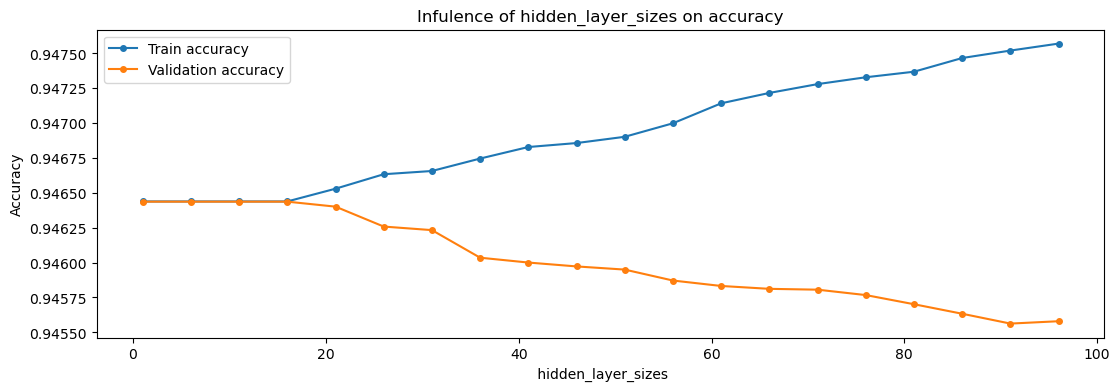

In [67]:
MLP_train_result = pd.DataFrame()
MLP_valid_result = pd.DataFrame()
result_md = pd.DataFrame()
for size_ in range(1, 101, 5):
    model = MLPClassifier(random_state=42,
                          hidden_layer_sizes=(size_),
                          max_iter=500,
                          activation='logistic',
                          verbose=False)

    for train_idx, val_idx in KF.split(X_train_N):
        model.fit(X_train_N.iloc[train_idx], y_train.iloc[train_idx])
        acc_train = accuracy_score(y_train.iloc[train_idx], model.predict(X_train_N.iloc[train_idx]))
        acc_val = accuracy_score(y_train.iloc[val_idx], model.predict(X_train_N.iloc[val_idx]))
        MLP_train_result = MLP_train_result.append({'train_acc': acc_train}, ignore_index=True)
        MLP_valid_result = MLP_valid_result.append({'val_acc': acc_val}, ignore_index=True)

    avg_train_md = MLP_train_result.mean()
    avg_val_md = MLP_valid_result.mean()
    result_md = result_md.append({'hidden_layer_sizes': size_, 'activation': 'logistic',
                                'train_acc':avg_train_md,
                                 'val_acc':avg_val_md}, ignore_index=True)


plt.figure(figsize=(13, 4))
plt.plot(result_md['hidden_layer_sizes'], result_md['train_acc'], marker='o', markersize=4)
plt.plot(result_md['hidden_layer_sizes'], result_md['val_acc'], marker='o', markersize=4)
plt.title("Infulence of hidden_layer_sizes on accuracy")
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel(' hidden_layer_sizes', fontsize = 10)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()


# Activation function Infulence

In [68]:
X_train_N = X_train_N.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test_N = X_test_N.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

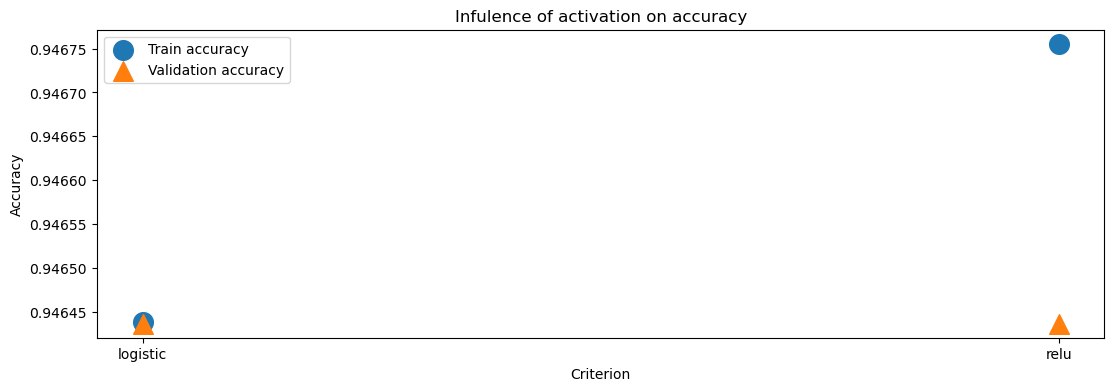

In [69]:
activation_vect= ['logistic','relu']
result_cr = pd.DataFrame()
train_result_cr = pd.DataFrame()
valid_result_cr = pd.DataFrame()
for activation in activation_vect:
    train_result_cr = pd.DataFrame(None)
    valid_result_cr = pd.DataFrame(None)
    for train_index, val_index in KF.split(X_train_N):
        model_cr = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(7),
                          max_iter=500,
                          activation = activation,
                          verbose=False)
        model_cr.fit(X_train_N.iloc[train_index], y_train.iloc[train_index])
        acc_train_cr = accuracy_score(y_train.iloc[train_index], model_cr.predict(X_train_N.iloc[train_index]))  # accuracy of the train
        acc_val_cr = accuracy_score(y_train[val_index], model_cr.predict(X_train_N.iloc[val_index]))  # accuracy of the validation
        train_result_cr = train_result_cr.append({'Train accuracy': acc_train_cr}, ignore_index=True)
        valid_result_cr = valid_result_cr.append({'Validation accuracy': acc_val_cr}, ignore_index=True)
    avg_train_cr = train_result_cr.mean()
    avg_val_cr = valid_result_cr.mean()
    result_cr = result_cr.append({'activation': activation,
                                'train_acc':avg_train_cr,
                                 'val_acc':avg_val_cr}, ignore_index=True)

plt.figure(figsize=(13, 4))
plt.scatter(result_cr['activation'], result_cr['train_acc'], marker='o', s=200)
plt.scatter(result_cr['activation'], result_cr['val_acc'], marker='^', s=200)
plt.title("Infulence of activation on accuracy")
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel('Criterion', fontsize = 10)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

# Nerual Networks Final Predictions

In [70]:
#---------------------summary and cunclusions multilayer perceptron
best_MLP = MLPClassifier(max_iter=500, activation='logistic', hidden_layer_sizes=(7, ),  random_state=42)
best_MLP.fit(X_train_N, y_train)

# -----------------for the train set
acc_train = accuracy_score(y_train, best_MLP.predict(X_train_N)) #accuracy of the train
best_train_result_MLP = {'Train accuracy logistic': acc_train}

print(pd.Series(best_train_result_MLP))

# ----------------for the test set
acc_test = accuracy_score(y_test, best_MLP.predict(X_test_N)) #accuracy of the train
best_test_result_MLP = {'Test accuracy logistic': acc_test}

print(pd.Series(best_test_result_MLP))

Train accuracy logistic    0.946438
dtype: float64
Test accuracy logistic    0.942184
dtype: float64


In [71]:
#---------------------summary and cunclusions multilayer perceptron
best_MLP = MLPClassifier(max_iter=500, activation='relu', hidden_layer_sizes=(7, ),  random_state=42)
best_MLP.fit(X_train_N, y_train)

# -----------------for the train set
acc_train = accuracy_score(y_train, best_MLP.predict(X_train_N)) #accuracy of the train
best_train_result_MLP = {'Train accuracy relu': acc_train}

print(pd.Series(best_train_result_MLP))

# ----------------for the test set
acc_test = accuracy_score(y_test, best_MLP.predict(X_test_N)) #accuracy of the train
best_test_result_MLP = {'Test accuracy relu': acc_test}

print(pd.Series(best_test_result_MLP))

Train accuracy relu    0.946438
dtype: float64
Test accuracy relu    0.942184
dtype: float64


# Confusion matrix Final Nerual Network

Confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000127C938F8E0>
Classification report               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1207
           1       0.80      0.77      0.79       194

    accuracy                           0.94      1401
   macro avg       0.88      0.87      0.88      1401
weighted avg       0.94      0.94      0.94      1401



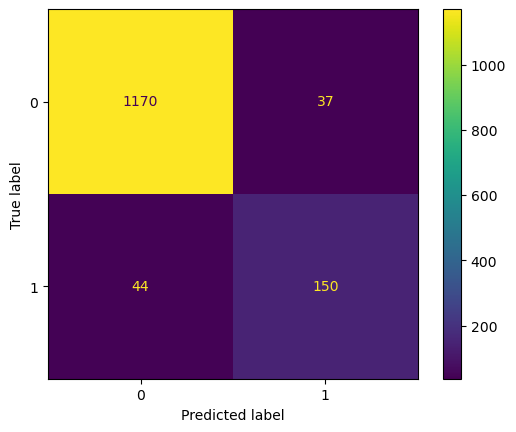

In [72]:
best_MLP = MLPClassifier(max_iter=500, activation='relu', hidden_layer_sizes=(7, ),  random_state=42)
best_MLP.fit(X_train_N, y_train)
acc_test = accuracy_score(y_test, best_MLP.predict(X_test_N))

cm = confusion_matrix(y_test, best_MLP.predict(X_test_N), labels=best_MLP.classes_)
con =  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_MLP.classes_)
print("Confusion matrix",con)
print("Classification report", classification_report(y_test,best_MLP.predict(X_test_N)))
con.plot()
plt.show()

# K-Means

In [73]:
df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]
X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

std_scaler = StandardScaler()


X_train_K = X_train.copy()
X_train_K = std_scaler.fit_transform(X_train)
X_test_K = X_test.copy()
X_test_K = std_scaler.fit_transform(X_test)

# Two cluster's

[0.11791471 0.06277921]
0.18069391104096322


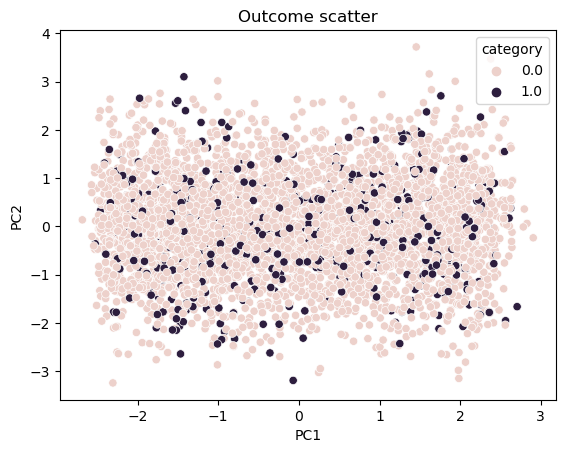

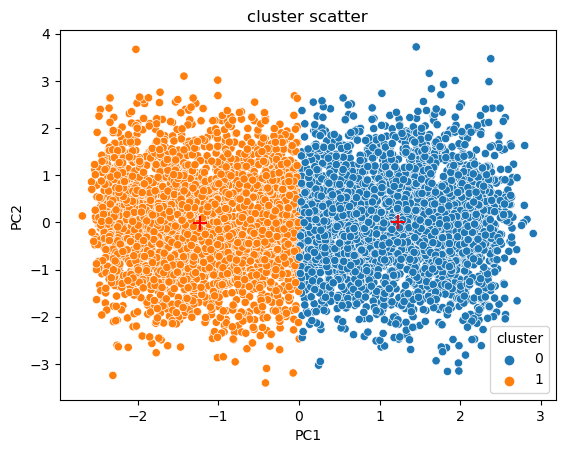

total worng classifications 2571


In [74]:
pca = PCA(n_components=2)
pca.fit(X_train_K)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
KMeans_pca = pca.transform(X_train_K)
KMeans_pca = pd.DataFrame(KMeans_pca, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=KMeans_pca)
plt.title('Outcome scatter')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(KMeans_pca)
KMeans_pca['cluster'] = kmeans.predict(KMeans_pca)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=KMeans_pca)
plt.scatter((kmeans.cluster_centers_)[:, 0], (kmeans.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.title('cluster scatter')
plt.show()

KMeans_pca['OUTCOME'] = y_train
wrong = KMeans_pca[KMeans_pca['OUTCOME'] != KMeans_pca['cluster']]
print("total worng classifications",sum(wrong['cluster']))


# K-Means different Cluster size

In [75]:
X_train_K = X_train.copy()
X_train_K = std_scaler.fit_transform(X_train)
X_test_K = X_test.copy()
X_test_K = std_scaler.fit_transform(X_test)

For k= 10 , Davies-Bouldin score is: 2.667001663211578
For k= 11 , Davies-Bouldin score is: 2.5145418365362633
For k= 12 , Davies-Bouldin score is: 2.494869954926493
For k= 13 , Davies-Bouldin score is: 2.697757176187323
For k= 14 , Davies-Bouldin score is: 2.3674261446892233
For k= 15 , Davies-Bouldin score is: 2.464679414924432
For k= 16 , Davies-Bouldin score is: 2.456366859369127
For k= 17 , Davies-Bouldin score is: 2.4384051917563063


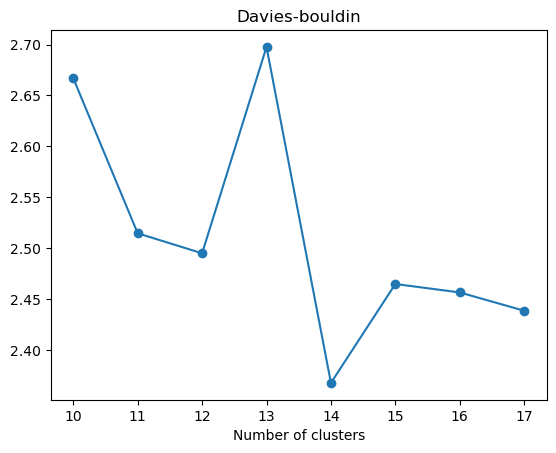

For k= 10 , Silhouette score is: 0.09986512799085101
For k= 11 , Silhouette score is: 0.11269587670340232
For k= 12 , Silhouette score is: 0.11667615791958644
For k= 13 , Silhouette score is: 0.10825964078973992
For k= 14 , Silhouette score is: 0.12481948914923816
For k= 15 , Silhouette score is: 0.12252435436677309
For k= 16 , Silhouette score is: 0.11534743944860662
For k= 17 , Silhouette score is: 0.12324781797277538


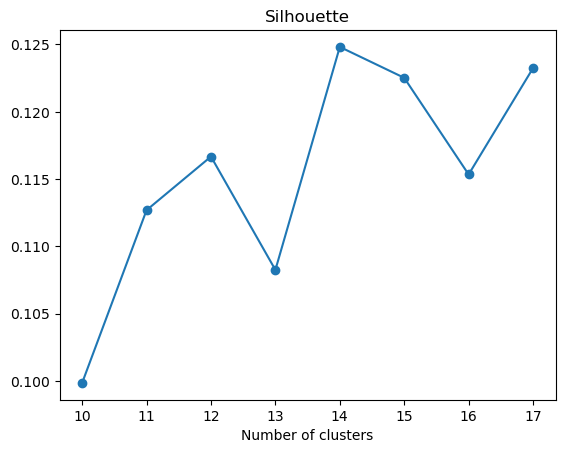

In [76]:
pca = PCA(n_components=2)
pca.fit(X_train_K)
X_train_Ki = X_train_K.copy()
X_train_Ki = pd.DataFrame(X_train_Ki)
k = np.arange(10, 18, 1)
dbs_list = []
silhouette_list = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_Ki.values)
    X_train_Ki['cluster'] = kmeans.predict(X_train_Ki.values)
    clus_labels = kmeans.labels_
    dbs_list.append(davies_bouldin_score(X_train_Ki.values, clus_labels))
    silhouette_list.append( silhouette_score( X_train_Ki, clus_labels, metric='euclidean' ) )
    db_score = {'Davies_Bouldin_Score':dbs_list, "Number of clusters": k}
j=10
for dbs in dbs_list:
    print('For k=',j, ', Davies-Bouldin score is:', dbs)
    j+=1
plt.plot(k, dbs_list, marker='o')
plt.title("Davies-bouldin")
plt.xlabel("Number of clusters")
plt.show()

j=10
for sil in silhouette_list:
    print('For k=',j, ', Silhouette score is:', sil)
    j+=1
plt.plot(k, silhouette_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

# K-Means prediction 

In [88]:
df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]
X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

std_scaler = StandardScaler()


X_train_K = X_train.copy()
X_train_K = std_scaler.fit_transform(X_train)
X_test_K = X_test.copy()
X_test_K = std_scaler.fit_transform(X_test)

In [90]:
pysqldf = lambda q: sqldf(q, globals())

X_train_Ki = pd.DataFrame(X_train_K)
#for the test:
X_train_Ki_test = pd.DataFrame(std_scaler.transform(X_test))
#fit the model
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(X_train_Ki)
#cuclusions for the clusters of the train set
X_train_Ki['cluster'] = kmeans.predict(X_train_Ki)
X_train_Ki['OUTCOME'] = y_train

#for each claster compute for which class the aprior chance goes for
q=  """
    select cluster , case when avg(OUTCOME) > 0.5 then 1 else 0 end as outcome_class_claster
    from X_train_Ki
    group by cluster
    """
clusters_OUTCOME_class = pysqldf(q)

X_train_Ki_test['cluster'] = kmeans.predict(X_train_Ki_test)
res = pd.merge(X_train_Ki_test, clusters_OUTCOME_class, on='cluster')
res['OUTCOME'] = np.array(y_test)
#calculate the records we were correct-------37
q=  """
    select count(*) as [Test accuracy]
    from res
    where outcome_class_claster = OUTCOME
    """
finalresult_test = pysqldf(q)
#calculate the time we were correct and 0----- 21
q=  """
    select count(*) as result
    from res
    where outcome_class_claster = OUTCOME and OUTCOME = 0
    """
finalresult_0 = pysqldf(q)

#cunclusions
q=  """
    select count(*) as [Train accuracy]
    from X_train_Ki as K join clusters_OUTCOME_class as C on C.cluster = K.cluster
    where outcome_class_claster = OUTCOME
    """
finalresult = pysqldf(q)
print(finalresult/5600)
print(finalresult_test/1402)





   Train accuracy
0        0.611429
   Test accuracy
0       0.860913


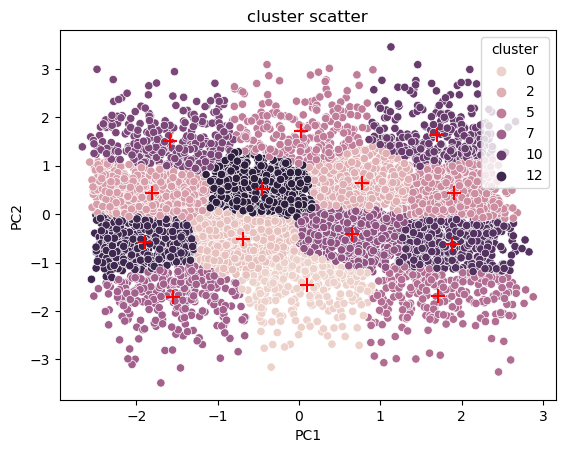

total worng classifications 36640


In [94]:
KM_pca = pca.transform(X_train_K)
KM_pca = pd.DataFrame(KM_pca, columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(KM_pca)
KM_pca['cluster'] = kmeans.predict(KM_pca)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=KM_pca)
plt.scatter((kmeans.cluster_centers_)[:, 0], (kmeans.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.title('cluster scatter')
plt.show()

KM_pca['OUTCOME'] = y_train
wrong = KM_pca[KM_pca['OUTCOME'] != KM_pca['cluster']]
print("total worng classifications",sum(wrong['cluster']))

# Agnes Hirerarchical clustering

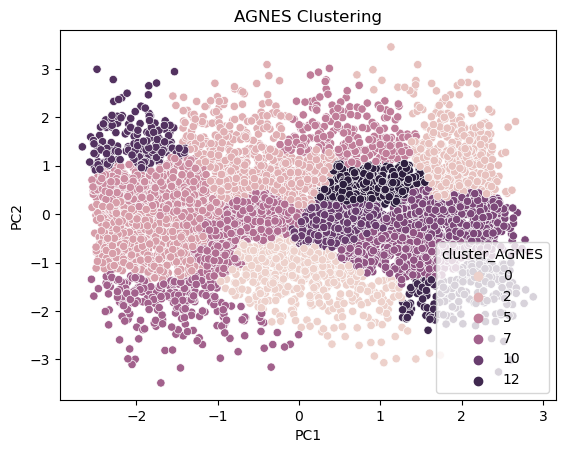

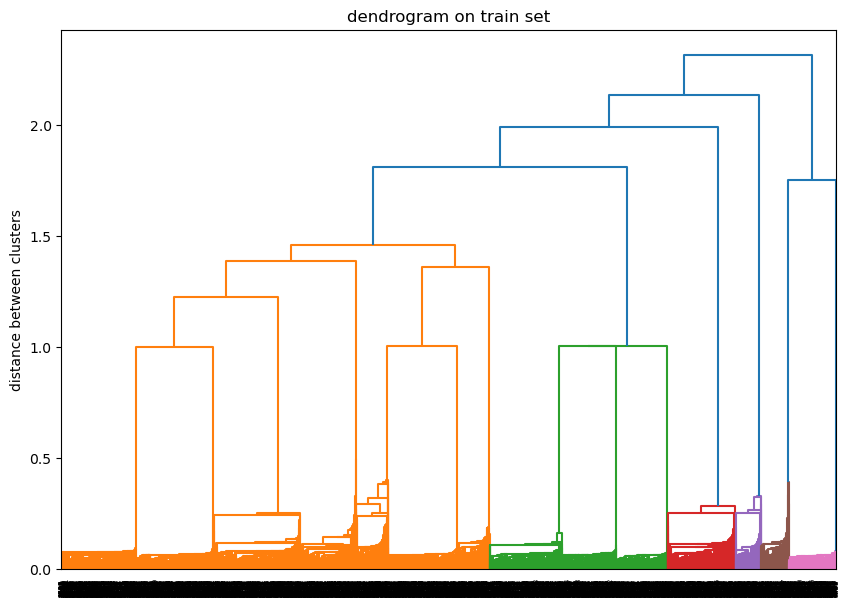

In [100]:
from sklearn.cluster import AgglomerativeClustering
KM_pca = pca.transform(X_train_K)
KM_pca = pd.DataFrame(KM_pca, columns=['PC1', 'PC2'])
Cluster_Data = np.array(KM_pca)

KM_pca = pca.transform(X_train_K)
KM_pca = pd.DataFrame(KM_pca, columns=['PC1', 'PC2'])

clustering = AgglomerativeClustering(linkage='ward', n_clusters=14)

res = clustering.fit(Cluster_Data)
KM_pca['cluster_AGNES'] = pd.Series(clustering.labels_)

sns.scatterplot(x='PC1', y='PC2', hue='cluster_AGNES', data=KM_pca, color = 'red')
plt.title("AGNES Clustering")
plt.show()
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(KM_pca)

labelList = range(1, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('dendrogram on train set')
plt.ylabel('distance between clusters')
plt.show()

# Finale Cleanup and Model

In [101]:
df = pd.read_csv("Xy_train_new.csv")

df.sample(10)

del df['Unnamed..0']
df.columns
#change data type to int64 and switch yes:1 no:0
df['squareMeters'] = df['squareMeters'].astype(np.int64)
df['numberOfRooms'] = df['numberOfRooms'].astype(np.int64)
df['hasYard'] = df['hasYard'].astype(np.int64)
df['hasPool'] = df['hasPool'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
df['cityCode'] = df['cityCode'].astype(np.int64)
df['cityPartRange'] = df['cityPartRange'].astype(np.int64)
df['numPrevOwners'] = df['numPrevOwners'].astype(np.int64)
df['made'] = df['made'].astype(np.int64)
df['isNewBuilt'] = df['isNewBuilt'].replace({'no':0, 'yes':1})
df['isNewBuilt'] = df['isNewBuilt'].astype(np.int64)
df['hasStormProtector'] = df['hasStormProtector'].replace({'no':0, 'yes':1})
df['hasStormProtector'] = df['hasStormProtector'].astype(np.int64)
df['basement'] = df['basement'].astype(np.int64)
df['attic'] = df['attic'].astype(np.int64)
df['garage'] = df['garage'].astype(np.int64)
df['hasStorageRoom'] = df['hasStorageRoom'].astype(np.int64)
df['hasGuestRoom'] = df['hasGuestRoom'].astype(np.int64)
df['price'] = df['price'].astype(np.int64)


# I droped more then 5% because i will resample and add more data later
df = df.replace([df['cityCode'] < 0],df['cityCode'].mean())
df = df.replace([df['made'] < 2023],df['made'].mean())
df = df.replace([df['price'] < 0],0)
df = df.replace(df['hasGuestRoom'] < df['numberOfRooms'],df['numberOfRooms'].mean())
df = df.replace(df['basement'] < df['squareMeters'],df['basement'].mean())
df = df.replace(df['attic'] < df['squareMeters'],df['attic'].mean())
df = df.replace(df['garage'] < df['squareMeters'],df['garage'].mean())






df.shape
df['category'] = df['category'].replace({'Basic':0, 'Luxury':1})
df['category']

df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]


X = df.drop(['category'],axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
X_train_scaled


X_train shape:  (6400, 17)
y_train shape:  (6400,)
X_test shape:  (1600, 17)
y_test shape:  (1600,)


squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0        -0.299185       0.645247 -1.029175  0.988504  1.275360 -0.389331   
1        -1.025922      -1.087280  0.971652 -1.011630 -1.458350  1.236805   
2        -0.058176      -1.225882  0.971652 -1.011630  1.033133  1.501450   
3         1.425030      -0.879377 -1.029175  0.988504  0.098827 -1.694873   
4        -0.673123      -0.359618 -1.029175 -1.011630  1.206152 -1.263554   
...            ...            ...       ...       ...       ...       ...   
6395     -0.955577       0.714548  0.971652  0.988504  0.479470  1.176202   
6396     -0.710548      -0.290317 -1.029175 -1.011630 -0.316421 -1.353699   
6397      1.566032       0.160140 -1.029175  0.988504  1.240756  0.895803   
6398     -1.503645      -1.364484 -1.029175  0.988504  1.725211  0.571107   
6399     -0.139818       1.234306 -1.029175 -1.011630  0.894717  1.082954   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0         -0.525722      -1.578303  0.064448    1.007843          -1.000938   
1          0.523645       1.571741  1.656973    1.007843          -1.000938   
2         -0.175933      -0.528289  0.382953   -0.992218           0.999063   
3          1.223223       1.571741  0.382953   -0.992218          -1.000938   
4          0.523645      -1.578303 -1.421909   -0.992218          -1.000938   
...             ...            ...       ...         ...                ...   
6395       1.223223       1.221736 -0.678731    1.007843          -1.000938   
6396       1.223223      -1.228298 -0.891068   -0.992218          -1.000938   
6397       1.223223      -0.528289 -1.103404   -0.992218           0.999063   
6398      -1.225300       0.521726 -1.528078   -0.992218           0.999063   
6399      -0.525722      -0.878294  0.382953    1.007843           0.999063   

      basement     attic    garage  hasStorageRoom  hasGuestRoom     price  
0     0.823431 -0.506618  0.912821        0.997191     -0.311892 -0.298681  
1    -0.654190  0.132611  0.813671       -1.002816     -0.942973 -1.027348  
2     0.730383 -1.543858  0.851806       -1.002816      1.581350 -0.058573  
3    -0.487957 -0.345001  1.481029        0.997191      1.265810  1.425448  
4     0.918222 -1.458742 -0.002412       -1.002816      0.950270 -0.674583  
...        ...       ...       ...             ...           ...       ...  
6395 -0.069763 -1.658954  0.314106        0.997191      0.634729 -0.956864  
6396 -1.275209 -0.283318 -1.691780       -1.002816      1.265810 -0.712884  
6397 -0.539186  1.160892  1.660262        0.997191      0.950270  1.567163  
6398  1.652850 -1.128273 -0.276982       -1.002816     -0.311892 -1.504713  
6399 -0.848999  1.042695 -0.578246        0.997191      0.634729 -0.140148  

[6400 rows x 17 columns]

In [102]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote= SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
print("Original dataset shape: ", Counter(y_train))
print("Original dataset shape: ", Counter(y_resampled))
print(sorted(Counter(y_resampled).items()))

Original dataset shape:  Counter({0: 5526, 1: 874})
Original dataset shape:  Counter({0: 5526, 1: 5526})
[(0, 5526), (1, 5526)]


In [104]:
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_scaled, y_test)
print("Original dataset shape: ", Counter(y_test))
print("Original dataset shape: ", Counter(y_test_resampled))
print(sorted(Counter(y_test_resampled).items()))

Original dataset shape:  Counter({0: 1385, 1: 215})
Original dataset shape:  Counter({0: 1385, 1: 1385})
[(0, 1385), (1, 1385)]


# NN Remake 

## GreadSearchCV Remake

In [ ]:
TwoLayers = [(1,2),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,)]
for x in np.arange(1,21,5):
    for y in np.arange(1,21,5):
        TwoLayers.insert(-1, (x,y))

param_grid = {
              'hidden_layer_sizes': TwoLayers,
              'activation': ['relu','logistic'],
               'learning_rate':['constant', 'adaptive']
                
              }

grid_search = GridSearchCV(estimator = MLPClassifier(random_state=42, verbose=False, max_iter=500), param_grid=(param_grid),
                           refit=True, cv=10,verbose=3 ,scoring='f1', return_train_score=True)
grid_search.fit(X_resampled, y_resampled)



best_model = grid_search.best_estimator_
print(grid_search.best_params_, '\n')
print(best_model.get_params(), '\n')
Results = pd.DataFrame(grid_search.cv_results_)
preds = best_model.predict(X_resampled)
print("Test accuracy: ", round(accuracy_score( y_resampled, preds), 3))

Results = pd.DataFrame(grid_search.cv_results_)
print('The best parameters are:', grid_search.best_params_)
y_val = Results['mean_test_score']
y_train = Results['mean_train_score']
results_grid_search1 = pd.DataFrame(Results).sort_values('rank_test_score')[['params', 'mean_test_score']]
results_grid_search2 = pd.DataFrame(Results).sort_values('mean_train_score', ascending=False)[
    ['params', 'mean_train_score']]
headers_val = ["Number", "Parameters", "Validation score"]
headers_train = ["Number", "Parameters", "Train score"]
print(tabulate(results_grid_search1, headers=headers_val, tablefmt="grid"))
print(tabulate(results_grid_search2, headers=headers_train, tablefmt="grid"))





Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.906, test=0.864) total time=   3.5s
[CV 2/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.904, test=0.888) total time=   3.6s
[CV 3/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.901, test=0.907) total time=   2.9s
[CV 4/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.900, test=0.908) total time=   3.3s
[CV 5/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.901, test=0.905) total time=   4.1s
[CV 6/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.901, test=0.910) total time=   6.0s
[CV 7/10] END activation=relu, hidden_layer_sizes=(1, 2), learning_rate=constant;, score=(train=0.903, test=0.889) total time=   4.

## Nerual Networks Remake 

In [118]:
#---------------------summary and cunclusions multilayer perceptron
model_best_MLP = MLPClassifier(max_iter=500, activation='relu', hidden_layer_sizes=(7,1), learning_rate = 'constant', random_state=42)
model_best_MLP.fit(X_resampled, y_resampled)

# -----------------for the train set
acc_train = accuracy_score(y_resampled, model_best_MLP.predict(X_resampled)) #accuracy of the train
best_train_result_MLP = {'Train accuracy': acc_train}

print(pd.Series(best_train_result_MLP))

# ----------------for the test set
acc_test = accuracy_score(y_test_resampled, model_best_MLP.predict(X_test_resampled)) 
best_test_result_MLP = {'Test accuracy': acc_test}

print(pd.Series(best_test_result_MLP))

Train accuracy    0.919653
dtype: float64
Test accuracy    0.903249
dtype: float64


## Confusion matrix Final Nerual Network Remake

Test accuracy    0.903249
dtype: float64
Confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000127D9260400>
Classification report               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1385
           1       0.96      0.84      0.90      1385

    accuracy                           0.90      2770
   macro avg       0.91      0.90      0.90      2770
weighted avg       0.91      0.90      0.90      2770



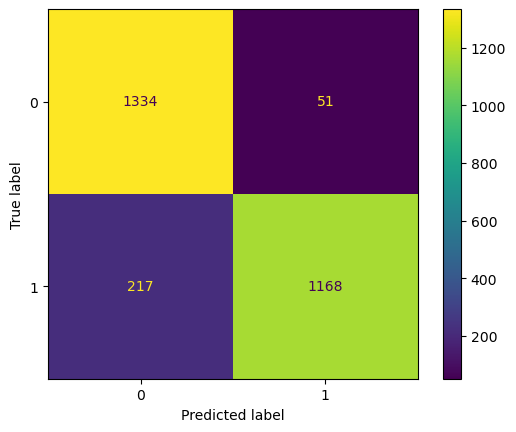

In [122]:
model_best_MLP =MLPClassifier(max_iter=500, activation='relu', hidden_layer_sizes=(7,1),learning_rate = 'constant', random_state=42)
model_best_MLP.fit(X_resampled, y_resampled)
acc_test = accuracy_score(y_test_resampled, model_best_MLP.predict(X_test_resampled))
best_test_result_MLP = {'Test accuracy': acc_test}
print(pd.Series(best_test_result_MLP))

cm = confusion_matrix(y_test_resampled, model_best_MLP.predict(X_test_resampled), labels=model_best_MLP.classes_)
con =  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_best_MLP.classes_)
print("Confusion matrix",con)
print("Classification report", classification_report(y_test_resampled,model_best_MLP.predict(X_test_resampled)))
con.plot()
plt.show()

# DT Remake

## GreadSearchCV

In [125]:
param_grid = {'max_depth': np.arange(1, 25, 1),
              'criterion': ['entropy', 'gini'],
              'ccp_alpha': np.arange(0, 0.1, 0.01)
             }

# use f1 because target variable is 0 or 1
grid_CV = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           refit=True,
                           cv=10, verbose=3 ,scoring='f1', return_train_score=True )

grid_CV.fit(X_resampled, y_resampled)
best_model = grid_CV.best_estimator_
print(grid_CV.best_params_, '\n')
print(best_model.get_params(), '\n')
Results = pd.DataFrame(grid_CV.cv_results_)
preds = best_model.predict(X_test_resampled)
print("Test accuracy: ", round(accuracy_score(y_test_resampled, preds), 3))

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.781, test=0.747) total time=   0.0s
[CV 2/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.779, test=0.768) total time=   0.0s
[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.778, test=0.773) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.778, test=0.782) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.778, test=0.775) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.780, test=0.764) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.779, test=0.768) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=1;, score=(train=0.777, test=0.778) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, cr

[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.938, test=0.937) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.933, test=0.938) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.934, test=0.938) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.937, test=0.929) total time=   0.1s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.935, test=0.926) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.935, test=0.946) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.935, test=0.947) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8;, score=(train=0.933, test=0.948) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=9;, score=(train=0.949, test=0.855) t

[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.988, test=0.938) total time=   0.1s
[CV 7/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.990, test=0.929) total time=   0.1s
[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.984, test=0.933) total time=   0.1s
[CV 9/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.989, test=0.948) total time=   0.1s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=15;, score=(train=0.989, test=0.949) total time=   0.1s
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.989, test=0.823) total time=   0.1s
[CV 2/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.994, test=0.871) total time=   0.1s
[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.990, test=0.939) total time=   0.1s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=16;, score=(train=0.990, test

[CV 8/10] END ccp_alpha=0.0, criterion=entropy, max_depth=22;, score=(train=1.000, test=0.946) total time=   0.1s
[CV 9/10] END ccp_alpha=0.0, criterion=entropy, max_depth=22;, score=(train=1.000, test=0.950) total time=   0.1s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=22;, score=(train=1.000, test=0.944) total time=   0.1s
[CV 1/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test=0.823) total time=   0.1s
[CV 2/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test=0.875) total time=   0.1s
[CV 3/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test=0.943) total time=   0.1s
[CV 4/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test=0.949) total time=   0.1s
[CV 5/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test=0.946) total time=   0.1s
[CV 6/10] END ccp_alpha=0.0, criterion=entropy, max_depth=23;, score=(train=1.000, test

[CV 3/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.932, test=0.935) total time=   0.0s
[CV 4/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.932, test=0.939) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.927, test=0.937) total time=   0.0s
[CV 6/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.932, test=0.932) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.930, test=0.921) total time=   0.0s
[CV 8/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.928, test=0.942) total time=   0.0s
[CV 9/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.931, test=0.944) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=gini, max_depth=6;, score=(train=0.932, test=0.950) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=gini, max_depth=7;, score=(train=0.949, test=0.852) total time=   0.0s
[CV 2/10]

[CV 9/10] END ccp_alpha=0.0, criterion=gini, max_depth=13;, score=(train=0.977, test=0.939) total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=gini, max_depth=13;, score=(train=0.985, test=0.947) total time=   0.0s
[CV 1/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.985, test=0.843) total time=   0.1s
[CV 2/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.988, test=0.894) total time=   0.1s
[CV 3/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.984, test=0.943) total time=   0.1s
[CV 4/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.986, test=0.947) total time=   0.0s
[CV 5/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.974, test=0.941) total time=   0.1s
[CV 6/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.990, test=0.928) total time=   0.0s
[CV 7/10] END ccp_alpha=0.0, criterion=gini, max_depth=14;, score=(train=0.988, test=0.934) total time=   0.1s


[CV 3/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.997, test=0.950) total time=   0.1s
[CV 4/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.995, test=0.946) total time=   0.1s
[CV 5/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=1.000, test=0.951) total time=   0.1s
[CV 6/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.998, test=0.928) total time=   0.1s
[CV 7/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.997, test=0.931) total time=   0.1s
[CV 8/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.998, test=0.940) total time=   0.1s
[CV 9/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.997, test=0.939) total time=   0.1s
[CV 10/10] END ccp_alpha=0.0, criterion=gini, max_depth=21;, score=(train=0.998, test=0.944) total time=   0.1s
[CV 1/10] END ccp_alpha=0.0, criterion=gini, max_depth=22;, score=(train=0.998, test=0.833) total time=   0.1s


[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=4;, score=(train=0.919, test=0.905) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=4;, score=(train=0.919, test=0.933) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=4;, score=(train=0.916, test=0.935) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=entropy, max_depth=4;, score=(train=0.916, test=0.939) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.926, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.921, test=0.895) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.920, test=0.926) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.917, test=0.929) total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=5;, score=(train=0.919, test

[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=11;, score=(train=0.916, test=0.935) total time=   0.1s
[CV 10/10] END ccp_alpha=0.01, criterion=entropy, max_depth=11;, score=(train=0.916, test=0.939) total time=   0.1s
[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.926, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.921, test=0.895) total time=   0.1s
[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.920, test=0.926) total time=   0.1s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.917, test=0.929) total time=   0.1s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.919, test=0.930) total time=   0.1s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.917, test=0.927) total time=   0.1s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=12;, score=(train=0.

[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.926, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.921, test=0.895) total time=   0.1s
[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.920, test=0.926) total time=   0.1s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.917, test=0.929) total time=   0.1s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.919, test=0.930) total time=   0.1s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.917, test=0.927) total time=   0.1s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.919, test=0.905) total time=   0.1s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.919, test=0.933) total time=   0.1s
[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=19;, score=(train=0.9

[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=2;, score=(train=0.860, test=0.867) total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=2;, score=(train=0.858, test=0.847) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=2;, score=(train=0.858, test=0.847) total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=2;, score=(train=0.860, test=0.865) total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=2;, score=(train=0.860, test=0.867) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=2;, score=(train=0.857, test=0.853) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=3;, score=(train=0.912, test=0.919) total time=   0.0s


[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=9;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=9;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=10;, score=(train=0.914, test=0.899) total time= 

[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=17;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=18;, score=(train=0.918, test=0.864) total time

[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=24;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=24;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=24;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=24;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=1;, score=(train=0.781, test=0.747) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=1;, score=(train=0.779, test=0.768) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=1;, score=(train=0.778, test=0.773) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=1;, score=(train=0.778, test=0.782) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=1;, score=(train=0.778, test=0.775) 

[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=8;, score=(train=0.911, test

[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=15;, score=(train=0.

[CV 4/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.912, test=0.920) total time=   0.3s
[CV 7/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.02, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.02, criterion=entropy, max_depth=23;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.02, criterion=entropy, max_depth=23;, score=(train=0.

[CV 7/10] END ccp_alpha=0.02, criterion=gini, max_depth=5;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.02, criterion=gini, max_depth=5;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.02, criterion=gini, max_depth=5;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.02, criterion=gini, max_depth=5;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.02, criterion=gini, max_depth=6;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.02, criterion=gini, max_depth=6;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.02, criterion=gini, max_depth=6;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.02, criterion=gini, max_depth=6;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=gini, max_depth=6;, score=(train=0.911, test=0.923) total time=   0.0s


[CV 1/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.02, criterion=gini, max_depth=13;, score=(train=0.911, test=0.926) total time=

[CV 5/10] END ccp_alpha=0.02, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.02, criterion=gini, max_depth=20;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.02, criterion=gini, max_depth=20;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.02, criterion=gini, max_depth=20;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.02, criterion=gini, max_depth=20;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.02, criterion=gini, max_depth=20;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.02, criterion=gini, max_depth=21;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.02, criterion=gini, max_depth=21;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.02, criterion=gini, max_depth=21;, score=(train=0.912, test=0.919) total time

[CV 8/10] END ccp_alpha=0.03, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.03, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=entropy, max_depth=4;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=entropy, max_depth=4;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=entropy, max_depth=4;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=entropy, max_depth=4;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=entropy, max_depth=4;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=entropy, max_depth=4;, score=(train=0.912, test

[CV 1/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.03, criterion=entropy, max_depth=11;, score=(train=0.9

[CV 3/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.03, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.03, criterion=entropy, max_depth=19;, score=(train=0.

[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=1;, score=(train=0.779, test=0.768) total time=   0.0s
[CV 8/10] END ccp_alpha=0.03, criterion=gini, max_depth=1;, score=(train=0.777, test=0.778) total time=   0.0s
[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=1;, score=(train=0.777, test=0.783) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=1;, score=(train=0.779, test=0.772) total time=   0.0s
[CV 1/10] END ccp_alpha=0.03, criterion=gini, max_depth=2;, score=(train=0.866, test=0.806) total time=   0.0s
[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=2;, score=(train=0.859, test=0.844) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=2;, score=(train=0.860, test=0.862) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=gini, max_depth=2;, score=(train=0.858, test=0.850) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=2;, score=(train=0.860, test=0.867) total time=   0.0s


[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=9;, score=(train=0.911, test=0.932) total time=   0.0s


[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=16;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.03, criterion=gini, max_depth=16;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=16;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=16;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.03, criterion=gini, max_depth=17;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=17;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=17;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.03, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time

[CV 2/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.03, criterion=gini, max_depth=24;, score=(train=0.911, test=0.932) total time

[CV 5/10] END ccp_alpha=0.04, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=entropy, max_depth=7;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.04, criterion=entropy, max_depth=7;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=entropy, max_depth=8;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.04, criterion=entropy, max_depth=8;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.04, criterion=entropy, max_depth=8;, score=(train=0.912, test

[CV 7/10] END ccp_alpha=0.04, criterion=entropy, max_depth=14;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.04, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.04, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.04, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.04, criterion=entropy, max_depth=15;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.04, criterion=entropy, max_depth=15;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.04, criterion=entropy, max_depth=15;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.04, criterion=entropy, max_depth=15;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.04, criterion=entropy, max_depth=15;, score=(train=0.

[CV 9/10] END ccp_alpha=0.04, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.926) total time=   0.2s
[CV 10/10] END ccp_alpha=0.04, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.932) total time=   0.2s
[CV 1/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.918, test=0.864) total time=   0.2s
[CV 2/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.915, test=0.892) total time=   0.2s
[CV 3/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.912, test=0.919) total time=   0.2s
[CV 4/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 6/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.04, criterion=entropy, max_depth=22;, score=(train=0.

[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=5;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=gini, max_depth=6;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=6;, score=(train=0.915, test=0.892) total time=   0.0s


[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=12;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=12;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=12;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.04, criterion=gini, max_depth=13;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=13;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.04, criterion=gini, max_depth=13;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=13;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=13;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=13;, score=(train=0.912, test=0.920) total time

[CV 2/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.04, criterion=gini, max_depth=20;, score=(train=0.911, test=0.932) total time

[CV 6/10] END ccp_alpha=0.05, criterion=entropy, max_depth=3;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=entropy, max_depth=3;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.05, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.05, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.05, criterion=entropy, max_depth=4;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=entropy, max_depth=4;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=entropy, max_depth=4;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=entropy, max_depth=4;, score=(train=0.911, test

[CV 9/10] END ccp_alpha=0.05, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.05, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.05, criterion=entropy, max_depth=11;, score=(train=0.

[CV 1/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.05, criterion=entropy, max_depth=18;, score=(train=0.9

[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=1;, score=(train=0.777, test=0.778) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=1;, score=(train=0.777, test=0.783) total time=   0.0s
[CV 10/10] END ccp_alpha=0.05, criterion=gini, max_depth=1;, score=(train=0.779, test=0.772) total time=   0.0s
[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=2;, score=(train=0.866, test=0.806) total time=   0.0s
[CV 2/10] END ccp_alpha=0.05, criterion=gini, max_depth=2;, score=(train=0.859, test=0.844) total time=   0.0s
[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=2;, score=(train=0.860, test=0.862) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=gini, max_depth=2;, score=(train=0.858, test=0.850) total time=   0.0s
[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=2;, score=(train=0.860, test=0.867) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=gini, max_depth=2;, score=(train=0.858, test=0.847) total time=   0.0s


[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.05, criterion=gini, max_depth=9;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=10;, score=(train=0.918, test=0.864) total time=   0.0s

[CV 7/10] END ccp_alpha=0.05, criterion=gini, max_depth=16;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=16;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=16;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.05, criterion=gini, max_depth=16;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=17;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.05, criterion=gini, max_depth=17;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=17;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.05, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time

[CV 1/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.915, test=0.892) total time=   0.2s
[CV 3/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.05, criterion=gini, max_depth=24;, score=(train=0.911, test=0.926) total time=

[CV 3/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.06, criterion=entropy, max_depth=8;, score=(train=0.918, test

[CV 5/10] END ccp_alpha=0.06, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.06, criterion=entropy, max_depth=14;, score=(train=0.912, test=0.920) total time=   0.2s
[CV 7/10] END ccp_alpha=0.06, criterion=entropy, max_depth=14;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.06, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.06, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.926) total time=   0.2s
[CV 10/10] END ccp_alpha=0.06, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.06, criterion=entropy, max_depth=15;, score=(train=0.918, test=0.864) total time=   0.2s
[CV 2/10] END ccp_alpha=0.06, criterion=entropy, max_depth=15;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.06, criterion=entropy, max_depth=15;, score=(train=0.

[CV 7/10] END ccp_alpha=0.06, criterion=entropy, max_depth=21;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.06, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.06, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.926) total time=   0.2s
[CV 10/10] END ccp_alpha=0.06, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.06, criterion=entropy, max_depth=22;, score=(train=0.918, test=0.864) total time=   0.2s
[CV 2/10] END ccp_alpha=0.06, criterion=entropy, max_depth=22;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.06, criterion=entropy, max_depth=22;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.06, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.06, criterion=entropy, max_depth=22;, score=(train=0.

[CV 2/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=gini, max_depth=5;, score=(train=0.911, test=0.932) total time=   0.0s


[CV 6/10] END ccp_alpha=0.06, criterion=gini, max_depth=12;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.06, criterion=gini, max_depth=12;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.06, criterion=gini, max_depth=12;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.06, criterion=gini, max_depth=12;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.06, criterion=gini, max_depth=12;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.06, criterion=gini, max_depth=13;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.06, criterion=gini, max_depth=13;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.06, criterion=gini, max_depth=13;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.06, criterion=gini, max_depth=13;, score=(train=0.911, test=0.923) total time

[CV 1/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.06, criterion=gini, max_depth=20;, score=(train=0.911, test=0.926) total time=

[CV 6/10] END ccp_alpha=0.07, criterion=entropy, max_depth=3;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=3;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.07, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=4;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=entropy, max_depth=4;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.07, criterion=entropy, max_depth=4;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=4;, score=(train=0.911, test

[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.07, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=11;, score=(train=0.

[CV 1/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 5/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.07, criterion=entropy, max_depth=18;, score=(train=0.9

[CV 8/10] END ccp_alpha=0.07, criterion=gini, max_depth=1;, score=(train=0.777, test=0.778) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=1;, score=(train=0.777, test=0.783) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=1;, score=(train=0.779, test=0.772) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=gini, max_depth=2;, score=(train=0.866, test=0.806) total time=   0.0s
[CV 2/10] END ccp_alpha=0.07, criterion=gini, max_depth=2;, score=(train=0.859, test=0.844) total time=   0.0s
[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=2;, score=(train=0.860, test=0.862) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=2;, score=(train=0.858, test=0.850) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=2;, score=(train=0.860, test=0.867) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=2;, score=(train=0.858, test=0.847) total time=   0.0s


[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=9;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.07, criterion=gini, max_depth=10;, score=(train=0.918, test=0.864) total time=   0.0s

[CV 8/10] END ccp_alpha=0.07, criterion=gini, max_depth=16;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=16;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=16;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.07, criterion=gini, max_depth=17;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.07, criterion=gini, max_depth=17;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=17;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=17;, score=(train=0.912, test=0.920) total time

[CV 2/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.912, test=0.919) total time=   0.2s
[CV 4/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 5/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 6/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.07, criterion=gini, max_depth=24;, score=(train=0.911, test=0.932) total time

[CV 5/10] END ccp_alpha=0.08, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.08, criterion=entropy, max_depth=7;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.08, criterion=entropy, max_depth=7;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.08, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.08, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.08, criterion=entropy, max_depth=7;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.08, criterion=entropy, max_depth=8;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.08, criterion=entropy, max_depth=8;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.08, criterion=entropy, max_depth=8;, score=(train=0.912, test

[CV 7/10] END ccp_alpha=0.08, criterion=entropy, max_depth=14;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.08, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.08, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.926) total time=   0.2s
[CV 10/10] END ccp_alpha=0.08, criterion=entropy, max_depth=14;, score=(train=0.911, test=0.932) total time=   0.2s
[CV 1/10] END ccp_alpha=0.08, criterion=entropy, max_depth=15;, score=(train=0.918, test=0.864) total time=   0.2s
[CV 2/10] END ccp_alpha=0.08, criterion=entropy, max_depth=15;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.08, criterion=entropy, max_depth=15;, score=(train=0.912, test=0.919) total time=   0.2s
[CV 4/10] END ccp_alpha=0.08, criterion=entropy, max_depth=15;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.08, criterion=entropy, max_depth=15;, score=(train=0.

[CV 9/10] END ccp_alpha=0.08, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.08, criterion=entropy, max_depth=21;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.08, criterion=entropy, max_depth=22;, score=(train=0.

[CV 2/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.915, test=0.892) total time=   0.0s
[CV 3/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.08, criterion=gini, max_depth=5;, score=(train=0.911, test=0.932) total time=   0.0s


[CV 6/10] END ccp_alpha=0.08, criterion=gini, max_depth=12;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.08, criterion=gini, max_depth=12;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.08, criterion=gini, max_depth=12;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.08, criterion=gini, max_depth=12;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.08, criterion=gini, max_depth=12;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.08, criterion=gini, max_depth=13;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.08, criterion=gini, max_depth=13;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.08, criterion=gini, max_depth=13;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.08, criterion=gini, max_depth=13;, score=(train=0.911, test=0.923) total time

[CV 1/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 5/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.08, criterion=gini, max_depth=20;, score=(train=0.911, test=0.926) total time=

[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=3;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=entropy, max_depth=4;, score=(train=0.918, test=0.864) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=entropy, max_depth=4;, score=(train=0.915, test

[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=10;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.09, criterion=entropy, max_depth=11;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.09, criterion=entropy, max_depth=11;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.09, criterion=entropy, max_depth=11;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=11;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=11;, score=(train=0.

[CV 9/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.09, criterion=entropy, max_depth=17;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.918, test=0.864) total time=   0.2s
[CV 2/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.915, test=0.892) total time=   0.2s
[CV 3/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 5/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.911, test=0.923) total time=   0.2s
[CV 6/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.09, criterion=entropy, max_depth=18;, score=(train=0.

[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=1;, score=(train=0.777, test=0.783) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=gini, max_depth=1;, score=(train=0.779, test=0.772) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.866, test=0.806) total time=   0.0s
[CV 2/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.859, test=0.844) total time=   0.0s
[CV 3/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.860, test=0.862) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.858, test=0.850) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.860, test=0.867) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.858, test=0.847) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=2;, score=(train=0.858, test=0.847) total time=   0.0s


[CV 3/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.912, test=0.919) total time=   0.0s
[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.911, test=0.923) total time=   0.0s
[CV 6/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.912, test=0.920) total time=   0.0s
[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.914, test=0.899) total time=   0.0s
[CV 8/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.911, test=0.925) total time=   0.0s
[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.911, test=0.926) total time=   0.0s
[CV 10/10] END ccp_alpha=0.09, criterion=gini, max_depth=9;, score=(train=0.911, test=0.932) total time=   0.0s
[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=10;, score=(train=0.918, test=0.864) total time=   0.0s

[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=16;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.09, criterion=gini, max_depth=16;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=16;, score=(train=0.911, test=0.926) total time=   0.1s
[CV 10/10] END ccp_alpha=0.09, criterion=gini, max_depth=16;, score=(train=0.911, test=0.932) total time=   0.1s
[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=17;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.09, criterion=gini, max_depth=17;, score=(train=0.915, test=0.892) total time=   0.1s
[CV 3/10] END ccp_alpha=0.09, criterion=gini, max_depth=17;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=17;, score=(train=0.911, test=0.923) total time

[CV 1/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.918, test=0.864) total time=   0.1s
[CV 2/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.915, test=0.892) total time=   0.2s
[CV 3/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.912, test=0.919) total time=   0.1s
[CV 4/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 5/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.911, test=0.923) total time=   0.1s
[CV 6/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.912, test=0.920) total time=   0.1s
[CV 7/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.914, test=0.899) total time=   0.1s
[CV 8/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.911, test=0.925) total time=   0.1s
[CV 9/10] END ccp_alpha=0.09, criterion=gini, max_depth=24;, score=(train=0.911, test=0.926) total time=

## Final Decision tree Remake

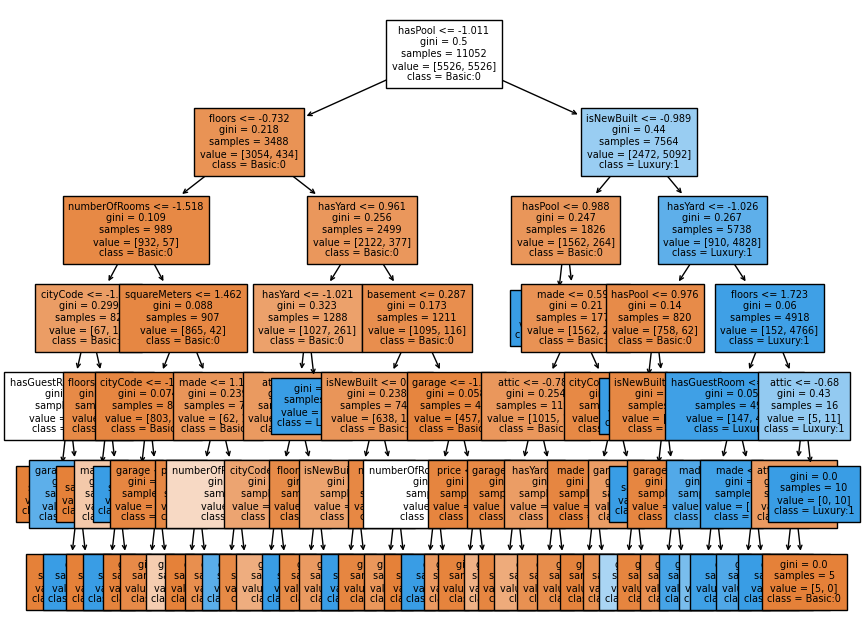

Train accuracy    0.935215
dtype: float64
Test accuracy    0.93213
dtype: float64


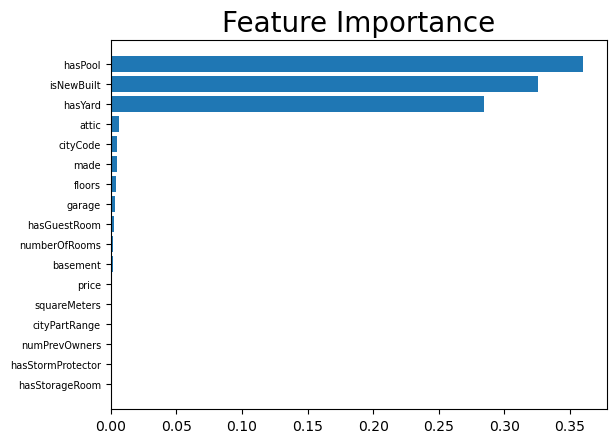

                      a
hasPool        0.359943
isNewBuilt     0.325321
hasYard        0.284505
attic          0.006242
cityCode       0.004783
made           0.004755
floors         0.004401
garage         0.003337
hasGuestRoom   0.002250
numberOfRooms  0.001979
basement       0.001561
price          0.000614
squareMeters   0.000311


In [121]:

best_tree = DecisionTreeClassifier(max_depth=6, criterion='gini', ccp_alpha = 0 ,  random_state=42)
best_tree.fit(X_resampled, y_resampled)

plt.figure(figsize=(10, 8))
plot_tree(best_tree, filled=True, class_names=['Basic:0', 'Luxury:1'], feature_names=X_resampled.columns, fontsize=7)
plt.show()


# ---------------- train set
acc_train = accuracy_score(y_resampled, best_tree.predict(X_resampled)) 
best_train_result_tree = {'Train accuracy': acc_train}

print(pd.Series(best_train_result_tree))

# ---------------- test set
acc_test = accuracy_score(y_test_resampled, best_tree.predict(X_test_resampled)) 
best_test_result_tree = {'Test accuracy': acc_test}

print(pd.Series(best_test_result_tree))

# -----Feature importances------
feature_importance = best_tree.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_resampled.columns[sorted_idx], fontsize=7)
plt.title('Feature Importance', fontsize = 20)
plt.show()

imp = pd.DataFrame(data = feature_importance[sorted_idx], index= X_resampled.columns[sorted_idx], columns= ['a'] )
imp = imp.sort_values('a', ascending = False)
imp = imp[imp['a']>0]
print(imp)

## Confusion matrix Final Decision Tree Remake

0    0.93213
dtype: float64
Confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000127C5E57BE0>
Classification report               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1385
           1       0.97      0.89      0.93      1385

    accuracy                           0.93      2770
   macro avg       0.93      0.93      0.93      2770
weighted avg       0.93      0.93      0.93      2770



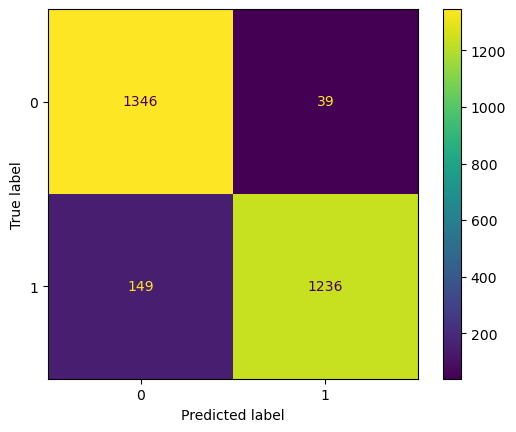

In [124]:
best_tree = DecisionTreeClassifier(max_depth=6,criterion='gini', ccp_alpha = 0 ,  random_state=42)
best_tree.fit(X_resampled, y_resampled)
acc_test = accuracy_score(y_test_resampled, best_tree.predict(X_test_resampled))
print(pd.Series(acc_test))

cm = confusion_matrix(y_test_resampled, best_tree.predict(X_test_resampled), labels=best_tree.classes_)
con =  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_tree.classes_)
print("Confusion matrix",con)
print("Classification report", classification_report(y_test_resampled,best_tree.predict(X_test_resampled)))
con.plot()
plt.show()

# Final Predictions

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.model_selection import KFold, train_test_split
from numpy import mean, std
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Import train to train model before predict

In [34]:
df = pd.read_csv("Xy_train_new.csv")

df.sample(10)

del df['Unnamed..0']
df.columns
#change data type to int64 and switch yes:1 no:0
df['squareMeters'] = df['squareMeters'].astype(np.int64)
df['numberOfRooms'] = df['numberOfRooms'].astype(np.int64)
df['hasYard'] = df['hasYard'].astype(np.int64)
df['hasPool'] = df['hasPool'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
df['cityCode'] = df['cityCode'].astype(np.int64)
df['cityPartRange'] = df['cityPartRange'].astype(np.int64)
df['numPrevOwners'] = df['numPrevOwners'].astype(np.int64)
df['made'] = df['made'].astype(np.int64)
df['isNewBuilt'] = df['isNewBuilt'].replace({'no':0, 'yes':1})
df['isNewBuilt'] = df['isNewBuilt'].astype(np.int64)
df['hasStormProtector'] = df['hasStormProtector'].replace({'no':0, 'yes':1})
df['hasStormProtector'] = df['hasStormProtector'].astype(np.int64)
df['basement'] = df['basement'].astype(np.int64)
df['attic'] = df['attic'].astype(np.int64)
df['garage'] = df['garage'].astype(np.int64)
df['hasStorageRoom'] = df['hasStorageRoom'].astype(np.int64)
df['hasGuestRoom'] = df['hasGuestRoom'].astype(np.int64)
df['price'] = df['price'].astype(np.int64)


# I droped more then 5% because i will resample and add more data later
df = df.replace([df['cityCode'] < 0],df['cityCode'].mean())
df = df.replace([df['made'] < 2023],df['made'].mean())
df = df.replace([df['price'] < 0],0)
df = df.replace(df['hasGuestRoom'] < df['numberOfRooms'],df['numberOfRooms'].mean())
df = df.replace(df['basement'] < df['squareMeters'],df['basement'].mean())
df = df.replace(df['attic'] < df['squareMeters'],df['attic'].mean())
df = df.replace(df['garage'] < df['squareMeters'],df['garage'].mean())






df.shape
df['category'] = df['category'].replace({'Basic':0, 'Luxury':1})
df['category']

df = df.loc[:,['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category']]


X = df.drop(['category'],axis=1)
y = df['category']
X_train = X
y_train = y
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

smote= SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Import the test data that I will perdict

In [35]:
df = pd.read_csv("X_test_new.csv")

df.sample(10)

del df['Unnamed..0']
del df['Unnamed: 0']
df.columns
#change data type to int64 and switch yes:1 no:0
df['squareMeters'] = df['squareMeters'].astype(np.int64)
df['numberOfRooms'] = df['numberOfRooms'].astype(np.int64)
df['hasYard'] = df['hasYard'].astype(np.int64)
df['hasPool'] = df['hasPool'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
df['cityCode'] = df['cityCode'].astype(np.int64)
df['cityPartRange'] = df['cityPartRange'].astype(np.int64)
df['numPrevOwners'] = df['numPrevOwners'].astype(np.int64)
df['made'] = df['made'].astype(np.int64)
df['isNewBuilt'] = df['isNewBuilt'].replace({'no':0, 'yes':1})
df['isNewBuilt'] = df['isNewBuilt'].astype(np.int64)
df['hasStormProtector'] = df['hasStormProtector'].replace({'no':0, 'yes':1})
df['hasStormProtector'] = df['hasStormProtector'].astype(np.int64)
df['basement'] = df['basement'].astype(np.int64)
df['attic'] = df['attic'].astype(np.int64)
df['garage'] = df['garage'].astype(np.int64)
df['hasStorageRoom'] = df['hasStorageRoom'].astype(np.int64)
df['hasGuestRoom'] = df['hasGuestRoom'].astype(np.int64)
df['price'] = df['price'].astype(np.int64)


# I droped more then 5% because i will resample and add more data later
df = df.replace([df['cityCode'] < 0],df['cityCode'].mean())
df = df.replace([df['made'] < 2023],df['made'].mean())
df = df.replace([df['price'] < 0],0)
df = df.replace(df['hasGuestRoom'] < df['numberOfRooms'],df['numberOfRooms'].mean())
df = df.replace(df['basement'] < df['squareMeters'],df['basement'].mean())
df = df.replace(df['attic'] < df['squareMeters'],df['attic'].mean())
df = df.replace(df['garage'] < df['squareMeters'],df['garage'].mean())
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         13814             46        1        0      97     48615   
1         55217             65        0        1      28     77123   
2         89338             53        0        0      27     89083   
3         80998             28        0        1      34     40469   
4         82065             96        1        1      90     77383   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              5              2  2007           0                  0   
1              4              7  2007           1                  0   
2              6              4  2014           1                  1   
3              5              3  1992           0                  0   
4              4             10  2012           0                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom    price  
0      4772   2443     598               0             9  1388629  
1      6282   7944     669               0            10  5526674  
2      4154   5715     739               1             7  8936753  
3      7518   8947     618               0             0  8107792  
4      8017   5993     767               0             8  8217209

In [36]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=X_train.columns)
df.head()

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0     -1.295941      -0.161570  0.984126 -0.964625  1.632777 -0.066171   
1      0.156181       0.493747 -1.016130  1.036672 -0.771799  0.907703   
2      1.352901       0.079862 -1.016130 -0.964625 -0.806648  1.316274   
3      1.060394      -0.782397 -1.016130  1.036672 -0.562706 -0.344450   
4      1.097817       1.562949  0.984126  1.036672  1.388834  0.916585   

   cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0      -0.182146      -1.236533  0.153157   -1.017147          -1.006018   
1      -0.531755       0.511711  0.153157    0.983142          -1.006018   
2       0.167462      -0.537236  0.914591    0.983142           0.994018   
3      -0.182146      -0.886884 -1.478488   -1.017147          -1.006018   
4      -0.531755       1.560658  0.697039   -1.017147          -1.006018   

   basement     attic    garage  hasStorageRoom  hasGuestRoom     price  
0 -0.081036 -0.900733  0.148684       -1.016130      1.257841 -1.295726  
1  0.437740  0.993561  0.418854       -1.016130      1.571087  0.155676  
2 -0.293356  0.225995  0.685218        0.984126      0.631348  1.351747  
3  0.862380  1.338948  0.224788       -1.016130     -1.561377  1.060993  
4  1.033816  0.321725  0.791763       -1.016130      0.944594  1.099370

# Predict

In [39]:
best_tree = DecisionTreeClassifier(max_depth=6,criterion='gini', ccp_alpha = 0 ,  random_state=42)
best_tree.fit(X_resampled, y_resampled)


df_P = best_tree.predict(df)
pd.DataFrame(df_P,columns=['target']).to_csv(r'C:\Users\eitan\Desktop\תעשיול\שנה ד סמסטר א\לימוד מכונה\חלק ב שלי\paris_G23_ytest.csv',index=False)
